In [1]:
import os
import os.path as osp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss, precision_recall_curve
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, SelectKBest, RFE, chi2
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 1) Simple EDA

In [2]:
train_data = pd.read_csv('./train.csv')
test_data =pd.read_csv('./test.csv')

In [3]:
train_data.shape

(199523, 41)

In [4]:
test_data.shape

(99762, 41)

In [5]:
# Concatenate Train and Test Data
X = pd.concat([train_data.iloc[:, :-1], test_data.iloc[:, :-1]])
y = train_data.iloc[:, -1]

In [6]:
X.head()

,AGE,CLSWKR,DTINRC,DTOCRC,EDU,WPH,EIEDUINLW,MAST,MAINDC,MAOCC,...,FAMMEMUNDER18,COUNOFBIRFA,COUNOFBIRMA,COUNOFBIRSE,CITIZEN,OWNBUSIORSEEMP,FILLINQUEFORVETADMIN,VETBENE,WEEKWORKINYEAR,YEAR
0,50,Self-employed-not incorporated,33,29,High school graduate,0,Not in universe,Married-civilian spouse present,Retail trade,Other service,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,22,95
1,17,Not in universe,0,0,10th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94
2,47,Private,42,8,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Medical except hospital,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,53,95
3,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
4,44,Private,37,23,High school graduate,0,Not in universe,Divorced,Business and repair services,Adm support including clerical,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,53,95


In [7]:
X.shape

(299285, 40)

In [8]:
y.value_counts()

0    187194
1     12329
Name: INCOME, dtype: int64

In [9]:
# Change ' ?' to nan value
X[X == ' ?'] = np.nan

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 99761
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   AGE                   299285 non-null  int64 
 1   CLSWKR                299285 non-null  object
 2   DTINRC                299285 non-null  int64 
 3   DTOCRC                299285 non-null  int64 
 4   EDU                   299285 non-null  object
 5   WPH                   299285 non-null  int64 
 6   EIEDUINLW             299285 non-null  object
 7   MAST                  299285 non-null  object
 8   MAINDC                299285 non-null  object
 9   MAOCC                 299285 non-null  object
 10  RACE                  299285 non-null  object
 11  HISPOG                299285 non-null  object
 12  SEX                   299285 non-null  object
 13  MEMOFLAUNI            299285 non-null  object
 14  REAFORUNEMP           299285 non-null  object
 15  FUORPATIEMPST     

### 2) Missing Value

In [11]:
# Check the total number of missing values
print(f'Number of na value : {X.isna().sum().sum()}')

Number of na value : 624096


In [12]:
# I check that many missing values occurred in some columns
X.isna().sum(0).unique()

array([     0,   1038, 149642,  10142,   9191,   5157])

In [13]:
X.isna().sum(0).value_counts()

0         32
149642     4
1038       1
10142      1
9191       1
5157       1
dtype: int64

I checked which columns had missing values over 20000 and decided to delete those columns.

In [14]:
X.columns[(X.isna().sum(0) > 20000)]

Index(['MIGCCINMSA', 'MIGCCINREG', 'MIGCMWIREG', 'MIGPRERESINSUN'], dtype='object')

In [15]:
print(X.columns[(X.isna().sum(0) == 10142)][0])
print(X.columns[(X.isna().sum(0) == 9191)][0])
print(X.columns[(X.isna().sum(0) == 5157)][0])
print(X.columns[(X.isna().sum(0) == 1038)][0])

COUNOFBIRFA
COUNOFBIRMA
COUNOFBIRSE
STAOFPRERES


In [16]:
drop_column = X.columns[(X.isna().sum(0) > 20000)]
X.drop(drop_column, axis=1, inplace=True)
col = X.columns

In [17]:
print(col)

Index(['AGE', 'CLSWKR', 'DTINRC', 'DTOCRC', 'EDU', 'WPH', 'EIEDUINLW', 'MAST',
       'MAINDC', 'MAOCC', 'RACE', 'HISPOG', 'SEX', 'MEMOFLAUNI', 'REAFORUNEMP',
       'FUORPATIEMPST', 'CAPGAIN', 'CAPLOSS', 'DIVFROMSTO', 'TAXFILST',
       'REGOFPRERES', 'STAOFPRERES', 'DTHOUANDFAMST', 'DTHOUSUMINHOU',
       'LIVINTHISHO1YR', 'NUMPERWOFOREMP', 'FAMMEMUNDER18', 'COUNOFBIRFA',
       'COUNOFBIRMA', 'COUNOFBIRSE', 'CITIZEN', 'OWNBUSIORSEEMP',
       'FILLINQUEFORVETADMIN', 'VETBENE', 'WEEKWORKINYEAR', 'YEAR'],
      dtype='object')


Since columns with many missing value were all categorical values, I impute them with mode.

In [18]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
imputed_value = imputer.transform(X)
X = pd.DataFrame(imputed_value)
X.columns = col

print(f'Number of null : {X.isna().sum().sum()}')

Number of null : 0


### 3) Handle Categorical Features

In [19]:
# Seperate continuous and categorical features
cont_col = ['AGE', 'WPH', 'CAPGAIN', 'CAPLOSS', 'DIVFROMSTO', 'NUMPERWOFOREMP','WEEKWORKINYEAR', 'YEAR']
cat_col = list(set(col) - set(cont_col))
print(cat_col)

['MAST', 'SEX', 'OWNBUSIORSEEMP', 'DTOCRC', 'VETBENE', 'DTHOUSUMINHOU', 'EIEDUINLW', 'FAMMEMUNDER18', 'REGOFPRERES', 'REAFORUNEMP', 'RACE', 'LIVINTHISHO1YR', 'MAINDC', 'TAXFILST', 'MAOCC', 'FILLINQUEFORVETADMIN', 'MEMOFLAUNI', 'COUNOFBIRFA', 'HISPOG', 'EDU', 'DTINRC', 'COUNOFBIRSE', 'CITIZEN', 'CLSWKR', 'COUNOFBIRMA', 'FUORPATIEMPST', 'DTHOUANDFAMST', 'STAOFPRERES']


In [20]:
cont_X = X.loc[:, cont_col]
cat_X = X.loc[:, cat_col]

I deleted some features that were not important. (I referred to the feature importance curve plotted after training my Light GBM model).

In [21]:
cat_X.drop(['REAFORUNEMP'], axis=1, inplace=True)
cat_X.drop(['EIEDUINLW'], axis=1, inplace=True)
cat_X.drop(['REGOFPRERES'], axis=1, inplace=True)
print(cat_X)

                                    MAST      SEX OWNBUSIORSEEMP DTOCRC  \
0        Married-civilian spouse present   Female              0     29   
1        Married-civilian spouse present   Female              0      0   
2        Married-civilian spouse present   Female              0      8   
3                                Widowed   Female              0      0   
4                               Divorced   Female              2     23   
...                                  ...      ...            ...    ...   
299280   Married-civilian spouse present     Male              0      2   
299281                     Never married   Female              0     26   
299282                     Never married     Male              0     29   
299283   Married-civilian spouse present   Female              0     29   
299284   Married-civilian spouse present   Female              0      0   

       VETBENE                   DTHOUSUMINHOU     FAMMEMUNDER18    RACE  \
0            2         

Categorical values must not have scale. However, since both Light GBM and Catboost have efficient internal methods for handling categorical data, I did not use one-hot encoding here. Catboost uses ordered target encoding, whereby a random permutation of the dataset is performed and then target encoding target encoding of some type (for example just computing mean of the target for objects of this category) is performed on each example using only the objects that are placed before the current object. LightGBM allows us to specify directly categorical features and handles those internally in a smart way. LightGBM applies Fisher (1958) to find optimal split over categories and offers good accuracy with integer-encoded categorical features.

In [22]:
#cat_X = pd.get_dummies(cat_X)

### 4) Handle Continuous Features

Data scaling is recommended for the continuous features. I experimented with various scalers here. Given the skewness of the data, log transformation worked the best, so I used log transform in the end. I also deleted the "YEAR" column, because this feature was not important.

In [23]:
cont_X= cont_X.astype(float)
cont_X.drop(['YEAR'], axis=1, inplace=True)

col = cont_X.columns

#scaler = RobustScaler()
#scaler = MinMaxScaler()
#scaler = StandardScaler()

#scaler.fit(cont_X)
#cont_X = scaler.transform(cont_X)

cont_X = np.log1p(cont_X)

cont_X = pd.DataFrame(cont_X, columns=col)
print(cont_X)


             AGE  WPH   CAPGAIN  CAPLOSS  DIVFROMSTO  NUMPERWOFOREMP  \
0       3.931826  0.0  0.000000      0.0    0.000000        0.693147   
1       2.890372  0.0  0.000000      0.0    0.000000        0.000000   
2       3.871201  0.0  0.000000      0.0    0.000000        1.945910   
3       4.304065  0.0  0.000000      0.0    0.000000        0.000000   
4       3.806662  0.0  0.000000      0.0    0.000000        0.693147   
...          ...  ...       ...      ...         ...             ...   
299280  3.951244  0.0  0.000000      0.0    7.393878        1.945910   
299281  3.178054  0.0  0.000000      0.0    0.000000        0.000000   
299282  3.091042  0.0  7.999343      0.0    0.000000        1.791759   
299283  3.737670  0.0  0.000000      0.0    0.000000        0.693147   
299284  4.077537  0.0  0.000000      0.0    8.412055        0.000000   

        WEEKWORKINYEAR  
0             3.135494  
1             0.000000  
2             3.988984  
3             0.000000  
4         

In [24]:
print(col)

Index(['AGE', 'WPH', 'CAPGAIN', 'CAPLOSS', 'DIVFROMSTO', 'NUMPERWOFOREMP',
       'WEEKWORKINYEAR'],
      dtype='object')


In [25]:
X = pd.concat([cont_X, cat_X], axis=1)

### 5) Train your own model

For the baseline, I train simple logistic regression model with train data and predict test data.  
In your case, ensemble methods such as RandomForest or more advanced methods can be helpful!!   

In [26]:
train_X = X.iloc[:len(y), :]
test_X = X.iloc[len(y):,:]

In [152]:
#model = LogisticRegression(solver='lbfgs', max_iter=1000)
#model.fit(train_X, y)

Since the data set is imbalanced, I tried implementing different sampling methods. The imblearn
library contains various methods for under/over sampling, and I tried three different methods (Syntehtic Minority Over-Sampling Technique, Adaptive synthetic sampling approach, and Random UnderSampler). In order to use the sampling methods, I had to change categorical variables to numerical values, so when running this code, I had to perform one hot encoding first. I decided to not use sampling methods in the end, but I included the code here for reference.

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(train_X, y)
print(y_sm.value_counts())

0    187194
1    187194
Name: INCOME, dtype: int64


In [32]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(train_X, y)
print(y_ada.value_counts())

1    188064
0    187194
Name: INCOME, dtype: int64


In [33]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(train_X, y)
print(y_rus.value_counts())

0    12329
1    12329
Name: INCOME, dtype: int64


In [34]:
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
    'Support Vector Machines': SVC(random_state=42),
    'Ridge Classifier': RidgeClassifier(),
    'Naive Bayes': GaussianNB()
    }

sampled_data = {
    'ORIGINAL': [train_X, y],
    'SMOTE': [X_sm, y_sm],
    'ADASYN': [X_ada, y_ada],
    'Random Under Sampling': [X_rus, y_rus],
}

I used a helper function that returns the model name, data sample type and accuracy scores of a specific
model and data.

In [36]:
def evaluate_model(clf, train_X, test_X, y, model_name, sample_type):
    y_pred = clf.predict(test_X)
    y_pred_train = clf.predict(train_X)
    accuracy_test = accuracy_score(y, y_pred_train)
    f1_test = f1_score(y, y_pred_train)
    recall_test = recall_score(y, y_pred_train)
    precision_test = precision_score(y, y_pred_train)
    return [model_name, sample_type, f1_test, precision_test, recall_test, accuracy_test]

I tried every combination of models and data sampling techniques and checked for ones that had the best f1 score overall.

In [37]:
output = []
for model_k, model_clf in models.items():
    for data_type, data in sampled_data.items():
        model_clf.fit(data[0], data[1])
        output.append(evaluate_model(model_clf, train_X, test_X, y, model_k, data_type))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [38]:
result = pd.DataFrame(output, columns=['model', 'datatype', 'f1', 'precision','recall', 'accuracy'])
pd.set_option('display.max_rows', None)
result = result[result['f1']!=0]
result.sort_values(by='f1', ascending=False).head(5)

,model,datatype,f1,precision,recall,accuracy
1,Logistic Regression,SMOTE,0.541805,0.605266,0.490389,0.948748
2,Logistic Regression,ADASYN,0.535018,0.597717,0.484224,0.947991
0,Logistic Regression,ORIGINAL,0.506376,0.701623,0.396139,0.952276
4,Ridge Classifier,SMOTE,0.492394,0.474266,0.511964,0.934774
5,Ridge Classifier,ADASYN,0.478075,0.454280,0.504502,0.931933


I tried implementing the CatBoostClassifier, which is known to perform well with categorical data. I made a validataion set, and plotted a precision-recall curve to check for the performance of the model. I then used the result to find the optimal threshold.

/var/folders/pp/g6wfrpm95djb5pnq718w9xyw0000gn/T/ipykernel_16209/2594317584.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  clf.fit(X_train, y_train, cat_features=np.where(X_train.dtypes != np.float)[0], eval_set=[(X_test, y_test)], early_stopping_rounds=150)


Learning rate set to 0.11421
0:	learn: 0.4785181	test: 0.4787048	best: 0.4787048 (0)	total: 170ms	remaining: 2m 49s
1:	learn: 0.3475617	test: 0.3479357	best: 0.3479357 (1)	total: 285ms	remaining: 2m 22s
2:	learn: 0.2755545	test: 0.2760277	best: 0.2760277 (2)	total: 385ms	remaining: 2m 7s
3:	learn: 0.2311134	test: 0.2315171	best: 0.2315171 (3)	total: 486ms	remaining: 2m 1s
4:	learn: 0.2023746	test: 0.2028920	best: 0.2028920 (4)	total: 587ms	remaining: 1m 56s
5:	learn: 0.1834717	test: 0.1838612	best: 0.1838612 (5)	total: 680ms	remaining: 1m 52s
6:	learn: 0.1690598	test: 0.1693918	best: 0.1693918 (6)	total: 781ms	remaining: 1m 50s
7:	learn: 0.1595536	test: 0.1599992	best: 0.1599992 (7)	total: 871ms	remaining: 1m 47s
8:	learn: 0.1521406	test: 0.1526947	best: 0.1526947 (8)	total: 966ms	remaining: 1m 46s
9:	learn: 0.1465724	test: 0.1471634	best: 0.1471634 (9)	total: 1.06s	remaining: 1m 44s
10:	learn: 0.1419563	test: 0.1426629	best: 0.1426629 (10)	total: 1.16s	remaining: 1m 44s
11:	learn: 0.1

94:	learn: 0.1117371	test: 0.1144537	best: 0.1144537 (94)	total: 9.52s	remaining: 1m 30s
95:	learn: 0.1116376	test: 0.1143812	best: 0.1143812 (95)	total: 9.63s	remaining: 1m 30s
96:	learn: 0.1115621	test: 0.1143385	best: 0.1143385 (96)	total: 9.72s	remaining: 1m 30s
97:	learn: 0.1115286	test: 0.1143202	best: 0.1143202 (97)	total: 9.84s	remaining: 1m 30s
98:	learn: 0.1114711	test: 0.1142791	best: 0.1142791 (98)	total: 9.93s	remaining: 1m 30s
99:	learn: 0.1114419	test: 0.1142683	best: 0.1142683 (99)	total: 10s	remaining: 1m 30s
100:	learn: 0.1114268	test: 0.1142652	best: 0.1142652 (100)	total: 10.2s	remaining: 1m 30s
101:	learn: 0.1112526	test: 0.1141357	best: 0.1141357 (101)	total: 10.2s	remaining: 1m 30s
102:	learn: 0.1111679	test: 0.1140781	best: 0.1140781 (102)	total: 10.3s	remaining: 1m 30s
103:	learn: 0.1111300	test: 0.1140521	best: 0.1140521 (103)	total: 10.4s	remaining: 1m 29s
104:	learn: 0.1110803	test: 0.1140561	best: 0.1140521 (103)	total: 10.5s	remaining: 1m 29s
105:	learn: 0

185:	learn: 0.1073694	test: 0.1119528	best: 0.1119528 (185)	total: 18.6s	remaining: 1m 21s
186:	learn: 0.1073519	test: 0.1119522	best: 0.1119522 (186)	total: 18.7s	remaining: 1m 21s
187:	learn: 0.1073242	test: 0.1119440	best: 0.1119440 (187)	total: 18.8s	remaining: 1m 21s
188:	learn: 0.1072688	test: 0.1118994	best: 0.1118994 (188)	total: 18.9s	remaining: 1m 21s
189:	learn: 0.1072451	test: 0.1118935	best: 0.1118935 (189)	total: 19s	remaining: 1m 21s
190:	learn: 0.1072069	test: 0.1118917	best: 0.1118917 (190)	total: 19.1s	remaining: 1m 21s
191:	learn: 0.1071963	test: 0.1118824	best: 0.1118824 (191)	total: 19.2s	remaining: 1m 20s
192:	learn: 0.1071847	test: 0.1118870	best: 0.1118824 (191)	total: 19.3s	remaining: 1m 20s
193:	learn: 0.1071694	test: 0.1118976	best: 0.1118824 (191)	total: 19.4s	remaining: 1m 20s
194:	learn: 0.1070977	test: 0.1118572	best: 0.1118572 (194)	total: 19.5s	remaining: 1m 20s
195:	learn: 0.1070575	test: 0.1118573	best: 0.1118572 (194)	total: 19.6s	remaining: 1m 20s
1

276:	learn: 0.1048366	test: 0.1111172	best: 0.1110957 (272)	total: 27.6s	remaining: 1m 12s
277:	learn: 0.1048209	test: 0.1111130	best: 0.1110957 (272)	total: 27.7s	remaining: 1m 12s
278:	learn: 0.1047990	test: 0.1111076	best: 0.1110957 (272)	total: 27.9s	remaining: 1m 11s
279:	learn: 0.1047852	test: 0.1111116	best: 0.1110957 (272)	total: 28s	remaining: 1m 11s
280:	learn: 0.1047831	test: 0.1111104	best: 0.1110957 (272)	total: 28s	remaining: 1m 11s
281:	learn: 0.1047676	test: 0.1111127	best: 0.1110957 (272)	total: 28.1s	remaining: 1m 11s
282:	learn: 0.1047396	test: 0.1111054	best: 0.1110957 (272)	total: 28.2s	remaining: 1m 11s
283:	learn: 0.1047205	test: 0.1111101	best: 0.1110957 (272)	total: 28.3s	remaining: 1m 11s
284:	learn: 0.1047122	test: 0.1110966	best: 0.1110957 (272)	total: 28.4s	remaining: 1m 11s
285:	learn: 0.1046904	test: 0.1110790	best: 0.1110790 (285)	total: 28.5s	remaining: 1m 11s
286:	learn: 0.1046831	test: 0.1110742	best: 0.1110742 (286)	total: 28.6s	remaining: 1m 11s
287

369:	learn: 0.1030039	test: 0.1106037	best: 0.1105856 (366)	total: 37.2s	remaining: 1m 3s
370:	learn: 0.1029859	test: 0.1106019	best: 0.1105856 (366)	total: 37.3s	remaining: 1m 3s
371:	learn: 0.1029349	test: 0.1105820	best: 0.1105820 (371)	total: 37.4s	remaining: 1m 3s
372:	learn: 0.1029301	test: 0.1105805	best: 0.1105805 (372)	total: 37.5s	remaining: 1m 2s
373:	learn: 0.1029275	test: 0.1105806	best: 0.1105805 (372)	total: 37.6s	remaining: 1m 2s
374:	learn: 0.1029022	test: 0.1105776	best: 0.1105776 (374)	total: 37.7s	remaining: 1m 2s
375:	learn: 0.1028947	test: 0.1105750	best: 0.1105750 (375)	total: 37.8s	remaining: 1m 2s
376:	learn: 0.1028568	test: 0.1105206	best: 0.1105206 (376)	total: 37.9s	remaining: 1m 2s
377:	learn: 0.1028519	test: 0.1105167	best: 0.1105167 (377)	total: 38s	remaining: 1m 2s
378:	learn: 0.1028440	test: 0.1105148	best: 0.1105148 (378)	total: 38.1s	remaining: 1m 2s
379:	learn: 0.1028320	test: 0.1105033	best: 0.1105033 (379)	total: 38.2s	remaining: 1m 2s
380:	learn: 

462:	learn: 0.1014193	test: 0.1101467	best: 0.1100959 (444)	total: 46.7s	remaining: 54.1s
463:	learn: 0.1014132	test: 0.1101439	best: 0.1100959 (444)	total: 46.8s	remaining: 54s
464:	learn: 0.1014110	test: 0.1101446	best: 0.1100959 (444)	total: 46.9s	remaining: 53.9s
465:	learn: 0.1013986	test: 0.1101428	best: 0.1100959 (444)	total: 47s	remaining: 53.8s
466:	learn: 0.1013930	test: 0.1101428	best: 0.1100959 (444)	total: 47.1s	remaining: 53.7s
467:	learn: 0.1013820	test: 0.1101445	best: 0.1100959 (444)	total: 47.2s	remaining: 53.6s
468:	learn: 0.1013607	test: 0.1101502	best: 0.1100959 (444)	total: 47.3s	remaining: 53.5s
469:	learn: 0.1013510	test: 0.1101633	best: 0.1100959 (444)	total: 47.4s	remaining: 53.4s
470:	learn: 0.1013345	test: 0.1101582	best: 0.1100959 (444)	total: 47.5s	remaining: 53.4s
471:	learn: 0.1013253	test: 0.1101638	best: 0.1100959 (444)	total: 47.6s	remaining: 53.3s
472:	learn: 0.1013022	test: 0.1101840	best: 0.1100959 (444)	total: 47.7s	remaining: 53.2s
473:	learn: 0.

556:	learn: 0.1001372	test: 0.1100211	best: 0.1099912 (523)	total: 56.2s	remaining: 44.7s
557:	learn: 0.1001297	test: 0.1100225	best: 0.1099912 (523)	total: 56.3s	remaining: 44.6s
558:	learn: 0.1001195	test: 0.1100248	best: 0.1099912 (523)	total: 56.4s	remaining: 44.5s
559:	learn: 0.1001010	test: 0.1100395	best: 0.1099912 (523)	total: 56.5s	remaining: 44.4s
560:	learn: 0.1000754	test: 0.1100132	best: 0.1099912 (523)	total: 56.6s	remaining: 44.3s
561:	learn: 0.1000444	test: 0.1099989	best: 0.1099912 (523)	total: 56.7s	remaining: 44.2s
562:	learn: 0.1000236	test: 0.1099905	best: 0.1099905 (562)	total: 56.8s	remaining: 44.1s
563:	learn: 0.1000089	test: 0.1100023	best: 0.1099905 (562)	total: 56.9s	remaining: 44s
564:	learn: 0.0999938	test: 0.1099957	best: 0.1099905 (562)	total: 57s	remaining: 43.9s
565:	learn: 0.0999909	test: 0.1099959	best: 0.1099905 (562)	total: 57.1s	remaining: 43.8s
566:	learn: 0.0999852	test: 0.1099913	best: 0.1099905 (562)	total: 57.2s	remaining: 43.7s
567:	learn: 0.

649:	learn: 0.0988543	test: 0.1099310	best: 0.1099310 (632)	total: 1m 5s	remaining: 35.3s
650:	learn: 0.0988302	test: 0.1099329	best: 0.1099310 (632)	total: 1m 5s	remaining: 35.2s
651:	learn: 0.0987981	test: 0.1099192	best: 0.1099192 (651)	total: 1m 5s	remaining: 35.1s
652:	learn: 0.0987895	test: 0.1099289	best: 0.1099192 (651)	total: 1m 5s	remaining: 35s
653:	learn: 0.0987862	test: 0.1099345	best: 0.1099192 (651)	total: 1m 5s	remaining: 34.9s
654:	learn: 0.0987807	test: 0.1099340	best: 0.1099192 (651)	total: 1m 6s	remaining: 34.8s
655:	learn: 0.0987565	test: 0.1099410	best: 0.1099192 (651)	total: 1m 6s	remaining: 34.7s
656:	learn: 0.0987407	test: 0.1099387	best: 0.1099192 (651)	total: 1m 6s	remaining: 34.6s
657:	learn: 0.0987237	test: 0.1099287	best: 0.1099192 (651)	total: 1m 6s	remaining: 34.5s
658:	learn: 0.0987064	test: 0.1099370	best: 0.1099192 (651)	total: 1m 6s	remaining: 34.4s
659:	learn: 0.0986958	test: 0.1099359	best: 0.1099192 (651)	total: 1m 6s	remaining: 34.3s
660:	learn: 

740:	learn: 0.0976698	test: 0.1099368	best: 0.1098936 (734)	total: 1m 15s	remaining: 26.2s
741:	learn: 0.0976431	test: 0.1099143	best: 0.1098936 (734)	total: 1m 15s	remaining: 26.1s
742:	learn: 0.0976388	test: 0.1099095	best: 0.1098936 (734)	total: 1m 15s	remaining: 26s
743:	learn: 0.0976134	test: 0.1099301	best: 0.1098936 (734)	total: 1m 15s	remaining: 25.9s
744:	learn: 0.0975941	test: 0.1099249	best: 0.1098936 (734)	total: 1m 15s	remaining: 25.8s
745:	learn: 0.0975840	test: 0.1099205	best: 0.1098936 (734)	total: 1m 15s	remaining: 25.7s
746:	learn: 0.0975664	test: 0.1099554	best: 0.1098936 (734)	total: 1m 15s	remaining: 25.6s
747:	learn: 0.0975641	test: 0.1099530	best: 0.1098936 (734)	total: 1m 15s	remaining: 25.5s
748:	learn: 0.0975544	test: 0.1099466	best: 0.1098936 (734)	total: 1m 15s	remaining: 25.4s
749:	learn: 0.0975471	test: 0.1099503	best: 0.1098936 (734)	total: 1m 15s	remaining: 25.3s
750:	learn: 0.0975226	test: 0.1099434	best: 0.1098936 (734)	total: 1m 16s	remaining: 25.2s
7

831:	learn: 0.0964936	test: 0.1098942	best: 0.1098936 (734)	total: 1m 24s	remaining: 17s
832:	learn: 0.0964796	test: 0.1098974	best: 0.1098936 (734)	total: 1m 24s	remaining: 16.9s
833:	learn: 0.0964760	test: 0.1098970	best: 0.1098936 (734)	total: 1m 24s	remaining: 16.8s
834:	learn: 0.0964622	test: 0.1099036	best: 0.1098936 (734)	total: 1m 24s	remaining: 16.7s
835:	learn: 0.0964394	test: 0.1098937	best: 0.1098936 (734)	total: 1m 24s	remaining: 16.6s
836:	learn: 0.0964339	test: 0.1098932	best: 0.1098932 (836)	total: 1m 24s	remaining: 16.5s
837:	learn: 0.0964304	test: 0.1098966	best: 0.1098932 (836)	total: 1m 24s	remaining: 16.4s
838:	learn: 0.0964288	test: 0.1098966	best: 0.1098932 (836)	total: 1m 25s	remaining: 16.3s
839:	learn: 0.0964100	test: 0.1099100	best: 0.1098932 (836)	total: 1m 25s	remaining: 16.2s
840:	learn: 0.0964012	test: 0.1099097	best: 0.1098932 (836)	total: 1m 25s	remaining: 16.1s
841:	learn: 0.0963948	test: 0.1099039	best: 0.1098932 (836)	total: 1m 25s	remaining: 16s
842

923:	learn: 0.0954486	test: 0.1097008	best: 0.1097008 (923)	total: 1m 33s	remaining: 7.73s
924:	learn: 0.0954438	test: 0.1097011	best: 0.1097008 (923)	total: 1m 34s	remaining: 7.62s
925:	learn: 0.0954326	test: 0.1097043	best: 0.1097008 (923)	total: 1m 34s	remaining: 7.52s
926:	learn: 0.0954173	test: 0.1096941	best: 0.1096941 (926)	total: 1m 34s	remaining: 7.42s
927:	learn: 0.0953994	test: 0.1096978	best: 0.1096941 (926)	total: 1m 34s	remaining: 7.32s
928:	learn: 0.0953853	test: 0.1097000	best: 0.1096941 (926)	total: 1m 34s	remaining: 7.22s
929:	learn: 0.0953792	test: 0.1096971	best: 0.1096941 (926)	total: 1m 34s	remaining: 7.12s
930:	learn: 0.0953667	test: 0.1097055	best: 0.1096941 (926)	total: 1m 34s	remaining: 7.02s
931:	learn: 0.0953510	test: 0.1097249	best: 0.1096941 (926)	total: 1m 34s	remaining: 6.92s
932:	learn: 0.0953464	test: 0.1097269	best: 0.1096941 (926)	total: 1m 34s	remaining: 6.82s
933:	learn: 0.0953420	test: 0.1097226	best: 0.1096941 (926)	total: 1m 35s	remaining: 6.71s

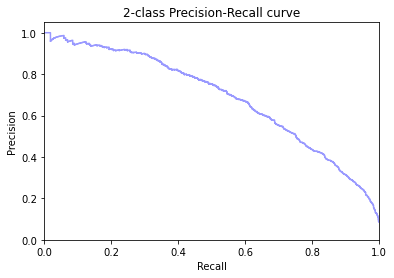

Threshold cutoff:  0.35338240042843055
Max F1-score at cut-off :  0.6356326703343207


<AxesSubplot:xlabel='thresholds'>

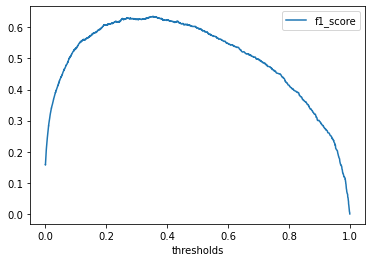

In [153]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
#Divde train and validation set
X_train, X_test, y_train, y_test = train_test_split(train_X, y, test_size=0.10, stratify=y)
clf.fit(X_train, y_train, cat_features=np.where(X_train.dtypes != np.float)[0], eval_set=[(X_test, y_test)], early_stopping_rounds=150)
y_pred = clf.predict_proba(X_test)

#Plot precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:,1])

#Plot f1 score for different values of threshold and find the optimal threshold
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

scrs = pd.DataFrame({'precision' : precision, 'recall' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

I also tried implementing Light Gradient Boosting Machine, which is known to have fast training speed and high efficiency. Light GBM has many hyperparameters (over 100), so I used Optuna, an open source hyperparameter optimization framework to automate hyperparameter search. 

In [53]:
import numpy as np
import optuna
from optuna.integration import LightGBMPruningCallback
import lightgbm as lgb
from lightgbm import LGBMClassifier 

#Change data type of categorical features from object to category
for c in train_X.columns:
    col_type = train_X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        train_X[c] = train_X[c].astype('category')

#Specify parameters to search
def objective(trial, X, y):
    param_grid = param_grid = {
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    #Use Kfold CV
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)
    cv_scores = np.empty(5)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(train_X, y)):
        X_train, X_test = train_X.iloc[train_idx], train_X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=100,
            callbacks=[LightGBMPruningCallback(trial, "binary_logloss")],
        )
        preds = model.predict_proba(X_test)
        cv_scores[idx] = log_loss(y_test, preds)
        
    return np.mean(cv_scores)

study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, train_X, y)
study.optimize(func, n_trials=100)

print(f"\tBest value: {study.best_value:.5f}")
print(f"\tBest params:")

#Print out the values of the best performing hyperparameters
for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

/var/folders/pp/g6wfrpm95djb5pnq718w9xyw0000gn/T/ipykernel_26453/4054073535.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X[c] = train_X[c].astype('category')
[I 2022-05-31 07:53:59,797] A new study created in memory with name: LGBM Classifier
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[LightGBM] [Warning] lambda_l1 is set=2.1321472698030117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1321472698030117
[LightGBM] [Warning] feature_fraction is set=0.5945113194739613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5945113194739613
[LightGBM] [Warning] bagging_fraction is set=0.5458737932163868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458737932163868
[LightGBM] [Warning] lambda_l2 is set=0.4762634472815413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4762634472815413
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.202791
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.187765
[3]	valid_0's binary_logloss: 0.176583
[4]	valid_0's binary_logloss: 0.16867
[5]	valid_0's binary_logloss: 0.161715
[6]	valid_0's binary_logloss: 0.156099
[7]	valid_0's binary_logloss: 0.151429
[8]	valid_0's binary_logloss: 0.147146
[9]	valid_0's binary_logloss: 0.143597
[10]	valid_0's binary_logloss: 0.140574
[11]	valid_0's binary_logloss: 0.137913
[12]	valid_0's binary_logloss: 0.135275
[13]	valid_0's binary_logloss: 0.132987
[14]	valid_0's binary_logloss: 0.131336
[15]	valid_0's binary_logloss: 0.129646
[16]	valid_0's binary_logloss: 0.128009
[17]	valid_0's binary_logloss: 0.126668
[18]	valid_0's binary_logloss: 0.125472
[19]	valid_0's binary_logloss: 0.1245
[20]	valid_0's binary_logloss: 0.123479
[21]	valid_0's binary_logloss: 0.122469
[22]	valid_0's binary_logloss: 0.121747
[23]	valid_0's binary_logloss: 0.120993
[24]	valid_0's binary_logloss:

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[2]	valid_0's binary_logloss: 0.186892
[3]	valid_0's binary_logloss: 0.175404
[4]	valid_0's binary_logloss: 0.167115


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.160215
[6]	valid_0's binary_logloss: 0.154586
[7]	valid_0's binary_logloss: 0.149807
[8]	valid_0's binary_logloss: 0.145415


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.141789
[10]	valid_0's binary_logloss: 0.138631
[11]	valid_0's binary_logloss: 0.135886


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.133315
[13]	valid_0's binary_logloss: 0.130929
[14]	valid_0's binary_logloss: 0.129103


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[15]	valid_0's binary_logloss: 0.127373
[16]	valid_0's binary_logloss: 0.125798
[17]	valid_0's binary_logloss: 0.124486
[18]	valid_0's binary_logloss: 0.123192
[19]	valid_0's binary_logloss: 0.122188


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.121156
[21]	valid_0's binary_logloss: 0.12006
[22]	valid_0's binary_logloss: 0.119232


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.11846
[24]	valid_0's binary_logloss: 0.117683
[25]	valid_0's binary_logloss: 0.117134
[26]	valid_0's binary_logloss: 0.116674


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.116117
[28]	valid_0's binary_logloss: 0.115564
[29]	valid_0's binary_logloss: 0.115118


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.114683
[31]	valid_0's binary_logloss: 0.114228


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[32]	valid_0's binary_logloss: 0.113835
[33]	valid_0's binary_logloss: 0.113528


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.113219
[35]	valid_0's binary_logloss: 0.112992


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.112723
[37]	valid_0's binary_logloss: 0.112507
[38]	valid_0's binary_logloss: 0.112273


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112035
[40]	valid_0's binary_logloss: 0.11193
[41]	valid_0's binary_logloss: 0.111756


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.111578
[43]	valid_0's binary_logloss: 0.111443
[44]	valid_0's binary_logloss: 0.111351


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.111158
[46]	valid_0's binary_logloss: 0.111043
[47]	valid_0's binary_logloss: 0.110973


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.110896
[49]	valid_0's binary_logloss: 0.110768
[50]	valid_0's binary_logloss: 0.11069
[51]	valid_0's binary_logloss: 0.110664


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.110589
[53]	valid_0's binary_logloss: 0.110539
[54]	valid_0's binary_logloss: 0.110542
[55]	valid_0's binary_logloss: 0.110578
[56]	valid_0's binary_logloss: 0.110481


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.110408
[58]	valid_0's binary_logloss: 0.110343
[59]	valid_0's binary_logloss: 0.110323


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.110305
[61]	valid_0's binary_logloss: 0.110181


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.11019
[63]	valid_0's binary_logloss: 0.110205


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110169
[65]	valid_0's binary_logloss: 0.110138


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.110065
[67]	valid_0's binary_logloss: 0.109987
[68]	valid_0's binary_logloss: 0.109904
[69]	valid_0's binary_logloss: 0.109929


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.109937
[71]	valid_0's binary_logloss: 0.109934
[72]	valid_0's binary_logloss: 0.109888
[73]	valid_0's binary_logloss: 0.109935


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.109921
[75]	valid_0's binary_logloss: 0.109918
[76]	valid_0's binary_logloss: 0.109964


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.109992
[78]	valid_0's binary_logloss: 0.109975
[79]	valid_0's binary_logloss: 0.109825
[80]	valid_0's binary_logloss: 0.109751


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.1097
[82]	valid_0's binary_logloss: 0.109689


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.109691
[84]	valid_0's binary_logloss: 0.109712
[85]	valid_0's binary_logloss: 0.109655


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.109681
[87]	valid_0's binary_logloss: 0.109728
[88]	valid_0's binary_logloss: 0.109718


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.109781
[90]	valid_0's binary_logloss: 0.109777
[91]	valid_0's binary_logloss: 0.109865


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.109883
[93]	valid_0's binary_logloss: 0.109939
[94]	valid_0's binary_logloss: 0.109902


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.109905
[96]	valid_0's binary_logloss: 0.109931
[97]	valid_0's binary_logloss: 0.109937


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.109923
[99]	valid_0's binary_logloss: 0.109927
[100]	valid_0's binary_logloss: 0.109959
Did not meet early stopping. Best iteration is:
[85]	valid_0's binary_logloss: 0.109655
[LightGBM] [Warning] lambda_l1 is set=2.1321472698030117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1321472698030117
[LightGBM] [Warning] feature_fraction is set=0.5945113194739613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5945113194739613
[LightGBM] [Warning] bagging_fraction is set=0.5458737932163868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458737932163868
[LightGBM] [Warning] lambda_l2 is set=0.4762634472815413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4762634472815413
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's binary_logloss: 0.203995
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[2]	valid_0's binary_logloss: 0.188568
[3]	valid_0's binary_logloss: 0.177261
[4]	valid_0's binary_logloss: 0.169203
[5]	valid_0's binary_logloss: 0.162468


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[6]	valid_0's binary_logloss: 0.157047
[7]	valid_0's binary_logloss: 0.152603
[8]	valid_0's binary_logloss: 0.148515
[9]	valid_0's binary_logloss: 0.144849


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `

[10]	valid_0's binary_logloss: 0.141789
[11]	valid_0's binary_logloss: 0.139169
[12]	valid_0's binary_logloss: 0.136683
[13]	valid_0's binary_logloss: 0.134317
[14]	valid_0's binary_logloss: 0.132531
[15]	valid_0's binary_logloss: 0.130901


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.129219
[17]	valid_0's binary_logloss: 0.127801
[18]	valid_0's binary_logloss: 0.126416
[19]	valid_0's binary_logloss: 0.125392


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.124381
[21]	valid_0's binary_logloss: 0.123475
[22]	valid_0's binary_logloss: 0.122674
[23]	valid_0's binary_logloss: 0.121967


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.121298
[25]	valid_0's binary_logloss: 0.120764
[26]	valid_0's binary_logloss: 0.120289
[27]	valid_0's binary_logloss: 0.119622


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.118986
[29]	valid_0's binary_logloss: 0.118445
[30]	valid_0's binary_logloss: 0.118008


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.117455
[32]	valid_0's binary_logloss: 0.117017
[33]	valid_0's binary_logloss: 0.116764
[34]	valid_0's binary_logloss: 0.116441


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.116128
[36]	valid_0's binary_logloss: 0.115873
[37]	valid_0's binary_logloss: 0.115614
[38]	valid_0's binary_logloss: 0.115403


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.115142
[40]	valid_0's binary_logloss: 0.11499
[41]	valid_0's binary_logloss: 0.114865
[42]	valid_0's binary_logloss: 0.114702


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.114577
[44]	valid_0's binary_logloss: 0.114438
[45]	valid_0's binary_logloss: 0.114263
[46]	valid_0's binary_logloss: 0.114026
[47]	valid_0's binary_logloss: 0.113879


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.113764
[49]	valid_0's binary_logloss: 0.113653
[50]	valid_0's binary_logloss: 0.113583
[51]	valid_0's binary_logloss: 0.113521


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.113395
[53]	valid_0's binary_logloss: 0.113347
[54]	valid_0's binary_logloss: 0.113277
[55]	valid_0's binary_logloss: 0.113179


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.113048
[57]	valid_0's binary_logloss: 0.112994
[58]	valid_0's binary_logloss: 0.112907


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.11285
[60]	valid_0's binary_logloss: 0.112868
[61]	valid_0's binary_logloss: 0.112858
[62]	valid_0's binary_logloss: 0.112859


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.11286
[64]	valid_0's binary_logloss: 0.112809
[65]	valid_0's binary_logloss: 0.112815
[66]	valid_0's binary_logloss: 0.112823


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.112821
[68]	valid_0's binary_logloss: 0.112745
[69]	valid_0's binary_logloss: 0.112722
[70]	valid_0's binary_logloss: 0.112716


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.112716
[72]	valid_0's binary_logloss: 0.112722
[73]	valid_0's binary_logloss: 0.112745
[74]	valid_0's binary_logloss: 0.112682


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.112669
[76]	valid_0's binary_logloss: 0.112625
[77]	valid_0's binary_logloss: 0.112635


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.112641
[79]	valid_0's binary_logloss: 0.112557
[80]	valid_0's binary_logloss: 0.112588


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.112544
[82]	valid_0's binary_logloss: 0.112531
[83]	valid_0's binary_logloss: 0.112502
[84]	valid_0's binary_logloss: 0.112451


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.112448
[86]	valid_0's binary_logloss: 0.112444
[87]	valid_0's binary_logloss: 0.112403
[88]	valid_0's binary_logloss: 0.112329
[89]	valid_0's binary_logloss: 0.112355


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.112391
[91]	valid_0's binary_logloss: 0.112451
[92]	valid_0's binary_logloss: 0.112502
[93]	valid_0's binary_logloss: 0.11255


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.112615
[95]	valid_0's binary_logloss: 0.112626
[96]	valid_0's binary_logloss: 0.112647
[97]	valid_0's binary_logloss: 0.112653
[98]	valid_0's binary_logloss: 0.112667


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[99]	valid_0's binary_logloss: 0.112645
[100]	valid_0's binary_logloss: 0.112679
Did not meet early stopping. Best iteration is:
[88]	valid_0's binary_logloss: 0.112329
[LightGBM] [Warning] lambda_l1 is set=2.1321472698030117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1321472698030117
[LightGBM] [Warning] feature_fraction is set=0.5945113194739613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5945113194739613
[LightGBM] [Warning] bagging_fraction is set=0.5458737932163868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458737932163868
[LightGBM] [Warning] lambda_l2 is set=0.4762634472815413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4762634472815413
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.203583
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.187906
[3]	valid_0's binary_logloss: 0.176345
[4]	valid_0's binary_logloss: 0.168235
[5]	valid_0's binary_logloss: 0.161429


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[6]	valid_0's binary_logloss: 0.155746
[7]	valid_0's binary_logloss: 0.151057
[8]	valid_0's binary_logloss: 0.146908
[9]	valid_0's binary_logloss: 0.143177
[10]	valid_0's binary_logloss: 0.140094


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.13752
[12]	valid_0's binary_logloss: 0.135042
[13]	valid_0's binary_logloss: 0.13278
[14]	valid_0's binary_logloss: 0.130779


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[15]	valid_0's binary_logloss: 0.12907
[16]	valid_0's binary_logloss: 0.127487
[17]	valid_0's binary_logloss: 0.126294
[18]	valid_0's binary_logloss: 0.125112
[19]	valid_0's binary_logloss: 0.124158


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.123193
[21]	valid_0's binary_logloss: 0.1223
[22]	valid_0's binary_logloss: 0.121442
[23]	valid_0's binary_logloss: 0.120846


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.120205
[25]	valid_0's binary_logloss: 0.119669
[26]	valid_0's binary_logloss: 0.119103
[27]	valid_0's binary_logloss: 0.118672
[28]	valid_0's binary_logloss: 0.118067
[29]	valid_0's binary_logloss: 0.117639


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.117214
[31]	valid_0's binary_logloss: 0.116858
[32]	valid_0's binary_logloss: 0.116555
[33]	valid_0's binary_logloss: 0.116266


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.115975
[35]	valid_0's binary_logloss: 0.115748
[36]	valid_0's binary_logloss: 0.115463
[37]	valid_0's binary_logloss: 0.115284


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.115073
[39]	valid_0's binary_logloss: 0.115014
[40]	valid_0's binary_logloss: 0.114834
[41]	valid_0's binary_logloss: 0.114718


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.114569
[43]	valid_0's binary_logloss: 0.114455
[44]	valid_0's binary_logloss: 0.114384
[45]	valid_0's binary_logloss: 0.114271


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.114152
[47]	valid_0's binary_logloss: 0.113978
[48]	valid_0's binary_logloss: 0.113886
[49]	valid_0's binary_logloss: 0.113794
[50]	valid_0's binary_logloss: 0.113745


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[51]	valid_0's binary_logloss: 0.113749
[52]	valid_0's binary_logloss: 0.11375
[53]	valid_0's binary_logloss: 0.113688


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.113611
[55]	valid_0's binary_logloss: 0.113596
[56]	valid_0's binary_logloss: 0.113447
[57]	valid_0's binary_logloss: 0.113415


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.113293
[59]	valid_0's binary_logloss: 0.113187
[60]	valid_0's binary_logloss: 0.113111
[61]	valid_0's binary_logloss: 0.113091


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.113071
[63]	valid_0's binary_logloss: 0.113052
[64]	valid_0's binary_logloss: 0.113007
[65]	valid_0's binary_logloss: 0.113014


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.113008
[67]	valid_0's binary_logloss: 0.113008
[68]	valid_0's binary_logloss: 0.112922
[69]	valid_0's binary_logloss: 0.112912


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.112895
[71]	valid_0's binary_logloss: 0.112893
[72]	valid_0's binary_logloss: 0.112873
[73]	valid_0's binary_logloss: 0.11286


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.112888
[75]	valid_0's binary_logloss: 0.112885
[76]	valid_0's binary_logloss: 0.112866
[77]	valid_0's binary_logloss: 0.112816


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.112808
[79]	valid_0's binary_logloss: 0.11276
[80]	valid_0's binary_logloss: 0.112803


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.112793
[82]	valid_0's binary_logloss: 0.112775
[83]	valid_0's binary_logloss: 0.112768
[84]	valid_0's binary_logloss: 0.112753


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.112781
[86]	valid_0's binary_logloss: 0.112816
[87]	valid_0's binary_logloss: 0.112855
[88]	valid_0's binary_logloss: 0.112833


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.112886
[90]	valid_0's binary_logloss: 0.112927
[91]	valid_0's binary_logloss: 0.112953
[92]	valid_0's binary_logloss: 0.112972


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.113006
[94]	valid_0's binary_logloss: 0.113018
[95]	valid_0's binary_logloss: 0.113022
[96]	valid_0's binary_logloss: 0.11303
[97]	valid_0's binary_logloss: 0.112961


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.112926
[99]	valid_0's binary_logloss: 0.112886
[100]	valid_0's binary_logloss: 0.112888
Did not meet early stopping. Best iteration is:
[84]	valid_0's binary_logloss: 0.112753
[LightGBM] [Warning] lambda_l1 is set=2.1321472698030117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1321472698030117
[LightGBM] [Warning] feature_fraction is set=0.5945113194739613, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5945113194739613
[LightGBM] [Warning] bagging_fraction is set=0.5458737932163868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5458737932163868
[LightGBM] [Warning] lambda_l2 is set=0.4762634472815413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4762634472815413
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[1]	valid_0's binary_logloss: 0.203977
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[2]	valid_0's binary_logloss: 0.188444
[3]	valid_0's binary_logloss: 0.177237
[4]	valid_0's binary_logloss: 0.169176
[5]	valid_0's binary_logloss: 0.162292
[6]	valid_0's binary_logloss: 0.156901


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.152386
[8]	valid_0's binary_logloss: 0.148111
[9]	valid_0's binary_logloss: 0.14457
[10]	valid_0's binary_logloss: 0.141572
[11]	valid_0's binary_logloss: 0.138923


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.136254
[13]	valid_0's binary_logloss: 0.133941
[14]	valid_0's binary_logloss: 0.132232
[15]	valid_0's binary_logloss: 0.130539
[16]	valid_0's binary_logloss: 0.128995


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.127647
[18]	valid_0's binary_logloss: 0.126304
[19]	valid_0's binary_logloss: 0.125283
[20]	valid_0's binary_logloss: 0.124323


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[21]	valid_0's binary_logloss: 0.123257
[22]	valid_0's binary_logloss: 0.12241
[23]	valid_0's binary_logloss: 0.121642
[24]	valid_0's binary_logloss: 0.120828
[25]	valid_0's binary_logloss: 0.120304


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[26]	valid_0's binary_logloss: 0.119864
[27]	valid_0's binary_logloss: 0.119185
[28]	valid_0's binary_logloss: 0.118459
[29]	valid_0's binary_logloss: 0.118042


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.117427
[31]	valid_0's binary_logloss: 0.11697
[32]	valid_0's binary_logloss: 0.116547
[33]	valid_0's binary_logloss: 0.116291


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.116017
[35]	valid_0's binary_logloss: 0.115684
[36]	valid_0's binary_logloss: 0.115463


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.115268
[38]	valid_0's binary_logloss: 0.115111
[39]	valid_0's binary_logloss: 0.11489
[40]	valid_0's binary_logloss: 0.114707


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.114447
[42]	valid_0's binary_logloss: 0.114247
[43]	valid_0's binary_logloss: 0.114117
[44]	valid_0's binary_logloss: 0.114056


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.113915
[46]	valid_0's binary_logloss: 0.113764
[47]	valid_0's binary_logloss: 0.113609


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.113455
[49]	valid_0's binary_logloss: 0.113231
[50]	valid_0's binary_logloss: 0.113147


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.113019
[52]	valid_0's binary_logloss: 0.112931
[53]	valid_0's binary_logloss: 0.112875
[54]	valid_0's binary_logloss: 0.112769
[55]	valid_0's binary_logloss: 0.112738


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.112622
[57]	valid_0's binary_logloss: 0.112596
[58]	valid_0's binary_logloss: 0.11251
[59]	valid_0's binary_logloss: 0.112494


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.112489
[61]	valid_0's binary_logloss: 0.112432
[62]	valid_0's binary_logloss: 0.112382
[63]	valid_0's binary_logloss: 0.112343


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.112368
[65]	valid_0's binary_logloss: 0.112251
[66]	valid_0's binary_logloss: 0.112248


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.11221
[68]	valid_0's binary_logloss: 0.112178
[69]	valid_0's binary_logloss: 0.112094
[70]	valid_0's binary_logloss: 0.111998


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.112028
[72]	valid_0's binary_logloss: 0.112035
[73]	valid_0's binary_logloss: 0.111987
[74]	valid_0's binary_logloss: 0.111938


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.111901
[76]	valid_0's binary_logloss: 0.11187
[77]	valid_0's binary_logloss: 0.111873
[78]	valid_0's binary_logloss: 0.111864


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.111832
[80]	valid_0's binary_logloss: 0.111859
[81]	valid_0's binary_logloss: 0.111843
[82]	valid_0's binary_logloss: 0.111865


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.11181
[84]	valid_0's binary_logloss: 0.111809
[85]	valid_0's binary_logloss: 0.111821
[86]	valid_0's binary_logloss: 0.111777


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.111761
[88]	valid_0's binary_logloss: 0.11172
[89]	valid_0's binary_logloss: 0.111708
[90]	valid_0's binary_logloss: 0.111704


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.111751
[92]	valid_0's binary_logloss: 0.111727
[93]	valid_0's binary_logloss: 0.111738
[94]	valid_0's binary_logloss: 0.111739
[95]	valid_0's binary_logloss: 0.111754


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.111788
[97]	valid_0's binary_logloss: 0.111778
[98]	valid_0's binary_logloss: 0.111766
[99]	valid_0's binary_logloss: 0.111746
[100]	valid_0's binary_logloss: 0.111713
Did not meet early stopping. Best iteration is:
[90]	valid_0's binary_logloss: 0.111704


[I 2022-05-31 07:54:35,009] Trial 0 finished with value: 0.11176713787377321 and parameters: {'lambda_l1': 2.1321472698030117, 'lambda_l2': 0.4762634472815413, 'num_leaves': 141, 'feature_fraction': 0.5945113194739613, 'bagging_fraction': 0.5458737932163868, 'bagging_freq': 4, 'min_child_samples': 92}. Best is trial 0 with value: 0.11176713787377321.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] lambda_l1 is set=1.0926818181015138e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0926818181015138e-07
[LightGBM] [Warning] feature_fraction is set=0.7860793922212138, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7860793922212138
[LightGBM] [Warning] bagging_fraction is set=0.8075824879562925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8075824879562925
[LightGBM] [Warning] lambda_l2 is set=3.463408862605049e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.463408862605049e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	valid_0's binary_logloss: 0.199919
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.184761
[3]	valid_0's binary_logloss: 0.174507
[4]	valid_0's binary_logloss: 0.166885
[5]	valid_0's binary_logloss: 0.159965
[6]	valid_0's binary_logloss: 0.15471
[7]	valid_0's b

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.199517
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.184091
[3]	valid_0's binary_logloss: 0.173421
[4]	valid_0's binary_logloss: 0.165611
[5]	valid_0's binary_logloss: 0.158654
[6]	valid_0's binary_logloss: 0.153214
[7]	valid_0's binary_logloss: 0.148686
[8]	valid_0's binary_logloss: 0.144843
[9]	valid_0's binary_logloss: 0.141218
[10]	valid_0's binary_logloss: 0.138125
[11]	valid_0's binary_logloss: 0.135459


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this

[12]	valid_0's binary_logloss: 0.133056
[13]	valid_0's binary_logloss: 0.130837
[14]	valid_0's binary_logloss: 0.129077
[15]	valid_0's binary_logloss: 0.127341
[16]	valid_0's binary_logloss: 0.125869
[17]	valid_0's binary_logloss: 0.124545
[18]	valid_0's binary_logloss: 0.12335
[19]	valid_0's binary_logloss: 0.122267
[20]	valid_0's binary_logloss: 0.121254
[21]	valid_0's binary_logloss: 0.120301
[22]	valid_0's binary_logloss: 0.119478
[23]	valid_0's binary_logloss: 0.118716


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[24]	valid_0's binary_logloss: 0.11807
[25]	valid_0's binary_logloss: 0.11747
[26]	valid_0's binary_logloss: 0.116874
[27]	valid_0's binary_logloss: 0.116329
[28]	valid_0's binary_logloss: 0.11591
[29]	valid_0's binary_logloss: 0.115468
[30]	valid_0's binary_logloss: 0.11502
[31]	valid_0's binary_logloss: 0.114573
[32]	valid_0's binary_logloss: 0.114261
[33]	valid_0's binary_logloss: 0.113922


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[34]	valid_0's binary_logloss: 0.113649
[35]	valid_0's binary_logloss: 0.113422
[36]	valid_0's binary_logloss: 0.113185
[37]	valid_0's binary_logloss: 0.112987
[38]	valid_0's binary_logloss: 0.112743
[39]	valid_0's binary_logloss: 0.112512
[40]	valid_0's binary_logloss: 0.112284
[41]	valid_0's binary_logloss: 0.112052
[42]	valid_0's binary_logloss: 0.111867
[43]	valid_0's binary_logloss: 0.111722


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[44]	valid_0's binary_logloss: 0.111642
[45]	valid_0's binary_logloss: 0.111527
[46]	valid_0's binary_logloss: 0.111438
[47]	valid_0's binary_logloss: 0.11137
[48]	valid_0's binary_logloss: 0.111285
[49]	valid_0's binary_logloss: 0.111218
[50]	valid_0's binary_logloss: 0.111126
[51]	valid_0's binary_logloss: 0.111051
[52]	valid_0's binary_logloss: 0.110877
[53]	valid_0's binary_logloss: 0.11078
[54]	valid_0's binary_logloss: 0.110701


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[55]	valid_0's binary_logloss: 0.110489
[56]	valid_0's binary_logloss: 0.110382
[57]	valid_0's binary_logloss: 0.110348
[58]	valid_0's binary_logloss: 0.110289
[59]	valid_0's binary_logloss: 0.110098
[60]	valid_0's binary_logloss: 0.110051
[61]	valid_0's binary_logloss: 0.109924
[62]	valid_0's binary_logloss: 0.109874
[63]	valid_0's binary_logloss: 0.109787
[64]	valid_0's binary_logloss: 0.109619


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[65]	valid_0's binary_logloss: 0.109556
[66]	valid_0's binary_logloss: 0.109522
[67]	valid_0's binary_logloss: 0.109416
[68]	valid_0's binary_logloss: 0.109409
[69]	valid_0's binary_logloss: 0.109419
[70]	valid_0's binary_logloss: 0.109377
[71]	valid_0's binary_logloss: 0.109346
[72]	valid_0's binary_logloss: 0.109306
[73]	valid_0's binary_logloss: 0.109225
[74]	valid_0's binary_logloss: 0.109199
[75]	valid_0's binary_logloss: 0.109169


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[76]	valid_0's binary_logloss: 0.109173
[77]	valid_0's binary_logloss: 0.109137
[78]	valid_0's binary_logloss: 0.109011
[79]	valid_0's binary_logloss: 0.109002
[80]	valid_0's binary_logloss: 0.108964
[81]	valid_0's binary_logloss: 0.108946
[82]	valid_0's binary_logloss: 0.10889
[83]	valid_0's binary_logloss: 0.108749
[84]	valid_0's binary_logloss: 0.108757
[85]	valid_0's binary_logloss: 0.108754
[86]	valid_0's binary_logloss: 0.10871


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[87]	valid_0's binary_logloss: 0.108695
[88]	valid_0's binary_logloss: 0.108733
[89]	valid_0's binary_logloss: 0.108705
[90]	valid_0's binary_logloss: 0.108713
[91]	valid_0's binary_logloss: 0.108595
[92]	valid_0's binary_logloss: 0.108501
[93]	valid_0's binary_logloss: 0.108491
[94]	valid_0's binary_logloss: 0.108361
[95]	valid_0's binary_logloss: 0.10833
[96]	valid_0's binary_logloss: 0.108274


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[97]	valid_0's binary_logloss: 0.10827
[98]	valid_0's binary_logloss: 0.108249
[99]	valid_0's binary_logloss: 0.108283
[100]	valid_0's binary_logloss: 0.10833
Did not meet early stopping. Best iteration is:
[98]	valid_0's binary_logloss: 0.108249
[LightGBM] [Warning] lambda_l1 is set=1.0926818181015138e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0926818181015138e-07
[LightGBM] [Warning] feature_fraction is set=0.7860793922212138, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7860793922212138
[LightGBM] [Warning] bagging_fraction is set=0.8075824879562925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8075824879562925
[LightGBM] [Warning] lambda_l2 is set=3.463408862605049e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.463408862605049e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.200884
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.185853
[3]	valid_0's binary_logloss: 0.175774
[4]	valid_0's binary_logloss: 0.168089
[5]	valid_0's binary_logloss: 0.16121
[6]	valid_0's binary_logloss: 0.156056
[7]	valid_0's binary_logloss: 0.151606
[8]	valid_0's binary_logloss: 0.14789
[9]	valid_0's binary_logloss: 0.144298
[10]	valid_0's binary_logloss: 0.141274


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this

[11]	valid_0's binary_logloss: 0.138634
[12]	valid_0's binary_logloss: 0.136363
[13]	valid_0's binary_logloss: 0.134152
[14]	valid_0's binary_logloss: 0.132521
[15]	valid_0's binary_logloss: 0.130728
[16]	valid_0's binary_logloss: 0.12929
[17]	valid_0's binary_logloss: 0.12789
[18]	valid_0's binary_logloss: 0.126679
[19]	valid_0's binary_logloss: 0.125637


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[20]	valid_0's binary_logloss: 0.124549
[21]	valid_0's binary_logloss: 0.123626
[22]	valid_0's binary_logloss: 0.122797
[23]	valid_0's binary_logloss: 0.122083
[24]	valid_0's binary_logloss: 0.121393
[25]	valid_0's binary_logloss: 0.120845
[26]	valid_0's binary_logloss: 0.12028
[27]	valid_0's binary_logloss: 0.119734
[28]	valid_0's binary_logloss: 0.119202


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[29]	valid_0's binary_logloss: 0.118719
[30]	valid_0's binary_logloss: 0.11831
[31]	valid_0's binary_logloss: 0.11783
[32]	valid_0's binary_logloss: 0.117458
[33]	valid_0's binary_logloss: 0.117153
[34]	valid_0's binary_logloss: 0.116843
[35]	valid_0's binary_logloss: 0.116562
[36]	valid_0's binary_logloss: 0.116305
[37]	valid_0's binary_logloss: 0.116089
[38]	valid_0's binary_logloss: 0.115886


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[39]	valid_0's binary_logloss: 0.115682
[40]	valid_0's binary_logloss: 0.115507
[41]	valid_0's binary_logloss: 0.115347
[42]	valid_0's binary_logloss: 0.115137
[43]	valid_0's binary_logloss: 0.115027
[44]	valid_0's binary_logloss: 0.114916
[45]	valid_0's binary_logloss: 0.114764
[46]	valid_0's binary_logloss: 0.114566
[47]	valid_0's binary_logloss: 0.114464
[48]	valid_0's binary_logloss: 0.114173


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[49]	valid_0's binary_logloss: 0.114028
[50]	valid_0's binary_logloss: 0.113959
[51]	valid_0's binary_logloss: 0.113803
[52]	valid_0's binary_logloss: 0.113738
[53]	valid_0's binary_logloss: 0.113641
[54]	valid_0's binary_logloss: 0.113586
[55]	valid_0's binary_logloss: 0.113508
[56]	valid_0's binary_logloss: 0.113346
[57]	valid_0's binary_logloss: 0.113327
[58]	valid_0's binary_logloss: 0.113278


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[59]	valid_0's binary_logloss: 0.113264
[60]	valid_0's binary_logloss: 0.113228
[61]	valid_0's binary_logloss: 0.113162
[62]	valid_0's binary_logloss: 0.113158
[63]	valid_0's binary_logloss: 0.113224
[64]	valid_0's binary_logloss: 0.113055
[65]	valid_0's binary_logloss: 0.113072
[66]	valid_0's binary_logloss: 0.112997
[67]	valid_0's binary_logloss: 0.112882
[68]	valid_0's binary_logloss: 0.112817


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[69]	valid_0's binary_logloss: 0.112749
[70]	valid_0's binary_logloss: 0.112729
[71]	valid_0's binary_logloss: 0.112663
[72]	valid_0's binary_logloss: 0.112602
[73]	valid_0's binary_logloss: 0.112548
[74]	valid_0's binary_logloss: 0.112505
[75]	valid_0's binary_logloss: 0.112476
[76]	valid_0's binary_logloss: 0.112483
[77]	valid_0's binary_logloss: 0.112476


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[78]	valid_0's binary_logloss: 0.112451
[79]	valid_0's binary_logloss: 0.112438
[80]	valid_0's binary_logloss: 0.112406
[81]	valid_0's binary_logloss: 0.112403
[82]	valid_0's binary_logloss: 0.112351
[83]	valid_0's binary_logloss: 0.112364
[84]	valid_0's binary_logloss: 0.112243
[85]	valid_0's binary_logloss: 0.112242
[86]	valid_0's binary_logloss: 0.112125
[87]	valid_0's binary_logloss: 0.112134


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[88]	valid_0's binary_logloss: 0.112133
[89]	valid_0's binary_logloss: 0.112126
[90]	valid_0's binary_logloss: 0.112145
[91]	valid_0's binary_logloss: 0.11216
[92]	valid_0's binary_logloss: 0.112167
[93]	valid_0's binary_logloss: 0.112154
[94]	valid_0's binary_logloss: 0.112064
[95]	valid_0's binary_logloss: 0.112038
[96]	valid_0's binary_logloss: 0.112051
[97]	valid_0's binary_logloss: 0.112051


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.112019
[99]	valid_0's binary_logloss: 0.112013
[100]	valid_0's binary_logloss: 0.112004
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.112004
[LightGBM] [Warning] lambda_l1 is set=1.0926818181015138e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0926818181015138e-07
[LightGBM] [Warning] feature_fraction is set=0.7860793922212138, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7860793922212138
[LightGBM] [Warning] bagging_fraction is set=0.8075824879562925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8075824879562925
[LightGBM] [Warning] lambda_l2 is set=3.463408862605049e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.463408862605049e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.200131
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.185247
[3]	valid_0's binary_logloss: 0.174928
[4]	valid_0's binary_logloss: 0.16718
[5]	valid_0's binary_logloss: 0.160306
[6]	valid_0's binary_logloss: 0.15499
[7]	valid_0's binary_logloss: 0.150545
[8]	valid_0's binary_logloss: 0.146656
[9]	valid_0's binary_logloss: 0.143141
[10]	valid_0's binary_logloss: 0.140065
[11]	valid_0's binary_logloss: 0.137505
[12]	valid_0's binary_logloss: 0.135281
[13]	valid_0's binary_logloss: 0.133235


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[14]	valid_0's binary_logloss: 0.131517
[15]	valid_0's binary_logloss: 0.129765
[16]	valid_0's binary_logloss: 0.128396
[17]	valid_0's binary_logloss: 0.126973
[18]	valid_0's binary_logloss: 0.125715
[19]	valid_0's binary_logloss: 0.124598
[20]	valid_0's binary_logloss: 0.123603
[21]	valid_0's binary_logloss: 0.122647
[22]	valid_0's binary_logloss: 0.121869


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[23]	valid_0's binary_logloss: 0.121121
[24]	valid_0's binary_logloss: 0.120518
[25]	valid_0's binary_logloss: 0.119942
[26]	valid_0's binary_logloss: 0.119342
[27]	valid_0's binary_logloss: 0.118826
[28]	valid_0's binary_logloss: 0.118324
[29]	valid_0's binary_logloss: 0.117974
[30]	valid_0's binary_logloss: 0.117601
[31]	valid_0's binary_logloss: 0.117164


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[32]	valid_0's binary_logloss: 0.116906
[33]	valid_0's binary_logloss: 0.116577
[34]	valid_0's binary_logloss: 0.116215
[35]	valid_0's binary_logloss: 0.115865
[36]	valid_0's binary_logloss: 0.115683
[37]	valid_0's binary_logloss: 0.115491
[38]	valid_0's binary_logloss: 0.115298
[39]	valid_0's binary_logloss: 0.115085
[40]	valid_0's binary_logloss: 0.114904
[41]	valid_0's binary_logloss: 0.114752
[42]	valid_0's binary_logloss: 0.114598


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[43]	valid_0's binary_logloss: 0.114514
[44]	valid_0's binary_logloss: 0.11447
[45]	valid_0's binary_logloss: 0.114328
[46]	valid_0's binary_logloss: 0.114144
[47]	valid_0's binary_logloss: 0.114039
[48]	valid_0's binary_logloss: 0.113973
[49]	valid_0's binary_logloss: 0.113755
[50]	valid_0's binary_logloss: 0.113649
[51]	valid_0's binary_logloss: 0.113559
[52]	valid_0's binary_logloss: 0.113499
[53]	valid_0's binary_logloss: 0.113481


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[54]	valid_0's binary_logloss: 0.113436
[55]	valid_0's binary_logloss: 0.113338
[56]	valid_0's binary_logloss: 0.113217
[57]	valid_0's binary_logloss: 0.113172
[58]	valid_0's binary_logloss: 0.112979
[59]	valid_0's binary_logloss: 0.112903
[60]	valid_0's binary_logloss: 0.112835
[61]	valid_0's binary_logloss: 0.112757
[62]	valid_0's binary_logloss: 0.112739
[63]	valid_0's binary_logloss: 0.112575


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[64]	valid_0's binary_logloss: 0.112526
[65]	valid_0's binary_logloss: 0.112493
[66]	valid_0's binary_logloss: 0.112487
[67]	valid_0's binary_logloss: 0.112427
[68]	valid_0's binary_logloss: 0.11243
[69]	valid_0's binary_logloss: 0.112413
[70]	valid_0's binary_logloss: 0.112387
[71]	valid_0's binary_logloss: 0.112322
[72]	valid_0's binary_logloss: 0.112317
[73]	valid_0's binary_logloss: 0.112257


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[74]	valid_0's binary_logloss: 0.112178
[75]	valid_0's binary_logloss: 0.112079
[76]	valid_0's binary_logloss: 0.112
[77]	valid_0's binary_logloss: 0.11194
[78]	valid_0's binary_logloss: 0.111897
[79]	valid_0's binary_logloss: 0.111815
[80]	valid_0's binary_logloss: 0.111694
[81]	valid_0's binary_logloss: 0.111694
[82]	valid_0's binary_logloss: 0.111699
[83]	valid_0's binary_logloss: 0.111708
[84]	valid_0's binary_logloss: 0.111691


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[85]	valid_0's binary_logloss: 0.111625
[86]	valid_0's binary_logloss: 0.111622
[87]	valid_0's binary_logloss: 0.111602
[88]	valid_0's binary_logloss: 0.111556
[89]	valid_0's binary_logloss: 0.111549
[90]	valid_0's binary_logloss: 0.111514
[91]	valid_0's binary_logloss: 0.111529
[92]	valid_0's binary_logloss: 0.11152
[93]	valid_0's binary_logloss: 0.111509
[94]	valid_0's binary_logloss: 0.111437
[95]	valid_0's binary_logloss: 0.111415


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[96]	valid_0's binary_logloss: 0.111387
[97]	valid_0's binary_logloss: 0.111328
[98]	valid_0's binary_logloss: 0.111306
[99]	valid_0's binary_logloss: 0.111258
[100]	valid_0's binary_logloss: 0.111266
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.111258
[LightGBM] [Warning] lambda_l1 is set=1.0926818181015138e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0926818181015138e-07
[LightGBM] [Warning] feature_fraction is set=0.7860793922212138, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7860793922212138
[LightGBM] [Warning] bagging_fraction is set=0.8075824879562925, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8075824879562925
[LightGBM] [Warning] lambda_l2 is set=3.463408862605049e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.463408862605049e-06
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.200649
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.185565
[3]	valid_0's binary_logloss: 0.175436
[4]	valid_0's binary_logloss: 0.167752
[5]	valid_0's binary_logloss: 0.161013


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `st

[6]	valid_0's binary_logloss: 0.155754
[7]	valid_0's binary_logloss: 0.151437
[8]	valid_0's binary_logloss: 0.147569
[9]	valid_0's binary_logloss: 0.143978
[10]	valid_0's binary_logloss: 0.141008
[11]	valid_0's binary_logloss: 0.138508
[12]	valid_0's binary_logloss: 0.136202


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[13]	valid_0's binary_logloss: 0.134075
[14]	valid_0's binary_logloss: 0.13237
[15]	valid_0's binary_logloss: 0.130552
[16]	valid_0's binary_logloss: 0.129046
[17]	valid_0's binary_logloss: 0.127725
[18]	valid_0's binary_logloss: 0.12646
[19]	valid_0's binary_logloss: 0.125501
[20]	valid_0's binary_logloss: 0.124515
[21]	valid_0's binary_logloss: 0.123505


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[22]	valid_0's binary_logloss: 0.12267
[23]	valid_0's binary_logloss: 0.1219
[24]	valid_0's binary_logloss: 0.121151
[25]	valid_0's binary_logloss: 0.12057
[26]	valid_0's binary_logloss: 0.119965
[27]	valid_0's binary_logloss: 0.119426
[28]	valid_0's binary_logloss: 0.118935
[29]	valid_0's binary_logloss: 0.118438


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[30]	valid_0's binary_logloss: 0.11808
[31]	valid_0's binary_logloss: 0.117658
[32]	valid_0's binary_logloss: 0.11729
[33]	valid_0's binary_logloss: 0.116984
[34]	valid_0's binary_logloss: 0.116694
[35]	valid_0's binary_logloss: 0.116338
[36]	valid_0's binary_logloss: 0.116028
[37]	valid_0's binary_logloss: 0.115749


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[38]	valid_0's binary_logloss: 0.115528
[39]	valid_0's binary_logloss: 0.115288
[40]	valid_0's binary_logloss: 0.115123
[41]	valid_0's binary_logloss: 0.114966
[42]	valid_0's binary_logloss: 0.11483
[43]	valid_0's binary_logloss: 0.11472
[44]	valid_0's binary_logloss: 0.114645
[45]	valid_0's binary_logloss: 0.1144
[46]	valid_0's binary_logloss: 0.114276


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[47]	valid_0's binary_logloss: 0.114231
[48]	valid_0's binary_logloss: 0.114098
[49]	valid_0's binary_logloss: 0.114025
[50]	valid_0's binary_logloss: 0.113946
[51]	valid_0's binary_logloss: 0.113914
[52]	valid_0's binary_logloss: 0.113721


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.113522
[54]	valid_0's binary_logloss: 0.113478
[55]	valid_0's binary_logloss: 0.113394
[56]	valid_0's binary_logloss: 0.113302
[57]	valid_0's binary_logloss: 0.113184


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[58]	valid_0's binary_logloss: 0.113113
[59]	valid_0's binary_logloss: 0.112923
[60]	valid_0's binary_logloss: 0.112757
[61]	valid_0's binary_logloss: 0.112691
[62]	valid_0's binary_logloss: 0.112658
[63]	valid_0's binary_logloss: 0.112616
[64]	valid_0's binary_logloss: 0.112538
[65]	valid_0's binary_logloss: 0.112457
[66]	valid_0's binary_logloss: 0.112407
[67]	valid_0's binary_logloss: 0.11238
[68]	valid_0's binary_logloss: 0.112388


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[69]	valid_0's binary_logloss: 0.112405
[70]	valid_0's binary_logloss: 0.112384
[71]	valid_0's binary_logloss: 0.112359
[72]	valid_0's binary_logloss: 0.112351
[73]	valid_0's binary_logloss: 0.112359
[74]	valid_0's binary_logloss: 0.112246
[75]	valid_0's binary_logloss: 0.112204


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[76]	valid_0's binary_logloss: 0.112166
[77]	valid_0's binary_logloss: 0.112151
[78]	valid_0's binary_logloss: 0.112128
[79]	valid_0's binary_logloss: 0.11216
[80]	valid_0's binary_logloss: 0.112136
[81]	valid_0's binary_logloss: 0.112111
[82]	valid_0's binary_logloss: 0.112105


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.111924
[84]	valid_0's binary_logloss: 0.111872
[85]	valid_0's binary_logloss: 0.111833
[86]	valid_0's binary_logloss: 0.111727
[87]	valid_0's binary_logloss: 0.11169
[88]	valid_0's binary_logloss: 0.111692


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[89]	valid_0's binary_logloss: 0.11168
[90]	valid_0's binary_logloss: 0.111581
[91]	valid_0's binary_logloss: 0.111568
[92]	valid_0's binary_logloss: 0.111462
[93]	valid_0's binary_logloss: 0.111447
[94]	valid_0's binary_logloss: 0.111353
[95]	valid_0's binary_logloss: 0.111241


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[96]	valid_0's binary_logloss: 0.111247
[97]	valid_0's binary_logloss: 0.11117
[98]	valid_0's binary_logloss: 0.111126
[99]	valid_0's binary_logloss: 0.111125
[100]	valid_0's binary_logloss: 0.111108
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.111108
[LightGBM] [Warning] lambda_l1 is set=0.09856710323030914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09856710323030914
[LightGBM] [Warning] feature_fraction is set=0.7326005630765051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7326005630765051
[LightGBM] [Warning] bagging_fraction is set=0.5678767203472138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5678767203472138
[LightGBM] [Warning] lambda_l2 is set=2.4991858481823653e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4991858481823653e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1]	valid_0's binary_logl

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[3]	valid_0's binary_logloss: 0.173254
[4]	valid_0's binary_logloss: 0.165699
[5]	valid_0's binary_logloss: 0.15895
[6]	valid_0's binary_logloss: 0.153394
[7]	valid_0's binary_logloss: 0.148654
[8]	valid_0's binary_logloss: 0.144654
[9]	valid_0's binary_logloss: 0.14109
[10]	valid_0's binary_logloss: 0.138132
[11]	valid_0's binary_logloss: 0.135553
[12]	valid_0's binary_logloss: 0.133332
[13]	valid_0's binary_logloss: 0.131108
[14]	valid_0's binary_logloss: 0.129501
[15]	valid_0's binary_logloss: 0.127836
[16]	valid_0's binary_logloss: 0.126313
[17]	valid_0's binary_logloss: 0.12502
[18]	valid_0's binary_logloss: 0.123828
[19]	valid_0's binary_logloss: 0.122958
[20]	valid_0's binary_logloss: 0.122062
[21]	valid_0's binary_logloss: 0.121158
[22]	valid_0's binary_logloss: 0.120337
[23]	valid_0's binary_logloss: 0.11963
[24]	valid_0's binary_logloss: 0.118986
[25]	valid_0's binary_logloss: 0.118516
[26]	valid_0's binary_logloss: 0.117985
[27]	valid_0's binary_logloss: 0.117475
[28]	valid_

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.198886
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182582
[3]	valid_0's binary_logloss: 0.171675
[4]	valid_0's binary_logloss: 0.163777
[5]	valid_0's binary_logloss: 0.156813
[6]	valid_0's binary_logloss: 0.151263
[7]	valid_0's binary_logloss: 0.14646


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `st

[8]	valid_0's binary_logloss: 0.14244
[9]	valid_0's binary_logloss: 0.138797
[10]	valid_0's binary_logloss: 0.135738
[11]	valid_0's binary_logloss: 0.13317
[12]	valid_0's binary_logloss: 0.1309
[13]	valid_0's binary_logloss: 0.128675
[14]	valid_0's binary_logloss: 0.126934


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[15]	valid_0's binary_logloss: 0.125153
[16]	valid_0's binary_logloss: 0.123679
[17]	valid_0's binary_logloss: 0.122383
[18]	valid_0's binary_logloss: 0.121157
[19]	valid_0's binary_logloss: 0.120203
[20]	valid_0's binary_logloss: 0.119243


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[21]	valid_0's binary_logloss: 0.118345
[22]	valid_0's binary_logloss: 0.117459
[23]	valid_0's binary_logloss: 0.116762
[24]	valid_0's binary_logloss: 0.116093
[25]	valid_0's binary_logloss: 0.115592
[26]	valid_0's binary_logloss: 0.115082
[27]	valid_0's binary_logloss: 0.114512


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[28]	valid_0's binary_logloss: 0.114066
[29]	valid_0's binary_logloss: 0.113624
[30]	valid_0's binary_logloss: 0.113193
[31]	valid_0's binary_logloss: 0.112824
[32]	valid_0's binary_logloss: 0.112641
[33]	valid_0's binary_logloss: 0.112348
[34]	valid_0's binary_logloss: 0.112127


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[35]	valid_0's binary_logloss: 0.111824
[36]	valid_0's binary_logloss: 0.111672
[37]	valid_0's binary_logloss: 0.11142
[38]	valid_0's binary_logloss: 0.111239
[39]	valid_0's binary_logloss: 0.110982
[40]	valid_0's binary_logloss: 0.110711
[41]	valid_0's binary_logloss: 0.110602


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[42]	valid_0's binary_logloss: 0.110453
[43]	valid_0's binary_logloss: 0.110389
[44]	valid_0's binary_logloss: 0.110276
[45]	valid_0's binary_logloss: 0.110232
[46]	valid_0's binary_logloss: 0.110097
[47]	valid_0's binary_logloss: 0.110039


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[48]	valid_0's binary_logloss: 0.109953
[49]	valid_0's binary_logloss: 0.1097
[50]	valid_0's binary_logloss: 0.109695
[51]	valid_0's binary_logloss: 0.109656
[52]	valid_0's binary_logloss: 0.109546
[53]	valid_0's binary_logloss: 0.109511


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[54]	valid_0's binary_logloss: 0.109449
[55]	valid_0's binary_logloss: 0.109361
[56]	valid_0's binary_logloss: 0.109274
[57]	valid_0's binary_logloss: 0.109249
[58]	valid_0's binary_logloss: 0.109309
[59]	valid_0's binary_logloss: 0.109241


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[60]	valid_0's binary_logloss: 0.109266
[61]	valid_0's binary_logloss: 0.1092
[62]	valid_0's binary_logloss: 0.109143
[63]	valid_0's binary_logloss: 0.10914
[64]	valid_0's binary_logloss: 0.109155
[65]	valid_0's binary_logloss: 0.109088
[66]	valid_0's binary_logloss: 0.109091


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[67]	valid_0's binary_logloss: 0.109118
[68]	valid_0's binary_logloss: 0.109135
[69]	valid_0's binary_logloss: 0.10915
[70]	valid_0's binary_logloss: 0.109066
[71]	valid_0's binary_logloss: 0.109094
[72]	valid_0's binary_logloss: 0.109069
[73]	valid_0's binary_logloss: 0.109102


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[74]	valid_0's binary_logloss: 0.109051
[75]	valid_0's binary_logloss: 0.109043
[76]	valid_0's binary_logloss: 0.109018
[77]	valid_0's binary_logloss: 0.109043
[78]	valid_0's binary_logloss: 0.109105
[79]	valid_0's binary_logloss: 0.109102
[80]	valid_0's binary_logloss: 0.109078


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[81]	valid_0's binary_logloss: 0.109097
[82]	valid_0's binary_logloss: 0.109136
[83]	valid_0's binary_logloss: 0.109157
[84]	valid_0's binary_logloss: 0.109189
[85]	valid_0's binary_logloss: 0.109174
[86]	valid_0's binary_logloss: 0.109202
[87]	valid_0's binary_logloss: 0.109182


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[88]	valid_0's binary_logloss: 0.109244
[89]	valid_0's binary_logloss: 0.109263
[90]	valid_0's binary_logloss: 0.109251
[91]	valid_0's binary_logloss: 0.109221
[92]	valid_0's binary_logloss: 0.10922
[93]	valid_0's binary_logloss: 0.109255
[94]	valid_0's binary_logloss: 0.109292
[95]	valid_0's binary_logloss: 0.10932
[96]	valid_0's binary_logloss: 0.109355


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[97]	valid_0's binary_logloss: 0.109364
[98]	valid_0's binary_logloss: 0.109306
[99]	valid_0's binary_logloss: 0.109312
[100]	valid_0's binary_logloss: 0.109254
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.109018
[LightGBM] [Warning] lambda_l1 is set=0.09856710323030914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09856710323030914
[LightGBM] [Warning] feature_fraction is set=0.7326005630765051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7326005630765051
[LightGBM] [Warning] bagging_fraction is set=0.5678767203472138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5678767203472138
[LightGBM] [Warning] lambda_l2 is set=2.4991858481823653e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4991858481823653e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning

[1]	valid_0's binary_logloss: 0.200133
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.184203
[3]	valid_0's binary_logloss: 0.173906
[4]	valid_0's binary_logloss: 0.166248
[5]	valid_0's binary_logloss: 0.159372
[6]	valid_0's binary_logloss: 0.153946
[7]	valid_0's binary_logloss: 0.149462


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `s

[8]	valid_0's binary_logloss: 0.145608
[9]	valid_0's binary_logloss: 0.141882
[10]	valid_0's binary_logloss: 0.138887
[11]	valid_0's binary_logloss: 0.136328
[12]	valid_0's binary_logloss: 0.133948
[13]	valid_0's binary_logloss: 0.131626
[14]	valid_0's binary_logloss: 0.129884


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[15]	valid_0's binary_logloss: 0.128174
[16]	valid_0's binary_logloss: 0.126804
[17]	valid_0's binary_logloss: 0.125461
[18]	valid_0's binary_logloss: 0.124158
[19]	valid_0's binary_logloss: 0.123158
[20]	valid_0's binary_logloss: 0.122189
[21]	valid_0's binary_logloss: 0.121314


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[22]	valid_0's binary_logloss: 0.120501
[23]	valid_0's binary_logloss: 0.119831
[24]	valid_0's binary_logloss: 0.119243
[25]	valid_0's binary_logloss: 0.118605
[26]	valid_0's binary_logloss: 0.118103
[27]	valid_0's binary_logloss: 0.117538


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[28]	valid_0's binary_logloss: 0.117053
[29]	valid_0's binary_logloss: 0.116689
[30]	valid_0's binary_logloss: 0.116245
[31]	valid_0's binary_logloss: 0.115949
[32]	valid_0's binary_logloss: 0.115705
[33]	valid_0's binary_logloss: 0.115484
[34]	valid_0's binary_logloss: 0.115216


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[35]	valid_0's binary_logloss: 0.11494
[36]	valid_0's binary_logloss: 0.114719
[37]	valid_0's binary_logloss: 0.114539
[38]	valid_0's binary_logloss: 0.114249
[39]	valid_0's binary_logloss: 0.114181
[40]	valid_0's binary_logloss: 0.114029


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[41]	valid_0's binary_logloss: 0.113888
[42]	valid_0's binary_logloss: 0.113758
[43]	valid_0's binary_logloss: 0.113663
[44]	valid_0's binary_logloss: 0.113508
[45]	valid_0's binary_logloss: 0.113407
[46]	valid_0's binary_logloss: 0.113328
[47]	valid_0's binary_logloss: 0.113232


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[48]	valid_0's binary_logloss: 0.113136
[49]	valid_0's binary_logloss: 0.112939
[50]	valid_0's binary_logloss: 0.11293
[51]	valid_0's binary_logloss: 0.112877
[52]	valid_0's binary_logloss: 0.112809
[53]	valid_0's binary_logloss: 0.112729
[54]	valid_0's binary_logloss: 0.11268
[55]	valid_0's binary_logloss: 0.112627


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[56]	valid_0's binary_logloss: 0.112565
[57]	valid_0's binary_logloss: 0.112555
[58]	valid_0's binary_logloss: 0.112535
[59]	valid_0's binary_logloss: 0.112472
[60]	valid_0's binary_logloss: 0.112426
[61]	valid_0's binary_logloss: 0.112358


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[62]	valid_0's binary_logloss: 0.112374
[63]	valid_0's binary_logloss: 0.112428
[64]	valid_0's binary_logloss: 0.112433
[65]	valid_0's binary_logloss: 0.112484
[66]	valid_0's binary_logloss: 0.112447
[67]	valid_0's binary_logloss: 0.112439
[68]	valid_0's binary_logloss: 0.112472


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[69]	valid_0's binary_logloss: 0.112517
[70]	valid_0's binary_logloss: 0.112447
[71]	valid_0's binary_logloss: 0.112409
[72]	valid_0's binary_logloss: 0.112447
[73]	valid_0's binary_logloss: 0.112463
[74]	valid_0's binary_logloss: 0.11247


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[75]	valid_0's binary_logloss: 0.112437
[76]	valid_0's binary_logloss: 0.112436
[77]	valid_0's binary_logloss: 0.11247
[78]	valid_0's binary_logloss: 0.112454
[79]	valid_0's binary_logloss: 0.112417
[80]	valid_0's binary_logloss: 0.112413
[81]	valid_0's binary_logloss: 0.11238
[82]	valid_0's binary_logloss: 0.112446


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[83]	valid_0's binary_logloss: 0.11244
[84]	valid_0's binary_logloss: 0.112408
[85]	valid_0's binary_logloss: 0.112404
[86]	valid_0's binary_logloss: 0.112418
[87]	valid_0's binary_logloss: 0.112384
[88]	valid_0's binary_logloss: 0.112642
[89]	valid_0's binary_logloss: 0.11238
[90]	valid_0's binary_logloss: 0.112385


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[91]	valid_0's binary_logloss: 0.112425
[92]	valid_0's binary_logloss: 0.112427
[93]	valid_0's binary_logloss: 0.112403
[94]	valid_0's binary_logloss: 0.112494
[95]	valid_0's binary_logloss: 0.11249
[96]	valid_0's binary_logloss: 0.112494
[97]	valid_0's binary_logloss: 0.112456


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.112443
[99]	valid_0's binary_logloss: 0.11247
[100]	valid_0's binary_logloss: 0.112495
Did not meet early stopping. Best iteration is:
[61]	valid_0's binary_logloss: 0.112358
[LightGBM] [Warning] lambda_l1 is set=0.09856710323030914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09856710323030914
[LightGBM] [Warning] feature_fraction is set=0.7326005630765051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7326005630765051
[LightGBM] [Warning] bagging_fraction is set=0.5678767203472138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5678767203472138
[LightGBM] [Warning] lambda_l2 is set=2.4991858481823653e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4991858481823653e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.199502
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.183904
[3]	valid_0's binary_logloss: 0.17324
[4]	valid_0's binary_logloss: 0.165369
[5]	valid_0's binary_logloss: 0.158564
[6]	valid_0's binary_logloss: 0.152952
[7]	valid_0's binary_logloss: 0.148192


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `st

[8]	valid_0's binary_logloss: 0.144163
[9]	valid_0's binary_logloss: 0.140465
[10]	valid_0's binary_logloss: 0.137424
[11]	valid_0's binary_logloss: 0.134853
[12]	valid_0's binary_logloss: 0.13256
[13]	valid_0's binary_logloss: 0.130554
[14]	valid_0's binary_logloss: 0.128862


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[15]	valid_0's binary_logloss: 0.127216
[16]	valid_0's binary_logloss: 0.12588
[17]	valid_0's binary_logloss: 0.124566
[18]	valid_0's binary_logloss: 0.123441
[19]	valid_0's binary_logloss: 0.122467
[20]	valid_0's binary_logloss: 0.121466
[21]	valid_0's binary_logloss: 0.120668


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[22]	valid_0's binary_logloss: 0.119913
[23]	valid_0's binary_logloss: 0.119276
[24]	valid_0's binary_logloss: 0.118702
[25]	valid_0's binary_logloss: 0.118124
[26]	valid_0's binary_logloss: 0.117532
[27]	valid_0's binary_logloss: 0.117119
[28]	valid_0's binary_logloss: 0.11667


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[29]	valid_0's binary_logloss: 0.116264
[30]	valid_0's binary_logloss: 0.115775
[31]	valid_0's binary_logloss: 0.11548
[32]	valid_0's binary_logloss: 0.115143
[33]	valid_0's binary_logloss: 0.114948
[34]	valid_0's binary_logloss: 0.114675
[35]	valid_0's binary_logloss: 0.114413


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[36]	valid_0's binary_logloss: 0.114166
[37]	valid_0's binary_logloss: 0.113985
[38]	valid_0's binary_logloss: 0.113846
[39]	valid_0's binary_logloss: 0.113683
[40]	valid_0's binary_logloss: 0.113521
[41]	valid_0's binary_logloss: 0.11341
[42]	valid_0's binary_logloss: 0.113358


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.113297
[44]	valid_0's binary_logloss: 0.11321
[45]	valid_0's binary_logloss: 0.113119
[46]	valid_0's binary_logloss: 0.113012
[47]	valid_0's binary_logloss: 0.11297
[48]	valid_0's binary_logloss: 0.112886
[49]	valid_0's binary_logloss: 0.112857


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.112762
[51]	valid_0's binary_logloss: 0.112722
[52]	valid_0's binary_logloss: 0.112631
[53]	valid_0's binary_logloss: 0.112593
[54]	valid_0's binary_logloss: 0.112538
[55]	valid_0's binary_logloss: 0.112451


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[56]	valid_0's binary_logloss: 0.112327
[57]	valid_0's binary_logloss: 0.112242
[58]	valid_0's binary_logloss: 0.112224
[59]	valid_0's binary_logloss: 0.112202
[60]	valid_0's binary_logloss: 0.112135
[61]	valid_0's binary_logloss: 0.111946
[62]	valid_0's binary_logloss: 0.111978


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[63]	valid_0's binary_logloss: 0.112033
[64]	valid_0's binary_logloss: 0.112
[65]	valid_0's binary_logloss: 0.112025
[66]	valid_0's binary_logloss: 0.112013
[67]	valid_0's binary_logloss: 0.111898
[68]	valid_0's binary_logloss: 0.111885
[69]	valid_0's binary_logloss: 0.111905


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[70]	valid_0's binary_logloss: 0.11187
[71]	valid_0's binary_logloss: 0.11187
[72]	valid_0's binary_logloss: 0.111882
[73]	valid_0's binary_logloss: 0.111893
[74]	valid_0's binary_logloss: 0.111826
[75]	valid_0's binary_logloss: 0.11178


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.111808
[77]	valid_0's binary_logloss: 0.111745
[78]	valid_0's binary_logloss: 0.111695
[79]	valid_0's binary_logloss: 0.111625
[80]	valid_0's binary_logloss: 0.111599


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[81]	valid_0's binary_logloss: 0.111534
[82]	valid_0's binary_logloss: 0.111498
[83]	valid_0's binary_logloss: 0.111434
[84]	valid_0's binary_logloss: 0.11142
[85]	valid_0's binary_logloss: 0.111432
[86]	valid_0's binary_logloss: 0.111458
[87]	valid_0's binary_logloss: 0.111477


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[88]	valid_0's binary_logloss: 0.111505
[89]	valid_0's binary_logloss: 0.111491
[90]	valid_0's binary_logloss: 0.111555
[91]	valid_0's binary_logloss: 0.111475
[92]	valid_0's binary_logloss: 0.111834
[93]	valid_0's binary_logloss: 0.111818
[94]	valid_0's binary_logloss: 0.111784
[95]	valid_0's binary_logloss: 0.111856


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.111784
[97]	valid_0's binary_logloss: 0.111727
[98]	valid_0's binary_logloss: 0.111689
[99]	valid_0's binary_logloss: 0.111627
[100]	valid_0's binary_logloss: 0.111624
Did not meet early stopping. Best iteration is:
[84]	valid_0's binary_logloss: 0.11142
[LightGBM] [Warning] lambda_l1 is set=0.09856710323030914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09856710323030914
[LightGBM] [Warning] feature_fraction is set=0.7326005630765051, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7326005630765051
[LightGBM] [Warning] bagging_fraction is set=0.5678767203472138, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5678767203472138
[LightGBM] [Warning] lambda_l2 is set=2.4991858481823653e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4991858481823653e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.199314
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.183629
[3]	valid_0's binary_logloss: 0.173043
[4]	valid_0's binary_logloss: 0.165549
[5]	valid_0's binary_logloss: 0.158778
[6]	valid_0's binary_logloss: 0.153374
[7]	valid_0's binary_logloss: 0.148584


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `s

[8]	valid_0's binary_logloss: 0.14458
[9]	valid_0's binary_logloss: 0.140932
[10]	valid_0's binary_logloss: 0.138042
[11]	valid_0's binary_logloss: 0.135466
[12]	valid_0's binary_logloss: 0.13319
[13]	valid_0's binary_logloss: 0.131104
[14]	valid_0's binary_logloss: 0.129427


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[15]	valid_0's binary_logloss: 0.127757
[16]	valid_0's binary_logloss: 0.126327
[17]	valid_0's binary_logloss: 0.124927
[18]	valid_0's binary_logloss: 0.123676
[19]	valid_0's binary_logloss: 0.122751
[20]	valid_0's binary_logloss: 0.121794
[21]	valid_0's binary_logloss: 0.120773
[22]	valid_0's binary_logloss: 0.119951


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[23]	valid_0's binary_logloss: 0.119125
[24]	valid_0's binary_logloss: 0.118508
[25]	valid_0's binary_logloss: 0.117966
[26]	valid_0's binary_logloss: 0.117465
[27]	valid_0's binary_logloss: 0.11681
[28]	valid_0's binary_logloss: 0.116295
[29]	valid_0's binary_logloss: 0.115805


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[30]	valid_0's binary_logloss: 0.115466
[31]	valid_0's binary_logloss: 0.115057
[32]	valid_0's binary_logloss: 0.114769
[33]	valid_0's binary_logloss: 0.114475
[34]	valid_0's binary_logloss: 0.114185
[35]	valid_0's binary_logloss: 0.113764


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[36]	valid_0's binary_logloss: 0.11356
[37]	valid_0's binary_logloss: 0.113368
[38]	valid_0's binary_logloss: 0.113227
[39]	valid_0's binary_logloss: 0.113114
[40]	valid_0's binary_logloss: 0.112933
[41]	valid_0's binary_logloss: 0.112796
[42]	valid_0's binary_logloss: 0.112597


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[43]	valid_0's binary_logloss: 0.1125
[44]	valid_0's binary_logloss: 0.11248
[45]	valid_0's binary_logloss: 0.112457
[46]	valid_0's binary_logloss: 0.112333
[47]	valid_0's binary_logloss: 0.112249
[48]	valid_0's binary_logloss: 0.112141


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[49]	valid_0's binary_logloss: 0.111841
[50]	valid_0's binary_logloss: 0.111862
[51]	valid_0's binary_logloss: 0.111813
[52]	valid_0's binary_logloss: 0.111767
[53]	valid_0's binary_logloss: 0.111682
[54]	valid_0's binary_logloss: 0.11162


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[55]	valid_0's binary_logloss: 0.111518
[56]	valid_0's binary_logloss: 0.111465
[57]	valid_0's binary_logloss: 0.111421
[58]	valid_0's binary_logloss: 0.111347
[59]	valid_0's binary_logloss: 0.111321
[60]	valid_0's binary_logloss: 0.111327
[61]	valid_0's binary_logloss: 0.111234


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[62]	valid_0's binary_logloss: 0.111146
[63]	valid_0's binary_logloss: 0.111094
[64]	valid_0's binary_logloss: 0.111037
[65]	valid_0's binary_logloss: 0.110988
[66]	valid_0's binary_logloss: 0.110993
[67]	valid_0's binary_logloss: 0.110926
[68]	valid_0's binary_logloss: 0.110872
[69]	valid_0's binary_logloss: 0.110914


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[70]	valid_0's binary_logloss: 0.110838
[71]	valid_0's binary_logloss: 0.110841
[72]	valid_0's binary_logloss: 0.110858
[73]	valid_0's binary_logloss: 0.110842
[74]	valid_0's binary_logloss: 0.110771
[75]	valid_0's binary_logloss: 0.110738
[76]	valid_0's binary_logloss: 0.110732


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[77]	valid_0's binary_logloss: 0.110767
[78]	valid_0's binary_logloss: 0.110801
[79]	valid_0's binary_logloss: 0.110828
[80]	valid_0's binary_logloss: 0.110853
[81]	valid_0's binary_logloss: 0.110854
[82]	valid_0's binary_logloss: 0.110849


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[83]	valid_0's binary_logloss: 0.110827
[84]	valid_0's binary_logloss: 0.11075
[85]	valid_0's binary_logloss: 0.110718
[86]	valid_0's binary_logloss: 0.110731
[87]	valid_0's binary_logloss: 0.110711
[88]	valid_0's binary_logloss: 0.110727
[89]	valid_0's binary_logloss: 0.110702


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[90]	valid_0's binary_logloss: 0.110716
[91]	valid_0's binary_logloss: 0.110707
[92]	valid_0's binary_logloss: 0.110723
[93]	valid_0's binary_logloss: 0.110741
[94]	valid_0's binary_logloss: 0.110705
[95]	valid_0's binary_logloss: 0.110728
[96]	valid_0's binary_logloss: 0.110727


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 07:55:05,446] Trial 2 finished with value: 0.11112125376587548 and parameters: {'lambda_l1': 0.0985671032303091

[97]	valid_0's binary_logloss: 0.110781
[98]	valid_0's binary_logloss: 0.1107
[99]	valid_0's binary_logloss: 0.110747
[100]	valid_0's binary_logloss: 0.110781
Did not meet early stopping. Best iteration is:
[98]	valid_0's binary_logloss: 0.1107
[LightGBM] [Warning] lambda_l1 is set=0.09853003750638932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09853003750638932
[LightGBM] [Warning] feature_fraction is set=0.4830577720623971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4830577720623971
[LightGBM] [Warning] bagging_fraction is set=0.7812429016356732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7812429016356732
[LightGBM] [Warning] lambda_l2 is set=1.6744274022499208e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6744274022499208e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.20419
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.188604
[3]	valid_0's binary_logloss: 0.176963
[4]	valid_0's binary_logloss: 0.170756
[5]	valid_0's binary_logloss: 0.164011
[6]	valid_0's binary_logloss: 0.15805
[7]	valid_0's binary_logloss: 0.153173
[8]	valid_0's binary_logloss: 0.149051
[9]	valid_0's binary_logloss: 0.145442
[10]	valid_0's binary_logloss: 0.142392
[11]	valid_0's binary_logloss: 0.13973
[12]	valid_0's binary_logloss: 0.137428
[13]	valid_0's binary_logloss: 0.134867
[14]	valid_0's binary_logloss: 0.132972
[15]	valid_0's binary_logloss: 0.131183
[16]	valid_0's binary_logloss: 0.129433
[17]	valid_0's binary_logloss: 0.128033
[18]	valid_0's binary_logloss: 0.126731
[19]	valid_0's binary_logloss: 0.125692
[20]	valid_0's binary_logloss: 0.124627
[21]	valid_0's binary_logloss: 0.123633
[22]	valid_0's binary_logloss: 0.122746
[23]	valid_0's binary_logloss: 0.121896
[24]	valid_0's binary_logloss:

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[4]	valid_0's binary_logloss: 0.169785
[5]	valid_0's binary_logloss: 0.162806
[6]	valid_0's binary_logloss: 0.156664
[7]	valid_0's binary_logloss: 0.151607
[8]	valid_0's binary_logloss: 0.147271
[9]	valid_0's binary_logloss: 0.143499
[10]	valid_0's binary_logloss: 0.140253
[11]	valid_0's binary_logloss: 0.137526
[12]	valid_0's binary_logloss: 0.135113
[13]	valid_0's binary_logloss: 0.132555
[14]	valid_0's binary_logloss: 0.1307


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this

[15]	valid_0's binary_logloss: 0.128718
[16]	valid_0's binary_logloss: 0.126953
[17]	valid_0's binary_logloss: 0.125467
[18]	valid_0's binary_logloss: 0.124143
[19]	valid_0's binary_logloss: 0.123066
[20]	valid_0's binary_logloss: 0.122014
[21]	valid_0's binary_logloss: 0.120899
[22]	valid_0's binary_logloss: 0.120013
[23]	valid_0's binary_logloss: 0.11921
[24]	valid_0's binary_logloss: 0.118432


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[25]	valid_0's binary_logloss: 0.117899
[26]	valid_0's binary_logloss: 0.117325
[27]	valid_0's binary_logloss: 0.116727
[28]	valid_0's binary_logloss: 0.116172
[29]	valid_0's binary_logloss: 0.115696
[30]	valid_0's binary_logloss: 0.115291
[31]	valid_0's binary_logloss: 0.114827
[32]	valid_0's binary_logloss: 0.114325
[33]	valid_0's binary_logloss: 0.113982
[34]	valid_0's binary_logloss: 0.113636


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[35]	valid_0's binary_logloss: 0.113282
[36]	valid_0's binary_logloss: 0.112984
[37]	valid_0's binary_logloss: 0.112813
[38]	valid_0's binary_logloss: 0.112547
[39]	valid_0's binary_logloss: 0.112283
[40]	valid_0's binary_logloss: 0.112156
[41]	valid_0's binary_logloss: 0.112017
[42]	valid_0's binary_logloss: 0.111822
[43]	valid_0's binary_logloss: 0.111656
[44]	valid_0's binary_logloss: 0.111526


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[45]	valid_0's binary_logloss: 0.111312
[46]	valid_0's binary_logloss: 0.111168
[47]	valid_0's binary_logloss: 0.110994
[48]	valid_0's binary_logloss: 0.110868
[49]	valid_0's binary_logloss: 0.110517
[50]	valid_0's binary_logloss: 0.11048
[51]	valid_0's binary_logloss: 0.110367
[52]	valid_0's binary_logloss: 0.110266
[53]	valid_0's binary_logloss: 0.110119
[54]	valid_0's binary_logloss: 0.110046


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[55]	valid_0's binary_logloss: 0.109948
[56]	valid_0's binary_logloss: 0.109821
[57]	valid_0's binary_logloss: 0.109641
[58]	valid_0's binary_logloss: 0.10946
[59]	valid_0's binary_logloss: 0.1094
[60]	valid_0's binary_logloss: 0.10937
[61]	valid_0's binary_logloss: 0.109355
[62]	valid_0's binary_logloss: 0.109307
[63]	valid_0's binary_logloss: 0.109268
[64]	valid_0's binary_logloss: 0.109214
[65]	valid_0's binary_logloss: 0.109137


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[66]	valid_0's binary_logloss: 0.109067
[67]	valid_0's binary_logloss: 0.108984
[68]	valid_0's binary_logloss: 0.108968
[69]	valid_0's binary_logloss: 0.108885
[70]	valid_0's binary_logloss: 0.108843
[71]	valid_0's binary_logloss: 0.108764
[72]	valid_0's binary_logloss: 0.108748
[73]	valid_0's binary_logloss: 0.108707
[74]	valid_0's binary_logloss: 0.108671
[75]	valid_0's binary_logloss: 0.108617


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[76]	valid_0's binary_logloss: 0.108625
[77]	valid_0's binary_logloss: 0.108616
[78]	valid_0's binary_logloss: 0.108589
[79]	valid_0's binary_logloss: 0.108534
[80]	valid_0's binary_logloss: 0.108527
[81]	valid_0's binary_logloss: 0.10852
[82]	valid_0's binary_logloss: 0.108503
[83]	valid_0's binary_logloss: 0.108383
[84]	valid_0's binary_logloss: 0.108317
[85]	valid_0's binary_logloss: 0.108239
[86]	valid_0's binary_logloss: 0.108218


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[87]	valid_0's binary_logloss: 0.108189
[88]	valid_0's binary_logloss: 0.10817
[89]	valid_0's binary_logloss: 0.108165
[90]	valid_0's binary_logloss: 0.108172
[91]	valid_0's binary_logloss: 0.108135
[92]	valid_0's binary_logloss: 0.108073
[93]	valid_0's binary_logloss: 0.108052
[94]	valid_0's binary_logloss: 0.108055
[95]	valid_0's binary_logloss: 0.108037


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[96]	valid_0's binary_logloss: 0.108025
[97]	valid_0's binary_logloss: 0.107978
[98]	valid_0's binary_logloss: 0.107975
[99]	valid_0's binary_logloss: 0.107968
[100]	valid_0's binary_logloss: 0.107921
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.107921
[LightGBM] [Warning] lambda_l1 is set=0.09853003750638932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09853003750638932
[LightGBM] [Warning] feature_fraction is set=0.4830577720623971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4830577720623971
[LightGBM] [Warning] bagging_fraction is set=0.7812429016356732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7812429016356732
[LightGBM] [Warning] lambda_l2 is set=1.6744274022499208e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6744274022499208e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.205156
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.18957
[3]	valid_0's binary_logloss: 0.178109
[4]	valid_0's binary_logloss: 0.172023
[5]	valid_0's binary_logloss: 0.165155
[6]	valid_0's binary_logloss: 0.159353
[7]	valid_0's binary_logloss: 0.154557
[8]	valid_0's binary_logloss: 0.150587
[9]	valid_0's binary_logloss: 0.146796
[10]	valid_0's binary_logloss: 0.143677
[11]	valid_0's binary_logloss: 0.140892


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[12]	valid_0's binary_logloss: 0.138631
[13]	valid_0's binary_logloss: 0.13611
[14]	valid_0's binary_logloss: 0.134255
[15]	valid_0's binary_logloss: 0.132492
[16]	valid_0's binary_logloss: 0.130796
[17]	valid_0's binary_logloss: 0.129382
[18]	valid_0's binary_logloss: 0.128058
[19]	valid_0's binary_logloss: 0.126967
[20]	valid_0's binary_logloss: 0.125909
[21]	valid_0's binary_logloss: 0.124953


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[22]	valid_0's binary_logloss: 0.124118
[23]	valid_0's binary_logloss: 0.123291
[24]	valid_0's binary_logloss: 0.122466
[25]	valid_0's binary_logloss: 0.121977
[26]	valid_0's binary_logloss: 0.12145
[27]	valid_0's binary_logloss: 0.120849
[28]	valid_0's binary_logloss: 0.120179
[29]	valid_0's binary_logloss: 0.119695
[30]	valid_0's binary_logloss: 0.11934


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[31]	valid_0's binary_logloss: 0.118834
[32]	valid_0's binary_logloss: 0.11833
[33]	valid_0's binary_logloss: 0.118065
[34]	valid_0's binary_logloss: 0.117766
[35]	valid_0's binary_logloss: 0.117381
[36]	valid_0's binary_logloss: 0.117039
[37]	valid_0's binary_logloss: 0.116796
[38]	valid_0's binary_logloss: 0.116497
[39]	valid_0's binary_logloss: 0.116213


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[40]	valid_0's binary_logloss: 0.11604
[41]	valid_0's binary_logloss: 0.11589
[42]	valid_0's binary_logloss: 0.115651
[43]	valid_0's binary_logloss: 0.115392
[44]	valid_0's binary_logloss: 0.115265
[45]	valid_0's binary_logloss: 0.115063
[46]	valid_0's binary_logloss: 0.114879
[47]	valid_0's binary_logloss: 0.114676
[48]	valid_0's binary_logloss: 0.114584
[49]	valid_0's binary_logloss: 0.114372
[50]	valid_0's binary_logloss: 0.114267


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[51]	valid_0's binary_logloss: 0.114077
[52]	valid_0's binary_logloss: 0.113942
[53]	valid_0's binary_logloss: 0.113888
[54]	valid_0's binary_logloss: 0.11382
[55]	valid_0's binary_logloss: 0.113733
[56]	valid_0's binary_logloss: 0.113556
[57]	valid_0's binary_logloss: 0.113479
[58]	valid_0's binary_logloss: 0.113367
[59]	valid_0's binary_logloss: 0.113161
[60]	valid_0's binary_logloss: 0.113102


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[61]	valid_0's binary_logloss: 0.113032
[62]	valid_0's binary_logloss: 0.112984
[63]	valid_0's binary_logloss: 0.112943
[64]	valid_0's binary_logloss: 0.112764
[65]	valid_0's binary_logloss: 0.112721
[66]	valid_0's binary_logloss: 0.1127
[67]	valid_0's binary_logloss: 0.112584
[68]	valid_0's binary_logloss: 0.112491


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[69]	valid_0's binary_logloss: 0.112437
[70]	valid_0's binary_logloss: 0.11227
[71]	valid_0's binary_logloss: 0.112205
[72]	valid_0's binary_logloss: 0.112182
[73]	valid_0's binary_logloss: 0.11216
[74]	valid_0's binary_logloss: 0.112147
[75]	valid_0's binary_logloss: 0.1121
[76]	valid_0's binary_logloss: 0.112011
[77]	valid_0's binary_logloss: 0.111995


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[78]	valid_0's binary_logloss: 0.111947
[79]	valid_0's binary_logloss: 0.111833
[80]	valid_0's binary_logloss: 0.111808
[81]	valid_0's binary_logloss: 0.111764
[82]	valid_0's binary_logloss: 0.111739
[83]	valid_0's binary_logloss: 0.111644
[84]	valid_0's binary_logloss: 0.111632
[85]	valid_0's binary_logloss: 0.111593
[86]	valid_0's binary_logloss: 0.111539
[87]	valid_0's binary_logloss: 0.111535


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[88]	valid_0's binary_logloss: 0.111493
[89]	valid_0's binary_logloss: 0.111434
[90]	valid_0's binary_logloss: 0.111439
[91]	valid_0's binary_logloss: 0.111399
[92]	valid_0's binary_logloss: 0.111392
[93]	valid_0's binary_logloss: 0.111378
[94]	valid_0's binary_logloss: 0.111392
[95]	valid_0's binary_logloss: 0.111339
[96]	valid_0's binary_logloss: 0.111305


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[97]	valid_0's binary_logloss: 0.111292
[98]	valid_0's binary_logloss: 0.111259
[99]	valid_0's binary_logloss: 0.111239
[100]	valid_0's binary_logloss: 0.111216
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.111216
[LightGBM] [Warning] lambda_l1 is set=0.09853003750638932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09853003750638932
[LightGBM] [Warning] feature_fraction is set=0.4830577720623971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4830577720623971
[LightGBM] [Warning] bagging_fraction is set=0.7812429016356732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7812429016356732
[LightGBM] [Warning] lambda_l2 is set=1.6744274022499208e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6744274022499208e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.204205
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.188456
[3]	valid_0's binary_logloss: 0.176601
[4]	valid_0's binary_logloss: 0.170718
[5]	valid_0's binary_logloss: 0.163962
[6]	valid_0's binary_logloss: 0.157839
[7]	valid_0's binary_logloss: 0.152741
[8]	valid_0's binary_logloss: 0.148487
[9]	valid_0's binary_logloss: 0.144854
[10]	valid_0's binary_logloss: 0.141886
[11]	valid_0's binary_logloss: 0.139262


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[12]	valid_0's binary_logloss: 0.136891
[13]	valid_0's binary_logloss: 0.134519
[14]	valid_0's binary_logloss: 0.132613
[15]	valid_0's binary_logloss: 0.130882
[16]	valid_0's binary_logloss: 0.129193
[17]	valid_0's binary_logloss: 0.127779
[18]	valid_0's binary_logloss: 0.126577
[19]	valid_0's binary_logloss: 0.125515
[20]	valid_0's binary_logloss: 0.124489
[21]	valid_0's binary_logloss: 0.123528
[22]	valid_0's binary_logloss: 0.122736


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[23]	valid_0's binary_logloss: 0.122045
[24]	valid_0's binary_logloss: 0.121289
[25]	valid_0's binary_logloss: 0.120734
[26]	valid_0's binary_logloss: 0.120141
[27]	valid_0's binary_logloss: 0.119643
[28]	valid_0's binary_logloss: 0.119065
[29]	valid_0's binary_logloss: 0.118436
[30]	valid_0's binary_logloss: 0.118073
[31]	valid_0's binary_logloss: 0.117671
[32]	valid_0's binary_logloss: 0.117211


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[33]	valid_0's binary_logloss: 0.116958
[34]	valid_0's binary_logloss: 0.116739
[35]	valid_0's binary_logloss: 0.116294
[36]	valid_0's binary_logloss: 0.116071
[37]	valid_0's binary_logloss: 0.115854
[38]	valid_0's binary_logloss: 0.11556
[39]	valid_0's binary_logloss: 0.11534
[40]	valid_0's binary_logloss: 0.11521
[41]	valid_0's binary_logloss: 0.115007
[42]	valid_0's binary_logloss: 0.114718


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[43]	valid_0's binary_logloss: 0.114583
[44]	valid_0's binary_logloss: 0.114471
[45]	valid_0's binary_logloss: 0.114262
[46]	valid_0's binary_logloss: 0.114033
[47]	valid_0's binary_logloss: 0.113815
[48]	valid_0's binary_logloss: 0.113663
[49]	valid_0's binary_logloss: 0.113526
[50]	valid_0's binary_logloss: 0.113418


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[51]	valid_0's binary_logloss: 0.113245
[52]	valid_0's binary_logloss: 0.113133
[53]	valid_0's binary_logloss: 0.113028
[54]	valid_0's binary_logloss: 0.112928
[55]	valid_0's binary_logloss: 0.11281
[56]	valid_0's binary_logloss: 0.11259
[57]	valid_0's binary_logloss: 0.112476
[58]	valid_0's binary_logloss: 0.112365
[59]	valid_0's binary_logloss: 0.112314
[60]	valid_0's binary_logloss: 0.112245
[61]	valid_0's binary_logloss: 0.11215


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[62]	valid_0's binary_logloss: 0.11208
[63]	valid_0's binary_logloss: 0.112002
[64]	valid_0's binary_logloss: 0.111951
[65]	valid_0's binary_logloss: 0.111927
[66]	valid_0's binary_logloss: 0.1119
[67]	valid_0's binary_logloss: 0.111854
[68]	valid_0's binary_logloss: 0.111796
[69]	valid_0's binary_logloss: 0.111777


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[70]	valid_0's binary_logloss: 0.111732
[71]	valid_0's binary_logloss: 0.111745
[72]	valid_0's binary_logloss: 0.11172
[73]	valid_0's binary_logloss: 0.111724
[74]	valid_0's binary_logloss: 0.111688
[75]	valid_0's binary_logloss: 0.111623
[76]	valid_0's binary_logloss: 0.111555
[77]	valid_0's binary_logloss: 0.111542
[78]	valid_0's binary_logloss: 0.111527


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[79]	valid_0's binary_logloss: 0.111467
[80]	valid_0's binary_logloss: 0.111457
[81]	valid_0's binary_logloss: 0.111416
[82]	valid_0's binary_logloss: 0.1114
[83]	valid_0's binary_logloss: 0.111403
[84]	valid_0's binary_logloss: 0.111376
[85]	valid_0's binary_logloss: 0.111327
[86]	valid_0's binary_logloss: 0.111315
[87]	valid_0's binary_logloss: 0.111275
[88]	valid_0's binary_logloss: 0.111273


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[89]	valid_0's binary_logloss: 0.111274
[90]	valid_0's binary_logloss: 0.111263
[91]	valid_0's binary_logloss: 0.111297
[92]	valid_0's binary_logloss: 0.111293
[93]	valid_0's binary_logloss: 0.111292
[94]	valid_0's binary_logloss: 0.111272
[95]	valid_0's binary_logloss: 0.111297
[96]	valid_0's binary_logloss: 0.111307
[97]	valid_0's binary_logloss: 0.111229
[98]	valid_0's binary_logloss: 0.1112


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[99]	valid_0's binary_logloss: 0.111113
[100]	valid_0's binary_logloss: 0.11109
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.11109
[LightGBM] [Warning] lambda_l1 is set=0.09853003750638932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09853003750638932
[LightGBM] [Warning] feature_fraction is set=0.4830577720623971, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4830577720623971
[LightGBM] [Warning] bagging_fraction is set=0.7812429016356732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7812429016356732
[LightGBM] [Warning] lambda_l2 is set=1.6744274022499208e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6744274022499208e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: 

[1]	valid_0's binary_logloss: 0.2041
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.18901
[3]	valid_0's binary_logloss: 0.177546
[4]	valid_0's binary_logloss: 0.17151
[5]	valid_0's binary_logloss: 0.164678
[6]	valid_0's binary_logloss: 0.158706
[7]	valid_0's binary_logloss: 0.153868
[8]	valid_0's binary_logloss: 0.149775
[9]	valid_0's binary_logloss: 0.146239
[10]	valid_0's binary_logloss: 0.143223
[11]	valid_0's binary_logloss: 0.140563


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[12]	valid_0's binary_logloss: 0.138241
[13]	valid_0's binary_logloss: 0.135709
[14]	valid_0's binary_logloss: 0.133891
[15]	valid_0's binary_logloss: 0.131883
[16]	valid_0's binary_logloss: 0.13014
[17]	valid_0's binary_logloss: 0.128756
[18]	valid_0's binary_logloss: 0.127433
[19]	valid_0's binary_logloss: 0.126389
[20]	valid_0's binary_logloss: 0.125388
[21]	valid_0's binary_logloss: 0.124371
[22]	valid_0's binary_logloss: 0.123565


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[23]	valid_0's binary_logloss: 0.122715
[24]	valid_0's binary_logloss: 0.121907
[25]	valid_0's binary_logloss: 0.121307
[26]	valid_0's binary_logloss: 0.120778
[27]	valid_0's binary_logloss: 0.120189
[28]	valid_0's binary_logloss: 0.119601
[29]	valid_0's binary_logloss: 0.118942
[30]	valid_0's binary_logloss: 0.118593
[31]	valid_0's binary_logloss: 0.118057


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[32]	valid_0's binary_logloss: 0.117477
[33]	valid_0's binary_logloss: 0.117114
[34]	valid_0's binary_logloss: 0.116741
[35]	valid_0's binary_logloss: 0.116396
[36]	valid_0's binary_logloss: 0.116085
[37]	valid_0's binary_logloss: 0.115861
[38]	valid_0's binary_logloss: 0.115601
[39]	valid_0's binary_logloss: 0.115362
[40]	valid_0's binary_logloss: 0.115164
[41]	valid_0's binary_logloss: 0.115012


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[42]	valid_0's binary_logloss: 0.114836
[43]	valid_0's binary_logloss: 0.11464
[44]	valid_0's binary_logloss: 0.114506
[45]	valid_0's binary_logloss: 0.114249
[46]	valid_0's binary_logloss: 0.114048
[47]	valid_0's binary_logloss: 0.113918
[48]	valid_0's binary_logloss: 0.113834
[49]	valid_0's binary_logloss: 0.113498
[50]	valid_0's binary_logloss: 0.113415
[51]	valid_0's binary_logloss: 0.113188


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[52]	valid_0's binary_logloss: 0.113039
[53]	valid_0's binary_logloss: 0.112947
[54]	valid_0's binary_logloss: 0.112899
[55]	valid_0's binary_logloss: 0.112808
[56]	valid_0's binary_logloss: 0.112728
[57]	valid_0's binary_logloss: 0.112664
[58]	valid_0's binary_logloss: 0.112527
[59]	valid_0's binary_logloss: 0.112438
[60]	valid_0's binary_logloss: 0.112396
[61]	valid_0's binary_logloss: 0.112297


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[62]	valid_0's binary_logloss: 0.112266
[63]	valid_0's binary_logloss: 0.112174
[64]	valid_0's binary_logloss: 0.112166
[65]	valid_0's binary_logloss: 0.112062
[66]	valid_0's binary_logloss: 0.11201
[67]	valid_0's binary_logloss: 0.111917
[68]	valid_0's binary_logloss: 0.111861
[69]	valid_0's binary_logloss: 0.111855
[70]	valid_0's binary_logloss: 0.111759
[71]	valid_0's binary_logloss: 0.111727


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[72]	valid_0's binary_logloss: 0.111722
[73]	valid_0's binary_logloss: 0.111664
[74]	valid_0's binary_logloss: 0.111633
[75]	valid_0's binary_logloss: 0.111606
[76]	valid_0's binary_logloss: 0.11155
[77]	valid_0's binary_logloss: 0.111507
[78]	valid_0's binary_logloss: 0.111458
[79]	valid_0's binary_logloss: 0.111441
[80]	valid_0's binary_logloss: 0.111405
[81]	valid_0's binary_logloss: 0.111356
[82]	valid_0's binary_logloss: 0.111381


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[83]	valid_0's binary_logloss: 0.111299
[84]	valid_0's binary_logloss: 0.111283
[85]	valid_0's binary_logloss: 0.111239
[86]	valid_0's binary_logloss: 0.111264
[87]	valid_0's binary_logloss: 0.111219
[88]	valid_0's binary_logloss: 0.111231
[89]	valid_0's binary_logloss: 0.111139
[90]	valid_0's binary_logloss: 0.111106
[91]	valid_0's binary_logloss: 0.111061
[92]	valid_0's binary_logloss: 0.111052
[93]	valid_0's binary_logloss: 0.111018


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[94]	valid_0's binary_logloss: 0.110981
[95]	valid_0's binary_logloss: 0.11093
[96]	valid_0's binary_logloss: 0.110889
[97]	valid_0's binary_logloss: 0.110838
[98]	valid_0's binary_logloss: 0.110715
[99]	valid_0's binary_logloss: 0.110689
[100]	valid_0's binary_logloss: 0.110646
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.110646
[LightGBM] [Warning] lambda_l1 is set=0.04080446793692107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04080446793692107
[LightGBM] [Warning] feature_fraction is set=0.6103183092640472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6103183092640472
[LightGBM] [Warning] bagging_fraction is set=0.8422866313203246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8422866313203246
[LightGBM] [Warning] lambda_l2 is set=5.543137222878576e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.543137222878576e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_f

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[2]	valid_0's binary_logloss: 0.185593
[3]	valid_0's binary_logloss: 0.174291
[4]	valid_0's binary_logloss: 0.166121
[5]	valid_0's binary_logloss: 0.159298
[6]	valid_0's binary_logloss: 0.153985
[7]	valid_0's binary_logloss: 0.149395
[8]	valid_0's binary_logloss: 0.145245
[9]	valid_0's binary_logloss: 0.141727
[10]	valid_0's binary_logloss: 0.138716
[11]	valid_0's binary_logloss: 0.13616
[12]	valid_0's binary_logloss: 0.133522
[13]	valid_0's binary_logloss: 0.131191
[14]	valid_0's binary_logloss: 0.129464
[15]	valid_0's binary_logloss: 0.127852
[16]	valid_0's binary_logloss: 0.126275
[17]	valid_0's binary_logloss: 0.124964
[18]	valid_0's binary_logloss: 0.123687
[19]	valid_0's binary_logloss: 0.122771
[20]	valid_0's binary_logloss: 0.121864
[21]	valid_0's binary_logloss: 0.120962
[22]	valid_0's binary_logloss: 0.120194
[23]	valid_0's binary_logloss: 0.119518
[24]	valid_0's binary_logloss: 0.118781
[25]	valid_0's binary_logloss: 0.118272
[26]	valid_0's binary_logloss: 0.117871
[27]	vali

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.200211
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.184243


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.172783
[4]	valid_0's binary_logloss: 0.164466


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.157439
[6]	valid_0's binary_logloss: 0.151833
[7]	valid_0's binary_logloss: 0.147111


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.142863
[9]	valid_0's binary_logloss: 0.139117
[10]	valid_0's binary_logloss: 0.135865
[11]	valid_0's binary_logloss: 0.133216


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.130826
[13]	valid_0's binary_logloss: 0.128453
[14]	valid_0's binary_logloss: 0.126704


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[15]	valid_0's binary_logloss: 0.125014
[16]	valid_0's binary_logloss: 0.12336
[17]	valid_0's binary_logloss: 0.12197
[18]	valid_0's binary_logloss: 0.120695


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.11975
[20]	valid_0's binary_logloss: 0.118749
[21]	valid_0's binary_logloss: 0.117762
[22]	valid_0's binary_logloss: 0.116962


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.116244
[24]	valid_0's binary_logloss: 0.115567
[25]	valid_0's binary_logloss: 0.115102
[26]	valid_0's binary_logloss: 0.114662


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.11412
[28]	valid_0's binary_logloss: 0.113553
[29]	valid_0's binary_logloss: 0.113119
[30]	valid_0's binary_logloss: 0.112739


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.112292
[32]	valid_0's binary_logloss: 0.111893
[33]	valid_0's binary_logloss: 0.111664


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.11139
[35]	valid_0's binary_logloss: 0.111103
[36]	valid_0's binary_logloss: 0.110916
[37]	valid_0's binary_logloss: 0.110716


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.110514
[39]	valid_0's binary_logloss: 0.110356
[40]	valid_0's binary_logloss: 0.110156


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.110054
[42]	valid_0's binary_logloss: 0.109933
[43]	valid_0's binary_logloss: 0.10976
[44]	valid_0's binary_logloss: 0.109708
[45]	valid_0's binary_logloss: 0.109568


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.109431
[47]	valid_0's binary_logloss: 0.109338
[48]	valid_0's binary_logloss: 0.109231
[49]	valid_0's binary_logloss: 0.108975


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.108952
[51]	valid_0's binary_logloss: 0.108871
[52]	valid_0's binary_logloss: 0.108768
[53]	valid_0's binary_logloss: 0.108738


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.108725
[55]	valid_0's binary_logloss: 0.108666
[56]	valid_0's binary_logloss: 0.10864


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.108649
[58]	valid_0's binary_logloss: 0.108519
[59]	valid_0's binary_logloss: 0.108512
[60]	valid_0's binary_logloss: 0.108435
[61]	valid_0's binary_logloss: 0.108444


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.108417
[63]	valid_0's binary_logloss: 0.108483


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.10848
[65]	valid_0's binary_logloss: 0.108445
[66]	valid_0's binary_logloss: 0.108443


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.108373
[68]	valid_0's binary_logloss: 0.108306
[69]	valid_0's binary_logloss: 0.108338
[70]	valid_0's binary_logloss: 0.108281


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.108332
[72]	valid_0's binary_logloss: 0.108341
[73]	valid_0's binary_logloss: 0.108323


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.108303
[75]	valid_0's binary_logloss: 0.10832


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.108219
[77]	valid_0's binary_logloss: 0.108207


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.108149
[79]	valid_0's binary_logloss: 0.108188
[80]	valid_0's binary_logloss: 0.10823


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.108261
[82]	valid_0's binary_logloss: 0.108295
[83]	valid_0's binary_logloss: 0.10827


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.108305
[85]	valid_0's binary_logloss: 0.108242


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.108282
[87]	valid_0's binary_logloss: 0.108301
[88]	valid_0's binary_logloss: 0.108325
[89]	valid_0's binary_logloss: 0.108283


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.108266
[91]	valid_0's binary_logloss: 0.108278
[92]	valid_0's binary_logloss: 0.10827


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.108247
[94]	valid_0's binary_logloss: 0.108279


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.108287
[96]	valid_0's binary_logloss: 0.108315
[97]	valid_0's binary_logloss: 0.108303
[98]	valid_0's binary_logloss: 0.108277


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[99]	valid_0's binary_logloss: 0.108266
[100]	valid_0's binary_logloss: 0.108272
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.108149
[LightGBM] [Warning] lambda_l1 is set=0.04080446793692107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04080446793692107
[LightGBM] [Warning] feature_fraction is set=0.6103183092640472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6103183092640472
[LightGBM] [Warning] bagging_fraction is set=0.8422866313203246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8422866313203246
[LightGBM] [Warning] lambda_l2 is set=5.543137222878576e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.543137222878576e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.201383
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.185733


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.174424
[4]	valid_0's binary_logloss: 0.166273


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.159652
[6]	valid_0's binary_logloss: 0.154243
[7]	valid_0's binary_logloss: 0.149833


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.145728
[9]	valid_0's binary_logloss: 0.142056
[10]	valid_0's binary_logloss: 0.139004


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.136322
[12]	valid_0's binary_logloss: 0.133877
[13]	valid_0's binary_logloss: 0.131603


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.129909
[15]	valid_0's binary_logloss: 0.128274
[16]	valid_0's binary_logloss: 0.126595


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.125284
[18]	valid_0's binary_logloss: 0.124046
[19]	valid_0's binary_logloss: 0.123074


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.122133
[21]	valid_0's binary_logloss: 0.121122
[22]	valid_0's binary_logloss: 0.120407


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.119698
[24]	valid_0's binary_logloss: 0.118861
[25]	valid_0's binary_logloss: 0.118322
[26]	valid_0's binary_logloss: 0.117824


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.117283
[28]	valid_0's binary_logloss: 0.116733
[29]	valid_0's binary_logloss: 0.116348


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.115957
[31]	valid_0's binary_logloss: 0.11535
[32]	valid_0's binary_logloss: 0.115071


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.114769
[34]	valid_0's binary_logloss: 0.114457
[35]	valid_0's binary_logloss: 0.114248


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113945
[37]	valid_0's binary_logloss: 0.113739
[38]	valid_0's binary_logloss: 0.113472


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.113228
[40]	valid_0's binary_logloss: 0.113109
[41]	valid_0's binary_logloss: 0.112839


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112655
[43]	valid_0's binary_logloss: 0.112513
[44]	valid_0's binary_logloss: 0.112444


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.112188
[46]	valid_0's binary_logloss: 0.112073
[47]	valid_0's binary_logloss: 0.111946


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.111844
[49]	valid_0's binary_logloss: 0.111723
[50]	valid_0's binary_logloss: 0.111629


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111598
[52]	valid_0's binary_logloss: 0.111473


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.111432
[54]	valid_0's binary_logloss: 0.111379


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111361
[56]	valid_0's binary_logloss: 0.111337


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111268
[58]	valid_0's binary_logloss: 0.111171
[59]	valid_0's binary_logloss: 0.111125


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.111117
[61]	valid_0's binary_logloss: 0.111103
[62]	valid_0's binary_logloss: 0.111096


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.111016
[64]	valid_0's binary_logloss: 0.110997


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.110996
[66]	valid_0's binary_logloss: 0.110953
[67]	valid_0's binary_logloss: 0.110895


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.11085
[69]	valid_0's binary_logloss: 0.110864
[70]	valid_0's binary_logloss: 0.110831


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110849
[72]	valid_0's binary_logloss: 0.110848
[73]	valid_0's binary_logloss: 0.110831


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110829
[75]	valid_0's binary_logloss: 0.11082


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.110774
[77]	valid_0's binary_logloss: 0.110803
[78]	valid_0's binary_logloss: 0.11079


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110746
[80]	valid_0's binary_logloss: 0.11078


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.110764
[82]	valid_0's binary_logloss: 0.11077


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.110674
[84]	valid_0's binary_logloss: 0.110641


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.11067
[86]	valid_0's binary_logloss: 0.11072
[87]	valid_0's binary_logloss: 0.110803


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.110853
[89]	valid_0's binary_logloss: 0.110855
[90]	valid_0's binary_logloss: 0.110901


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.110901
[92]	valid_0's binary_logloss: 0.110991


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.111088
[94]	valid_0's binary_logloss: 0.111083


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.111084
[96]	valid_0's binary_logloss: 0.111113
[97]	valid_0's binary_logloss: 0.111146


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.111186
[99]	valid_0's binary_logloss: 0.111197
[100]	valid_0's binary_logloss: 0.111194
Did not meet early stopping. Best iteration is:
[84]	valid_0's binary_logloss: 0.110641
[LightGBM] [Warning] lambda_l1 is set=0.04080446793692107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04080446793692107
[LightGBM] [Warning] feature_fraction is set=0.6103183092640472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6103183092640472
[LightGBM] [Warning] bagging_fraction is set=0.8422866313203246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8422866313203246
[LightGBM] [Warning] lambda_l2 is set=5.543137222878576e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.543137222878576e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.201435
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.185676
[3]	valid_0's binary_logloss: 0.173986


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.165726
[5]	valid_0's binary_logloss: 0.158869
[6]	valid_0's binary_logloss: 0.153268


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.148632
[8]	valid_0's binary_logloss: 0.144524
[9]	valid_0's binary_logloss: 0.140857


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.137908
[11]	valid_0's binary_logloss: 0.135343
[12]	valid_0's binary_logloss: 0.132809


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.130536
[14]	valid_0's binary_logloss: 0.128818
[15]	valid_0's binary_logloss: 0.127229


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.125724
[17]	valid_0's binary_logloss: 0.124499
[18]	valid_0's binary_logloss: 0.123263


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.122328
[20]	valid_0's binary_logloss: 0.121426
[21]	valid_0's binary_logloss: 0.120548


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119772
[23]	valid_0's binary_logloss: 0.119109
[24]	valid_0's binary_logloss: 0.118562


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.118045
[26]	valid_0's binary_logloss: 0.117597


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.117123
[28]	valid_0's binary_logloss: 0.11658
[29]	valid_0's binary_logloss: 0.116182


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.115745
[31]	valid_0's binary_logloss: 0.115252
[32]	valid_0's binary_logloss: 0.114886


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.114669
[34]	valid_0's binary_logloss: 0.11434


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.114011
[36]	valid_0's binary_logloss: 0.11379
[37]	valid_0's binary_logloss: 0.113632


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.113435
[39]	valid_0's binary_logloss: 0.113249


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.113076
[41]	valid_0's binary_logloss: 0.113
[42]	valid_0's binary_logloss: 0.112807


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112688
[44]	valid_0's binary_logloss: 0.112639
[45]	valid_0's binary_logloss: 0.11255


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.112414
[47]	valid_0's binary_logloss: 0.112364
[48]	valid_0's binary_logloss: 0.112388


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.112176
[50]	valid_0's binary_logloss: 0.112117
[51]	valid_0's binary_logloss: 0.111995


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.111963
[53]	valid_0's binary_logloss: 0.111873
[54]	valid_0's binary_logloss: 0.111826


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111728
[56]	valid_0's binary_logloss: 0.111719


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111646
[58]	valid_0's binary_logloss: 0.111626
[59]	valid_0's binary_logloss: 0.111629


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.11161
[61]	valid_0's binary_logloss: 0.111568
[62]	valid_0's binary_logloss: 0.111592


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.111461
[64]	valid_0's binary_logloss: 0.111441


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.111418
[66]	valid_0's binary_logloss: 0.111376
[67]	valid_0's binary_logloss: 0.111368


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.111396
[69]	valid_0's binary_logloss: 0.111415
[70]	valid_0's binary_logloss: 0.111378


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.111391
[72]	valid_0's binary_logloss: 0.111418
[73]	valid_0's binary_logloss: 0.111448


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.111453
[75]	valid_0's binary_logloss: 0.111441
[76]	valid_0's binary_logloss: 0.111444


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.111485
[78]	valid_0's binary_logloss: 0.111477


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.111456
[80]	valid_0's binary_logloss: 0.111517


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.11155
[82]	valid_0's binary_logloss: 0.111561
[83]	valid_0's binary_logloss: 0.111482


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.111358
[85]	valid_0's binary_logloss: 0.111257


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.111289
[87]	valid_0's binary_logloss: 0.111271


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.111277
[89]	valid_0's binary_logloss: 0.111309


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.111406
[91]	valid_0's binary_logloss: 0.111502


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.111579
[93]	valid_0's binary_logloss: 0.111612


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.111626
[95]	valid_0's binary_logloss: 0.111632
[96]	valid_0's binary_logloss: 0.111675


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.11171
[98]	valid_0's binary_logloss: 0.111749
[99]	valid_0's binary_logloss: 0.111764


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[100]	valid_0's binary_logloss: 0.111794
Did not meet early stopping. Best iteration is:
[85]	valid_0's binary_logloss: 0.111257
[LightGBM] [Warning] lambda_l1 is set=0.04080446793692107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04080446793692107
[LightGBM] [Warning] feature_fraction is set=0.6103183092640472, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6103183092640472
[LightGBM] [Warning] bagging_fraction is set=0.8422866313203246, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8422866313203246
[LightGBM] [Warning] lambda_l2 is set=5.543137222878576e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.543137222878576e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.201018
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.185628


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.174307
[4]	valid_0's binary_logloss: 0.166338


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.159584
[6]	valid_0's binary_logloss: 0.154199


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.149497
[8]	valid_0's binary_logloss: 0.14523


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.141655
[10]	valid_0's binary_logloss: 0.138737
[11]	valid_0's binary_logloss: 0.136115


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.133565
[13]	valid_0's binary_logloss: 0.131262


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.129535
[15]	valid_0's binary_logloss: 0.127818
[16]	valid_0's binary_logloss: 0.12616


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.124838
[18]	valid_0's binary_logloss: 0.123523


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.122609
[20]	valid_0's binary_logloss: 0.121674
[21]	valid_0's binary_logloss: 0.120644


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119951
[23]	valid_0's binary_logloss: 0.11917
[24]	valid_0's binary_logloss: 0.118412


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.11789
[26]	valid_0's binary_logloss: 0.1174
[27]	valid_0's binary_logloss: 0.116884


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.11632
[29]	valid_0's binary_logloss: 0.11591


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.11524
[31]	valid_0's binary_logloss: 0.11482


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[32]	valid_0's binary_logloss: 0.114519
[33]	valid_0's binary_logloss: 0.114209


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.113939
[35]	valid_0's binary_logloss: 0.113725
[36]	valid_0's binary_logloss: 0.113415


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.113151
[38]	valid_0's binary_logloss: 0.112923
[39]	valid_0's binary_logloss: 0.112745


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112563
[41]	valid_0's binary_logloss: 0.112421
[42]	valid_0's binary_logloss: 0.112186


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112056
[44]	valid_0's binary_logloss: 0.111974
[45]	valid_0's binary_logloss: 0.111797


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.111714
[47]	valid_0's binary_logloss: 0.111628
[48]	valid_0's binary_logloss: 0.111483


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.11131
[50]	valid_0's binary_logloss: 0.111335
[51]	valid_0's binary_logloss: 0.111276


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.111228
[53]	valid_0's binary_logloss: 0.111193
[54]	valid_0's binary_logloss: 0.111248


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111201
[56]	valid_0's binary_logloss: 0.111108
[57]	valid_0's binary_logloss: 0.111047


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.110998
[59]	valid_0's binary_logloss: 0.110983
[60]	valid_0's binary_logloss: 0.111021


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.11101
[62]	valid_0's binary_logloss: 0.111053
[63]	valid_0's binary_logloss: 0.110933


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110979
[65]	valid_0's binary_logloss: 0.110989
[66]	valid_0's binary_logloss: 0.110948


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.110908
[68]	valid_0's binary_logloss: 0.11086


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.110853
[70]	valid_0's binary_logloss: 0.110855


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110884
[72]	valid_0's binary_logloss: 0.110888
[73]	valid_0's binary_logloss: 0.110848


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110869
[75]	valid_0's binary_logloss: 0.110842


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.110834
[77]	valid_0's binary_logloss: 0.110851
[78]	valid_0's binary_logloss: 0.110762


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110724
[80]	valid_0's binary_logloss: 0.110782


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.110746
[82]	valid_0's binary_logloss: 0.110743
[83]	valid_0's binary_logloss: 0.110617


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.110662
[85]	valid_0's binary_logloss: 0.110694


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.110697
[87]	valid_0's binary_logloss: 0.110729
[88]	valid_0's binary_logloss: 0.110768


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.110785
[90]	valid_0's binary_logloss: 0.110789
[91]	valid_0's binary_logloss: 0.110814


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.110819
[93]	valid_0's binary_logloss: 0.110858
[94]	valid_0's binary_logloss: 0.110849


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.110874
[96]	valid_0's binary_logloss: 0.110908
[97]	valid_0's binary_logloss: 0.110923


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.110934
[99]	valid_0's binary_logloss: 0.110981
[100]	valid_0's binary_logloss: 0.110928
Did not meet early stopping. Best iteration is:
[83]	valid_0's binary_logloss: 0.110617


[I 2022-05-31 07:56:01,401] Trial 4 finished with value: 0.1103632993253375 and parameters: {'lambda_l1': 0.04080446793692107, 'lambda_l2': 5.543137222878576e-08, 'num_leaves': 135, 'feature_fraction': 0.6103183092640472, 'bagging_fraction': 0.8422866313203246, 'bagging_freq': 4, 'min_child_samples': 65}. Best is trial 3 with value: 0.11034435457658329.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 07:56:01,585] Trial 5 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] lambda_l1 is set=3.6867596542616146e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6867596542616146e-07
[LightGBM] [Warning] feature_fraction is set=0.660443163832469, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.660443163832469
[LightGBM] [Warning] bagging_fraction is set=0.4647479456133864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4647479456133864
[LightGBM] [Warning] lambda_l2 is set=0.0006655193085819436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006655193085819436
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 07:56:01,842] Trial 6 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197053
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182728
[3]	valid_0's binary_logloss: 0.172416
[4]	valid_0's binary_logloss: 0.164563
[5]	valid_0's binary_logloss: 0.158301
[6]	valid_0's binary_logloss: 0.153052
[7]	valid_0's binary_logloss: 0.148531
[8]	valid_0's binary_logloss: 0.14464
[9]	valid_0's binary_logloss: 0.141233
[10]	valid_0's binary_logloss: 0.138385
[11]	valid_0's binary_logloss: 0.135925
[12]	valid_0's binary_logloss: 0.133856
[13]	valid_0's binary_logloss: 0.13182
[14]	valid_0's binary_logloss: 0.130018
[15]	valid_0's binary_logloss: 0.128388
[16]	valid_0's binary_logloss: 0.126985
[17]	valid_0's binary_logloss: 0.125689
[18]	valid_0's binary_logloss: 0.12453
[19]	valid_0's binary_logloss: 0.1235
[20]	valid_0's binary_logloss: 0.12259
[21]	valid_0's binary_logloss: 0.121675
[22]	valid_0's binary_logloss: 0.12092
[23]	valid_0's binary_logloss: 0.120265
[24]	valid_0's binary_logloss: 0.1

[I 2022-05-31 07:56:03,591] Trial 7 pruned. Trial was pruned at iteration 42.


[42]	valid_0's binary_logloss: 0.113971


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 07:56:03,790] Trial 8 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 07:56:04,025] Trial 9 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.

[1]	valid_0's binary_logloss: 0.197479
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181374
[3]	valid_0's binary_logloss: 0.17035
[4]	valid_0's binary_logloss: 0.162527
[5]	valid_0's binary_logloss: 0.155667
[6]	valid_0's binary_logloss: 0.150328
[7]	valid_0's binary_logloss: 0.145752
[8]	valid_0's binary_logloss: 0.141965
[9]	valid_0's binary_logloss: 0.138482
[10]	valid_0's binary_logloss: 0.135786
[11]	valid_0's binary_logloss: 0.133425
[12]	valid_0's binary_logloss: 0.13121
[13]	valid_0's binary_logloss: 0.129288
[14]	valid_0's binary_logloss: 0.12764
[15]	valid_0's binary_logloss: 0.126144
[16]	valid_0's binary_logloss: 0.12479
[17]	valid_0's binary_logloss: 0.123471
[18]	valid_0's binary_logloss: 0.122471
[19]	valid_0's binary_logloss: 0.121525
[20]	valid_0's binary_logloss: 0.120673
[21]	valid_0's binary_logloss: 0.119766
[22]	valid_0's binary_logloss: 0.118956
[23]	valid_0's binary_logloss: 0.118302
[24]	valid_0's binary_logloss: 

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[2]	valid_0's binary_logloss: 0.180648
[3]	valid_0's binary_logloss: 0.169471
[4]	valid_0's binary_logloss: 0.161364


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.154337
[6]	valid_0's binary_logloss: 0.148857
[7]	valid_0's binary_logloss: 0.144119


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.140136
[9]	valid_0's binary_logloss: 0.136702
[10]	valid_0's binary_logloss: 0.133774


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.131241
[12]	valid_0's binary_logloss: 0.12895
[13]	valid_0's binary_logloss: 0.127014


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.125213
[15]	valid_0's binary_logloss: 0.123628
[16]	valid_0's binary_logloss: 0.122087


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.120849
[18]	valid_0's binary_logloss: 0.119743
[19]	valid_0's binary_logloss: 0.118745


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.117854
[21]	valid_0's binary_logloss: 0.117024
[22]	valid_0's binary_logloss: 0.116236


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.115518
[24]	valid_0's binary_logloss: 0.114845
[25]	valid_0's binary_logloss: 0.114312


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[26]	valid_0's binary_logloss: 0.113848
[27]	valid_0's binary_logloss: 0.113342
[28]	valid_0's binary_logloss: 0.11282


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[29]	valid_0's binary_logloss: 0.112399
[30]	valid_0's binary_logloss: 0.112044
[31]	valid_0's binary_logloss: 0.111678


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[32]	valid_0's binary_logloss: 0.111372
[33]	valid_0's binary_logloss: 0.111123
[34]	valid_0's binary_logloss: 0.110827


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.110633
[36]	valid_0's binary_logloss: 0.110488
[37]	valid_0's binary_logloss: 0.110302


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.110113
[39]	valid_0's binary_logloss: 0.109853
[40]	valid_0's binary_logloss: 0.109705


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.109589
[42]	valid_0's binary_logloss: 0.109467
[43]	valid_0's binary_logloss: 0.109234


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[44]	valid_0's binary_logloss: 0.109089
[45]	valid_0's binary_logloss: 0.108954
[46]	valid_0's binary_logloss: 0.108865


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.108846
[48]	valid_0's binary_logloss: 0.108847
[49]	valid_0's binary_logloss: 0.10871


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.108626
[51]	valid_0's binary_logloss: 0.108617
[52]	valid_0's binary_logloss: 0.108563


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.108522
[54]	valid_0's binary_logloss: 0.108511
[55]	valid_0's binary_logloss: 0.108438


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.108344
[57]	valid_0's binary_logloss: 0.108319
[58]	valid_0's binary_logloss: 0.108315


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.108242
[60]	valid_0's binary_logloss: 0.108246
[61]	valid_0's binary_logloss: 0.108162


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.108078
[63]	valid_0's binary_logloss: 0.108055
[64]	valid_0's binary_logloss: 0.108009


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.108008
[66]	valid_0's binary_logloss: 0.107839
[67]	valid_0's binary_logloss: 0.107787


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.107755
[69]	valid_0's binary_logloss: 0.10774
[70]	valid_0's binary_logloss: 0.107755


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.107646
[72]	valid_0's binary_logloss: 0.107625
[73]	valid_0's binary_logloss: 0.107635


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.107582
[75]	valid_0's binary_logloss: 0.107541
[76]	valid_0's binary_logloss: 0.107572


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.107581
[78]	valid_0's binary_logloss: 0.107572
[79]	valid_0's binary_logloss: 0.107635


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.107671
[81]	valid_0's binary_logloss: 0.10767
[82]	valid_0's binary_logloss: 0.107679
[83]	valid_0's binary_logloss: 0.107669


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.107707
[85]	valid_0's binary_logloss: 0.107696
[86]	valid_0's binary_logloss: 0.107688


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.107668
[88]	valid_0's binary_logloss: 0.107629
[89]	valid_0's binary_logloss: 0.107628


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.107617
[91]	valid_0's binary_logloss: 0.107616
[92]	valid_0's binary_logloss: 0.107701


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.107729
[94]	valid_0's binary_logloss: 0.107735
[95]	valid_0's binary_logloss: 0.107761


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.107801
[97]	valid_0's binary_logloss: 0.107856
[98]	valid_0's binary_logloss: 0.107876


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[99]	valid_0's binary_logloss: 0.107915
[100]	valid_0's binary_logloss: 0.107975
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.107541
[LightGBM] [Warning] lambda_l1 is set=0.03569451097545314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03569451097545314
[LightGBM] [Warning] feature_fraction is set=0.8592693362124707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8592693362124707
[LightGBM] [Warning] bagging_fraction is set=0.9424804336805033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9424804336805033
[LightGBM] [Warning] lambda_l2 is set=2.2925951478346097e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2925951478346097e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198445
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182262
[3]	valid_0's binary_logloss: 0.171281


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163158
[5]	valid_0's binary_logloss: 0.156443
[6]	valid_0's binary_logloss: 0.15118


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146444
[8]	valid_0's binary_logloss: 0.142692
[9]	valid_0's binary_logloss: 0.139319


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136562
[11]	valid_0's binary_logloss: 0.134136
[12]	valid_0's binary_logloss: 0.131959


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.129916
[14]	valid_0's binary_logloss: 0.128238
[15]	valid_0's binary_logloss: 0.126631


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.125247
[17]	valid_0's binary_logloss: 0.12405
[18]	valid_0's binary_logloss: 0.122925


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121993
[20]	valid_0's binary_logloss: 0.12106
[21]	valid_0's binary_logloss: 0.120107


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119305
[23]	valid_0's binary_logloss: 0.118616
[24]	valid_0's binary_logloss: 0.117901


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117258
[26]	valid_0's binary_logloss: 0.116793
[27]	valid_0's binary_logloss: 0.116324


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.115873
[29]	valid_0's binary_logloss: 0.115505
[30]	valid_0's binary_logloss: 0.115113


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.11473
[32]	valid_0's binary_logloss: 0.114446
[33]	valid_0's binary_logloss: 0.114189


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.11397
[35]	valid_0's binary_logloss: 0.113792
[36]	valid_0's binary_logloss: 0.113585


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.113475
[38]	valid_0's binary_logloss: 0.11329
[39]	valid_0's binary_logloss: 0.113102


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112951
[41]	valid_0's binary_logloss: 0.112714
[42]	valid_0's binary_logloss: 0.112606


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112483
[44]	valid_0's binary_logloss: 0.112402
[45]	valid_0's binary_logloss: 0.112385


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.112306
[47]	valid_0's binary_logloss: 0.112222
[48]	valid_0's binary_logloss: 0.112184


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.112004
[50]	valid_0's binary_logloss: 0.111829
[51]	valid_0's binary_logloss: 0.111707


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.111574
[53]	valid_0's binary_logloss: 0.111563
[54]	valid_0's binary_logloss: 0.111523


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111458
[56]	valid_0's binary_logloss: 0.111384
[57]	valid_0's binary_logloss: 0.111314


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.111303
[59]	valid_0's binary_logloss: 0.11127
[60]	valid_0's binary_logloss: 0.111277


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.111228
[62]	valid_0's binary_logloss: 0.111167
[63]	valid_0's binary_logloss: 0.111057


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110969
[65]	valid_0's binary_logloss: 0.110951
[66]	valid_0's binary_logloss: 0.110943


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.11093
[68]	valid_0's binary_logloss: 0.110956
[69]	valid_0's binary_logloss: 0.110978


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.110986
[71]	valid_0's binary_logloss: 0.11102
[72]	valid_0's binary_logloss: 0.111005


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.111001
[74]	valid_0's binary_logloss: 0.110937
[75]	valid_0's binary_logloss: 0.110928


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.110874
[77]	valid_0's binary_logloss: 0.110873
[78]	valid_0's binary_logloss: 0.110893


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110864
[80]	valid_0's binary_logloss: 0.110882
[81]	valid_0's binary_logloss: 0.110905


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.110918
[83]	valid_0's binary_logloss: 0.110877
[84]	valid_0's binary_logloss: 0.110914


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.110912
[86]	valid_0's binary_logloss: 0.110912
[87]	valid_0's binary_logloss: 0.11097


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.110921
[89]	valid_0's binary_logloss: 0.110956
[90]	valid_0's binary_logloss: 0.110994


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.111028
[92]	valid_0's binary_logloss: 0.111039
[93]	valid_0's binary_logloss: 0.111063


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.111072
[95]	valid_0's binary_logloss: 0.111037
[96]	valid_0's binary_logloss: 0.11104


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.111016
[98]	valid_0's binary_logloss: 0.111069
[99]	valid_0's binary_logloss: 0.111148


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[100]	valid_0's binary_logloss: 0.111188
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.110864
[LightGBM] [Warning] lambda_l1 is set=0.03569451097545314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03569451097545314
[LightGBM] [Warning] feature_fraction is set=0.8592693362124707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8592693362124707
[LightGBM] [Warning] bagging_fraction is set=0.9424804336805033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9424804336805033
[LightGBM] [Warning] lambda_l2 is set=2.2925951478346097e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2925951478346097e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197632
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181929
[3]	valid_0's binary_logloss: 0.171042
[4]	valid_0's binary_logloss: 0.16279


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.156024
[6]	valid_0's binary_logloss: 0.150586
[7]	valid_0's binary_logloss: 0.145849


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.141893
[9]	valid_0's binary_logloss: 0.13855
[10]	valid_0's binary_logloss: 0.135665


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.133184
[12]	valid_0's binary_logloss: 0.130943
[13]	valid_0's binary_logloss: 0.129037


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.127368
[15]	valid_0's binary_logloss: 0.125774
[16]	valid_0's binary_logloss: 0.124379


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123128
[18]	valid_0's binary_logloss: 0.121959
[19]	valid_0's binary_logloss: 0.121018


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.120076
[21]	valid_0's binary_logloss: 0.119294
[22]	valid_0's binary_logloss: 0.118627
[23]	valid_0's binary_logloss: 0.117981


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[24]	valid_0's binary_logloss: 0.117344
[25]	valid_0's binary_logloss: 0.116822
[26]	valid_0's binary_logloss: 0.11636


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.115886
[28]	valid_0's binary_logloss: 0.115484
[29]	valid_0's binary_logloss: 0.11505


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.114639
[31]	valid_0's binary_logloss: 0.114328
[32]	valid_0's binary_logloss: 0.113994


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113779
[34]	valid_0's binary_logloss: 0.113529
[35]	valid_0's binary_logloss: 0.113331


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113257
[37]	valid_0's binary_logloss: 0.113005
[38]	valid_0's binary_logloss: 0.112788


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112551
[40]	valid_0's binary_logloss: 0.112411


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.112207
[42]	valid_0's binary_logloss: 0.112098
[43]	valid_0's binary_logloss: 0.112026


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[44]	valid_0's binary_logloss: 0.112001
[45]	valid_0's binary_logloss: 0.111895
[46]	valid_0's binary_logloss: 0.111826


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.111746
[48]	valid_0's binary_logloss: 0.111636
[49]	valid_0's binary_logloss: 0.111644


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.111612
[51]	valid_0's binary_logloss: 0.111602
[52]	valid_0's binary_logloss: 0.111594


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.111662
[54]	valid_0's binary_logloss: 0.111651
[55]	valid_0's binary_logloss: 0.111644


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.111614
[57]	valid_0's binary_logloss: 0.111453
[58]	valid_0's binary_logloss: 0.111427


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.111357
[60]	valid_0's binary_logloss: 0.111354
[61]	valid_0's binary_logloss: 0.111291


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.111276
[63]	valid_0's binary_logloss: 0.111251
[64]	valid_0's binary_logloss: 0.111228


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.111161
[66]	valid_0's binary_logloss: 0.111153
[67]	valid_0's binary_logloss: 0.111128


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.11111
[69]	valid_0's binary_logloss: 0.111132
[70]	valid_0's binary_logloss: 0.111132


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.111144
[72]	valid_0's binary_logloss: 0.111138
[73]	valid_0's binary_logloss: 0.111071


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.111016
[75]	valid_0's binary_logloss: 0.110971
[76]	valid_0's binary_logloss: 0.110949


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.110951
[78]	valid_0's binary_logloss: 0.110861
[79]	valid_0's binary_logloss: 0.110863


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.110916
[81]	valid_0's binary_logloss: 0.110989
[82]	valid_0's binary_logloss: 0.111018


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.111037
[84]	valid_0's binary_logloss: 0.111074
[85]	valid_0's binary_logloss: 0.111083


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.111192
[87]	valid_0's binary_logloss: 0.111264
[88]	valid_0's binary_logloss: 0.111268
[89]	valid_0's binary_logloss: 0.111265


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.111225
[91]	valid_0's binary_logloss: 0.111226
[92]	valid_0's binary_logloss: 0.111261


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.111275
[94]	valid_0's binary_logloss: 0.111278
[95]	valid_0's binary_logloss: 0.111277


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.111264
[97]	valid_0's binary_logloss: 0.111206


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.111199
[99]	valid_0's binary_logloss: 0.111223


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[100]	valid_0's binary_logloss: 0.111277
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.110861
[LightGBM] [Warning] lambda_l1 is set=0.03569451097545314, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03569451097545314
[LightGBM] [Warning] feature_fraction is set=0.8592693362124707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8592693362124707
[LightGBM] [Warning] bagging_fraction is set=0.9424804336805033, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9424804336805033
[LightGBM] [Warning] lambda_l2 is set=2.2925951478346097e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2925951478346097e-06
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198228
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182218


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.171418
[4]	valid_0's binary_logloss: 0.163381


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.1565
[6]	valid_0's binary_logloss: 0.151132


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146475
[8]	valid_0's binary_logloss: 0.142604


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.139145
[10]	valid_0's binary_logloss: 0.136394


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.133985
[12]	valid_0's binary_logloss: 0.131715
[13]	valid_0's binary_logloss: 0.129685


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.127977
[15]	valid_0's binary_logloss: 0.12632
[16]	valid_0's binary_logloss: 0.12476


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123449
[18]	valid_0's binary_logloss: 0.122256


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121344
[20]	valid_0's binary_logloss: 0.120466


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[21]	valid_0's binary_logloss: 0.119636
[22]	valid_0's binary_logloss: 0.11892
[23]	valid_0's binary_logloss: 0.118152


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.117493
[25]	valid_0's binary_logloss: 0.116882
[26]	valid_0's binary_logloss: 0.116366


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.115816
[28]	valid_0's binary_logloss: 0.115403
[29]	valid_0's binary_logloss: 0.115029


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.114659
[31]	valid_0's binary_logloss: 0.114309
[32]	valid_0's binary_logloss: 0.113999


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113709
[34]	valid_0's binary_logloss: 0.113492


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.113202
[36]	valid_0's binary_logloss: 0.113016


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.11281
[38]	valid_0's binary_logloss: 0.112493
[39]	valid_0's binary_logloss: 0.112253


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.1121
[41]	valid_0's binary_logloss: 0.111982


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.1119
[43]	valid_0's binary_logloss: 0.111593
[44]	valid_0's binary_logloss: 0.111535


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.111348
[46]	valid_0's binary_logloss: 0.111078
[47]	valid_0's binary_logloss: 0.111025


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.11098
[49]	valid_0's binary_logloss: 0.110891
[50]	valid_0's binary_logloss: 0.110847


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.110886
[52]	valid_0's binary_logloss: 0.110747
[53]	valid_0's binary_logloss: 0.110685


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.110678
[55]	valid_0's binary_logloss: 0.110627
[56]	valid_0's binary_logloss: 0.11057


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.110503
[58]	valid_0's binary_logloss: 0.110475
[59]	valid_0's binary_logloss: 0.110377


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.110297
[61]	valid_0's binary_logloss: 0.110309
[62]	valid_0's binary_logloss: 0.110306


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.110187
[64]	valid_0's binary_logloss: 0.110116
[65]	valid_0's binary_logloss: 0.110132


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.109968
[67]	valid_0's binary_logloss: 0.109928
[68]	valid_0's binary_logloss: 0.109924


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.109878
[70]	valid_0's binary_logloss: 0.109879


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.109869
[72]	valid_0's binary_logloss: 0.109891


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.109932
[74]	valid_0's binary_logloss: 0.109929


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.109897
[76]	valid_0's binary_logloss: 0.109796
[77]	valid_0's binary_logloss: 0.109878


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.109919
[79]	valid_0's binary_logloss: 0.109997


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.109993
[81]	valid_0's binary_logloss: 0.110035


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.110025
[83]	valid_0's binary_logloss: 0.110053


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.110039
[85]	valid_0's binary_logloss: 0.110326
[86]	valid_0's binary_logloss: 0.110344
[87]	valid_0's binary_logloss: 0.110406


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.110367
[89]	valid_0's binary_logloss: 0.110336


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.110315
[91]	valid_0's binary_logloss: 0.110248


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.110231
[93]	valid_0's binary_logloss: 0.110249
[94]	valid_0's binary_logloss: 0.110291


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.11033
[96]	valid_0's binary_logloss: 0.110358


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.110417
[98]	valid_0's binary_logloss: 0.110415
[99]	valid_0's binary_logloss: 0.110476


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 07:56:47,645] Trial 12 finished with value: 0.11000652126240947 and parameters: {'lambda_l1': 0.03569451097545314, 'lambda_l2': 2.2925951478346097e-06, 'num_leaves': 122, 'feature_fraction': 0.8592693362124707, 'bagging_fraction': 0.9424804336805033, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 12 with value: 0.11000652126240947.


[100]	valid_0's binary_logloss: 0.11043
Did not meet early stopping. Best iteration is:
[76]	valid_0's binary_logloss: 0.109796
[LightGBM] [Warning] lambda_l1 is set=8.85725248740671e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.85725248740671e-06
[LightGBM] [Warning] feature_fraction is set=0.8516398116607622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8516398116607622
[LightGBM] [Warning] bagging_fraction is set=0.9800095515285501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9800095515285501
[LightGBM] [Warning] lambda_l2 is set=5.3029966223207355e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3029966223207355e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197388
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.18133
[3]	valid_0's binary_logloss: 0.170289
[4]	valid_0's binary_logloss: 0.16247
[5]	valid_0's binary_logloss: 0.155672
[6]	valid_0's binary_logloss: 0.15039
[7]	valid_0's binary_logloss: 0.145775
[8]	valid_0's binary_logloss: 0.141995
[9]	valid_0's binary_logloss: 0.138478
[10]	valid_0's binary_logloss: 0.135689
[11]	valid_0's binary_logloss: 0.133271
[12]	valid_0's binary_logloss: 0.131027
[13]	valid_0's binary_logloss: 0.12903
[14]	valid_0's binary_logloss: 0.127329
[15]	valid_0's binary_logloss: 0.125814
[16]	valid_0's binary_logloss: 0.124545
[17]	valid_0's binary_logloss: 0.123255
[18]	valid_0's binary_logloss: 0.122102
[19]	valid_0's binary_logloss: 0.121202
[20]	valid_0's binary_logloss: 0.120345
[21]	valid_0's binary_logloss: 0.119397
[22]	valid_0's binary_logloss: 0.118622
[23]	valid_0's binary_logloss: 0.118058
[24]	valid_0's binary_logloss: 

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.196979
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180625
[3]	valid_0's binary_logloss: 0.169517


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.161279
[5]	valid_0's binary_logloss: 0.154359
[6]	valid_0's binary_logloss: 0.148945


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.144229
[8]	valid_0's binary_logloss: 0.140319


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.136815
[10]	valid_0's binary_logloss: 0.133999


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.13151
[12]	valid_0's binary_logloss: 0.129275


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.127228
[14]	valid_0's binary_logloss: 0.125462
[15]	valid_0's binary_logloss: 0.123827


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.122439
[17]	valid_0's binary_logloss: 0.121134
[18]	valid_0's binary_logloss: 0.120028


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.119063
[20]	valid_0's binary_logloss: 0.1182
[21]	valid_0's binary_logloss: 0.117296
[22]	valid_0's binary_logloss: 0.116547


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.115753
[24]	valid_0's binary_logloss: 0.115119
[25]	valid_0's binary_logloss: 0.11453
[26]	valid_0's binary_logloss: 0.114072


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.113666
[28]	valid_0's binary_logloss: 0.113187
[29]	valid_0's binary_logloss: 0.112828


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.11246
[31]	valid_0's binary_logloss: 0.112106
[32]	valid_0's binary_logloss: 0.111863
[33]	valid_0's binary_logloss: 0.111557


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.111215
[35]	valid_0's binary_logloss: 0.11098
[36]	valid_0's binary_logloss: 0.110729
[37]	valid_0's binary_logloss: 0.11044


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.110269
[39]	valid_0's binary_logloss: 0.11008
[40]	valid_0's binary_logloss: 0.109992
[41]	valid_0's binary_logloss: 0.109771


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.109636
[43]	valid_0's binary_logloss: 0.109555
[44]	valid_0's binary_logloss: 0.109441


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.109389
[46]	valid_0's binary_logloss: 0.109251
[47]	valid_0's binary_logloss: 0.109146


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.109028
[49]	valid_0's binary_logloss: 0.108931
[50]	valid_0's binary_logloss: 0.108785


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.108698
[52]	valid_0's binary_logloss: 0.108562
[53]	valid_0's binary_logloss: 0.10845


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.108416
[55]	valid_0's binary_logloss: 0.108329
[56]	valid_0's binary_logloss: 0.108238


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.108206
[58]	valid_0's binary_logloss: 0.108067
[59]	valid_0's binary_logloss: 0.108033
[60]	valid_0's binary_logloss: 0.108049


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.108072
[62]	valid_0's binary_logloss: 0.108077
[63]	valid_0's binary_logloss: 0.108103
[64]	valid_0's binary_logloss: 0.108165


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.108171
[66]	valid_0's binary_logloss: 0.108169
[67]	valid_0's binary_logloss: 0.10812


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.108068
[69]	valid_0's binary_logloss: 0.108058
[70]	valid_0's binary_logloss: 0.108033


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.107978
[72]	valid_0's binary_logloss: 0.107956
[73]	valid_0's binary_logloss: 0.107908


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.107889
[75]	valid_0's binary_logloss: 0.107898
[76]	valid_0's binary_logloss: 0.107886
[77]	valid_0's binary_logloss: 0.107862
[78]	valid_0's binary_logloss: 0.107894


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.10788
[80]	valid_0's binary_logloss: 0.107888
[81]	valid_0's binary_logloss: 0.10789
[82]	valid_0's binary_logloss: 0.107868


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.107811
[84]	valid_0's binary_logloss: 0.107813
[85]	valid_0's binary_logloss: 0.107795
[86]	valid_0's binary_logloss: 0.107786


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.107836
[88]	valid_0's binary_logloss: 0.10785
[89]	valid_0's binary_logloss: 0.107854


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.107877
[91]	valid_0's binary_logloss: 0.107856
[92]	valid_0's binary_logloss: 0.107832


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.107783
[94]	valid_0's binary_logloss: 0.107789
[95]	valid_0's binary_logloss: 0.107772


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.107786
[97]	valid_0's binary_logloss: 0.107804
[98]	valid_0's binary_logloss: 0.107819
[99]	valid_0's binary_logloss: 0.107846


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[100]	valid_0's binary_logloss: 0.107873
Did not meet early stopping. Best iteration is:
[95]	valid_0's binary_logloss: 0.107772
[LightGBM] [Warning] lambda_l1 is set=8.85725248740671e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.85725248740671e-06
[LightGBM] [Warning] feature_fraction is set=0.8516398116607622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8516398116607622
[LightGBM] [Warning] bagging_fraction is set=0.9800095515285501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9800095515285501
[LightGBM] [Warning] lambda_l2 is set=5.3029966223207355e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3029966223207355e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198242
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.18215
[3]	valid_0's binary_logloss: 0.171194


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163085
[5]	valid_0's binary_logloss: 0.156404
[6]	valid_0's binary_logloss: 0.151095


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146538
[8]	valid_0's binary_logloss: 0.142763
[9]	valid_0's binary_logloss: 0.139357


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136555
[11]	valid_0's binary_logloss: 0.134111
[12]	valid_0's binary_logloss: 0.131861
[13]	valid_0's binary_logloss: 0.129827


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.128115
[15]	valid_0's binary_logloss: 0.126502
[16]	valid_0's binary_logloss: 0.125077


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123793
[18]	valid_0's binary_logloss: 0.122635
[19]	valid_0's binary_logloss: 0.121689


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.120742
[21]	valid_0's binary_logloss: 0.119951
[22]	valid_0's binary_logloss: 0.11923
[23]	valid_0's binary_logloss: 0.118528


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.117935
[25]	valid_0's binary_logloss: 0.117307
[26]	valid_0's binary_logloss: 0.116791
[27]	valid_0's binary_logloss: 0.116243


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.115873
[29]	valid_0's binary_logloss: 0.115439
[30]	valid_0's binary_logloss: 0.115021
[31]	valid_0's binary_logloss: 0.114556


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[32]	valid_0's binary_logloss: 0.114232
[33]	valid_0's binary_logloss: 0.11396
[34]	valid_0's binary_logloss: 0.113624


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.113392
[36]	valid_0's binary_logloss: 0.113228
[37]	valid_0's binary_logloss: 0.113103
[38]	valid_0's binary_logloss: 0.11289


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112735
[40]	valid_0's binary_logloss: 0.112651
[41]	valid_0's binary_logloss: 0.112565


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.11238
[43]	valid_0's binary_logloss: 0.112289
[44]	valid_0's binary_logloss: 0.112269


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.11225
[46]	valid_0's binary_logloss: 0.112169
[47]	valid_0's binary_logloss: 0.112163
[48]	valid_0's binary_logloss: 0.112038


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111924
[50]	valid_0's binary_logloss: 0.111786
[51]	valid_0's binary_logloss: 0.111797
[52]	valid_0's binary_logloss: 0.11174


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.111543
[54]	valid_0's binary_logloss: 0.111469
[55]	valid_0's binary_logloss: 0.111479
[56]	valid_0's binary_logloss: 0.111339
[57]	valid_0's binary_logloss: 0.11121


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.111219
[59]	valid_0's binary_logloss: 0.111176
[60]	valid_0's binary_logloss: 0.111144
[61]	valid_0's binary_logloss: 0.111043
[62]	valid_0's binary_logloss: 0.110992


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.11094
[64]	valid_0's binary_logloss: 0.110897
[65]	valid_0's binary_logloss: 0.110894
[66]	valid_0's binary_logloss: 0.110832
[67]	valid_0's binary_logloss: 0.110783


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.110818
[69]	valid_0's binary_logloss: 0.110817
[70]	valid_0's binary_logloss: 0.110802
[71]	valid_0's binary_logloss: 0.110733
[72]	valid_0's binary_logloss: 0.110748


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.110787
[74]	valid_0's binary_logloss: 0.110667
[75]	valid_0's binary_logloss: 0.110675
[76]	valid_0's binary_logloss: 0.110654
[77]	valid_0's binary_logloss: 0.110632


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[78]	valid_0's binary_logloss: 0.110593
[79]	valid_0's binary_logloss: 0.110529
[80]	valid_0's binary_logloss: 0.110554
[81]	valid_0's binary_logloss: 0.110623
[82]	valid_0's binary_logloss: 0.110608
[83]	valid_0's binary_logloss: 0.110508


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.110535
[85]	valid_0's binary_logloss: 0.110459
[86]	valid_0's binary_logloss: 0.11043
[87]	valid_0's binary_logloss: 0.110432
[88]	valid_0's binary_logloss: 0.11045


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[89]	valid_0's binary_logloss: 0.110471
[90]	valid_0's binary_logloss: 0.110491
[91]	valid_0's binary_logloss: 0.110436
[92]	valid_0's binary_logloss: 0.110438
[93]	valid_0's binary_logloss: 0.110432
[94]	valid_0's binary_logloss: 0.110463


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.110457
[96]	valid_0's binary_logloss: 0.11049
[97]	valid_0's binary_logloss: 0.110497
[98]	valid_0's binary_logloss: 0.110446
[99]	valid_0's binary_logloss: 0.11047


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[100]	valid_0's binary_logloss: 0.110495
Did not meet early stopping. Best iteration is:
[86]	valid_0's binary_logloss: 0.11043
[LightGBM] [Warning] lambda_l1 is set=8.85725248740671e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.85725248740671e-06
[LightGBM] [Warning] feature_fraction is set=0.8516398116607622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8516398116607622
[LightGBM] [Warning] bagging_fraction is set=0.9800095515285501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9800095515285501
[LightGBM] [Warning] lambda_l2 is set=5.3029966223207355e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3029966223207355e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197734
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182082
[3]	valid_0's binary_logloss: 0.171351
[4]	valid_0's binary_logloss: 0.163025
[5]	valid_0's binary_logloss: 0.156154


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[6]	valid_0's binary_logloss: 0.150758
[7]	valid_0's binary_logloss: 0.146093
[8]	valid_0's binary_logloss: 0.142061
[9]	valid_0's binary_logloss: 0.13868


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.135831
[11]	valid_0's binary_logloss: 0.133394
[12]	valid_0's binary_logloss: 0.131176
[13]	valid_0's binary_logloss: 0.129272


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.127608
[15]	valid_0's binary_logloss: 0.126106
[16]	valid_0's binary_logloss: 0.124705
[17]	valid_0's binary_logloss: 0.123291
[18]	valid_0's binary_logloss: 0.122115


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121127
[20]	valid_0's binary_logloss: 0.120265
[21]	valid_0's binary_logloss: 0.119524
[22]	valid_0's binary_logloss: 0.118818
[23]	valid_0's binary_logloss: 0.118155


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.117601
[25]	valid_0's binary_logloss: 0.117086
[26]	valid_0's binary_logloss: 0.116608
[27]	valid_0's binary_logloss: 0.116153
[28]	valid_0's binary_logloss: 0.115764


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[29]	valid_0's binary_logloss: 0.115343
[30]	valid_0's binary_logloss: 0.115032
[31]	valid_0's binary_logloss: 0.114736
[32]	valid_0's binary_logloss: 0.114489
[33]	valid_0's binary_logloss: 0.114195


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.113904
[35]	valid_0's binary_logloss: 0.113647
[36]	valid_0's binary_logloss: 0.113452
[37]	valid_0's binary_logloss: 0.113241
[38]	valid_0's binary_logloss: 0.113063


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112854
[40]	valid_0's binary_logloss: 0.112738
[41]	valid_0's binary_logloss: 0.112612
[42]	valid_0's binary_logloss: 0.112456


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112309
[44]	valid_0's binary_logloss: 0.112151
[45]	valid_0's binary_logloss: 0.112062
[46]	valid_0's binary_logloss: 0.112025


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.11194
[48]	valid_0's binary_logloss: 0.111773
[49]	valid_0's binary_logloss: 0.111658
[50]	valid_0's binary_logloss: 0.111612


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111609
[52]	valid_0's binary_logloss: 0.111599
[53]	valid_0's binary_logloss: 0.111509
[54]	valid_0's binary_logloss: 0.111495


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111384
[56]	valid_0's binary_logloss: 0.111308
[57]	valid_0's binary_logloss: 0.111276
[58]	valid_0's binary_logloss: 0.111237
[59]	valid_0's binary_logloss: 0.111103


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[60]	valid_0's binary_logloss: 0.111125
[61]	valid_0's binary_logloss: 0.111009
[62]	valid_0's binary_logloss: 0.110987
[63]	valid_0's binary_logloss: 0.11093
[64]	valid_0's binary_logloss: 0.110941
[65]	valid_0's binary_logloss: 0.110925


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.110936
[67]	valid_0's binary_logloss: 0.110918
[68]	valid_0's binary_logloss: 0.110838
[69]	valid_0's binary_logloss: 0.110814
[70]	valid_0's binary_logloss: 0.110861


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110873
[72]	valid_0's binary_logloss: 0.110865
[73]	valid_0's binary_logloss: 0.110828
[74]	valid_0's binary_logloss: 0.11078
[75]	valid_0's binary_logloss: 0.110764


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.110723
[77]	valid_0's binary_logloss: 0.110713
[78]	valid_0's binary_logloss: 0.110707
[79]	valid_0's binary_logloss: 0.110707
[80]	valid_0's binary_logloss: 0.110777


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.110782
[82]	valid_0's binary_logloss: 0.110818
[83]	valid_0's binary_logloss: 0.110765
[84]	valid_0's binary_logloss: 0.110736
[85]	valid_0's binary_logloss: 0.110756


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.110787
[87]	valid_0's binary_logloss: 0.110802
[88]	valid_0's binary_logloss: 0.110822
[89]	valid_0's binary_logloss: 0.110811
[90]	valid_0's binary_logloss: 0.110877


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.110878
[92]	valid_0's binary_logloss: 0.11098
[93]	valid_0's binary_logloss: 0.111016
[94]	valid_0's binary_logloss: 0.111058
[95]	valid_0's binary_logloss: 0.111047


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.110966
[97]	valid_0's binary_logloss: 0.110985
[98]	valid_0's binary_logloss: 0.111014
[99]	valid_0's binary_logloss: 0.111015
[100]	valid_0's binary_logloss: 0.11099
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.110707
[LightGBM] [Warning] lambda_l1 is set=8.85725248740671e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.85725248740671e-06
[LightGBM] [Warning] feature_fraction is set=0.8516398116607622, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8516398116607622
[LightGBM] [Warning] bagging_fraction is set=0.9800095515285501, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9800095515285501
[LightGBM] [Warning] lambda_l2 is set=5.3029966223207355e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3029966223207355e-06
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's binary_log

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[2]	valid_0's binary_logloss: 0.182002
[3]	valid_0's binary_logloss: 0.17113
[4]	valid_0's binary_logloss: 0.163094
[5]	valid_0's binary_logloss: 0.156233
[6]	valid_0's binary_logloss: 0.151037


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.14639
[8]	valid_0's binary_logloss: 0.142501
[9]	valid_0's binary_logloss: 0.139159
[10]	valid_0's binary_logloss: 0.136352


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.133929
[12]	valid_0's binary_logloss: 0.131652
[13]	valid_0's binary_logloss: 0.129706
[14]	valid_0's binary_logloss: 0.127999
[15]	valid_0's binary_logloss: 0.126313


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124846
[17]	valid_0's binary_logloss: 0.12349
[18]	valid_0's binary_logloss: 0.122261
[19]	valid_0's binary_logloss: 0.121323
[20]	valid_0's binary_logloss: 0.120459


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[21]	valid_0's binary_logloss: 0.119713
[22]	valid_0's binary_logloss: 0.11897
[23]	valid_0's binary_logloss: 0.118169
[24]	valid_0's binary_logloss: 0.117527
[25]	valid_0's binary_logloss: 0.116941


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[26]	valid_0's binary_logloss: 0.116382
[27]	valid_0's binary_logloss: 0.115806
[28]	valid_0's binary_logloss: 0.115503
[29]	valid_0's binary_logloss: 0.115076
[30]	valid_0's binary_logloss: 0.114664


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.11428
[32]	valid_0's binary_logloss: 0.113917
[33]	valid_0's binary_logloss: 0.113629
[34]	valid_0's binary_logloss: 0.113318
[35]	valid_0's binary_logloss: 0.112974


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.112781
[37]	valid_0's binary_logloss: 0.1126
[38]	valid_0's binary_logloss: 0.112412
[39]	valid_0's binary_logloss: 0.112238
[40]	valid_0's binary_logloss: 0.112112


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.111931
[42]	valid_0's binary_logloss: 0.111858
[43]	valid_0's binary_logloss: 0.111787
[44]	valid_0's binary_logloss: 0.111726
[45]	valid_0's binary_logloss: 0.111569


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.111448
[47]	valid_0's binary_logloss: 0.111377
[48]	valid_0's binary_logloss: 0.111176
[49]	valid_0's binary_logloss: 0.111049


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.111016
[51]	valid_0's binary_logloss: 0.110962
[52]	valid_0's binary_logloss: 0.110849


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.110653
[54]	valid_0's binary_logloss: 0.110617
[55]	valid_0's binary_logloss: 0.1104


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.110431
[57]	valid_0's binary_logloss: 0.110454
[58]	valid_0's binary_logloss: 0.110444
[59]	valid_0's binary_logloss: 0.11042


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.110396
[61]	valid_0's binary_logloss: 0.110304
[62]	valid_0's binary_logloss: 0.110313
[63]	valid_0's binary_logloss: 0.110206


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[64]	valid_0's binary_logloss: 0.110189
[65]	valid_0's binary_logloss: 0.110179
[66]	valid_0's binary_logloss: 0.110204
[67]	valid_0's binary_logloss: 0.110159
[68]	valid_0's binary_logloss: 0.110148
[69]	valid_0's binary_logloss: 0.110168


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.110149
[71]	valid_0's binary_logloss: 0.110211
[72]	valid_0's binary_logloss: 0.110164
[73]	valid_0's binary_logloss: 0.110066


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110019
[75]	valid_0's binary_logloss: 0.110051
[76]	valid_0's binary_logloss: 0.110022
[77]	valid_0's binary_logloss: 0.109974


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.109991
[79]	valid_0's binary_logloss: 0.110027
[80]	valid_0's binary_logloss: 0.110019
[81]	valid_0's binary_logloss: 0.110038


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.110075
[83]	valid_0's binary_logloss: 0.109994
[84]	valid_0's binary_logloss: 0.109984
[85]	valid_0's binary_logloss: 0.109965
[86]	valid_0's binary_logloss: 0.110005


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.11004
[88]	valid_0's binary_logloss: 0.109952
[89]	valid_0's binary_logloss: 0.109853
[90]	valid_0's binary_logloss: 0.109847
[91]	valid_0's binary_logloss: 0.109774


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.109764
[93]	valid_0's binary_logloss: 0.109772
[94]	valid_0's binary_logloss: 0.109757
[95]	valid_0's binary_logloss: 0.10976
[96]	valid_0's binary_logloss: 0.109764


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 07:57:20,099] Trial 13 finished with value: 0.1097693347387729 and parameters: {'lambda_l1': 8.85725248740671e-06, 'lambda_l2': 5.3029966223207355e-06, 'num_leaves': 111, 'feature_fraction': 0.8516398116607622, 'bagging_fraction': 0.9800095515285501, 'bagging_freq': 7, 'min_child_sampl

[97]	valid_0's binary_logloss: 0.109714
[98]	valid_0's binary_logloss: 0.10969
[99]	valid_0's binary_logloss: 0.109628
[100]	valid_0's binary_logloss: 0.109694
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.109628
[LightGBM] [Warning] lambda_l1 is set=1.645619832318941e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.645619832318941e-05
[LightGBM] [Warning] feature_fraction is set=0.8802287364702892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8802287364702892
[LightGBM] [Warning] bagging_fraction is set=0.9906350789626724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9906350789626724
[LightGBM] [Warning] lambda_l2 is set=0.0014839599387878727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014839599387878727
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[1]	valid_0's binary_logloss: 0.196523
Training until validation

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[2]	valid_0's binary_logloss: 0.181323
[3]	valid_0's binary_logloss: 0.170661
[4]	valid_0's binary_logloss: 0.162338
[5]	valid_0's binary_logloss: 0.155814
[6]	valid_0's binary_logloss: 0.150483
[7]	valid_0's binary_logloss: 0.145905
[8]	valid_0's binary_logloss: 0.141959
[9]	valid_0's binary_logloss: 0.138543
[10]	valid_0's binary_logloss: 0.135858
[11]	valid_0's binary_logloss: 0.133268
[12]	valid_0's binary_logloss: 0.131039
[13]	valid_0's binary_logloss: 0.129186
[14]	valid_0's binary_logloss: 0.127574
[15]	valid_0's binary_logloss: 0.126035
[16]	valid_0's binary_logloss: 0.124622
[17]	valid_0's binary_logloss: 0.123332
[18]	valid_0's binary_logloss: 0.122268
[19]	valid_0's binary_logloss: 0.121386
[20]	valid_0's binary_logloss: 0.120513
[21]	valid_0's binary_logloss: 0.119626
[22]	valid_0's binary_logloss: 0.118867
[23]	valid_0's binary_logloss: 0.118233
[24]	valid_0's binary_logloss: 0.117609
[25]	valid_0's binary_logloss: 0.117032
[26]	valid_0's binary_logloss: 0.116515
[27]	val

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[2]	valid_0's binary_logloss: 0.180293
[3]	valid_0's binary_logloss: 0.169174
[4]	valid_0's binary_logloss: 0.160795
[5]	valid_0's binary_logloss: 0.154003


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[6]	valid_0's binary_logloss: 0.148513
[7]	valid_0's binary_logloss: 0.14383
[8]	valid_0's binary_logloss: 0.139915
[9]	valid_0's binary_logloss: 0.136475


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.133567
[11]	valid_0's binary_logloss: 0.130988
[12]	valid_0's binary_logloss: 0.128749
[13]	valid_0's binary_logloss: 0.126752


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.125068
[15]	valid_0's binary_logloss: 0.1234
[16]	valid_0's binary_logloss: 0.121967
[17]	valid_0's binary_logloss: 0.12071
[18]	valid_0's binary_logloss: 0.119605


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.118616
[20]	valid_0's binary_logloss: 0.117794
[21]	valid_0's binary_logloss: 0.116966
[22]	valid_0's binary_logloss: 0.116196
[23]	valid_0's binary_logloss: 0.115519


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.114799
[25]	valid_0's binary_logloss: 0.114284
[26]	valid_0's binary_logloss: 0.113806
[27]	valid_0's binary_logloss: 0.113281
[28]	valid_0's binary_logloss: 0.112912


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[29]	valid_0's binary_logloss: 0.112571
[30]	valid_0's binary_logloss: 0.112235
[31]	valid_0's binary_logloss: 0.111902
[32]	valid_0's binary_logloss: 0.111639
[33]	valid_0's binary_logloss: 0.111335


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[34]	valid_0's binary_logloss: 0.111087
[35]	valid_0's binary_logloss: 0.110878
[36]	valid_0's binary_logloss: 0.11073
[37]	valid_0's binary_logloss: 0.110467
[38]	valid_0's binary_logloss: 0.11027


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.110028
[40]	valid_0's binary_logloss: 0.109841
[41]	valid_0's binary_logloss: 0.109686
[42]	valid_0's binary_logloss: 0.109531
[43]	valid_0's binary_logloss: 0.109447


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[44]	valid_0's binary_logloss: 0.109423
[45]	valid_0's binary_logloss: 0.109326
[46]	valid_0's binary_logloss: 0.109278
[47]	valid_0's binary_logloss: 0.109284


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.109231
[49]	valid_0's binary_logloss: 0.109112
[50]	valid_0's binary_logloss: 0.109105
[51]	valid_0's binary_logloss: 0.109012


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.108905
[53]	valid_0's binary_logloss: 0.108871
[54]	valid_0's binary_logloss: 0.108807
[55]	valid_0's binary_logloss: 0.108783


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.108736
[57]	valid_0's binary_logloss: 0.108677
[58]	valid_0's binary_logloss: 0.108624
[59]	valid_0's binary_logloss: 0.108558
[60]	valid_0's binary_logloss: 0.108502


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.108454
[62]	valid_0's binary_logloss: 0.1084
[63]	valid_0's binary_logloss: 0.10828
[64]	valid_0's binary_logloss: 0.108278


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.108211
[66]	valid_0's binary_logloss: 0.108166
[67]	valid_0's binary_logloss: 0.108155
[68]	valid_0's binary_logloss: 0.108101


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.108115
[70]	valid_0's binary_logloss: 0.108131
[71]	valid_0's binary_logloss: 0.108107
[72]	valid_0's binary_logloss: 0.10806


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.108012
[74]	valid_0's binary_logloss: 0.107998
[75]	valid_0's binary_logloss: 0.10797
[76]	valid_0's binary_logloss: 0.107966
[77]	valid_0's binary_logloss: 0.107896


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.107897
[79]	valid_0's binary_logloss: 0.107857
[80]	valid_0's binary_logloss: 0.107879
[81]	valid_0's binary_logloss: 0.10788
[82]	valid_0's binary_logloss: 0.107893


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.107877
[84]	valid_0's binary_logloss: 0.107883
[85]	valid_0's binary_logloss: 0.107901
[86]	valid_0's binary_logloss: 0.10785


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[87]	valid_0's binary_logloss: 0.107844
[88]	valid_0's binary_logloss: 0.107843
[89]	valid_0's binary_logloss: 0.107843
[90]	valid_0's binary_logloss: 0.107814
[91]	valid_0's binary_logloss: 0.107851
[92]	valid_0's binary_logloss: 0.107808
[93]	valid_0's binary_logloss: 0.107778


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.107737
[95]	valid_0's binary_logloss: 0.107686
[96]	valid_0's binary_logloss: 0.107699
[97]	valid_0's binary_logloss: 0.107704


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.107699
[99]	valid_0's binary_logloss: 0.107707
[100]	valid_0's binary_logloss: 0.107683
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.107683
[LightGBM] [Warning] lambda_l1 is set=1.645619832318941e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.645619832318941e-05
[LightGBM] [Warning] feature_fraction is set=0.8802287364702892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8802287364702892
[LightGBM] [Warning] bagging_fraction is set=0.9906350789626724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9906350789626724
[LightGBM] [Warning] lambda_l2 is set=0.0014839599387878727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014839599387878727
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.196957
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181913
[3]	valid_0's binary_logloss: 0.171211


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163041
[5]	valid_0's binary_logloss: 0.156492
[6]	valid_0's binary_logloss: 0.151217
[7]	valid_0's binary_logloss: 0.146743


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.142849
[9]	valid_0's binary_logloss: 0.139394
[10]	valid_0's binary_logloss: 0.136558
[11]	valid_0's binary_logloss: 0.134089


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.131833
[13]	valid_0's binary_logloss: 0.129891
[14]	valid_0's binary_logloss: 0.128119
[15]	valid_0's binary_logloss: 0.126569
[16]	valid_0's binary_logloss: 0.125129


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123894
[18]	valid_0's binary_logloss: 0.122774
[19]	valid_0's binary_logloss: 0.121802
[20]	valid_0's binary_logloss: 0.120869
[21]	valid_0's binary_logloss: 0.119998


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119143
[23]	valid_0's binary_logloss: 0.118489
[24]	valid_0's binary_logloss: 0.11784
[25]	valid_0's binary_logloss: 0.117324


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[26]	valid_0's binary_logloss: 0.116812
[27]	valid_0's binary_logloss: 0.116285
[28]	valid_0's binary_logloss: 0.11588
[29]	valid_0's binary_logloss: 0.115476
[30]	valid_0's binary_logloss: 0.115079


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.114724
[32]	valid_0's binary_logloss: 0.114332
[33]	valid_0's binary_logloss: 0.113943
[34]	valid_0's binary_logloss: 0.113633
[35]	valid_0's binary_logloss: 0.113292


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.11306
[37]	valid_0's binary_logloss: 0.112836
[38]	valid_0's binary_logloss: 0.11264


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112359
[40]	valid_0's binary_logloss: 0.11222
[41]	valid_0's binary_logloss: 0.112069
[42]	valid_0's binary_logloss: 0.111868


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.111706
[44]	valid_0's binary_logloss: 0.111661
[45]	valid_0's binary_logloss: 0.1115


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.111403
[47]	valid_0's binary_logloss: 0.111365
[48]	valid_0's binary_logloss: 0.111247


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111154
[50]	valid_0's binary_logloss: 0.111038
[51]	valid_0's binary_logloss: 0.110948


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.110937
[53]	valid_0's binary_logloss: 0.11087
[54]	valid_0's binary_logloss: 0.110752


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.11067
[56]	valid_0's binary_logloss: 0.110631
[57]	valid_0's binary_logloss: 0.110574
[58]	valid_0's binary_logloss: 0.110546


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[59]	valid_0's binary_logloss: 0.110521
[60]	valid_0's binary_logloss: 0.110508
[61]	valid_0's binary_logloss: 0.110439


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.110387
[63]	valid_0's binary_logloss: 0.110309
[64]	valid_0's binary_logloss: 0.110327


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.110318
[66]	valid_0's binary_logloss: 0.110319
[67]	valid_0's binary_logloss: 0.110255


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.110254
[69]	valid_0's binary_logloss: 0.110258
[70]	valid_0's binary_logloss: 0.110103


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110045
[72]	valid_0's binary_logloss: 0.110059
[73]	valid_0's binary_logloss: 0.110038


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110068
[75]	valid_0's binary_logloss: 0.110034
[76]	valid_0's binary_logloss: 0.10999


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.109877
[78]	valid_0's binary_logloss: 0.109862
[79]	valid_0's binary_logloss: 0.109847


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.109897
[81]	valid_0's binary_logloss: 0.109932
[82]	valid_0's binary_logloss: 0.109967


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.109961
[84]	valid_0's binary_logloss: 0.10998
[85]	valid_0's binary_logloss: 0.109984


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.109971
[87]	valid_0's binary_logloss: 0.109993
[88]	valid_0's binary_logloss: 0.109995


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.109975
[90]	valid_0's binary_logloss: 0.110013
[91]	valid_0's binary_logloss: 0.110016


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.11003
[93]	valid_0's binary_logloss: 0.109959
[94]	valid_0's binary_logloss: 0.109974


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.109948
[96]	valid_0's binary_logloss: 0.109927
[97]	valid_0's binary_logloss: 0.109968


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.109956
[99]	valid_0's binary_logloss: 0.109924
[100]	valid_0's binary_logloss: 0.109943
Did not meet early stopping. Best iteration is:
[79]	valid_0's binary_logloss: 0.109847
[LightGBM] [Warning] lambda_l1 is set=1.645619832318941e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.645619832318941e-05
[LightGBM] [Warning] feature_fraction is set=0.8802287364702892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8802287364702892
[LightGBM] [Warning] bagging_fraction is set=0.9906350789626724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9906350789626724
[LightGBM] [Warning] lambda_l2 is set=0.0014839599387878727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014839599387878727
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.196593
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181835
[3]	valid_0's binary_logloss: 0.171038


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.162696
[5]	valid_0's binary_logloss: 0.156204
[6]	valid_0's binary_logloss: 0.150819


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146104
[8]	valid_0's binary_logloss: 0.142236
[9]	valid_0's binary_logloss: 0.138839


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.13599
[11]	valid_0's binary_logloss: 0.133499
[12]	valid_0's binary_logloss: 0.131286


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.129279
[14]	valid_0's binary_logloss: 0.127578
[15]	valid_0's binary_logloss: 0.126085


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124686
[17]	valid_0's binary_logloss: 0.123285
[18]	valid_0's binary_logloss: 0.122147


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.12118
[20]	valid_0's binary_logloss: 0.120319
[21]	valid_0's binary_logloss: 0.119472


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.118781
[23]	valid_0's binary_logloss: 0.11809
[24]	valid_0's binary_logloss: 0.117484


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.116902
[26]	valid_0's binary_logloss: 0.116445


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.11598
[28]	valid_0's binary_logloss: 0.115514
[29]	valid_0's binary_logloss: 0.115075


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.114809
[31]	valid_0's binary_logloss: 0.114372
[32]	valid_0's binary_logloss: 0.114031


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113737
[34]	valid_0's binary_logloss: 0.113532
[35]	valid_0's binary_logloss: 0.113278


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113123
[37]	valid_0's binary_logloss: 0.112942
[38]	valid_0's binary_logloss: 0.112785


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.11269
[40]	valid_0's binary_logloss: 0.11251
[41]	valid_0's binary_logloss: 0.112433


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112277
[43]	valid_0's binary_logloss: 0.112234
[44]	valid_0's binary_logloss: 0.112111


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.111905
[46]	valid_0's binary_logloss: 0.111777
[47]	valid_0's binary_logloss: 0.111738


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.111637
[49]	valid_0's binary_logloss: 0.111428
[50]	valid_0's binary_logloss: 0.11131


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111291
[52]	valid_0's binary_logloss: 0.111193
[53]	valid_0's binary_logloss: 0.111112


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.111111
[55]	valid_0's binary_logloss: 0.1111
[56]	valid_0's binary_logloss: 0.111028


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.110947
[58]	valid_0's binary_logloss: 0.110957
[59]	valid_0's binary_logloss: 0.110821


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.110717
[61]	valid_0's binary_logloss: 0.110707
[62]	valid_0's binary_logloss: 0.110598


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.110567
[64]	valid_0's binary_logloss: 0.110622
[65]	valid_0's binary_logloss: 0.110589


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.110536
[67]	valid_0's binary_logloss: 0.110489
[68]	valid_0's binary_logloss: 0.110491


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.110464
[70]	valid_0's binary_logloss: 0.110467
[71]	valid_0's binary_logloss: 0.110471


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.110428
[73]	valid_0's binary_logloss: 0.110421
[74]	valid_0's binary_logloss: 0.110337


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.110333
[76]	valid_0's binary_logloss: 0.110328
[77]	valid_0's binary_logloss: 0.11033


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.1103
[79]	valid_0's binary_logloss: 0.11024
[80]	valid_0's binary_logloss: 0.110178


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.110195
[82]	valid_0's binary_logloss: 0.110234
[83]	valid_0's binary_logloss: 0.110217


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.110234
[85]	valid_0's binary_logloss: 0.110223
[86]	valid_0's binary_logloss: 0.11022


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.110291
[88]	valid_0's binary_logloss: 0.110262
[89]	valid_0's binary_logloss: 0.110246


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.110277
[91]	valid_0's binary_logloss: 0.110268
[92]	valid_0's binary_logloss: 0.110248


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.110229
[94]	valid_0's binary_logloss: 0.110255
[95]	valid_0's binary_logloss: 0.110224


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.110208
[97]	valid_0's binary_logloss: 0.110235


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.110289
[99]	valid_0's binary_logloss: 0.110302
[100]	valid_0's binary_logloss: 0.110287
Did not meet early stopping. Best iteration is:
[80]	valid_0's binary_logloss: 0.110178
[LightGBM] [Warning] lambda_l1 is set=1.645619832318941e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.645619832318941e-05
[LightGBM] [Warning] feature_fraction is set=0.8802287364702892, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8802287364702892
[LightGBM] [Warning] bagging_fraction is set=0.9906350789626724, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9906350789626724
[LightGBM] [Warning] lambda_l2 is set=0.0014839599387878727, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014839599387878727
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.196828
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181696
[3]	valid_0's binary_logloss: 0.171101


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.162885
[5]	valid_0's binary_logloss: 0.156378
[6]	valid_0's binary_logloss: 0.150951


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146404
[8]	valid_0's binary_logloss: 0.142501


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.139167
[10]	valid_0's binary_logloss: 0.13626


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.133652
[12]	valid_0's binary_logloss: 0.131441


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.129448
[14]	valid_0's binary_logloss: 0.127825
[15]	valid_0's binary_logloss: 0.126326


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124852
[17]	valid_0's binary_logloss: 0.123562
[18]	valid_0's binary_logloss: 0.122421


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121498
[20]	valid_0's binary_logloss: 0.120632
[21]	valid_0's binary_logloss: 0.119654


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.118897
[23]	valid_0's binary_logloss: 0.118259
[24]	valid_0's binary_logloss: 0.117535


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.116913
[26]	valid_0's binary_logloss: 0.116455
[27]	valid_0's binary_logloss: 0.116006


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.115584
[29]	valid_0's binary_logloss: 0.115174


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.114773
[31]	valid_0's binary_logloss: 0.114423
[32]	valid_0's binary_logloss: 0.11411


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113852
[34]	valid_0's binary_logloss: 0.113587
[35]	valid_0's binary_logloss: 0.113394


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113203
[37]	valid_0's binary_logloss: 0.112988
[38]	valid_0's binary_logloss: 0.112763


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112598
[40]	valid_0's binary_logloss: 0.112419
[41]	valid_0's binary_logloss: 0.112314


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112186
[43]	valid_0's binary_logloss: 0.112106
[44]	valid_0's binary_logloss: 0.112058


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.111957
[46]	valid_0's binary_logloss: 0.111706
[47]	valid_0's binary_logloss: 0.111583


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.111494
[49]	valid_0's binary_logloss: 0.111395
[50]	valid_0's binary_logloss: 0.11138


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111331
[52]	valid_0's binary_logloss: 0.111262
[53]	valid_0's binary_logloss: 0.11109


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.110938
[55]	valid_0's binary_logloss: 0.110858
[56]	valid_0's binary_logloss: 0.110845


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.110759
[58]	valid_0's binary_logloss: 0.110695
[59]	valid_0's binary_logloss: 0.110664


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.110526


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.110281
[62]	valid_0's binary_logloss: 0.110163


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.110108
[64]	valid_0's binary_logloss: 0.110082


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.110085


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.110073
[67]	valid_0's binary_logloss: 0.110172


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.110148


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.110107


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.11011


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110104


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.110069


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.109964
[74]	valid_0's binary_logloss: 0.10995


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.109934


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.109854
[77]	valid_0's binary_logloss: 0.10985


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.109818
[79]	valid_0's binary_logloss: 0.109853
[80]	valid_0's binary_logloss: 0.109856
[81]	valid_0's binary_logloss: 0.1099


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.109936
[83]	valid_0's binary_logloss: 0.109931
[84]	valid_0's binary_logloss: 0.109932
[85]	valid_0's binary_logloss: 0.109931


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.109944
[87]	valid_0's binary_logloss: 0.109927
[88]	valid_0's binary_logloss: 0.10992
[89]	valid_0's binary_logloss: 0.109842


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.109867
[91]	valid_0's binary_logloss: 0.109834
[92]	valid_0's binary_logloss: 0.109707


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.109662
[94]	valid_0's binary_logloss: 0.109599
[95]	valid_0's binary_logloss: 0.109638


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.109678
[97]	valid_0's binary_logloss: 0.10972
[98]	valid_0's binary_logloss: 0.10971


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 07:57:57,258] Trial 14 finished with value: 0.10954274313144419 and parameters: {'lambda_l1': 1.645619832318941e-05, 'lambda_l2': 0.0014839599387878727, 'num_leaves': 102, 'feature_fraction': 0.8802287364702892, 'bagging_fraction': 0.9906350789626724, 'bagging_freq': 7, 'min_child_samples': 15}. Best is trial 14 with value: 0.10954274313144419.


[99]	valid_0's binary_logloss: 0.109693
[100]	valid_0's binary_logloss: 0.109721
Did not meet early stopping. Best iteration is:
[94]	valid_0's binary_logloss: 0.109599
[LightGBM] [Warning] lambda_l1 is set=1.5319194588138158e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5319194588138158e-05
[LightGBM] [Warning] feature_fraction is set=0.9114141756250763, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9114141756250763
[LightGBM] [Warning] bagging_fraction is set=0.9185353014359671, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9185353014359671
[LightGBM] [Warning] lambda_l2 is set=0.0004738806907100847, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004738806907100847
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.194546
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.179861
[3]	valid_0's binary_logloss: 0.169386
[4]	valid_0's binary_logloss: 0.161156
[5]	valid_0's binary_logloss: 0.154663
[6]	valid_0's binary_logloss: 0.149443
[7]	valid_0's binary_logloss: 0.14499
[8]	valid_0's binary_logloss: 0.141073
[9]	valid_0's binary_logloss: 0.137696
[10]	valid_0's binary_logloss: 0.134905
[11]	valid_0's binary_logloss: 0.132357
[12]	valid_0's binary_logloss: 0.130254
[13]	valid_0's binary_logloss: 0.128363
[14]	valid_0's binary_logloss: 0.126808
[15]	valid_0's binary_logloss: 0.125328
[16]	valid_0's binary_logloss: 0.123938
[17]	valid_0's binary_logloss: 0.122802
[18]	valid_0's binary_logloss: 0.121792
[19]	valid_0's binary_logloss: 0.12086
[20]	valid_0's binary_logloss: 0.120014
[21]	valid_0's binary_logloss: 0.119263
[22]	valid_0's binary_logloss: 0.118531
[23]	valid_0's binary_logloss: 0.117812
[24]	valid_0's binary_logloss

[I 2022-05-31 07:58:04,720] Trial 15 pruned. Trial was pruned at iteration 59.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197794
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181809
[3]	valid_0's binary_logloss: 0.171007
[4]	valid_0's binary_logloss: 0.1631
[5]	valid_0's binary_logloss: 0.156355
[6]	valid_0's binary_logloss: 0.151102
[7]	valid_0's binary_logloss: 0.146699
[8]	valid_0's binary_logloss: 0.142866
[9]	valid_0's binary_logloss: 0.13949
[10]	valid_0's binary_logloss: 0.136703
[11]	valid_0's binary_logloss: 0.134326
[12]	valid_0's binary_logloss: 0.132089
[13]	valid_0's binary_logloss: 0.130031
[14]	valid_0's binary_logloss: 0.128442
[15]	valid_0's binary_logloss: 0.126848
[16]	valid_0's binary_logloss: 0.125482
[17]	valid_0's binary_logloss: 0.124089
[18]	valid_0's binary_logloss: 0.12287
[19]	valid_0's binary_logloss: 0.121926
[20]	valid_0's binary_logloss: 0.121092
[21]	valid_0's binary_logloss: 0.120209
[22]	valid_0's binary_logloss: 0.119477
[23]	valid_0's binary_logloss: 0.118782
[24]	valid_0's binary_logloss: 

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197369
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181134
[3]	valid_0's binary_logloss: 0.17003


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.161817
[5]	valid_0's binary_logloss: 0.154933
[6]	valid_0's binary_logloss: 0.149429


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.144841
[8]	valid_0's binary_logloss: 0.140917
[9]	valid_0's binary_logloss: 0.137421


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.134497
[11]	valid_0's binary_logloss: 0.13185
[12]	valid_0's binary_logloss: 0.129512


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.127389
[14]	valid_0's binary_logloss: 0.125639
[15]	valid_0's binary_logloss: 0.12399


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.122547
[17]	valid_0's binary_logloss: 0.121218
[18]	valid_0's binary_logloss: 0.12007


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.119106
[20]	valid_0's binary_logloss: 0.118227
[21]	valid_0's binary_logloss: 0.117285


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.116519
[23]	valid_0's binary_logloss: 0.115723
[24]	valid_0's binary_logloss: 0.115078


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.114453
[26]	valid_0's binary_logloss: 0.113899
[27]	valid_0's binary_logloss: 0.113445


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.112897
[29]	valid_0's binary_logloss: 0.112377
[30]	valid_0's binary_logloss: 0.11205


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.111661
[32]	valid_0's binary_logloss: 0.111368
[33]	valid_0's binary_logloss: 0.111097


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.110765
[35]	valid_0's binary_logloss: 0.11057
[36]	valid_0's binary_logloss: 0.110354


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.110172
[38]	valid_0's binary_logloss: 0.109943
[39]	valid_0's binary_logloss: 0.109731


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.109623
[41]	valid_0's binary_logloss: 0.109471
[42]	valid_0's binary_logloss: 0.109342


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.109256
[44]	valid_0's binary_logloss: 0.10918
[45]	valid_0's binary_logloss: 0.109063


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.108947
[47]	valid_0's binary_logloss: 0.108918
[48]	valid_0's binary_logloss: 0.108803


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.108678
[50]	valid_0's binary_logloss: 0.108654
[51]	valid_0's binary_logloss: 0.108558


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.108527
[53]	valid_0's binary_logloss: 0.108438
[54]	valid_0's binary_logloss: 0.108361


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.108326
[56]	valid_0's binary_logloss: 0.108201
[57]	valid_0's binary_logloss: 0.108145


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.108052
[59]	valid_0's binary_logloss: 0.108014
[60]	valid_0's binary_logloss: 0.108015


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.1079
[62]	valid_0's binary_logloss: 0.107741
[63]	valid_0's binary_logloss: 0.107588


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.107557
[65]	valid_0's binary_logloss: 0.107475
[66]	valid_0's binary_logloss: 0.107443


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.107482
[68]	valid_0's binary_logloss: 0.107447
[69]	valid_0's binary_logloss: 0.107406


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.107394
[71]	valid_0's binary_logloss: 0.107379
[72]	valid_0's binary_logloss: 0.107366


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.107399
[74]	valid_0's binary_logloss: 0.107422
[75]	valid_0's binary_logloss: 0.107397


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.107409
[77]	valid_0's binary_logloss: 0.107414
[78]	valid_0's binary_logloss: 0.107399


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.107325
[80]	valid_0's binary_logloss: 0.107338
[81]	valid_0's binary_logloss: 0.107358
[82]	valid_0's binary_logloss: 0.107377


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.10729
[84]	valid_0's binary_logloss: 0.10729
[85]	valid_0's binary_logloss: 0.10729


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.107264
[87]	valid_0's binary_logloss: 0.10725
[88]	valid_0's binary_logloss: 0.107225


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.107278
[90]	valid_0's binary_logloss: 0.107308
[91]	valid_0's binary_logloss: 0.107317


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.107296
[93]	valid_0's binary_logloss: 0.107169
[94]	valid_0's binary_logloss: 0.107163


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.10716
[96]	valid_0's binary_logloss: 0.107148
[97]	valid_0's binary_logloss: 0.107124


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.107149
[99]	valid_0's binary_logloss: 0.107107
[100]	valid_0's binary_logloss: 0.107114
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.107107
[LightGBM] [Warning] lambda_l1 is set=5.650186099414693e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.650186099414693e-06
[LightGBM] [Warning] feature_fraction is set=0.8193796241550578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8193796241550578
[LightGBM] [Warning] bagging_fraction is set=0.9974921253359861, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9974921253359861
[LightGBM] [Warning] lambda_l2 is set=0.010340319862877999, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010340319862877999
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.19888
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182839
[3]	valid_0's binary_logloss: 0.171755


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.16381
[5]	valid_0's binary_logloss: 0.157129
[6]	valid_0's binary_logloss: 0.151857


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.147437
[8]	valid_0's binary_logloss: 0.143674
[9]	valid_0's binary_logloss: 0.14026


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.137194
[11]	valid_0's binary_logloss: 0.134706
[12]	valid_0's binary_logloss: 0.132444


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.130358
[14]	valid_0's binary_logloss: 0.128681
[15]	valid_0's binary_logloss: 0.127065


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.125592
[17]	valid_0's binary_logloss: 0.124312
[18]	valid_0's binary_logloss: 0.123074


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.122073
[20]	valid_0's binary_logloss: 0.121152
[21]	valid_0's binary_logloss: 0.120296


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119509
[23]	valid_0's binary_logloss: 0.118822
[24]	valid_0's binary_logloss: 0.118169


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117563
[26]	valid_0's binary_logloss: 0.117014
[27]	valid_0's binary_logloss: 0.116449


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.116035
[29]	valid_0's binary_logloss: 0.115643
[30]	valid_0's binary_logloss: 0.115193


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.114708
[32]	valid_0's binary_logloss: 0.114443
[33]	valid_0's binary_logloss: 0.114113


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.113789
[35]	valid_0's binary_logloss: 0.113536
[36]	valid_0's binary_logloss: 0.113356


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.113193
[38]	valid_0's binary_logloss: 0.112922
[39]	valid_0's binary_logloss: 0.112691


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112556
[41]	valid_0's binary_logloss: 0.112435
[42]	valid_0's binary_logloss: 0.112284


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112187
[44]	valid_0's binary_logloss: 0.112165
[45]	valid_0's binary_logloss: 0.112018


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.11196
[47]	valid_0's binary_logloss: 0.111896
[48]	valid_0's binary_logloss: 0.11175


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111677
[50]	valid_0's binary_logloss: 0.111677
[51]	valid_0's binary_logloss: 0.111645
[52]	valid_0's binary_logloss: 0.111492
[53]	valid_0's binary_logloss: 0.111423


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.111415
[55]	valid_0's binary_logloss: 0.111222
[56]	valid_0's binary_logloss: 0.111217


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111095
[58]	valid_0's binary_logloss: 0.110962
[59]	valid_0's binary_logloss: 0.110941


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.110937
[61]	valid_0's binary_logloss: 0.110843
[62]	valid_0's binary_logloss: 0.110809
[63]	valid_0's binary_logloss: 0.110677


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110698
[65]	valid_0's binary_logloss: 0.110622
[66]	valid_0's binary_logloss: 0.110533


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.110511
[68]	valid_0's binary_logloss: 0.110554
[69]	valid_0's binary_logloss: 0.110558
[70]	valid_0's binary_logloss: 0.110556


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110548
[72]	valid_0's binary_logloss: 0.110573
[73]	valid_0's binary_logloss: 0.110558
[74]	valid_0's binary_logloss: 0.110563


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[75]	valid_0's binary_logloss: 0.110577
[76]	valid_0's binary_logloss: 0.110532
[77]	valid_0's binary_logloss: 0.110548
[78]	valid_0's binary_logloss: 0.110551


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110551
[80]	valid_0's binary_logloss: 0.110593
[81]	valid_0's binary_logloss: 0.110631
[82]	valid_0's binary_logloss: 0.11062


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.110517
[84]	valid_0's binary_logloss: 0.110532
[85]	valid_0's binary_logloss: 0.110542


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.110544
[87]	valid_0's binary_logloss: 0.110568
[88]	valid_0's binary_logloss: 0.11053


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.110493
[90]	valid_0's binary_logloss: 0.11051
[91]	valid_0's binary_logloss: 0.110476
[92]	valid_0's binary_logloss: 0.11047


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.110484
[94]	valid_0's binary_logloss: 0.110515
[95]	valid_0's binary_logloss: 0.11049
[96]	valid_0's binary_logloss: 0.110494


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.11049
[98]	valid_0's binary_logloss: 0.110507
[99]	valid_0's binary_logloss: 0.110516


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')


[100]	valid_0's binary_logloss: 0.110543
Did not meet early stopping. Best iteration is:
[92]	valid_0's binary_logloss: 0.11047
[LightGBM] [Warning] lambda_l1 is set=5.650186099414693e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.650186099414693e-06
[LightGBM] [Warning] feature_fraction is set=0.8193796241550578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8193796241550578
[LightGBM] [Warning] bagging_fraction is set=0.9974921253359861, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9974921253359861
[LightGBM] [Warning] lambda_l2 is set=0.010340319862877999, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010340319862877999
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197881
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182224
[3]	valid_0's binary_logloss: 0.17145


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163344
[5]	valid_0's binary_logloss: 0.156734
[6]	valid_0's binary_logloss: 0.151276
[7]	valid_0's binary_logloss: 0.146733


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.142774
[9]	valid_0's binary_logloss: 0.139329
[10]	valid_0's binary_logloss: 0.136446


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.133959
[12]	valid_0's binary_logloss: 0.131683
[13]	valid_0's binary_logloss: 0.129682


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.12792
[15]	valid_0's binary_logloss: 0.126399
[16]	valid_0's binary_logloss: 0.125025


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123839
[18]	valid_0's binary_logloss: 0.122671
[19]	valid_0's binary_logloss: 0.12167
[20]	valid_0's binary_logloss: 0.120765


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because thi

[21]	valid_0's binary_logloss: 0.11985
[22]	valid_0's binary_logloss: 0.119117
[23]	valid_0's binary_logloss: 0.118501


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.117904
[25]	valid_0's binary_logloss: 0.117347
[26]	valid_0's binary_logloss: 0.116868


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.116345
[28]	valid_0's binary_logloss: 0.115986
[29]	valid_0's binary_logloss: 0.115566


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.115184
[31]	valid_0's binary_logloss: 0.114865
[32]	valid_0's binary_logloss: 0.114564
[33]	valid_0's binary_logloss: 0.114259


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.113998
[35]	valid_0's binary_logloss: 0.113706
[36]	valid_0's binary_logloss: 0.113503


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.113342
[38]	valid_0's binary_logloss: 0.113181
[39]	valid_0's binary_logloss: 0.113012


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112882
[41]	valid_0's binary_logloss: 0.112664
[42]	valid_0's binary_logloss: 0.112436


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112292
[44]	valid_0's binary_logloss: 0.112255
[45]	valid_0's binary_logloss: 0.112182


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.111964
[47]	valid_0's binary_logloss: 0.111899
[48]	valid_0's binary_logloss: 0.111796


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111639
[50]	valid_0's binary_logloss: 0.111541


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.11148
[52]	valid_0's binary_logloss: 0.111389


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.111358
[54]	valid_0's binary_logloss: 0.111311
[55]	valid_0's binary_logloss: 0.111148


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.111015
[57]	valid_0's binary_logloss: 0.110875
[58]	valid_0's binary_logloss: 0.110816


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.110706
[60]	valid_0's binary_logloss: 0.110675
[61]	valid_0's binary_logloss: 0.110637


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.110667
[63]	valid_0's binary_logloss: 0.110634
[64]	valid_0's binary_logloss: 0.110661


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.11065
[66]	valid_0's binary_logloss: 0.1106
[67]	valid_0's binary_logloss: 0.11065


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.110622
[69]	valid_0's binary_logloss: 0.110624
[70]	valid_0's binary_logloss: 0.110554


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110574
[72]	valid_0's binary_logloss: 0.110582
[73]	valid_0's binary_logloss: 0.110597


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110561
[75]	valid_0's binary_logloss: 0.110569
[76]	valid_0's binary_logloss: 0.110553


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.110583
[78]	valid_0's binary_logloss: 0.110562
[79]	valid_0's binary_logloss: 0.110554


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.11055
[81]	valid_0's binary_logloss: 0.110576
[82]	valid_0's binary_logloss: 0.110586


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.110636
[84]	valid_0's binary_logloss: 0.110646
[85]	valid_0's binary_logloss: 0.110629


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.110617
[87]	valid_0's binary_logloss: 0.11067
[88]	valid_0's binary_logloss: 0.110621


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.11058
[90]	valid_0's binary_logloss: 0.110582
[91]	valid_0's binary_logloss: 0.110542


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.110569
[93]	valid_0's binary_logloss: 0.11056
[94]	valid_0's binary_logloss: 0.110582


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.110606
[96]	valid_0's binary_logloss: 0.110603
[97]	valid_0's binary_logloss: 0.110586


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.110613
[99]	valid_0's binary_logloss: 0.110636
[100]	valid_0's binary_logloss: 0.110669
Did not meet early stopping. Best iteration is:
[91]	valid_0's binary_logloss: 0.110542
[LightGBM] [Warning] lambda_l1 is set=5.650186099414693e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.650186099414693e-06
[LightGBM] [Warning] feature_fraction is set=0.8193796241550578, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8193796241550578
[LightGBM] [Warning] bagging_fraction is set=0.9974921253359861, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9974921253359861
[LightGBM] [Warning] lambda_l2 is set=0.010340319862877999, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010340319862877999
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198586
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182396
[3]	valid_0's binary_logloss: 0.171574


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163644
[5]	valid_0's binary_logloss: 0.156857
[6]	valid_0's binary_logloss: 0.151515


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.147049
[8]	valid_0's binary_logloss: 0.143188
[9]	valid_0's binary_logloss: 0.139796


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136948
[11]	valid_0's binary_logloss: 0.134536
[12]	valid_0's binary_logloss: 0.132269


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.130129
[14]	valid_0's binary_logloss: 0.128443
[15]	valid_0's binary_logloss: 0.126802


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.125378
[17]	valid_0's binary_logloss: 0.124035
[18]	valid_0's binary_logloss: 0.122795


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121881
[20]	valid_0's binary_logloss: 0.120939
[21]	valid_0's binary_logloss: 0.12


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119193
[23]	valid_0's binary_logloss: 0.118489
[24]	valid_0's binary_logloss: 0.117834


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117262
[26]	valid_0's binary_logloss: 0.116801
[27]	valid_0's binary_logloss: 0.11627


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.115815
[29]	valid_0's binary_logloss: 0.11543
[30]	valid_0's binary_logloss: 0.115062


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.114619
[32]	valid_0's binary_logloss: 0.114255
[33]	valid_0's binary_logloss: 0.113991


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.113667
[35]	valid_0's binary_logloss: 0.113441
[36]	valid_0's binary_logloss: 0.113258


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.113068


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.112856
[39]	valid_0's binary_logloss: 0.112595


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112442
[41]	valid_0's binary_logloss: 0.112303
[42]	valid_0's binary_logloss: 0.112198


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112073
[44]	valid_0's binary_logloss: 0.111994
[45]	valid_0's binary_logloss: 0.111742


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.111576
[47]	valid_0's binary_logloss: 0.111495
[48]	valid_0's binary_logloss: 0.111337


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111186
[50]	valid_0's binary_logloss: 0.111125
[51]	valid_0's binary_logloss: 0.111088


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.110993
[53]	valid_0's binary_logloss: 0.110904
[54]	valid_0's binary_logloss: 0.110847


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.110733
[56]	valid_0's binary_logloss: 0.110691
[57]	valid_0's binary_logloss: 0.11054


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.110566
[59]	valid_0's binary_logloss: 0.110528
[60]	valid_0's binary_logloss: 0.110507


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.110395
[62]	valid_0's binary_logloss: 0.110414
[63]	valid_0's binary_logloss: 0.110392


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110369
[65]	valid_0's binary_logloss: 0.110378
[66]	valid_0's binary_logloss: 0.110361


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.110308
[68]	valid_0's binary_logloss: 0.110335
[69]	valid_0's binary_logloss: 0.110367


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.110393
[71]	valid_0's binary_logloss: 0.110421
[72]	valid_0's binary_logloss: 0.110339


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.110341
[74]	valid_0's binary_logloss: 0.110341
[75]	valid_0's binary_logloss: 0.110374


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.11025
[77]	valid_0's binary_logloss: 0.110271
[78]	valid_0's binary_logloss: 0.110293


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110267
[80]	valid_0's binary_logloss: 0.110315
[81]	valid_0's binary_logloss: 0.110313


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.110337
[83]	valid_0's binary_logloss: 0.110366
[84]	valid_0's binary_logloss: 0.110389


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.110361
[86]	valid_0's binary_logloss: 0.110341
[87]	valid_0's binary_logloss: 0.11033


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.110354
[89]	valid_0's binary_logloss: 0.110301
[90]	valid_0's binary_logloss: 0.110295


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.110274
[92]	valid_0's binary_logloss: 0.110256


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.110298
[94]	valid_0's binary_logloss: 0.110302
[95]	valid_0's binary_logloss: 0.110287


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.110218
[97]	valid_0's binary_logloss: 0.110234
[98]	valid_0's binary_logloss: 0.110252
[99]	valid_0's binary_logloss: 0.110262


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 07:58:45,756] Trial 16 finished with value: 0.10979515443845878 and parameters: {'lambda_l1': 5.650186099414693e-06, 'lambda_l2': 0.010340319862877999, 'num_leaves': 93, 'feature_fraction': 0.8193796241550578, 'bagging_fraction': 0.9974921253359861, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 14 with value: 0.10954274313144419.


[100]	valid_0's binary_logloss: 0.110227
Did not meet early stopping. Best iteration is:
[96]	valid_0's binary_logloss: 0.110218
[LightGBM] [Warning] lambda_l1 is set=2.243809176310263e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.243809176310263e-08
[LightGBM] [Warning] feature_fraction is set=0.9575438443992932, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9575438443992932
[LightGBM] [Warning] bagging_fraction is set=0.9027102652989977, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9027102652989977
[LightGBM] [Warning] lambda_l2 is set=0.004644304007719361, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004644304007719361
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.194457
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.17956
[3]	valid_0's binary_logloss: 0.169123
[4]	valid_0's binary_logloss: 0.161054
[5]	valid_0's binary_logloss: 0.154566
[6]	valid_0's binary_logloss: 0.149265
[7]	valid_0's binary_logloss: 0.144673
[8]	valid_0's binary_logloss: 0.140854
[9]	valid_0's binary_logloss: 0.137589
[10]	valid_0's binary_logloss: 0.134752
[11]	valid_0's binary_logloss: 0.132162
[12]	valid_0's binary_logloss: 0.129939
[13]	valid_0's binary_logloss: 0.128017
[14]	valid_0's binary_logloss: 0.126457
[15]	valid_0's binary_logloss: 0.124984
[16]	valid_0's binary_logloss: 0.123601
[17]	valid_0's binary_logloss: 0.122397
[18]	valid_0's binary_logloss: 0.12142
[19]	valid_0's binary_logloss: 0.12043
[20]	valid_0's binary_logloss: 0.119669
[21]	valid_0's binary_logloss: 0.119064
[22]	valid_0's binary_logloss: 0.118343
[23]	valid_0's binary_logloss: 0.117714
[24]	valid_0's binary_logloss:

[I 2022-05-31 07:58:54,751] Trial 17 pruned. Trial was pruned at iteration 55.


[55]	valid_0's binary_logloss: 0.111667


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 07:58:55,125] Trial 18 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.199212
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.198624
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182392
[3]	valid_0's binary_logloss: 0.171748
[4]	valid_0's binary_logloss: 0.164083
[5]	valid_0's binary_logloss: 0.157446
[6]	valid_0's binary_logloss: 0.151755
[7]	valid_0's binary_logloss: 0.146921
[8]	valid_0's binary_logloss: 0.142978
[9]	valid_0's binary_logloss: 0.139486
[10]	valid_0's binary_logloss: 0.136496
[11]	valid_0's binary_logloss: 0.134014
[12]	valid_0's binary_logloss: 0.13182
[13]	valid_0's binary_logloss: 0.129706
[14]	valid_0's binary_logloss: 0.128068
[15]	valid_0's binary_logloss: 0.126488
[16]	valid_0's binary_logloss: 0.125122
[17]	valid_0's binary_logloss: 0.123848
[18]	valid_0's binary_logloss: 0.122705
[19]	valid_0's binary_logloss: 0.121876
[20]	valid_0's binary_logloss: 0.120983
[21]	valid_0's binary_logloss: 0.120167
[22]	valid_0's binary_logloss: 0.119319
[23]	valid_0's binary_logloss: 0.118699
[24]	valid_0's binary_loglos

[I 2022-05-31 07:59:02,720] Trial 19 pruned. Trial was pruned at iteration 40.


[40]	valid_0's binary_logloss: 0.113334


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.198685
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182764
[3]	valid_0's binary_logloss: 0.171837
[4]	valid_0's binary_logloss: 0.163982
[5]	valid_0's binary_logloss: 0.157148
[6]	valid_0's binary_logloss: 0.151819
[7]	valid_0's binary_logloss: 0.147325
[8]	valid_0's binary_logloss: 0.143535
[9]	valid_0's binary_logloss: 0.140151
[10]	valid_0's binary_logloss: 0.13732
[11]	valid_0's binary_logloss: 0.134841
[12]	valid_0's binary_logloss: 0.132605
[13]	valid_0's binary_logloss: 0.130566
[14]	valid_0's binary_logloss: 0.128876
[15]	valid_0's binary_logloss: 0.127273
[16]	valid_0's binary_logloss: 0.125874
[17]	valid_0's binary_logloss: 0.124612
[18]	valid_0's binary_logloss: 0.12336
[19]	valid_0's binary_logloss: 0.122412
[20]	valid_0's binary_logloss: 0.121425
[21]	valid_0's binary_logloss: 0.120563
[22]	valid_0's binary_logloss: 0.119752
[23]	valid_0's binary_logloss: 0.119052
[24]	valid_0's binary_logloss

[I 2022-05-31 07:59:06,057] Trial 20 pruned. Trial was pruned at iteration 48.


[47]	valid_0's binary_logloss: 0.112155
[48]	valid_0's binary_logloss: 0.112093


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.19781
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181724
[3]	valid_0's binary_logloss: 0.170839
[4]	valid_0's binary_logloss: 0.162899
[5]	valid_0's binary_logloss: 0.156137
[6]	valid_0's binary_logloss: 0.150777
[7]	valid_0's binary_logloss: 0.146345
[8]	valid_0's binary_logloss: 0.142507
[9]	valid_0's binary_logloss: 0.139153
[10]	valid_0's binary_logloss: 0.136222
[11]	valid_0's binary_logloss: 0.133874
[12]	valid_0's binary_logloss: 0.131597
[13]	valid_0's binary_logloss: 0.129578
[14]	valid_0's binary_logloss: 0.127902
[15]	valid_0's binary_logloss: 0.126282
[16]	valid_0's binary_logloss: 0.124911
[17]	valid_0's binary_logloss: 0.123665
[18]	valid_0's binary_logloss: 0.122475
[19]	valid_0's binary_logloss: 0.121601
[20]	valid_0's binary_logloss: 0.120744
[21]	valid_0's binary_logloss: 0.119923
[22]	valid_0's binary_logloss: 0.119096
[23]	valid_0's binary_logloss: 0.118347
[24]	valid_0's binary_loglos

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197194
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180935
[3]	valid_0's binary_logloss: 0.169836


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.161563
[5]	valid_0's binary_logloss: 0.154717


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(


[6]	valid_0's binary_logloss: 0.149136
[7]	valid_0's binary_logloss: 0.14448


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.140499
[9]	valid_0's binary_logloss: 0.137023


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.134064
[11]	valid_0's binary_logloss: 0.131451
[12]	valid_0's binary_logloss: 0.129181


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.127096
[14]	valid_0's binary_logloss: 0.125318
[15]	valid_0's binary_logloss: 0.123673


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.122239
[17]	valid_0's binary_logloss: 0.120913
[18]	valid_0's binary_logloss: 0.119766


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.118851
[20]	valid_0's binary_logloss: 0.117947
[21]	valid_0's binary_logloss: 0.117122


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.116225
[23]	valid_0's binary_logloss: 0.115504
[24]	valid_0's binary_logloss: 0.114977


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.114423
[26]	valid_0's binary_logloss: 0.113875
[27]	valid_0's binary_logloss: 0.113318


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.112811
[29]	valid_0's binary_logloss: 0.112394


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.112014
[31]	valid_0's binary_logloss: 0.111698
[32]	valid_0's binary_logloss: 0.111353


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.111088
[34]	valid_0's binary_logloss: 0.110803
[35]	valid_0's binary_logloss: 0.110561


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.110355
[37]	valid_0's binary_logloss: 0.11018
[38]	valid_0's binary_logloss: 0.11003


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.109753
[40]	valid_0's binary_logloss: 0.109588
[41]	valid_0's binary_logloss: 0.109539


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.10946
[43]	valid_0's binary_logloss: 0.10936
[44]	valid_0's binary_logloss: 0.109255


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.109102
[46]	valid_0's binary_logloss: 0.109001
[47]	valid_0's binary_logloss: 0.108945


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.108774
[49]	valid_0's binary_logloss: 0.108596
[50]	valid_0's binary_logloss: 0.108495


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.108499
[52]	valid_0's binary_logloss: 0.108334
[53]	valid_0's binary_logloss: 0.108192


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.108133
[55]	valid_0's binary_logloss: 0.108031
[56]	valid_0's binary_logloss: 0.107952


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.107881
[58]	valid_0's binary_logloss: 0.107852
[59]	valid_0's binary_logloss: 0.107733


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.107685
[61]	valid_0's binary_logloss: 0.107627
[62]	valid_0's binary_logloss: 0.107525


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.107398
[64]	valid_0's binary_logloss: 0.10744
[65]	valid_0's binary_logloss: 0.107349


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.107378
[67]	valid_0's binary_logloss: 0.107379
[68]	valid_0's binary_logloss: 0.107428


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.10738
[70]	valid_0's binary_logloss: 0.107372
[71]	valid_0's binary_logloss: 0.107366


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.107359
[73]	valid_0's binary_logloss: 0.107352
[74]	valid_0's binary_logloss: 0.107338


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.107343
[76]	valid_0's binary_logloss: 0.107386
[77]	valid_0's binary_logloss: 0.10738


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.107433
[79]	valid_0's binary_logloss: 0.107436
[80]	valid_0's binary_logloss: 0.107453


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.107494
[82]	valid_0's binary_logloss: 0.107543
[83]	valid_0's binary_logloss: 0.107498
[84]	valid_0's binary_logloss: 0.107522


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.107517
[86]	valid_0's binary_logloss: 0.107589
[87]	valid_0's binary_logloss: 0.107612


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.107644
[89]	valid_0's binary_logloss: 0.10763
[90]	valid_0's binary_logloss: 0.107638


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.107645
[92]	valid_0's binary_logloss: 0.107645
[93]	valid_0's binary_logloss: 0.107661
[94]	valid_0's binary_logloss: 0.107689


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.107668
[96]	valid_0's binary_logloss: 0.107705
[97]	valid_0's binary_logloss: 0.107675
[98]	valid_0's binary_logloss: 0.107674


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[99]	valid_0's binary_logloss: 0.1077
[100]	valid_0's binary_logloss: 0.10771
Did not meet early stopping. Best iteration is:
[74]	valid_0's binary_logloss: 0.107338
[LightGBM] [Warning] lambda_l1 is set=4.0555647100178655e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0555647100178655e-06
[LightGBM] [Warning] feature_fraction is set=0.8226852091337973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8226852091337973
[LightGBM] [Warning] bagging_fraction is set=0.9953370527444538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9953370527444538
[LightGBM] [Warning] lambda_l2 is set=0.012079594182002355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012079594182002355
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198473
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182335
[3]	valid_0's binary_logloss: 0.171317


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163444
[5]	valid_0's binary_logloss: 0.156763
[6]	valid_0's binary_logloss: 0.151506


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.147018
[8]	valid_0's binary_logloss: 0.143247
[9]	valid_0's binary_logloss: 0.139888


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136949
[11]	valid_0's binary_logloss: 0.134481
[12]	valid_0's binary_logloss: 0.132228


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.130183
[14]	valid_0's binary_logloss: 0.128574
[15]	valid_0's binary_logloss: 0.127011


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.125513
[17]	valid_0's binary_logloss: 0.124232
[18]	valid_0's binary_logloss: 0.122961


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.122073
[20]	valid_0's binary_logloss: 0.121199
[21]	valid_0's binary_logloss: 0.12033


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119513
[23]	valid_0's binary_logloss: 0.118789
[24]	valid_0's binary_logloss: 0.118152


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117646
[26]	valid_0's binary_logloss: 0.117026
[27]	valid_0's binary_logloss: 0.116498


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.116032
[29]	valid_0's binary_logloss: 0.115681


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.115236
[31]	valid_0's binary_logloss: 0.114735
[32]	valid_0's binary_logloss: 0.114396


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.114148
[34]	valid_0's binary_logloss: 0.113887
[35]	valid_0's binary_logloss: 0.113639


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113514
[37]	valid_0's binary_logloss: 0.113354
[38]	valid_0's binary_logloss: 0.113155


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.113039
[40]	valid_0's binary_logloss: 0.112847
[41]	valid_0's binary_logloss: 0.11275


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112609
[43]	valid_0's binary_logloss: 0.112511
[44]	valid_0's binary_logloss: 0.112484


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.112304
[46]	valid_0's binary_logloss: 0.112215
[47]	valid_0's binary_logloss: 0.112002


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.111853
[49]	valid_0's binary_logloss: 0.111541
[50]	valid_0's binary_logloss: 0.111442


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111474
[52]	valid_0's binary_logloss: 0.111349
[53]	valid_0's binary_logloss: 0.111309


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.111269
[55]	valid_0's binary_logloss: 0.111279
[56]	valid_0's binary_logloss: 0.111232


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111173
[58]	valid_0's binary_logloss: 0.111061
[59]	valid_0's binary_logloss: 0.111012
[60]	valid_0's binary_logloss: 0.110903


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.110861


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.11081
[63]	valid_0's binary_logloss: 0.110735


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110753
[65]	valid_0's binary_logloss: 0.110698
[66]	valid_0's binary_logloss: 0.110683


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.110685
[68]	valid_0's binary_logloss: 0.110675


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.110688


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.110652
[71]	valid_0's binary_logloss: 0.110649
[72]	valid_0's binary_logloss: 0.110687


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.110699
[74]	valid_0's binary_logloss: 0.110682
[75]	valid_0's binary_logloss: 0.110645


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.110657
[77]	valid_0's binary_logloss: 0.110673
[78]	valid_0's binary_logloss: 0.110622


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110627
[80]	valid_0's binary_logloss: 0.11068
[81]	valid_0's binary_logloss: 0.110697


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.110721
[83]	valid_0's binary_logloss: 0.110695
[84]	valid_0's binary_logloss: 0.1107


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.110685
[86]	valid_0's binary_logloss: 0.110654
[87]	valid_0's binary_logloss: 0.110619


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.110542
[89]	valid_0's binary_logloss: 0.110525
[90]	valid_0's binary_logloss: 0.110485


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.110524
[92]	valid_0's binary_logloss: 0.110486
[93]	valid_0's binary_logloss: 0.11049


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.110465
[95]	valid_0's binary_logloss: 0.110523
[96]	valid_0's binary_logloss: 0.11045


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.110423
[98]	valid_0's binary_logloss: 0.110414


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[99]	valid_0's binary_logloss: 0.110423
[100]	valid_0's binary_logloss: 0.110424
Did not meet early stopping. Best iteration is:
[98]	valid_0's binary_logloss: 0.110414
[LightGBM] [Warning] lambda_l1 is set=4.0555647100178655e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0555647100178655e-06
[LightGBM] [Warning] feature_fraction is set=0.8226852091337973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8226852091337973
[LightGBM] [Warning] bagging_fraction is set=0.9953370527444538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9953370527444538
[LightGBM] [Warning] lambda_l2 is set=0.012079594182002355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012079594182002355
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197818
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182112
[3]	valid_0's binary_logloss: 0.171316


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163176
[5]	valid_0's binary_logloss: 0.156494
[6]	valid_0's binary_logloss: 0.151047


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146513
[8]	valid_0's binary_logloss: 0.142581
[9]	valid_0's binary_logloss: 0.139006


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136069
[11]	valid_0's binary_logloss: 0.133553
[12]	valid_0's binary_logloss: 0.131281


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.1293
[14]	valid_0's binary_logloss: 0.127564
[15]	valid_0's binary_logloss: 0.12599


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124613
[17]	valid_0's binary_logloss: 0.123293


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[18]	valid_0's binary_logloss: 0.122184
[19]	valid_0's binary_logloss: 0.121305


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.120377
[21]	valid_0's binary_logloss: 0.119494
[22]	valid_0's binary_logloss: 0.118799


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.118129
[24]	valid_0's binary_logloss: 0.117477
[25]	valid_0's binary_logloss: 0.116899


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[26]	valid_0's binary_logloss: 0.116368
[27]	valid_0's binary_logloss: 0.115894


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.11554
[29]	valid_0's binary_logloss: 0.115092


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.1147
[31]	valid_0's binary_logloss: 0.114205
[32]	valid_0's binary_logloss: 0.113915


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113619
[34]	valid_0's binary_logloss: 0.113344
[35]	valid_0's binary_logloss: 0.11304


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.112892
[37]	valid_0's binary_logloss: 0.112793
[38]	valid_0's binary_logloss: 0.112616


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.11243
[40]	valid_0's binary_logloss: 0.112323
[41]	valid_0's binary_logloss: 0.112155


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112046
[43]	valid_0's binary_logloss: 0.111987


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[44]	valid_0's binary_logloss: 0.111876
[45]	valid_0's binary_logloss: 0.111595
[46]	valid_0's binary_logloss: 0.111358


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.111297
[48]	valid_0's binary_logloss: 0.111129


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111027
[50]	valid_0's binary_logloss: 0.110882


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.11085
[52]	valid_0's binary_logloss: 0.11071


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.110711
[54]	valid_0's binary_logloss: 0.110665


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.110614
[56]	valid_0's binary_logloss: 0.110597


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.110526
[58]	valid_0's binary_logloss: 0.110553
[59]	valid_0's binary_logloss: 0.11055


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.110503
[61]	valid_0's binary_logloss: 0.110409
[62]	valid_0's binary_logloss: 0.110361


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.110321
[64]	valid_0's binary_logloss: 0.110344
[65]	valid_0's binary_logloss: 0.110348


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.110328
[67]	valid_0's binary_logloss: 0.110198
[68]	valid_0's binary_logloss: 0.110203


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.110162
[70]	valid_0's binary_logloss: 0.11021
[71]	valid_0's binary_logloss: 0.110283


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.110267
[73]	valid_0's binary_logloss: 0.110263
[74]	valid_0's binary_logloss: 0.110202


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.110207
[76]	valid_0's binary_logloss: 0.110186
[77]	valid_0's binary_logloss: 0.110142


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.110125
[79]	valid_0's binary_logloss: 0.11011
[80]	valid_0's binary_logloss: 0.110176


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.110185
[82]	valid_0's binary_logloss: 0.110163
[83]	valid_0's binary_logloss: 0.11014


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.110185
[85]	valid_0's binary_logloss: 0.110156
[86]	valid_0's binary_logloss: 0.110168


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.110175
[88]	valid_0's binary_logloss: 0.110114


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.110132
[90]	valid_0's binary_logloss: 0.110071
[91]	valid_0's binary_logloss: 0.110089


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.110081
[93]	valid_0's binary_logloss: 0.110064
[94]	valid_0's binary_logloss: 0.110094


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.110088
[96]	valid_0's binary_logloss: 0.110113
[97]	valid_0's binary_logloss: 0.110106


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.110126
[99]	valid_0's binary_logloss: 0.110101
[100]	valid_0's binary_logloss: 0.110117
Did not meet early stopping. Best iteration is:
[93]	valid_0's binary_logloss: 0.110064
[LightGBM] [Warning] lambda_l1 is set=4.0555647100178655e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.0555647100178655e-06
[LightGBM] [Warning] feature_fraction is set=0.8226852091337973, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8226852091337973
[LightGBM] [Warning] bagging_fraction is set=0.9953370527444538, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9953370527444538
[LightGBM] [Warning] lambda_l2 is set=0.012079594182002355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012079594182002355
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198351
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182319
[3]	valid_0's binary_logloss: 0.171546


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163633
[5]	valid_0's binary_logloss: 0.156813
[6]	valid_0's binary_logloss: 0.151464


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.14691
[8]	valid_0's binary_logloss: 0.143012


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.139586
[10]	valid_0's binary_logloss: 0.136674


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.134182
[12]	valid_0's binary_logloss: 0.131858
[13]	valid_0's binary_logloss: 0.129834


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.128164
[15]	valid_0's binary_logloss: 0.126514
[16]	valid_0's binary_logloss: 0.125103


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123817
[18]	valid_0's binary_logloss: 0.122599
[19]	valid_0's binary_logloss: 0.121712


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.120781
[21]	valid_0's binary_logloss: 0.120016
[22]	valid_0's binary_logloss: 0.11923


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.118529
[24]	valid_0's binary_logloss: 0.117881


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117322
[26]	valid_0's binary_logloss: 0.116759
[27]	valid_0's binary_logloss: 0.116264


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.115925
[29]	valid_0's binary_logloss: 0.115523
[30]	valid_0's binary_logloss: 0.11514


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.114733
[32]	valid_0's binary_logloss: 0.114433


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.114185
[34]	valid_0's binary_logloss: 0.113868
[35]	valid_0's binary_logloss: 0.113566


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113428
[37]	valid_0's binary_logloss: 0.113273


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.113042
[39]	valid_0's binary_logloss: 0.112836


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112668
[41]	valid_0's binary_logloss: 0.112553


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112354
[43]	valid_0's binary_logloss: 0.112205
[44]	valid_0's binary_logloss: 0.112173


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.112046
[46]	valid_0's binary_logloss: 0.111963
[47]	valid_0's binary_logloss: 0.11189


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.111708
[49]	valid_0's binary_logloss: 0.111592
[50]	valid_0's binary_logloss: 0.111522


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.11138
[52]	valid_0's binary_logloss: 0.111334
[53]	valid_0's binary_logloss: 0.111189
[54]	valid_0's binary_logloss: 0.111163


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111069
[56]	valid_0's binary_logloss: 0.110992
[57]	valid_0's binary_logloss: 0.110928


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.110939
[59]	valid_0's binary_logloss: 0.11087
[60]	valid_0's binary_logloss: 0.110875


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.110677
[62]	valid_0's binary_logloss: 0.110679
[63]	valid_0's binary_logloss: 0.110561
[64]	valid_0's binary_logloss: 0.110595


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.110538
[66]	valid_0's binary_logloss: 0.110525
[67]	valid_0's binary_logloss: 0.110511


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.110467
[69]	valid_0's binary_logloss: 0.110476
[70]	valid_0's binary_logloss: 0.110451


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110474
[72]	valid_0's binary_logloss: 0.110397
[73]	valid_0's binary_logloss: 0.110426


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110353
[75]	valid_0's binary_logloss: 0.110317
[76]	valid_0's binary_logloss: 0.110314


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.110263
[78]	valid_0's binary_logloss: 0.110323
[79]	valid_0's binary_logloss: 0.110215


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.11025
[81]	valid_0's binary_logloss: 0.110324
[82]	valid_0's binary_logloss: 0.110332
[83]	valid_0's binary_logloss: 0.11034


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.110254
[85]	valid_0's binary_logloss: 0.110275
[86]	valid_0's binary_logloss: 0.110194


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.110265
[88]	valid_0's binary_logloss: 0.110301
[89]	valid_0's binary_logloss: 0.110341


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.110343
[91]	valid_0's binary_logloss: 0.110348
[92]	valid_0's binary_logloss: 0.110353


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.110276
[94]	valid_0's binary_logloss: 0.11029
[95]	valid_0's binary_logloss: 0.110272


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.110264
[97]	valid_0's binary_logloss: 0.110233
[98]	valid_0's binary_logloss: 0.110255


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 07:59:53,115] Trial 21 finished with value: 0.10965785272958414 and parameters: {'lambda_l1': 4.0555647100178655e-06, 'lambda_l2': 0.012079594182002355, 'num_leaves': 108, 'feature_fraction': 0.8226852091337973, 'bagging_fraction': 0.9953370527444538, 'bagging_freq': 7, 'min_child_samples': 30}. Best is trial 14 with value: 0.10954274313144419.


[99]	valid_0's binary_logloss: 0.110281
[100]	valid_0's binary_logloss: 0.1103
Did not meet early stopping. Best iteration is:
[86]	valid_0's binary_logloss: 0.110194
[LightGBM] [Warning] lambda_l1 is set=1.7733302000680795e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7733302000680795e-06
[LightGBM] [Warning] feature_fraction is set=0.9419239152713393, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9419239152713393
[LightGBM] [Warning] bagging_fraction is set=0.9607736358451608, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9607736358451608
[LightGBM] [Warning] lambda_l2 is set=0.0027369026061824075, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0027369026061824075
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.195052
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.18029
[3]	valid_0's binary_logloss: 0.169789
[4]	valid_0's binary_logloss: 0.16164
[5]	valid_0's binary_logloss: 0.155079
[6]	valid_0's binary_logloss: 0.149749
[7]	valid_0's binary_logloss: 0.145183
[8]	valid_0's binary_logloss: 0.141362
[9]	valid_0's binary_logloss: 0.138098
[10]	valid_0's binary_logloss: 0.135196
[11]	valid_0's binary_logloss: 0.132741
[12]	valid_0's binary_logloss: 0.1306
[13]	valid_0's binary_logloss: 0.128599
[14]	valid_0's binary_logloss: 0.126898
[15]	valid_0's binary_logloss: 0.125387
[16]	valid_0's binary_logloss: 0.123987
[17]	valid_0's binary_logloss: 0.122781
[18]	valid_0's binary_logloss: 0.121739
[19]	valid_0's binary_logloss: 0.120836
[20]	valid_0's binary_logloss: 0.120087
[21]	valid_0's binary_logloss: 0.119341
[22]	valid_0's binary_logloss: 0.118678
[23]	valid_0's binary_logloss: 0.118064
[24]	valid_0's binary_logloss: 

[I 2022-05-31 08:00:00,907] Trial 22 pruned. Trial was pruned at iteration 64.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197669
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181373
[3]	valid_0's binary_logloss: 0.170384
[4]	valid_0's binary_logloss: 0.162406
[5]	valid_0's binary_logloss: 0.155544
[6]	valid_0's binary_logloss: 0.15022
[7]	valid_0's binary_logloss: 0.145502
[8]	valid_0's binary_logloss: 0.141615
[9]	valid_0's binary_logloss: 0.138219
[10]	valid_0's binary_logloss: 0.135479
[11]	valid_0's binary_logloss: 0.133131
[12]	valid_0's binary_logloss: 0.130932
[13]	valid_0's binary_logloss: 0.128979
[14]	valid_0's binary_logloss: 0.127299
[15]	valid_0's binary_logloss: 0.12574
[16]	valid_0's binary_logloss: 0.124395
[17]	valid_0's binary_logloss: 0.123134
[18]	valid_0's binary_logloss: 0.122036
[19]	valid_0's binary_logloss: 0.121051
[20]	valid_0's binary_logloss: 0.1202
[21]	valid_0's binary_logloss: 0.119408
[22]	valid_0's binary_logloss: 0.118669
[23]	valid_0's binary_logloss: 0.117947
[24]	valid_0's binary_logloss: 

[I 2022-05-31 08:00:05,583] Trial 23 pruned. Trial was pruned at iteration 55.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.198422
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182601
[3]	valid_0's binary_logloss: 0.172076
[4]	valid_0's binary_logloss: 0.164316


[I 2022-05-31 08:00:06,208] Trial 24 pruned. Trial was pruned at iteration 7.


[5]	valid_0's binary_logloss: 0.157335
[6]	valid_0's binary_logloss: 0.152109
[7]	valid_0's binary_logloss: 0.147637


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:00:06,533] Trial 25 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197434
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180951
[3]	valid_0's binary_logloss: 0.170035
[4]	valid_0's binary_logloss: 0.161937
[5]	valid_0's binary_logloss: 0.155173
[6]	valid_0's binary_logloss: 0.149844
[7]	valid_0's binary_logloss: 0.14508
[8]	valid_0's binary_logloss: 0.141206
[9]	valid_0's binary_logloss: 0.137726
[10]	valid_0's binary_logloss: 0.134895
[11]	valid_0's binary_logloss: 0.132558
[12]	valid_0's binary_logloss: 0.130306
[13]	valid_0's binary_logloss: 0.128324
[14]	valid_0's binary_logloss: 0.126718
[15]	valid_0's binary_logloss: 0.125189
[16]	valid_0's binary_logloss: 0.123888
[17]	valid_0's binary_logloss: 0.122709
[18]	valid_0's binary_logloss: 0.121553
[19]	valid_0's binary_logloss: 0.120753
[20]	valid_0's binary_logloss: 0.119947
[21]	valid_0's binary_logloss: 0.119149
[22]	valid_0's binary_logloss: 0.118447
[23]	valid_0's binary_logloss: 0.117809
[24]	valid_0's binary_loglos

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.196896
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180322


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.169225
[4]	valid_0's binary_logloss: 0.160971


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.153915
[6]	valid_0's binary_logloss: 0.148472


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.143643
[8]	valid_0's binary_logloss: 0.139707


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.13624
[10]	valid_0's binary_logloss: 0.133355


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.130888
[12]	valid_0's binary_logloss: 0.12851


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.126594
[14]	valid_0's binary_logloss: 0.124887


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(


[15]	valid_0's binary_logloss: 0.12327
[16]	valid_0's binary_logloss: 0.121798


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.120572
[18]	valid_0's binary_logloss: 0.119339


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.118431
[20]	valid_0's binary_logloss: 0.117512


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[21]	valid_0's binary_logloss: 0.116648
[22]	valid_0's binary_logloss: 0.115926


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.115193
[24]	valid_0's binary_logloss: 0.114555


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.114026
[26]	valid_0's binary_logloss: 0.113506


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.112961
[28]	valid_0's binary_logloss: 0.112567


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[29]	valid_0's binary_logloss: 0.11224
[30]	valid_0's binary_logloss: 0.111932


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.111618
[32]	valid_0's binary_logloss: 0.111338


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.111061
[34]	valid_0's binary_logloss: 0.110797


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.1105
[36]	valid_0's binary_logloss: 0.110324


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.110182
[38]	valid_0's binary_logloss: 0.109962


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.109687
[40]	valid_0's binary_logloss: 0.109569


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.109464
[42]	valid_0's binary_logloss: 0.109475


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.109468
[44]	valid_0's binary_logloss: 0.10938


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.109262
[46]	valid_0's binary_logloss: 0.10917


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.109168
[48]	valid_0's binary_logloss: 0.10902


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.108909
[50]	valid_0's binary_logloss: 0.108885


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.108826
[52]	valid_0's binary_logloss: 0.108796


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.108786
[54]	valid_0's binary_logloss: 0.108782


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.108816
[56]	valid_0's binary_logloss: 0.108763


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.108663
[58]	valid_0's binary_logloss: 0.108702


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.108743
[60]	valid_0's binary_logloss: 0.108699


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.108712
[62]	valid_0's binary_logloss: 0.10863


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.108612
[64]	valid_0's binary_logloss: 0.108679


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.108677
[66]	valid_0's binary_logloss: 0.108646


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.108607
[68]	valid_0's binary_logloss: 0.108626


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.108526
[70]	valid_0's binary_logloss: 0.10859


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.108553
[72]	valid_0's binary_logloss: 0.108497


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.10846
[74]	valid_0's binary_logloss: 0.108474


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.108402
[76]	valid_0's binary_logloss: 0.108454


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.108448


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.108427
[79]	valid_0's binary_logloss: 0.108434


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.108483
[81]	valid_0's binary_logloss: 0.108519


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.10855
[83]	valid_0's binary_logloss: 0.108559


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.108584
[85]	valid_0's binary_logloss: 0.108558


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.10859
[87]	valid_0's binary_logloss: 0.108605


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.108711
[89]	valid_0's binary_logloss: 0.108727


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.108715
[91]	valid_0's binary_logloss: 0.108743


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.108805
[93]	valid_0's binary_logloss: 0.108839


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.108876
[95]	valid_0's binary_logloss: 0.108912


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.108901
[97]	valid_0's binary_logloss: 0.108905


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.108997
[99]	valid_0's binary_logloss: 0.108954


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[100]	valid_0's binary_logloss: 0.108992
Did not meet early stopping. Best iteration is:
[75]	valid_0's binary_logloss: 0.108402
[LightGBM] [Warning] lambda_l1 is set=5.40599138920078e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.40599138920078e-06
[LightGBM] [Warning] feature_fraction is set=0.8462633022375462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8462633022375462
[LightGBM] [Warning] bagging_fraction is set=0.9962313081512868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9962313081512868
[LightGBM] [Warning] lambda_l2 is set=0.0001435319481773343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001435319481773343
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198214
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182172


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.170859
[4]	valid_0's binary_logloss: 0.162798
[5]	valid_0's binary_logloss: 0.15614


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[6]	valid_0's binary_logloss: 0.15095
[7]	valid_0's binary_logloss: 0.146183


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.142383
[9]	valid_0's binary_logloss: 0.138918


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136057
[11]	valid_0's binary_logloss: 0.133652


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.131415
[13]	valid_0's binary_logloss: 0.129426


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.127758
[15]	valid_0's binary_logloss: 0.126263


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124829
[17]	valid_0's binary_logloss: 0.123602
[18]	valid_0's binary_logloss: 0.122449


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121414
[20]	valid_0's binary_logloss: 0.120541
[21]	valid_0's binary_logloss: 0.119668


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.118904
[23]	valid_0's binary_logloss: 0.118284
[24]	valid_0's binary_logloss: 0.117707


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.11719
[26]	valid_0's binary_logloss: 0.116679


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.116254
[28]	valid_0's binary_logloss: 0.115862


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[29]	valid_0's binary_logloss: 0.115504
[30]	valid_0's binary_logloss: 0.115035


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.114607
[32]	valid_0's binary_logloss: 0.114257


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.11398
[34]	valid_0's binary_logloss: 0.113767


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.113515


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.11336
[37]	valid_0's binary_logloss: 0.11319


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.113039
[39]	valid_0's binary_logloss: 0.112697


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112546
[41]	valid_0's binary_logloss: 0.11236


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112269
[43]	valid_0's binary_logloss: 0.112208


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[44]	valid_0's binary_logloss: 0.112219
[45]	valid_0's binary_logloss: 0.112147


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.11198
[47]	valid_0's binary_logloss: 0.11203


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.111881
[49]	valid_0's binary_logloss: 0.111831


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.111751
[51]	valid_0's binary_logloss: 0.111759


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.111737
[53]	valid_0's binary_logloss: 0.111624


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.111599
[55]	valid_0's binary_logloss: 0.111513


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.111415
[57]	valid_0's binary_logloss: 0.111359


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.111376
[59]	valid_0's binary_logloss: 0.111344


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.111276
[61]	valid_0's binary_logloss: 0.111261


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.111319
[63]	valid_0's binary_logloss: 0.111348


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.111321
[65]	valid_0's binary_logloss: 0.11132


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.111317
[67]	valid_0's binary_logloss: 0.111245


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.111265
[69]	valid_0's binary_logloss: 0.111254


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.111287
[71]	valid_0's binary_logloss: 0.111348


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.11136
[73]	valid_0's binary_logloss: 0.111344


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.111341
[75]	valid_0's binary_logloss: 0.111436


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.111476
[77]	valid_0's binary_logloss: 0.111499


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.111525
[79]	valid_0's binary_logloss: 0.111589


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.111645
[81]	valid_0's binary_logloss: 0.11166


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.111708
[83]	valid_0's binary_logloss: 0.111698


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.111701
[85]	valid_0's binary_logloss: 0.111732


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.111727
[87]	valid_0's binary_logloss: 0.111766


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.111742
[89]	valid_0's binary_logloss: 0.111747


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.111831
[91]	valid_0's binary_logloss: 0.111817


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.111832
[93]	valid_0's binary_logloss: 0.111863


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.111859
[95]	valid_0's binary_logloss: 0.111973


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.111985
[97]	valid_0's binary_logloss: 0.112006


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.112037
[99]	valid_0's binary_logloss: 0.112073


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[100]	valid_0's binary_logloss: 0.112026
Did not meet early stopping. Best iteration is:
[67]	valid_0's binary_logloss: 0.111245
[LightGBM] [Warning] lambda_l1 is set=5.40599138920078e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.40599138920078e-06
[LightGBM] [Warning] feature_fraction is set=0.8462633022375462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8462633022375462
[LightGBM] [Warning] bagging_fraction is set=0.9962313081512868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9962313081512868
[LightGBM] [Warning] lambda_l2 is set=0.0001435319481773343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001435319481773343
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197544
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181569


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.170679
[4]	valid_0's binary_logloss: 0.162375


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.155556
[6]	valid_0's binary_logloss: 0.150261


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.145605
[8]	valid_0's binary_logloss: 0.141655


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[9]	valid_0's binary_logloss: 0.138253
[10]	valid_0's binary_logloss: 0.135467


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.133003
[12]	valid_0's binary_logloss: 0.130738


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.128813
[14]	valid_0's binary_logloss: 0.127003


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(


[15]	valid_0's binary_logloss: 0.125443
[16]	valid_0's binary_logloss: 0.124075


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.12281
[18]	valid_0's binary_logloss: 0.121754


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.120814
[20]	valid_0's binary_logloss: 0.119907


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[21]	valid_0's binary_logloss: 0.119075
[22]	valid_0's binary_logloss: 0.11828


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.117625
[24]	valid_0's binary_logloss: 0.116971


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.116464
[26]	valid_0's binary_logloss: 0.115969


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.115482
[28]	valid_0's binary_logloss: 0.115143


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[29]	valid_0's binary_logloss: 0.114769
[30]	valid_0's binary_logloss: 0.114408


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.113974
[32]	valid_0's binary_logloss: 0.113806


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113389
[34]	valid_0's binary_logloss: 0.113099


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.112987
[36]	valid_0's binary_logloss: 0.112775


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.112562
[38]	valid_0's binary_logloss: 0.112408


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112255
[40]	valid_0's binary_logloss: 0.112156


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.112084
[42]	valid_0's binary_logloss: 0.112029


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.111851
[44]	valid_0's binary_logloss: 0.111831


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.111821
[46]	valid_0's binary_logloss: 0.111821


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.111729
[48]	valid_0's binary_logloss: 0.111704


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.11163
[50]	valid_0's binary_logloss: 0.111476


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111435
[52]	valid_0's binary_logloss: 0.111386


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.111318
[54]	valid_0's binary_logloss: 0.111316


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111242
[56]	valid_0's binary_logloss: 0.111213


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111223
[58]	valid_0's binary_logloss: 0.111206


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.111121
[60]	valid_0's binary_logloss: 0.111063


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.11104
[62]	valid_0's binary_logloss: 0.111001


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.110981
[64]	valid_0's binary_logloss: 0.111045


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.110946
[66]	valid_0's binary_logloss: 0.11096


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.110976
[68]	valid_0's binary_logloss: 0.110956


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.110895
[70]	valid_0's binary_logloss: 0.111001


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110984
[72]	valid_0's binary_logloss: 0.110973


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.110971
[74]	valid_0's binary_logloss: 0.110944


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.11098
[76]	valid_0's binary_logloss: 0.111044


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.111046
[78]	valid_0's binary_logloss: 0.111056


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.11109
[80]	valid_0's binary_logloss: 0.11112


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.111176
[82]	valid_0's binary_logloss: 0.111155


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.11118
[84]	valid_0's binary_logloss: 0.111206


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.111276
[86]	valid_0's binary_logloss: 0.111311


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.111371
[88]	valid_0's binary_logloss: 0.111378


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.111328
[90]	valid_0's binary_logloss: 0.111408


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.111427


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.1115


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.111531
[94]	valid_0's binary_logloss: 0.111538


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.111569
[96]	valid_0's binary_logloss: 0.111632


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.111579
[98]	valid_0's binary_logloss: 0.11165


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[99]	valid_0's binary_logloss: 0.111693
[100]	valid_0's binary_logloss: 0.111723
Did not meet early stopping. Best iteration is:
[69]	valid_0's binary_logloss: 0.110895
[LightGBM] [Warning] lambda_l1 is set=5.40599138920078e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.40599138920078e-06
[LightGBM] [Warning] feature_fraction is set=0.8462633022375462, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8462633022375462
[LightGBM] [Warning] bagging_fraction is set=0.9962313081512868, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9962313081512868
[LightGBM] [Warning] lambda_l2 is set=0.0001435319481773343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001435319481773343
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181613


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(


[3]	valid_0's binary_logloss: 0.170637
[4]	valid_0's binary_logloss: 0.162624


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.155739
[6]	valid_0's binary_logloss: 0.150391
[7]	valid_0's binary_logloss: 0.145716


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.141813
[9]	valid_0's binary_logloss: 0.138372


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.135645
[11]	valid_0's binary_logloss: 0.133253


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.131051
[13]	valid_0's binary_logloss: 0.129032


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.127389
[15]	valid_0's binary_logloss: 0.125723


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124403
[17]	valid_0's binary_logloss: 0.123223


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[18]	valid_0's binary_logloss: 0.122015
[19]	valid_0's binary_logloss: 0.121094


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.120241
[21]	valid_0's binary_logloss: 0.119367


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.118558
[23]	valid_0's binary_logloss: 0.11794
[24]	valid_0's binary_logloss: 0.117309


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.116801
[26]	valid_0's binary_logloss: 0.116348


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.115906
[28]	valid_0's binary_logloss: 0.115503
[29]	valid_0's binary_logloss: 0.11521


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.114823
[31]	valid_0's binary_logloss: 0.11447


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[32]	valid_0's binary_logloss: 0.114107
[33]	valid_0's binary_logloss: 0.113703


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.113436
[35]	valid_0's binary_logloss: 0.113223


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113101
[37]	valid_0's binary_logloss: 0.112925
[38]	valid_0's binary_logloss: 0.112707


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112623
[40]	valid_0's binary_logloss: 0.1125


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.11246
[42]	valid_0's binary_logloss: 0.112318


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112138
[44]	valid_0's binary_logloss: 0.112142


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.112079
[46]	valid_0's binary_logloss: 0.111961


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.111981
[48]	valid_0's binary_logloss: 0.111967


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111899
[50]	valid_0's binary_logloss: 0.111828


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111874
[52]	valid_0's binary_logloss: 0.111729


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.111633
[54]	valid_0's binary_logloss: 0.111658


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111589
[56]	valid_0's binary_logloss: 0.11158


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111452
[58]	valid_0's binary_logloss: 0.1114


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.111288
[60]	valid_0's binary_logloss: 0.111268


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.111204
[62]	valid_0's binary_logloss: 0.11121


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.111181
[64]	valid_0's binary_logloss: 0.111295


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.111307
[66]	valid_0's binary_logloss: 0.111278


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.111131
[68]	valid_0's binary_logloss: 0.111212


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.111162
[70]	valid_0's binary_logloss: 0.111138


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.111069
[72]	valid_0's binary_logloss: 0.111107


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.111106
[74]	valid_0's binary_logloss: 0.111157


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.111153
[76]	valid_0's binary_logloss: 0.111129


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.111161
[78]	valid_0's binary_logloss: 0.111201


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.111172
[80]	valid_0's binary_logloss: 0.111261


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.111245
[82]	valid_0's binary_logloss: 0.111248


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.111292
[84]	valid_0's binary_logloss: 0.111299


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[85]	valid_0's binary_logloss: 0.111291
[86]	valid_0's binary_logloss: 0.111267


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.111265
[88]	valid_0's binary_logloss: 0.111258


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.111221
[90]	valid_0's binary_logloss: 0.111238


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.111286
[92]	valid_0's binary_logloss: 0.111312


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[93]	valid_0's binary_logloss: 0.111412
[94]	valid_0's binary_logloss: 0.111377


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.111427
[96]	valid_0's binary_logloss: 0.111431


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.111473
[98]	valid_0's binary_logloss: 0.111444


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 08:01:16,989] Trial 26 finished with value: 0.11048751839452275 and parameters: {'lambda_l1': 5.40599138920078e-06, 'lambda_l2': 0.0001435319481773343, 'num_leaves': 206, 'feature_fraction': 0.8462633022375462, 'bagging_fraction': 0.9962313081512868, 'bagging_freq': 5, 'min_child_samples': 40}. Best is trial 14 with value: 0.10954274313144419.


[99]	valid_0's binary_logloss: 0.111499
[100]	valid_0's binary_logloss: 0.111541
Did not meet early stopping. Best iteration is:
[71]	valid_0's binary_logloss: 0.111069


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:01:17,201] Trial 27 pruned. Trial was pruned at iteration 0.


[LightGBM] [Warning] lambda_l1 is set=2.3829366641629432e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3829366641629432e-05
[LightGBM] [Warning] feature_fraction is set=0.9295025250802, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9295025250802
[LightGBM] [Warning] bagging_fraction is set=0.7330996537058629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7330996537058629
[LightGBM] [Warning] lambda_l2 is set=7.9380475340829495, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.9380475340829495
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:01:17,486] Trial 28 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.196645
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.196106
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180736
[3]	valid_0's binary_logloss: 0.169997
[4]	valid_0's binary_logloss: 0.161669
[5]	valid_0's binary_logloss: 0.155027
[6]	valid_0's binary_logloss: 0.149757
[7]	valid_0's binary_logloss: 0.145053
[8]	valid_0's binary_logloss: 0.141203
[9]	valid_0's binary_logloss: 0.137829
[10]	valid_0's binary_logloss: 0.135056
[11]	valid_0's binary_logloss: 0.132609
[12]	valid_0's binary_logloss: 0.130378
[13]	valid_0's binary_logloss: 0.128408
[14]	valid_0's binary_logloss: 0.126804
[15]	valid_0's binary_logloss: 0.125391
[16]	valid_0's binary_logloss: 0.123973
[17]	valid_0's binary_logloss: 0.12269
[18]	valid_0's binary_logloss: 0.121551
[19]	valid_0's binary_logloss: 0.120683
[20]	valid_0's binary_logloss: 0.119923
[21]	valid_0's binary_logloss: 0.119106
[22]	valid_0's binary_logloss: 0.118302
[23]	valid_0's binary_logloss: 0.117667
[24]	valid_0's binary_loglos

[I 2022-05-31 08:01:21,036] Trial 29 pruned. Trial was pruned at iteration 38.


[37]	valid_0's binary_logloss: 0.113014
[38]	valid_0's binary_logloss: 0.112906


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:01:21,340] Trial 30 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197668
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181543
[3]	valid_0's binary_logloss: 0.170771
[4]	valid_0's binary_logloss: 0.162904
[5]	valid_0's binary_logloss: 0.156115
[6]	valid_0's binary_logloss: 0.15075
[7]	valid_0's binary_logloss: 0.146313
[8]	valid_0's binary_logloss: 0.142573
[9]	valid_0's binary_logloss: 0.139167
[10]	valid_0's binary_logloss: 0.136282
[11]	valid_0's binary_logloss: 0.133875
[12]	valid_0's binary_logloss: 0.131678
[13]	valid_0's binary_logloss: 0.129676
[14]	valid_0's binary_logloss: 0.127979
[15]	valid_0's binary_logloss: 0.126399
[16]	valid_0's binary_logloss: 0.125046
[17]	valid_0's binary_logloss: 0.123668
[18]	valid_0's binary_logloss: 0.122552
[19]	valid_0's binary_logloss: 0.121634
[20]	valid_0's binary_logloss: 0.120801
[21]	valid_0's binary_logloss: 0.119992
[22]	valid_0's binary_logloss: 0.119221
[23]	valid_0's binary_logloss: 0.118563
[24]	valid_0's binary_loglos

[I 2022-05-31 08:01:23,996] Trial 31 pruned. Trial was pruned at iteration 34.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:01:24,262] Trial 32 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:01:24,599] Trial 33 pruned. Trial was 

[1]	valid_0's binary_logloss: 0.197132
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197658
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.1816
[3]	valid_0's binary_logloss: 0.1706
[4]	valid_0's binary_logloss: 0.162652
[5]	valid_0's binary_logloss: 0.155905
[6]	valid_0's binary_logloss: 0.150429
[7]	valid_0's binary_logloss: 0.145892
[8]	valid_0's binary_logloss: 0.142105
[9]	valid_0's binary_logloss: 0.138767
[10]	valid_0's binary_logloss: 0.135907
[11]	valid_0's binary_logloss: 0.133572
[12]	valid_0's binary_logloss: 0.131328
[13]	valid_0's binary_logloss: 0.129159
[14]	valid_0's binary_logloss: 0.127485
[15]	valid_0's binary_logloss: 0.125937
[16]	valid_0's binary_logloss: 0.124557
[17]	valid_0's binary_logloss: 0.123305
[18]	valid_0's binary_logloss: 0.122155
[19]	valid_0's binary_logloss: 0.1212
[20]	valid_0's binary_logloss: 0.120325
[21]	valid_0's binary_logloss: 0.119548
[22]	valid_0's binary_logloss: 0.118776
[23]	valid_0's binary_logloss: 0.118117
[24]	valid_0's binary_logloss: 0.

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197029
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180817
[3]	valid_0's binary_logloss: 0.16975


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.161628
[5]	valid_0's binary_logloss: 0.154718


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(


[6]	valid_0's binary_logloss: 0.149288
[7]	valid_0's binary_logloss: 0.144593


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.140677
[9]	valid_0's binary_logloss: 0.137189
[10]	valid_0's binary_logloss: 0.134274


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.131766
[12]	valid_0's binary_logloss: 0.129424


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.127357
[14]	valid_0's binary_logloss: 0.125625
[15]	valid_0's binary_logloss: 0.123869


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.122429
[17]	valid_0's binary_logloss: 0.121068
[18]	valid_0's binary_logloss: 0.119907


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.118889
[20]	valid_0's binary_logloss: 0.117993


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[21]	valid_0's binary_logloss: 0.117122
[22]	valid_0's binary_logloss: 0.116283
[23]	valid_0's binary_logloss: 0.115674


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.115033
[25]	valid_0's binary_logloss: 0.114481
[26]	valid_0's binary_logloss: 0.114007


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.113476
[28]	valid_0's binary_logloss: 0.112906
[29]	valid_0's binary_logloss: 0.112515


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.112118
[31]	valid_0's binary_logloss: 0.1117
[32]	valid_0's binary_logloss: 0.111365


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.111088
[34]	valid_0's binary_logloss: 0.110763


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.110571
[36]	valid_0's binary_logloss: 0.110435
[37]	valid_0's binary_logloss: 0.110262


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.110067
[39]	valid_0's binary_logloss: 0.109827


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.109706
[41]	valid_0's binary_logloss: 0.109552
[42]	valid_0's binary_logloss: 0.109464


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.109369
[44]	valid_0's binary_logloss: 0.109265


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.109141
[46]	valid_0's binary_logloss: 0.109054
[47]	valid_0's binary_logloss: 0.109032
[48]	valid_0's binary_logloss: 0.1089


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.108859
[50]	valid_0's binary_logloss: 0.108763
[51]	valid_0's binary_logloss: 0.108743


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.108635
[53]	valid_0's binary_logloss: 0.108602


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.108549
[55]	valid_0's binary_logloss: 0.108512


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.10834
[57]	valid_0's binary_logloss: 0.108304
[58]	valid_0's binary_logloss: 0.108276


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.108309
[60]	valid_0's binary_logloss: 0.10832
[61]	valid_0's binary_logloss: 0.108328


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.108335
[63]	valid_0's binary_logloss: 0.108353
[64]	valid_0's binary_logloss: 0.108288


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.108137
[66]	valid_0's binary_logloss: 0.108152
[67]	valid_0's binary_logloss: 0.108026


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.107959
[69]	valid_0's binary_logloss: 0.107967


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.107955
[71]	valid_0's binary_logloss: 0.107944


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.107907
[73]	valid_0's binary_logloss: 0.107816


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.107836
[75]	valid_0's binary_logloss: 0.107783
[76]	valid_0's binary_logloss: 0.107785


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.107777
[78]	valid_0's binary_logloss: 0.107787
[79]	valid_0's binary_logloss: 0.10774


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.107775
[81]	valid_0's binary_logloss: 0.107777
[82]	valid_0's binary_logloss: 0.107755


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.107733
[84]	valid_0's binary_logloss: 0.107734
[85]	valid_0's binary_logloss: 0.10769


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.107712
[87]	valid_0's binary_logloss: 0.107704
[88]	valid_0's binary_logloss: 0.107696


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.107676
[90]	valid_0's binary_logloss: 0.107708


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.107775
[92]	valid_0's binary_logloss: 0.107754
[93]	valid_0's binary_logloss: 0.107759


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.107795
[95]	valid_0's binary_logloss: 0.107827
[96]	valid_0's binary_logloss: 0.107836
[97]	valid_0's binary_logloss: 0.107862


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.107897
[99]	valid_0's binary_logloss: 0.107889
[100]	valid_0's binary_logloss: 0.107951
Did not meet early stopping. Best iteration is:
[89]	valid_0's binary_logloss: 0.107676
[LightGBM] [Warning] lambda_l1 is set=2.0988789372719176e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0988789372719176e-06
[LightGBM] [Warning] feature_fraction is set=0.8215566791468809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8215566791468809
[LightGBM] [Warning] bagging_fraction is set=0.9358824184467485, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9358824184467485
[LightGBM] [Warning] lambda_l2 is set=0.07721933991209823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07721933991209823
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[1]	valid_0's binary_logloss: 0.198636
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[2]	valid_0's binary_logloss: 0.182613
[3]	valid_0's binary_logloss: 0.171526
[4]	valid_0's binary_logloss: 0.163502


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[5]	valid_0's binary_logloss: 0.156835
[6]	valid_0's binary_logloss: 0.151576
[7]	valid_0's binary_logloss: 0.147034


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(


[8]	valid_0's binary_logloss: 0.143308
[9]	valid_0's binary_logloss: 0.139844
[10]	valid_0's binary_logloss: 0.13697
[11]	valid_0's binary_logloss: 0.134566


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[12]	valid_0's binary_logloss: 0.13236
[13]	valid_0's binary_logloss: 0.130257
[14]	valid_0's binary_logloss: 0.12859


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[15]	valid_0's binary_logloss: 0.126886
[16]	valid_0's binary_logloss: 0.12547
[17]	valid_0's binary_logloss: 0.124232


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[18]	valid_0's binary_logloss: 0.122975
[19]	valid_0's binary_logloss: 0.121883
[20]	valid_0's binary_logloss: 0.120904


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[21]	valid_0's binary_logloss: 0.120042
[22]	valid_0's binary_logloss: 0.119212
[23]	valid_0's binary_logloss: 0.118564


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[24]	valid_0's binary_logloss: 0.117939
[25]	valid_0's binary_logloss: 0.117307
[26]	valid_0's binary_logloss: 0.11676


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.116224
[28]	valid_0's binary_logloss: 0.11562
[29]	valid_0's binary_logloss: 0.115246


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.114846
[31]	valid_0's binary_logloss: 0.114402
[32]	valid_0's binary_logloss: 0.114174


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113875
[34]	valid_0's binary_logloss: 0.113646
[35]	valid_0's binary_logloss: 0.113349
[36]	valid_0's binary_logloss: 0.113188


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.113022
[38]	valid_0's binary_logloss: 0.112824
[39]	valid_0's binary_logloss: 0.112683


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112562
[41]	valid_0's binary_logloss: 0.112428
[42]	valid_0's binary_logloss: 0.112295


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112193
[44]	valid_0's binary_logloss: 0.112144
[45]	valid_0's binary_logloss: 0.112041
[46]	valid_0's binary_logloss: 0.11193


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.111892
[48]	valid_0's binary_logloss: 0.111875
[49]	valid_0's binary_logloss: 0.111597


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.11146
[51]	valid_0's binary_logloss: 0.111342
[52]	valid_0's binary_logloss: 0.111157


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.111127
[54]	valid_0's binary_logloss: 0.111121
[55]	valid_0's binary_logloss: 0.111093


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.110953
[57]	valid_0's binary_logloss: 0.110925
[58]	valid_0's binary_logloss: 0.110834


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.110756
[60]	valid_0's binary_logloss: 0.110674


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.110618
[62]	valid_0's binary_logloss: 0.110601
[63]	valid_0's binary_logloss: 0.110557


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110575
[65]	valid_0's binary_logloss: 0.110528
[66]	valid_0's binary_logloss: 0.110541


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.110512
[68]	valid_0's binary_logloss: 0.110537
[69]	valid_0's binary_logloss: 0.110498


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.110547
[71]	valid_0's binary_logloss: 0.110561
[72]	valid_0's binary_logloss: 0.110544


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[73]	valid_0's binary_logloss: 0.110558
[74]	valid_0's binary_logloss: 0.110492
[75]	valid_0's binary_logloss: 0.110471


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.110457
[77]	valid_0's binary_logloss: 0.11041
[78]	valid_0's binary_logloss: 0.110382


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110436
[80]	valid_0's binary_logloss: 0.110487
[81]	valid_0's binary_logloss: 0.110513
[82]	valid_0's binary_logloss: 0.110516


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.110448
[84]	valid_0's binary_logloss: 0.110463
[85]	valid_0's binary_logloss: 0.110425


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.1104
[87]	valid_0's binary_logloss: 0.110408
[88]	valid_0's binary_logloss: 0.110391
[89]	valid_0's binary_logloss: 0.110412


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[90]	valid_0's binary_logloss: 0.110408
[91]	valid_0's binary_logloss: 0.11041
[92]	valid_0's binary_logloss: 0.110402
[93]	valid_0's binary_logloss: 0.110421


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.110419
[95]	valid_0's binary_logloss: 0.110436
[96]	valid_0's binary_logloss: 0.110478


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.110495
[98]	valid_0's binary_logloss: 0.110485
[99]	valid_0's binary_logloss: 0.110496


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[100]	valid_0's binary_logloss: 0.110522
Did not meet early stopping. Best iteration is:
[78]	valid_0's binary_logloss: 0.110382
[LightGBM] [Warning] lambda_l1 is set=2.0988789372719176e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0988789372719176e-06
[LightGBM] [Warning] feature_fraction is set=0.8215566791468809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8215566791468809
[LightGBM] [Warning] bagging_fraction is set=0.9358824184467485, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9358824184467485
[LightGBM] [Warning] lambda_l2 is set=0.07721933991209823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07721933991209823
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.19776
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181917
[3]	valid_0's binary_logloss: 0.171053


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.162912
[5]	valid_0's binary_logloss: 0.156262
[6]	valid_0's binary_logloss: 0.150812


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146327
[8]	valid_0's binary_logloss: 0.142532
[9]	valid_0's binary_logloss: 0.139029


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.13604
[11]	valid_0's binary_logloss: 0.13356
[12]	valid_0's binary_logloss: 0.13129


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.129394
[14]	valid_0's binary_logloss: 0.127638
[15]	valid_0's binary_logloss: 0.126103


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124756
[17]	valid_0's binary_logloss: 0.123558
[18]	valid_0's binary_logloss: 0.122271


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121274
[20]	valid_0's binary_logloss: 0.120407
[21]	valid_0's binary_logloss: 0.119653


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.118927
[23]	valid_0's binary_logloss: 0.118239
[24]	valid_0's binary_logloss: 0.117691


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117138
[26]	valid_0's binary_logloss: 0.116636


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.116085
[28]	valid_0's binary_logloss: 0.115673
[29]	valid_0's binary_logloss: 0.115303


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.11496
[31]	valid_0's binary_logloss: 0.114711
[32]	valid_0's binary_logloss: 0.114462


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.114222
[34]	valid_0's binary_logloss: 0.114017
[35]	valid_0's binary_logloss: 0.113727


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113502
[37]	valid_0's binary_logloss: 0.113319
[38]	valid_0's binary_logloss: 0.11307


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.112931
[40]	valid_0's binary_logloss: 0.112792
[41]	valid_0's binary_logloss: 0.112632


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112538
[43]	valid_0's binary_logloss: 0.112435
[44]	valid_0's binary_logloss: 0.112374


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.112316
[46]	valid_0's binary_logloss: 0.1123
[47]	valid_0's binary_logloss: 0.112203


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.112112
[49]	valid_0's binary_logloss: 0.111998
[50]	valid_0's binary_logloss: 0.11191


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111827
[52]	valid_0's binary_logloss: 0.111804
[53]	valid_0's binary_logloss: 0.111747


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.111754
[55]	valid_0's binary_logloss: 0.111627
[56]	valid_0's binary_logloss: 0.11146


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111388
[58]	valid_0's binary_logloss: 0.111322
[59]	valid_0's binary_logloss: 0.111309


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.111271
[61]	valid_0's binary_logloss: 0.111284
[62]	valid_0's binary_logloss: 0.111266


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.111189
[64]	valid_0's binary_logloss: 0.111205
[65]	valid_0's binary_logloss: 0.111192
[66]	valid_0's binary_logloss: 0.111091


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(


[67]	valid_0's binary_logloss: 0.111053
[68]	valid_0's binary_logloss: 0.111028
[69]	valid_0's binary_logloss: 0.11104


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[70]	valid_0's binary_logloss: 0.11097
[71]	valid_0's binary_logloss: 0.111005


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.111034
[73]	valid_0's binary_logloss: 0.111029


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110997
[75]	valid_0's binary_logloss: 0.110952


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[76]	valid_0's binary_logloss: 0.110951
[77]	valid_0's binary_logloss: 0.110797
[78]	valid_0's binary_logloss: 0.110777


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110781
[80]	valid_0's binary_logloss: 0.110788


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.110835
[82]	valid_0's binary_logloss: 0.110741


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.110772
[84]	valid_0's binary_logloss: 0.11083
[85]	valid_0's binary_logloss: 0.110793


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.110804
[87]	valid_0's binary_logloss: 0.11082
[88]	valid_0's binary_logloss: 0.110825


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.110824
[90]	valid_0's binary_logloss: 0.110819
[91]	valid_0's binary_logloss: 0.110804


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.110786
[93]	valid_0's binary_logloss: 0.110822
[94]	valid_0's binary_logloss: 0.110809


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.110732
[96]	valid_0's binary_logloss: 0.110761
[97]	valid_0's binary_logloss: 0.110802


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.110801
[99]	valid_0's binary_logloss: 0.110799
[100]	valid_0's binary_logloss: 0.110797
Did not meet early stopping. Best iteration is:
[95]	valid_0's binary_logloss: 0.110732
[LightGBM] [Warning] lambda_l1 is set=2.0988789372719176e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0988789372719176e-06
[LightGBM] [Warning] feature_fraction is set=0.8215566791468809, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8215566791468809
[LightGBM] [Warning] bagging_fraction is set=0.9358824184467485, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9358824184467485
[LightGBM] [Warning] lambda_l2 is set=0.07721933991209823, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07721933991209823
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197887
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182017
[3]	valid_0's binary_logloss: 0.171297


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163416
[5]	valid_0's binary_logloss: 0.156666
[6]	valid_0's binary_logloss: 0.151375


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146879
[8]	valid_0's binary_logloss: 0.143025
[9]	valid_0's binary_logloss: 0.1396
[10]	valid_0's binary_logloss: 0.136726


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.134216
[12]	valid_0's binary_logloss: 0.131801
[13]	valid_0's binary_logloss: 0.129734


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.128041
[15]	valid_0's binary_logloss: 0.126463
[16]	valid_0's binary_logloss: 0.125003


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123759
[18]	valid_0's binary_logloss: 0.122518
[19]	valid_0's binary_logloss: 0.121669


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.12083
[21]	valid_0's binary_logloss: 0.11987
[22]	valid_0's binary_logloss: 0.119079


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.118368
[24]	valid_0's binary_logloss: 0.117696
[25]	valid_0's binary_logloss: 0.117096


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[26]	valid_0's binary_logloss: 0.116549
[27]	valid_0's binary_logloss: 0.116051


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.115642
[29]	valid_0's binary_logloss: 0.115234
[30]	valid_0's binary_logloss: 0.114915


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.114482
[32]	valid_0's binary_logloss: 0.114114


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.113797
[34]	valid_0's binary_logloss: 0.113612
[35]	valid_0's binary_logloss: 0.113421


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113191
[37]	valid_0's binary_logloss: 0.113004
[38]	valid_0's binary_logloss: 0.112759


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.11257
[40]	valid_0's binary_logloss: 0.112387
[41]	valid_0's binary_logloss: 0.112225


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[42]	valid_0's binary_logloss: 0.112042
[43]	valid_0's binary_logloss: 0.111862
[44]	valid_0's binary_logloss: 0.111809


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(


[45]	valid_0's binary_logloss: 0.11165
[46]	valid_0's binary_logloss: 0.111555
[47]	valid_0's binary_logloss: 0.11149
[48]	valid_0's binary_logloss: 0.111417


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111324
[50]	valid_0's binary_logloss: 0.11126
[51]	valid_0's binary_logloss: 0.111251


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.111042
[53]	valid_0's binary_logloss: 0.110955
[54]	valid_0's binary_logloss: 0.110984


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.110921
[56]	valid_0's binary_logloss: 0.110878
[57]	valid_0's binary_logloss: 0.110828


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.110877
[59]	valid_0's binary_logloss: 0.110878
[60]	valid_0's binary_logloss: 0.110891


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.110874
[62]	valid_0's binary_logloss: 0.110751
[63]	valid_0's binary_logloss: 0.110695


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.110672
[65]	valid_0's binary_logloss: 0.110622
[66]	valid_0's binary_logloss: 0.110639
[67]	valid_0's binary_logloss: 0.11063


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.110637
[69]	valid_0's binary_logloss: 0.110574
[70]	valid_0's binary_logloss: 0.110465


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110428
[72]	valid_0's binary_logloss: 0.11039
[73]	valid_0's binary_logloss: 0.110381


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110384
[75]	valid_0's binary_logloss: 0.110348
[76]	valid_0's binary_logloss: 0.110352


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.110291
[78]	valid_0's binary_logloss: 0.110219


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(


[79]	valid_0's binary_logloss: 0.110165
[80]	valid_0's binary_logloss: 0.110163
[81]	valid_0's binary_logloss: 0.110173


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[82]	valid_0's binary_logloss: 0.110155
[83]	valid_0's binary_logloss: 0.11018
[84]	valid_0's binary_logloss: 0.110219
[85]	valid_0's binary_logloss: 0.110251
[86]	valid_0's binary_logloss: 0.110252


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[87]	valid_0's binary_logloss: 0.110292
[88]	valid_0's binary_logloss: 0.110266
[89]	valid_0's binary_logloss: 0.110228
[90]	valid_0's binary_logloss: 0.1102


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.110233
[92]	valid_0's binary_logloss: 0.110265
[93]	valid_0's binary_logloss: 0.110257


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[94]	valid_0's binary_logloss: 0.110254
[95]	valid_0's binary_logloss: 0.110301
[96]	valid_0's binary_logloss: 0.110303


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(


[97]	valid_0's binary_logloss: 0.110274
[98]	valid_0's binary_logloss: 0.1103
[99]	valid_0's binary_logloss: 0.110283


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 08:02:10,775] Trial 34 finished with value: 0.10979531458302527 and parameters: {'lambda_l1': 2.0988789372719176e-06, 'lambda_l2': 0.07721933991209823, 'num_leaves': 114, 'feature_fraction': 0.8215566791468809, 'bagging_fraction': 0.9358824184467485, 'bagging_freq': 6, 'min_child_samples': 12}. Best is trial 14 with value: 0.10954274313144419.


[100]	valid_0's binary_logloss: 0.110314
Did not meet early stopping. Best iteration is:
[82]	valid_0's binary_logloss: 0.110155
[LightGBM] [Warning] lambda_l1 is set=1.3904152189925678e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3904152189925678e-07
[LightGBM] [Warning] feature_fraction is set=0.6981610791399399, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6981610791399399
[LightGBM] [Warning] bagging_fraction is set=0.8989639731876535, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8989639731876535
[LightGBM] [Warning] lambda_l2 is set=0.26980003629640203, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26980003629640203
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:02:10,991] Trial 35 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:02:11,252] Trial 36 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basi

[1]	valid_0's binary_logloss: 0.195969
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.18135
[3]	valid_0's binary_logloss: 0.17086


[I 2022-05-31 08:02:12,385] Trial 39 pruned. Trial was pruned at iteration 4.


[4]	valid_0's binary_logloss: 0.162842


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:02:12,611] Trial 40 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197681
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181579
[3]	valid_0's binary_logloss: 0.170592
[4]	valid_0's binary_logloss: 0.162677
[5]	valid_0's binary_logloss: 0.155925
[6]	valid_0's binary_logloss: 0.150432
[7]	valid_0's binary_logloss: 0.14586
[8]	valid_0's binary_logloss: 0.142088
[9]	valid_0's binary_logloss: 0.138811
[10]	valid_0's binary_logloss: 0.135989
[11]	valid_0's binary_logloss: 0.133526
[12]	valid_0's binary_logloss: 0.131341
[13]	valid_0's binary_logloss: 0.129295
[14]	valid_0's binary_logloss: 0.127669
[15]	valid_0's binary_logloss: 0.126146
[16]	valid_0's binary_logloss: 0.124781
[17]	valid_0's binary_logloss: 0.123538
[18]	valid_0's binary_logloss: 0.122403
[19]	valid_0's binary_logloss: 0.121491
[20]	valid_0's binary_logloss: 0.120656
[21]	valid_0's binary_logloss: 0.119761
[22]	valid_0's binary_logloss: 0.118944
[23]	valid_0's binary_logloss: 0.118251
[24]	valid_0's binary_loglos

/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197074
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180771
[3]	valid_0's binary_logloss: 0.169674


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.16153
[5]	valid_0's binary_logloss: 0.154659
[6]	valid_0's binary_logloss: 0.149167


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.144618
[8]	valid_0's binary_logloss: 0.140721
[9]	valid_0's binary_logloss: 0.137252


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.134295
[11]	valid_0's binary_logloss: 0.131725
[12]	valid_0's binary_logloss: 0.129505


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.127352
[14]	valid_0's binary_logloss: 0.125607
[15]	valid_0's binary_logloss: 0.123924


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.122398
[17]	valid_0's binary_logloss: 0.121078
[18]	valid_0's binary_logloss: 0.119919


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.118939
[20]	valid_0's binary_logloss: 0.11798
[21]	valid_0's binary_logloss: 0.117165


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.116333
[23]	valid_0's binary_logloss: 0.115608
[24]	valid_0's binary_logloss: 0.11497


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.114377
[26]	valid_0's binary_logloss: 0.113866
[27]	valid_0's binary_logloss: 0.113368


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.112773
[29]	valid_0's binary_logloss: 0.11242
[30]	valid_0's binary_logloss: 0.111923


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.111473
[32]	valid_0's binary_logloss: 0.111249
[33]	valid_0's binary_logloss: 0.110895


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.11065
[35]	valid_0's binary_logloss: 0.110401
[36]	valid_0's binary_logloss: 0.110173


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.110059
[38]	valid_0's binary_logloss: 0.109862
[39]	valid_0's binary_logloss: 0.109681


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.109541
[41]	valid_0's binary_logloss: 0.109444
[42]	valid_0's binary_logloss: 0.109306


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.109165
[44]	valid_0's binary_logloss: 0.109044
[45]	valid_0's binary_logloss: 0.108959


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.108778
[47]	valid_0's binary_logloss: 0.108748
[48]	valid_0's binary_logloss: 0.108587


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.108474
[50]	valid_0's binary_logloss: 0.108432
[51]	valid_0's binary_logloss: 0.108399


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.108356
[53]	valid_0's binary_logloss: 0.108323
[54]	valid_0's binary_logloss: 0.10832


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.108206
[56]	valid_0's binary_logloss: 0.108187
[57]	valid_0's binary_logloss: 0.108181


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.108075
[59]	valid_0's binary_logloss: 0.108059
[60]	valid_0's binary_logloss: 0.10806


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.108018
[62]	valid_0's binary_logloss: 0.10805
[63]	valid_0's binary_logloss: 0.10796


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[64]	valid_0's binary_logloss: 0.107949
[65]	valid_0's binary_logloss: 0.107932


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.107805
[67]	valid_0's binary_logloss: 0.107679
[68]	valid_0's binary_logloss: 0.107703


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.107679
[70]	valid_0's binary_logloss: 0.107694
[71]	valid_0's binary_logloss: 0.107663


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.107671
[73]	valid_0's binary_logloss: 0.107617
[74]	valid_0's binary_logloss: 0.107585


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.107529
[76]	valid_0's binary_logloss: 0.107507
[77]	valid_0's binary_logloss: 0.107434


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.107473
[79]	valid_0's binary_logloss: 0.107497
[80]	valid_0's binary_logloss: 0.107516


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.107469
[82]	valid_0's binary_logloss: 0.107462
[83]	valid_0's binary_logloss: 0.10742


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(


[84]	valid_0's binary_logloss: 0.107405
[85]	valid_0's binary_logloss: 0.1074
[86]	valid_0's binary_logloss: 0.107443
[87]	valid_0's binary_logloss: 0.107459


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(


[88]	valid_0's binary_logloss: 0.107475
[89]	valid_0's binary_logloss: 0.10746
[90]	valid_0's binary_logloss: 0.107433


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[91]	valid_0's binary_logloss: 0.107476
[92]	valid_0's binary_logloss: 0.107495
[93]	valid_0's binary_logloss: 0.10746
[94]	valid_0's binary_logloss: 0.107473


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.107544
[96]	valid_0's binary_logloss: 0.107598
[97]	valid_0's binary_logloss: 0.107589


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.107599
[99]	valid_0's binary_logloss: 0.107611
[100]	valid_0's binary_logloss: 0.107641
Did not meet early stopping. Best iteration is:
[85]	valid_0's binary_logloss: 0.1074
[LightGBM] [Warning] lambda_l1 is set=2.1646910076842297e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1646910076842297e-06
[LightGBM] [Warning] feature_fraction is set=0.8119225607013487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8119225607013487
[LightGBM] [Warning] bagging_fraction is set=0.9327753541041859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9327753541041859
[LightGBM] [Warning] lambda_l2 is set=0.0518543422499899, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0518543422499899
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.198511
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182391
[3]	valid_0's binary_logloss: 0.171478


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163492
[5]	valid_0's binary_logloss: 0.156778
[6]	valid_0's binary_logloss: 0.151443


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146941
[8]	valid_0's binary_logloss: 0.143271
[9]	valid_0's binary_logloss: 0.139797


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136956
[11]	valid_0's binary_logloss: 0.134505
[12]	valid_0's binary_logloss: 0.132219


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.130125
[14]	valid_0's binary_logloss: 0.128492
[15]	valid_0's binary_logloss: 0.126872


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.125415
[17]	valid_0's binary_logloss: 0.124099
[18]	valid_0's binary_logloss: 0.122889


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.121916
[20]	valid_0's binary_logloss: 0.120961
[21]	valid_0's binary_logloss: 0.120113


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119334
[23]	valid_0's binary_logloss: 0.11867
[24]	valid_0's binary_logloss: 0.118026


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117483
[26]	valid_0's binary_logloss: 0.116965


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[27]	valid_0's binary_logloss: 0.116469
[28]	valid_0's binary_logloss: 0.116079
[29]	valid_0's binary_logloss: 0.115657


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[30]	valid_0's binary_logloss: 0.115294
[31]	valid_0's binary_logloss: 0.114914
[32]	valid_0's binary_logloss: 0.114647


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[33]	valid_0's binary_logloss: 0.114422
[34]	valid_0's binary_logloss: 0.114217
[35]	valid_0's binary_logloss: 0.113959


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[36]	valid_0's binary_logloss: 0.113778
[37]	valid_0's binary_logloss: 0.113585
[38]	valid_0's binary_logloss: 0.113336


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[39]	valid_0's binary_logloss: 0.1131
[40]	valid_0's binary_logloss: 0.112958


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.112882
[42]	valid_0's binary_logloss: 0.112658
[43]	valid_0's binary_logloss: 0.112563


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(


[44]	valid_0's binary_logloss: 0.112545
[45]	valid_0's binary_logloss: 0.112494


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.112282
[47]	valid_0's binary_logloss: 0.112234


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[48]	valid_0's binary_logloss: 0.112009
[49]	valid_0's binary_logloss: 0.111922
[50]	valid_0's binary_logloss: 0.111794


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[51]	valid_0's binary_logloss: 0.111787
[52]	valid_0's binary_logloss: 0.111673
[53]	valid_0's binary_logloss: 0.111544


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[54]	valid_0's binary_logloss: 0.111527
[55]	valid_0's binary_logloss: 0.111447
[56]	valid_0's binary_logloss: 0.111373


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[57]	valid_0's binary_logloss: 0.111312
[58]	valid_0's binary_logloss: 0.111286
[59]	valid_0's binary_logloss: 0.111237


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[60]	valid_0's binary_logloss: 0.111157
[61]	valid_0's binary_logloss: 0.111005
[62]	valid_0's binary_logloss: 0.110993


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.111016
[64]	valid_0's binary_logloss: 0.111003
[65]	valid_0's binary_logloss: 0.11094


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.110898
[67]	valid_0's binary_logloss: 0.110883
[68]	valid_0's binary_logloss: 0.110928


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.110897
[70]	valid_0's binary_logloss: 0.110891
[71]	valid_0's binary_logloss: 0.11083


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.110811
[73]	valid_0's binary_logloss: 0.110816
[74]	valid_0's binary_logloss: 0.110761


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.11069
[76]	valid_0's binary_logloss: 0.110606
[77]	valid_0's binary_logloss: 0.110592


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.110563
[79]	valid_0's binary_logloss: 0.110541


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.110515
[81]	valid_0's binary_logloss: 0.110517
[82]	valid_0's binary_logloss: 0.110508


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.11044
[84]	valid_0's binary_logloss: 0.110402
[85]	valid_0's binary_logloss: 0.110392


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.11039
[87]	valid_0's binary_logloss: 0.110382
[88]	valid_0's binary_logloss: 0.110391


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.110393
[90]	valid_0's binary_logloss: 0.110411
[91]	valid_0's binary_logloss: 0.110456


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.110469
[93]	valid_0's binary_logloss: 0.110446
[94]	valid_0's binary_logloss: 0.110449


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.110417
[96]	valid_0's binary_logloss: 0.110444
[97]	valid_0's binary_logloss: 0.110456


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.110482
[99]	valid_0's binary_logloss: 0.110484
[100]	valid_0's binary_logloss: 0.110488
Did not meet early stopping. Best iteration is:
[87]	valid_0's binary_logloss: 0.110382
[LightGBM] [Warning] lambda_l1 is set=2.1646910076842297e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1646910076842297e-06
[LightGBM] [Warning] feature_fraction is set=0.8119225607013487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8119225607013487
[LightGBM] [Warning] bagging_fraction is set=0.9327753541041859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9327753541041859
[LightGBM] [Warning] lambda_l2 is set=0.0518543422499899, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0518543422499899
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197887
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182012
[3]	valid_0's binary_logloss: 0.171165


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163058
[5]	valid_0's binary_logloss: 0.156443
[6]	valid_0's binary_logloss: 0.150995


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146388
[8]	valid_0's binary_logloss: 0.142395
[9]	valid_0's binary_logloss: 0.138944


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(


[10]	valid_0's binary_logloss: 0.136062
[11]	valid_0's binary_logloss: 0.13357
[12]	valid_0's binary_logloss: 0.131279


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(


[13]	valid_0's binary_logloss: 0.129301
[14]	valid_0's binary_logloss: 0.127541
[15]	valid_0's binary_logloss: 0.126032


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(


[16]	valid_0's binary_logloss: 0.124694
[17]	valid_0's binary_logloss: 0.123465
[18]	valid_0's binary_logloss: 0.122352


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(


[19]	valid_0's binary_logloss: 0.12139
[20]	valid_0's binary_logloss: 0.120538
[21]	valid_0's binary_logloss: 0.119744


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(


[22]	valid_0's binary_logloss: 0.119028
[23]	valid_0's binary_logloss: 0.11831
[24]	valid_0's binary_logloss: 0.117725


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(


[25]	valid_0's binary_logloss: 0.117184
[26]	valid_0's binary_logloss: 0.116703
[27]	valid_0's binary_logloss: 0.11625


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(


[28]	valid_0's binary_logloss: 0.115834
[29]	valid_0's binary_logloss: 0.115486
[30]	valid_0's binary_logloss: 0.115171


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(


[31]	valid_0's binary_logloss: 0.11477
[32]	valid_0's binary_logloss: 0.114465
[33]	valid_0's binary_logloss: 0.114238


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(


[34]	valid_0's binary_logloss: 0.114021
[35]	valid_0's binary_logloss: 0.113817
[36]	valid_0's binary_logloss: 0.11368


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(


[37]	valid_0's binary_logloss: 0.113508
[38]	valid_0's binary_logloss: 0.113315
[39]	valid_0's binary_logloss: 0.113036


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(


[40]	valid_0's binary_logloss: 0.112824
[41]	valid_0's binary_logloss: 0.1126
[42]	valid_0's binary_logloss: 0.112469


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[43]	valid_0's binary_logloss: 0.112424
[44]	valid_0's binary_logloss: 0.112333
[45]	valid_0's binary_logloss: 0.112234


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[46]	valid_0's binary_logloss: 0.112208
[47]	valid_0's binary_logloss: 0.112157
[48]	valid_0's binary_logloss: 0.111935


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[49]	valid_0's binary_logloss: 0.111908
[50]	valid_0's binary_logloss: 0.111796
[51]	valid_0's binary_logloss: 0.111786


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[52]	valid_0's binary_logloss: 0.111656
[53]	valid_0's binary_logloss: 0.111537
[54]	valid_0's binary_logloss: 0.111545


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[55]	valid_0's binary_logloss: 0.111534
[56]	valid_0's binary_logloss: 0.111543
[57]	valid_0's binary_logloss: 0.111585


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[58]	valid_0's binary_logloss: 0.111573
[59]	valid_0's binary_logloss: 0.11156
[60]	valid_0's binary_logloss: 0.111482


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[61]	valid_0's binary_logloss: 0.111444
[62]	valid_0's binary_logloss: 0.111466


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[63]	valid_0's binary_logloss: 0.111443
[64]	valid_0's binary_logloss: 0.111434
[65]	valid_0's binary_logloss: 0.111455


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[66]	valid_0's binary_logloss: 0.111409
[67]	valid_0's binary_logloss: 0.111354
[68]	valid_0's binary_logloss: 0.111388


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[69]	valid_0's binary_logloss: 0.111453
[70]	valid_0's binary_logloss: 0.111434
[71]	valid_0's binary_logloss: 0.111435


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[72]	valid_0's binary_logloss: 0.11136
[73]	valid_0's binary_logloss: 0.111385
[74]	valid_0's binary_logloss: 0.111385


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[75]	valid_0's binary_logloss: 0.111386
[76]	valid_0's binary_logloss: 0.111374
[77]	valid_0's binary_logloss: 0.111401


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[78]	valid_0's binary_logloss: 0.111457
[79]	valid_0's binary_logloss: 0.111502
[80]	valid_0's binary_logloss: 0.111498


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(


[81]	valid_0's binary_logloss: 0.111556
[82]	valid_0's binary_logloss: 0.11156


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.111507
[84]	valid_0's binary_logloss: 0.111554
[85]	valid_0's binary_logloss: 0.111467


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.111368
[87]	valid_0's binary_logloss: 0.111402
[88]	valid_0's binary_logloss: 0.111353


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.111341
[90]	valid_0's binary_logloss: 0.111306
[91]	valid_0's binary_logloss: 0.11135


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.111362
[93]	valid_0's binary_logloss: 0.111391
[94]	valid_0's binary_logloss: 0.111364


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(


[95]	valid_0's binary_logloss: 0.111347
[96]	valid_0's binary_logloss: 0.111385
[97]	valid_0's binary_logloss: 0.111424


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(


[98]	valid_0's binary_logloss: 0.111428
[99]	valid_0's binary_logloss: 0.111437
[100]	valid_0's binary_logloss: 0.111484
Did not meet early stopping. Best iteration is:
[90]	valid_0's binary_logloss: 0.111306
[LightGBM] [Warning] lambda_l1 is set=2.1646910076842297e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1646910076842297e-06
[LightGBM] [Warning] feature_fraction is set=0.8119225607013487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8119225607013487
[LightGBM] [Warning] bagging_fraction is set=0.9327753541041859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9327753541041859
[LightGBM] [Warning] lambda_l2 is set=0.0518543422499899, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0518543422499899
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(


[1]	valid_0's binary_logloss: 0.197903
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.182107
[3]	valid_0's binary_logloss: 0.171413


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 4 is already reported.
  warnings.warn(


[4]	valid_0's binary_logloss: 0.163561
[5]	valid_0's binary_logloss: 0.156732
[6]	valid_0's binary_logloss: 0.151356


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 5 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 6 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 7 is already reported.
  warnings.warn(


[7]	valid_0's binary_logloss: 0.146899
[8]	valid_0's binary_logloss: 0.142986
[9]	valid_0's binary_logloss: 0.139508
[10]	valid_0's binary_logloss: 0.136617


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 8 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 9 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 10 is already reported.
  warnings.warn(


[11]	valid_0's binary_logloss: 0.134089
[12]	valid_0's binary_logloss: 0.13174
[13]	valid_0's binary_logloss: 0.129644


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 11 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 12 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 13 is already reported.
  warnings.warn(


[14]	valid_0's binary_logloss: 0.128021
[15]	valid_0's binary_logloss: 0.126386
[16]	valid_0's binary_logloss: 0.124928


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 14 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 15 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 16 is already reported.
  warnings.warn(


[17]	valid_0's binary_logloss: 0.123537
[18]	valid_0's binary_logloss: 0.122308
[19]	valid_0's binary_logloss: 0.121468


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 17 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warnings.warn(


[20]	valid_0's binary_logloss: 0.120564
[21]	valid_0's binary_logloss: 0.119679
[22]	valid_0's binary_logloss: 0.118855


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 20 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 21 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 22 is already reported.
  warnings.warn(


[23]	valid_0's binary_logloss: 0.11807
[24]	valid_0's binary_logloss: 0.117399
[25]	valid_0's binary_logloss: 0.116813


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 23 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 24 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 25 is already reported.
  warnings.warn(


[26]	valid_0's binary_logloss: 0.116366
[27]	valid_0's binary_logloss: 0.115774
[28]	valid_0's binary_logloss: 0.115349


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 26 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 27 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 28 is already reported.
  warnings.warn(


[29]	valid_0's binary_logloss: 0.114955
[30]	valid_0's binary_logloss: 0.114602
[31]	valid_0's binary_logloss: 0.114116


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 29 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 30 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 31 is already reported.
  warnings.warn(


[32]	valid_0's binary_logloss: 0.11382
[33]	valid_0's binary_logloss: 0.113513
[34]	valid_0's binary_logloss: 0.113292


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 32 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 33 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 34 is already reported.
  warnings.warn(


[35]	valid_0's binary_logloss: 0.11306
[36]	valid_0's binary_logloss: 0.112894
[37]	valid_0's binary_logloss: 0.112654


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 35 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 36 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 37 is already reported.
  warnings.warn(


[38]	valid_0's binary_logloss: 0.11248
[39]	valid_0's binary_logloss: 0.112292
[40]	valid_0's binary_logloss: 0.112094


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 38 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 39 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 40 is already reported.
  warnings.warn(


[41]	valid_0's binary_logloss: 0.111801
[42]	valid_0's binary_logloss: 0.111723
[43]	valid_0's binary_logloss: 0.111636


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 41 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 42 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 43 is already reported.
  warnings.warn(


[44]	valid_0's binary_logloss: 0.111557
[45]	valid_0's binary_logloss: 0.111516
[46]	valid_0's binary_logloss: 0.111437


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 44 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 45 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 46 is already reported.
  warnings.warn(


[47]	valid_0's binary_logloss: 0.111383
[48]	valid_0's binary_logloss: 0.111232
[49]	valid_0's binary_logloss: 0.111129


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 47 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 48 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 49 is already reported.
  warnings.warn(


[50]	valid_0's binary_logloss: 0.110994
[51]	valid_0's binary_logloss: 0.110944
[52]	valid_0's binary_logloss: 0.110738


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 50 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 51 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 52 is already reported.
  warnings.warn(


[53]	valid_0's binary_logloss: 0.110648
[54]	valid_0's binary_logloss: 0.110566
[55]	valid_0's binary_logloss: 0.110505


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 53 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 54 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 55 is already reported.
  warnings.warn(


[56]	valid_0's binary_logloss: 0.110445
[57]	valid_0's binary_logloss: 0.110399
[58]	valid_0's binary_logloss: 0.110404


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 56 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 57 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 58 is already reported.
  warnings.warn(


[59]	valid_0's binary_logloss: 0.110358
[60]	valid_0's binary_logloss: 0.110318
[61]	valid_0's binary_logloss: 0.110172


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 59 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 60 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 61 is already reported.
  warnings.warn(


[62]	valid_0's binary_logloss: 0.110221
[63]	valid_0's binary_logloss: 0.110226
[64]	valid_0's binary_logloss: 0.110235


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 62 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 63 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 64 is already reported.
  warnings.warn(


[65]	valid_0's binary_logloss: 0.110198
[66]	valid_0's binary_logloss: 0.110258
[67]	valid_0's binary_logloss: 0.110249


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 65 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 66 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 67 is already reported.
  warnings.warn(


[68]	valid_0's binary_logloss: 0.110298
[69]	valid_0's binary_logloss: 0.110263
[70]	valid_0's binary_logloss: 0.110199


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 68 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 69 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 70 is already reported.
  warnings.warn(


[71]	valid_0's binary_logloss: 0.110159
[72]	valid_0's binary_logloss: 0.110069
[73]	valid_0's binary_logloss: 0.110077


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 71 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 72 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 73 is already reported.
  warnings.warn(


[74]	valid_0's binary_logloss: 0.110026
[75]	valid_0's binary_logloss: 0.109986
[76]	valid_0's binary_logloss: 0.109929


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 74 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 75 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 76 is already reported.
  warnings.warn(


[77]	valid_0's binary_logloss: 0.10994
[78]	valid_0's binary_logloss: 0.109887
[79]	valid_0's binary_logloss: 0.10985


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 77 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 78 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 79 is already reported.
  warnings.warn(


[80]	valid_0's binary_logloss: 0.109832
[81]	valid_0's binary_logloss: 0.109841
[82]	valid_0's binary_logloss: 0.109862


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 80 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 81 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 82 is already reported.
  warnings.warn(


[83]	valid_0's binary_logloss: 0.109886
[84]	valid_0's binary_logloss: 0.109882
[85]	valid_0's binary_logloss: 0.109888


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 83 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 84 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 85 is already reported.
  warnings.warn(


[86]	valid_0's binary_logloss: 0.109861
[87]	valid_0's binary_logloss: 0.109871
[88]	valid_0's binary_logloss: 0.109898


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 86 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 87 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 88 is already reported.
  warnings.warn(


[89]	valid_0's binary_logloss: 0.109881
[90]	valid_0's binary_logloss: 0.109843
[91]	valid_0's binary_logloss: 0.10987


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 89 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 90 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 91 is already reported.
  warnings.warn(


[92]	valid_0's binary_logloss: 0.109887
[93]	valid_0's binary_logloss: 0.10993
[94]	valid_0's binary_logloss: 0.109903
[95]	valid_0's binary_logloss: 0.109897


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 92 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 93 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 94 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 95 is already reported.
  warnings.warn(


[96]	valid_0's binary_logloss: 0.109886
[97]	valid_0's binary_logloss: 0.109863
[98]	valid_0's binary_logloss: 0.109796


/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 96 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 97 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 98 is already reported.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 99 is already reported.
  warnings.warn(
[I 2022-05-31 08:02:55,231] Trial 41 finished with value: 0.10991102012329398 and parameters: {'lambda_l1': 2.1646910076842297e-06, 'lambda_l2': 0.0518543422499899, 'num_leaves': 111, 'feature_fraction': 0.8119225607013487, 'bagging_fraction': 0.9327753541041859, 'bagging_freq': 6, 'min_child_sample

[99]	valid_0's binary_logloss: 0.109804
[100]	valid_0's binary_logloss: 0.109809
Did not meet early stopping. Best iteration is:
[98]	valid_0's binary_logloss: 0.109796
[LightGBM] [Warning] lambda_l1 is set=2.2539081283183666e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2539081283183666e-06
[LightGBM] [Warning] feature_fraction is set=0.8374413180244501, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8374413180244501
[LightGBM] [Warning] bagging_fraction is set=0.9666717291349851, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9666717291349851
[LightGBM] [Warning] lambda_l2 is set=0.11594245592198074, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11594245592198074
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:02:55,503] Trial 42 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:02:55,756] Trial 43 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basi

[1]	valid_0's binary_logloss: 0.194954
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180242
[3]	valid_0's binary_logloss: 0.169614
[4]	valid_0's binary_logloss: 0.161508
[5]	valid_0's binary_logloss: 0.154929
[6]	valid_0's binary_logloss: 0.149654
[7]	valid_0's binary_logloss: 0.145171
[8]	valid_0's binary_logloss: 0.141345
[9]	valid_0's binary_logloss: 0.137905
[10]	valid_0's binary_logloss: 0.13506
[11]	valid_0's binary_logloss: 0.132529
[12]	valid_0's binary_logloss: 0.13037
[13]	valid_0's binary_logloss: 0.128359
[14]	valid_0's binary_logloss: 0.126789
[15]	valid_0's binary_logloss: 0.125228
[16]	valid_0's binary_logloss: 0.12377
[17]	valid_0's binary_logloss: 0.122612
[18]	valid_0's binary_logloss: 0.121555
[19]	valid_0's binary_logloss: 0.120516
[20]	valid_0's binary_logloss: 0.119752
[21]	valid_0's binary_logloss: 0.118959
[22]	valid_0's binary_logloss: 0.11828
[23]	valid_0's binary_logloss: 0.117648
[24]	valid_0's binary_logloss: 

[I 2022-05-31 08:02:59,552] Trial 44 pruned. Trial was pruned at iteration 36.


[36]	valid_0's binary_logloss: 0.113134


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:02:59,822] Trial 45 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:00,117] Trial 46 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basi

[1]	valid_0's binary_logloss: 0.197162
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181094


[I 2022-05-31 08:03:00,776] Trial 47 pruned. Trial was pruned at iteration 4.


[3]	valid_0's binary_logloss: 0.170382
[4]	valid_0's binary_logloss: 0.162851


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:01,068] Trial 48 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:01,347] Trial 49 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basi

[1]	valid_0's binary_logloss: 0.197535
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197453
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181358
[3]	valid_0's binary_logloss: 0.17073


[I 2022-05-31 08:03:02,080] Trial 51 pruned. Trial was pruned at iteration 3.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:02,268] Trial 52 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197638
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181545
[3]	valid_0's binary_logloss: 0.170528
[4]	valid_0's binary_logloss: 0.162538
[5]	valid_0's binary_logloss: 0.155677
[6]	valid_0's binary_logloss: 0.150301
[7]	valid_0's binary_logloss: 0.145554
[8]	valid_0's binary_logloss: 0.141744
[9]	valid_0's binary_logloss: 0.138424
[10]	valid_0's binary_logloss: 0.135732
[11]	valid_0's binary_logloss: 0.133422
[12]	valid_0's binary_logloss: 0.131161
[13]	valid_0's binary_logloss: 0.129212
[14]	valid_0's binary_logloss: 0.127555
[15]	valid_0's binary_logloss: 0.125927
[16]	valid_0's binary_logloss: 0.124568
[17]	valid_0's binary_logloss: 0.123283
[18]	valid_0's binary_logloss: 0.122188
[19]	valid_0's binary_logloss: 0.12127
[20]	valid_0's binary_logloss: 0.120386
[21]	valid_0's binary_logloss: 0.119483
[22]	valid_0's binary_logloss: 0.118729
[23]	valid_0's binary_logloss: 0.118146
[24]	valid_0's binary_loglos

[I 2022-05-31 08:03:05,109] Trial 53 pruned. Trial was pruned at iteration 40.


[40]	valid_0's binary_logloss: 0.112393


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:05,358] Trial 54 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.195853
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180864
[3]	valid_0's binary_logloss: 0.170515
[4]	valid_0's binary_logloss: 0.162571


[I 2022-05-31 08:03:06,004] Trial 55 pruned. Trial was pruned at iteration 8.


[5]	valid_0's binary_logloss: 0.156083
[6]	valid_0's binary_logloss: 0.150728
[7]	valid_0's binary_logloss: 0.146329
[8]	valid_0's binary_logloss: 0.142503


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.196256
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181013
[3]	valid_0's binary_logloss: 0.1703
[4]	valid_0's binary_logloss: 0.162051
[5]	valid_0's binary_logloss: 0.155507
[6]	valid_0's binary_logloss: 0.150214
[7]	valid_0's binary_logloss: 0.14564
[8]	valid_0's binary_logloss: 0.141644
[9]	valid_0's binary_logloss: 0.138336
[10]	valid_0's binary_logloss: 0.135552
[11]	valid_0's binary_logloss: 0.132965
[12]	valid_0's binary_logloss: 0.130745
[13]	valid_0's binary_logloss: 0.128815
[14]	valid_0's binary_logloss: 0.127234
[15]	valid_0's binary_logloss: 0.125774
[16]	valid_0's binary_logloss: 0.124418
[17]	valid_0's binary_logloss: 0.123256
[18]	valid_0's binary_logloss: 0.122205
[19]	valid_0's binary_logloss: 0.12134
[20]	valid_0's binary_logloss: 0.120445
[21]	valid_0's binary_logloss: 0.11963
[22]	valid_0's binary_logloss: 0.118883
[23]	valid_0's binary_logloss: 0.118281
[24]	valid_0's binary_logloss: 0

[I 2022-05-31 08:03:08,414] Trial 56 pruned. Trial was pruned at iteration 25.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197538
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181443
[3]	valid_0's binary_logloss: 0.170374
[4]	valid_0's binary_logloss: 0.162558
[5]	valid_0's binary_logloss: 0.155641
[6]	valid_0's binary_logloss: 0.150314
[7]	valid_0's binary_logloss: 0.14568
[8]	valid_0's binary_logloss: 0.14181
[9]	valid_0's binary_logloss: 0.13832
[10]	valid_0's binary_logloss: 0.135495
[11]	valid_0's binary_logloss: 0.133141
[12]	valid_0's binary_logloss: 0.130871
[13]	valid_0's binary_logloss: 0.128871
[14]	valid_0's binary_logloss: 0.127314
[15]	valid_0's binary_logloss: 0.125796
[16]	valid_0's binary_logloss: 0.124478
[17]	valid_0's binary_logloss: 0.123194
[18]	valid_0's binary_logloss: 0.122084
[19]	valid_0's binary_logloss: 0.121163
[20]	valid_0's binary_logloss: 0.120283
[21]	valid_0's binary_logloss: 0.119573
[22]	valid_0's binary_logloss: 0.118806
[23]	valid_0's binary_logloss: 0.118082
[24]	valid_0's binary_logloss:

[I 2022-05-31 08:03:12,788] Trial 57 pruned. Trial was pruned at iteration 40.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:13,122] Trial 58 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.197254
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:13,485] Trial 59 pruned. Trial was pruned at iteration 2.


[1]	valid_0's binary_logloss: 0.197438
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181479


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:13,750] Trial 60 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197409
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181124
[3]	valid_0's binary_logloss: 0.170061
[4]	valid_0's binary_logloss: 0.162185
[5]	valid_0's binary_logloss: 0.155335
[6]	valid_0's binary_logloss: 0.150053
[7]	valid_0's binary_logloss: 0.145484
[8]	valid_0's binary_logloss: 0.141548
[9]	valid_0's binary_logloss: 0.138111
[10]	valid_0's binary_logloss: 0.135332
[11]	valid_0's binary_logloss: 0.133003
[12]	valid_0's binary_logloss: 0.13077
[13]	valid_0's binary_logloss: 0.128861
[14]	valid_0's binary_logloss: 0.1273
[15]	valid_0's binary_logloss: 0.125813
[16]	valid_0's binary_logloss: 0.12453
[17]	valid_0's binary_logloss: 0.123215
[18]	valid_0's binary_logloss: 0.122044
[19]	valid_0's binary_logloss: 0.121113
[20]	valid_0's binary_logloss: 0.120328
[21]	valid_0's binary_logloss: 0.119442
[22]	valid_0's binary_logloss: 0.118696
[23]	valid_0's binary_logloss: 0.118076
[24]	valid_0's binary_logloss: 

[I 2022-05-31 08:03:18,292] Trial 61 pruned. Trial was pruned at iteration 40.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197318
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181117
[3]	valid_0's binary_logloss: 0.170218
[4]	valid_0's binary_logloss: 0.162276
[5]	valid_0's binary_logloss: 0.155336
[6]	valid_0's binary_logloss: 0.150112
[7]	valid_0's binary_logloss: 0.145565
[8]	valid_0's binary_logloss: 0.141806
[9]	valid_0's binary_logloss: 0.138375
[10]	valid_0's binary_logloss: 0.135556
[11]	valid_0's binary_logloss: 0.133186
[12]	valid_0's binary_logloss: 0.13097
[13]	valid_0's binary_logloss: 0.12895
[14]	valid_0's binary_logloss: 0.127326
[15]	valid_0's binary_logloss: 0.125804
[16]	valid_0's binary_logloss: 0.12453
[17]	valid_0's binary_logloss: 0.12323
[18]	valid_0's binary_logloss: 0.122091
[19]	valid_0's binary_logloss: 0.121233
[20]	valid_0's binary_logloss: 0.120306
[21]	valid_0's binary_logloss: 0.119535
[22]	valid_0's binary_logloss: 0.11878
[23]	valid_0's binary_logloss: 0.11799
[24]	valid_0's binary_logloss: 0.

[I 2022-05-31 08:03:22,024] Trial 62 pruned. Trial was pruned at iteration 38.


[38]	valid_0's binary_logloss: 0.112832


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.195704
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181024
[3]	valid_0's binary_logloss: 0.170511
[4]	valid_0's binary_logloss: 0.162409
[5]	valid_0's binary_logloss: 0.156005
[6]	valid_0's binary_logloss: 0.150766
[7]	valid_0's binary_logloss: 0.146219
[8]	valid_0's binary_logloss: 0.142399
[9]	valid_0's binary_logloss: 0.139068
[10]	valid_0's binary_logloss: 0.136184
[11]	valid_0's binary_logloss: 0.133647
[12]	valid_0's binary_logloss: 0.131498


[I 2022-05-31 08:03:23,099] Trial 63 pruned. Trial was pruned at iteration 13.


[13]	valid_0's binary_logloss: 0.129548


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.19622
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180952
[3]	valid_0's binary_logloss: 0.170281
[4]	valid_0's binary_logloss: 0.162031
[5]	valid_0's binary_logloss: 0.155532
[6]	valid_0's binary_logloss: 0.150211
[7]	valid_0's binary_logloss: 0.145706
[8]	valid_0's binary_logloss: 0.141887
[9]	valid_0's binary_logloss: 0.13852
[10]	valid_0's binary_logloss: 0.135858
[11]	valid_0's binary_logloss: 0.133207
[12]	valid_0's binary_logloss: 0.131021
[13]	valid_0's binary_logloss: 0.129051
[14]	valid_0's binary_logloss: 0.127403
[15]	valid_0's binary_logloss: 0.125952
[16]	valid_0's binary_logloss: 0.124494
[17]	valid_0's binary_logloss: 0.123268
[18]	valid_0's binary_logloss: 0.122208
[19]	valid_0's binary_logloss: 0.121274
[20]	valid_0's binary_logloss: 0.120409
[21]	valid_0's binary_logloss: 0.119625
[22]	valid_0's binary_logloss: 0.118868
[23]	valid_0's binary_logloss: 0.118291
[24]	valid_0's binary_logloss

[I 2022-05-31 08:03:26,412] Trial 64 pruned. Trial was pruned at iteration 34.


[34]	valid_0's binary_logloss: 0.113674


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197542
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181364
[3]	valid_0's binary_logloss: 0.170349
[4]	valid_0's binary_logloss: 0.16249
[5]	valid_0's binary_logloss: 0.155777
[6]	valid_0's binary_logloss: 0.150483
[7]	valid_0's binary_logloss: 0.145974
[8]	valid_0's binary_logloss: 0.14218
[9]	valid_0's binary_logloss: 0.138825
[10]	valid_0's binary_logloss: 0.135971
[11]	valid_0's binary_logloss: 0.133527
[12]	valid_0's binary_logloss: 0.131235
[13]	valid_0's binary_logloss: 0.129181
[14]	valid_0's binary_logloss: 0.127549
[15]	valid_0's binary_logloss: 0.125962
[16]	valid_0's binary_logloss: 0.124619
[17]	valid_0's binary_logloss: 0.123404
[18]	valid_0's binary_logloss: 0.12234
[19]	valid_0's binary_logloss: 0.121433
[20]	valid_0's binary_logloss: 0.120523
[21]	valid_0's binary_logloss: 0.119614
[22]	valid_0's binary_logloss: 0.11885
[23]	valid_0's binary_logloss: 0.1182
[24]	valid_0's binary_logloss: 0.

[I 2022-05-31 08:03:29,567] Trial 65 pruned. Trial was pruned at iteration 30.


[29]	valid_0's binary_logloss: 0.11531
[30]	valid_0's binary_logloss: 0.115047


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:29,812] Trial 66 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:30,083] Trial 67 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basi

[1]	valid_0's binary_logloss: 0.197062
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:33,848] Trial 81 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:34,180] Trial 82 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basi

[1]	valid_0's binary_logloss: 0.19731
Training until validation scores don't improve for 100 rounds


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197106
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180841
[3]	valid_0's binary_logloss: 0.169831
[4]	valid_0's binary_logloss: 0.162026
[5]	valid_0's binary_logloss: 0.155294
[6]	valid_0's binary_logloss: 0.14994
[7]	valid_0's binary_logloss: 0.14506
[8]	valid_0's binary_logloss: 0.141242
[9]	valid_0's binary_logloss: 0.137861
[10]	valid_0's binary_logloss: 0.1351
[11]	valid_0's binary_logloss: 0.132781
[12]	valid_0's binary_logloss: 0.130548
[13]	valid_0's binary_logloss: 0.128622
[14]	valid_0's binary_logloss: 0.12696
[15]	valid_0's binary_logloss: 0.125439
[16]	valid_0's binary_logloss: 0.124172
[17]	valid_0's binary_logloss: 0.122863
[18]	valid_0's binary_logloss: 0.121738
[19]	valid_0's binary_logloss: 0.120896
[20]	valid_0's binary_logloss: 0.12006
[21]	valid_0's binary_logloss: 0.119206
[22]	valid_0's binary_logloss: 0.118495
[23]	valid_0's binary_logloss: 0.117833
[24]	valid_0's binary_logloss: 0.

[I 2022-05-31 08:03:41,372] Trial 88 pruned. Trial was pruned at iteration 40.


[40]	valid_0's binary_logloss: 0.112461


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:41,709] Trial 89 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197663
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181512
[3]	valid_0's binary_logloss: 0.170684


[I 2022-05-31 08:03:42,264] Trial 90 pruned. Trial was pruned at iteration 4.


[4]	valid_0's binary_logloss: 0.162817


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197496
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181045
[3]	valid_0's binary_logloss: 0.170165
[4]	valid_0's binary_logloss: 0.162119
[5]	valid_0's binary_logloss: 0.155364
[6]	valid_0's binary_logloss: 0.150125
[7]	valid_0's binary_logloss: 0.145303
[8]	valid_0's binary_logloss: 0.141394
[9]	valid_0's binary_logloss: 0.138008
[10]	valid_0's binary_logloss: 0.13531
[11]	valid_0's binary_logloss: 0.132934
[12]	valid_0's binary_logloss: 0.130704
[13]	valid_0's binary_logloss: 0.128823
[14]	valid_0's binary_logloss: 0.127172
[15]	valid_0's binary_logloss: 0.125606
[16]	valid_0's binary_logloss: 0.124276
[17]	valid_0's binary_logloss: 0.123176
[18]	valid_0's binary_logloss: 0.122041
[19]	valid_0's binary_logloss: 0.121278
[20]	valid_0's binary_logloss: 0.120538
[21]	valid_0's binary_logloss: 0.119772
[22]	valid_0's binary_logloss: 0.118972
[23]	valid_0's binary_logloss: 0.118331
[24]	valid_0's binary_loglos

[I 2022-05-31 08:03:47,392] Trial 91 pruned. Trial was pruned at iteration 29.


[29]	valid_0's binary_logloss: 0.115369


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197413
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181132
[3]	valid_0's binary_logloss: 0.170233
[4]	valid_0's binary_logloss: 0.162169
[5]	valid_0's binary_logloss: 0.155288
[6]	valid_0's binary_logloss: 0.149997
[7]	valid_0's binary_logloss: 0.145397
[8]	valid_0's binary_logloss: 0.141504
[9]	valid_0's binary_logloss: 0.138079
[10]	valid_0's binary_logloss: 0.135282
[11]	valid_0's binary_logloss: 0.132937
[12]	valid_0's binary_logloss: 0.13071
[13]	valid_0's binary_logloss: 0.128832
[14]	valid_0's binary_logloss: 0.12717
[15]	valid_0's binary_logloss: 0.125649
[16]	valid_0's binary_logloss: 0.124294
[17]	valid_0's binary_logloss: 0.122988
[18]	valid_0's binary_logloss: 0.121929
[19]	valid_0's binary_logloss: 0.121036
[20]	valid_0's binary_logloss: 0.120309
[21]	valid_0's binary_logloss: 0.119514
[22]	valid_0's binary_logloss: 0.118707
[23]	valid_0's binary_logloss: 0.118003
[24]	valid_0's binary_logloss

[I 2022-05-31 08:03:52,169] Trial 92 pruned. Trial was pruned at iteration 36.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.19509
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.18033
[3]	valid_0's binary_logloss: 0.169736
[4]	valid_0's binary_logloss: 0.161557
[5]	valid_0's binary_logloss: 0.154898
[6]	valid_0's binary_logloss: 0.149643
[7]	valid_0's binary_logloss: 0.145037
[8]	valid_0's binary_logloss: 0.141266
[9]	valid_0's binary_logloss: 0.137891
[10]	valid_0's binary_logloss: 0.134979
[11]	valid_0's binary_logloss: 0.132372
[12]	valid_0's binary_logloss: 0.130201
[13]	valid_0's binary_logloss: 0.128316
[14]	valid_0's binary_logloss: 0.126604
[15]	valid_0's binary_logloss: 0.125117
[16]	valid_0's binary_logloss: 0.123815
[17]	valid_0's binary_logloss: 0.122652
[18]	valid_0's binary_logloss: 0.121607
[19]	valid_0's binary_logloss: 0.12071
[20]	valid_0's binary_logloss: 0.12002
[21]	valid_0's binary_logloss: 0.119285
[22]	valid_0's binary_logloss: 0.118572
[23]	valid_0's binary_logloss: 0.118039
[24]	valid_0's binary_logloss: 

[I 2022-05-31 08:03:56,816] Trial 93 pruned. Trial was pruned at iteration 41.


[41]	valid_0's binary_logloss: 0.112265


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:03:57,137] Trial 94 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[1]	valid_0's binary_logloss: 0.197382
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.181167
[3]	valid_0's binary_logloss: 0.170415
[4]	valid_0's binary_logloss: 0.162655
[5]	valid_0's binary_logloss: 0.15565
[6]	valid_0's binary_logloss: 0.150442
[7]	valid_0's binary_logloss: 0.145922
[8]	valid_0's binary_logloss: 0.142091
[9]	valid_0's binary_logloss: 0.138608
[10]	valid_0's binary_logloss: 0.135688
[11]	valid_0's binary_logloss: 0.133144
[12]	valid_0's binary_logloss: 0.130816
[13]	valid_0's binary_logloss: 0.128766
[14]	valid_0's binary_logloss: 0.127158
[15]	valid_0's binary_logloss: 0.125592
[16]	valid_0's binary_logloss: 0.124202
[17]	valid_0's binary_logloss: 0.122983
[18]	valid_0's binary_logloss: 0.121855
[19]	valid_0's binary_logloss: 0.120996
[20]	valid_0's binary_logloss: 0.12013
[21]	valid_0's binary_logloss: 0.119272
[22]	valid_0's binary_logloss: 0.118526
[23]	valid_0's binary_logloss: 0.117865
[24]	valid_0's binary_logloss

[I 2022-05-31 08:04:04,867] Trial 95 pruned. Trial was pruned at iteration 58.


[58]	valid_0's binary_logloss: 0.11142


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:04:05,148] Trial 96 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
[I 2022-05-31 08:04:05,384] Trial 97 pruned. Trial was pruned at iteration 0.
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basi

[1]	valid_0's binary_logloss: 0.194969
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.180119
[3]	valid_0's binary_logloss: 0.169564
[4]	valid_0's binary_logloss: 0.161451
[5]	valid_0's binary_logloss: 0.155056
[6]	valid_0's binary_logloss: 0.149741
[7]	valid_0's binary_logloss: 0.145163
[8]	valid_0's binary_logloss: 0.141237
[9]	valid_0's binary_logloss: 0.138033
[10]	valid_0's binary_logloss: 0.135179
[11]	valid_0's binary_logloss: 0.13264
[12]	valid_0's binary_logloss: 0.130486
[13]	valid_0's binary_logloss: 0.128509
[14]	valid_0's binary_logloss: 0.126938
[15]	valid_0's binary_logloss: 0.125362
[16]	valid_0's binary_logloss: 0.123954
[17]	valid_0's binary_logloss: 0.122703
[18]	valid_0's binary_logloss: 0.121694
[19]	valid_0's binary_logloss: 0.120738
[20]	valid_0's binary_logloss: 0.119999
[21]	valid_0's binary_logloss: 0.119209
[22]	valid_0's binary_logloss: 0.118433
[23]	valid_0's binary_logloss: 0.117778
[24]	valid_0's binary_loglos

[I 2022-05-31 08:04:09,200] Trial 99 pruned. Trial was pruned at iteration 31.


[31]	valid_0's binary_logloss: 0.114567
	Best value: 0.10954
	Best params:
		lambda_l1: 1.645619832318941e-05
		lambda_l2: 0.0014839599387878727
		num_leaves: 102
		feature_fraction: 0.8802287364702892
		bagging_fraction: 0.9906350789626724
		bagging_freq: 7
		min_child_samples: 15


I initialized the Light GBM model with the optimal hyperparameters found using Optuna. I then splitted the data into train and validation set to use early stopping rounds and plot the precision-recall curve. I then used the results of the precision-recall curve to find the optimal threshold.

/var/folders/pp/g6wfrpm95djb5pnq718w9xyw0000gn/T/ipykernel_29746/3078385046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X[c] = train_X[c].astype('category')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] lambda_l1 is set=1.646, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.646
[LightGBM] [Warning] feature_fraction is set=0.88, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.88
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Warning] lambda_l2 is set=0.001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))
/opt/anaconda3/lib/python3.9/site-packages/lightgbm/callback.py:183: UserWarning: Early stopping is not available in dart mode
  _log_warning('Early stopping is not available in dart mode')


[1]	valid_0's binary_logloss: 0.228202
[2]	valid_0's binary_logloss: 0.224601
[3]	valid_0's binary_logloss: 0.221372
[4]	valid_0's binary_logloss: 0.218409
[5]	valid_0's binary_logloss: 0.215574
[6]	valid_0's binary_logloss: 0.212997
[7]	valid_0's binary_logloss: 0.210609
[8]	valid_0's binary_logloss: 0.21173
[9]	valid_0's binary_logloss: 0.209322
[10]	valid_0's binary_logloss: 0.207094
[11]	valid_0's binary_logloss: 0.204977
[12]	valid_0's binary_logloss: 0.205815
[13]	valid_0's binary_logloss: 0.203784
[14]	valid_0's binary_logloss: 0.201777
[15]	valid_0's binary_logloss: 0.199915
[16]	valid_0's binary_logloss: 0.198154
[17]	valid_0's binary_logloss: 0.196414
[18]	valid_0's binary_logloss: 0.194906
[19]	valid_0's binary_logloss: 0.193287
[20]	valid_0's binary_logloss: 0.191727
[21]	valid_0's binary_logloss: 0.192272
[22]	valid_0's binary_logloss: 0.190737
[23]	valid_0's binary_logloss: 0.189286
[24]	valid_0's binary_logloss: 0.187936
[25]	valid_0's binary_logloss: 0.186561
[26]	valid

[205]	valid_0's binary_logloss: 0.254955
[206]	valid_0's binary_logloss: 0.253299
[207]	valid_0's binary_logloss: 0.254051
[208]	valid_0's binary_logloss: 0.252406
[209]	valid_0's binary_logloss: 0.25327
[210]	valid_0's binary_logloss: 0.253951
[211]	valid_0's binary_logloss: 0.25471
[212]	valid_0's binary_logloss: 0.253069
[213]	valid_0's binary_logloss: 0.251442
[214]	valid_0's binary_logloss: 0.249832
[215]	valid_0's binary_logloss: 0.24824
[216]	valid_0's binary_logloss: 0.24905
[217]	valid_0's binary_logloss: 0.247473
[218]	valid_0's binary_logloss: 0.245913
[219]	valid_0's binary_logloss: 0.251264
[220]	valid_0's binary_logloss: 0.249659
[221]	valid_0's binary_logloss: 0.250501
[222]	valid_0's binary_logloss: 0.248908
[223]	valid_0's binary_logloss: 0.247364
[224]	valid_0's binary_logloss: 0.248204
[225]	valid_0's binary_logloss: 0.249164
[226]	valid_0's binary_logloss: 0.249913
[227]	valid_0's binary_logloss: 0.250484
[228]	valid_0's binary_logloss: 0.248895
[229]	valid_0's bina

[406]	valid_0's binary_logloss: 0.192347
[407]	valid_0's binary_logloss: 0.191442
[408]	valid_0's binary_logloss: 0.192038
[409]	valid_0's binary_logloss: 0.191149
[410]	valid_0's binary_logloss: 0.190259
[411]	valid_0's binary_logloss: 0.189372
[412]	valid_0's binary_logloss: 0.189911
[413]	valid_0's binary_logloss: 0.190483
[414]	valid_0's binary_logloss: 0.189598
[415]	valid_0's binary_logloss: 0.188719
[416]	valid_0's binary_logloss: 0.187857
[417]	valid_0's binary_logloss: 0.188452
[418]	valid_0's binary_logloss: 0.189029
[419]	valid_0's binary_logloss: 0.188164
[420]	valid_0's binary_logloss: 0.188709
[421]	valid_0's binary_logloss: 0.187847
[422]	valid_0's binary_logloss: 0.186996
[423]	valid_0's binary_logloss: 0.186151
[424]	valid_0's binary_logloss: 0.185324
[425]	valid_0's binary_logloss: 0.185881
[426]	valid_0's binary_logloss: 0.185051
[427]	valid_0's binary_logloss: 0.18423
[428]	valid_0's binary_logloss: 0.184792
[429]	valid_0's binary_logloss: 0.183982
[430]	valid_0's b

[607]	valid_0's binary_logloss: 0.160875
[608]	valid_0's binary_logloss: 0.160327
[609]	valid_0's binary_logloss: 0.159787
[610]	valid_0's binary_logloss: 0.159253
[611]	valid_0's binary_logloss: 0.15873
[612]	valid_0's binary_logloss: 0.158206
[613]	valid_0's binary_logloss: 0.158512
[614]	valid_0's binary_logloss: 0.157997
[615]	valid_0's binary_logloss: 0.157484
[616]	valid_0's binary_logloss: 0.156976
[617]	valid_0's binary_logloss: 0.157238
[618]	valid_0's binary_logloss: 0.156738
[619]	valid_0's binary_logloss: 0.156239
[620]	valid_0's binary_logloss: 0.155741
[621]	valid_0's binary_logloss: 0.156001
[622]	valid_0's binary_logloss: 0.156905
[623]	valid_0's binary_logloss: 0.156392
[624]	valid_0's binary_logloss: 0.156665
[625]	valid_0's binary_logloss: 0.15617
[626]	valid_0's binary_logloss: 0.155678
[627]	valid_0's binary_logloss: 0.155191
[628]	valid_0's binary_logloss: 0.154709
[629]	valid_0's binary_logloss: 0.154986
[630]	valid_0's binary_logloss: 0.155265
[631]	valid_0's bi

[809]	valid_0's binary_logloss: 0.142102
[810]	valid_0's binary_logloss: 0.141762
[811]	valid_0's binary_logloss: 0.141427
[812]	valid_0's binary_logloss: 0.141597
[813]	valid_0's binary_logloss: 0.141259
[814]	valid_0's binary_logloss: 0.141414
[815]	valid_0's binary_logloss: 0.14108
[816]	valid_0's binary_logloss: 0.140748
[817]	valid_0's binary_logloss: 0.140894
[818]	valid_0's binary_logloss: 0.140567
[819]	valid_0's binary_logloss: 0.14072
[820]	valid_0's binary_logloss: 0.140921
[821]	valid_0's binary_logloss: 0.14059
[822]	valid_0's binary_logloss: 0.140739
[823]	valid_0's binary_logloss: 0.14041
[824]	valid_0's binary_logloss: 0.140075
[825]	valid_0's binary_logloss: 0.139748
[826]	valid_0's binary_logloss: 0.139916
[827]	valid_0's binary_logloss: 0.14008
[828]	valid_0's binary_logloss: 0.139754
[829]	valid_0's binary_logloss: 0.13943
[830]	valid_0's binary_logloss: 0.139112
[831]	valid_0's binary_logloss: 0.138804
[832]	valid_0's binary_logloss: 0.138499
[833]	valid_0's binary

[1011]	valid_0's binary_logloss: 0.127917
[1012]	valid_0's binary_logloss: 0.127711
[1013]	valid_0's binary_logloss: 0.127812
[1014]	valid_0's binary_logloss: 0.127603
[1015]	valid_0's binary_logloss: 0.127407
[1016]	valid_0's binary_logloss: 0.127203
[1017]	valid_0's binary_logloss: 0.127283
[1018]	valid_0's binary_logloss: 0.127354
[1019]	valid_0's binary_logloss: 0.127457
[1020]	valid_0's binary_logloss: 0.127255
[1021]	valid_0's binary_logloss: 0.127059
[1022]	valid_0's binary_logloss: 0.127158
[1023]	valid_0's binary_logloss: 0.126965
[1024]	valid_0's binary_logloss: 0.126774
[1025]	valid_0's binary_logloss: 0.126869
[1026]	valid_0's binary_logloss: 0.126966
[1027]	valid_0's binary_logloss: 0.126777
[1028]	valid_0's binary_logloss: 0.126864
[1029]	valid_0's binary_logloss: 0.126679
[1030]	valid_0's binary_logloss: 0.126789
[1031]	valid_0's binary_logloss: 0.126883
[1032]	valid_0's binary_logloss: 0.126697
[1033]	valid_0's binary_logloss: 0.126786
[1034]	valid_0's binary_logloss: 0

[1209]	valid_0's binary_logloss: 0.121419
[1210]	valid_0's binary_logloss: 0.12128
[1211]	valid_0's binary_logloss: 0.121136
[1212]	valid_0's binary_logloss: 0.121186
[1213]	valid_0's binary_logloss: 0.12105
[1214]	valid_0's binary_logloss: 0.120913
[1215]	valid_0's binary_logloss: 0.120976
[1216]	valid_0's binary_logloss: 0.121037
[1217]	valid_0's binary_logloss: 0.120898
[1218]	valid_0's binary_logloss: 0.12076
[1219]	valid_0's binary_logloss: 0.120814
[1220]	valid_0's binary_logloss: 0.120689
[1221]	valid_0's binary_logloss: 0.120744
[1222]	valid_0's binary_logloss: 0.120619
[1223]	valid_0's binary_logloss: 0.120676
[1224]	valid_0's binary_logloss: 0.120548
[1225]	valid_0's binary_logloss: 0.1206
[1226]	valid_0's binary_logloss: 0.120468
[1227]	valid_0's binary_logloss: 0.120515
[1228]	valid_0's binary_logloss: 0.120388
[1229]	valid_0's binary_logloss: 0.120253
[1230]	valid_0's binary_logloss: 0.120333
[1231]	valid_0's binary_logloss: 0.120381
[1232]	valid_0's binary_logloss: 0.1204

[1406]	valid_0's binary_logloss: 0.116138
[1407]	valid_0's binary_logloss: 0.116049
[1408]	valid_0's binary_logloss: 0.116094
[1409]	valid_0's binary_logloss: 0.116007
[1410]	valid_0's binary_logloss: 0.116064
[1411]	valid_0's binary_logloss: 0.116108
[1412]	valid_0's binary_logloss: 0.116019
[1413]	valid_0's binary_logloss: 0.115936
[1414]	valid_0's binary_logloss: 0.115978
[1415]	valid_0's binary_logloss: 0.116019
[1416]	valid_0's binary_logloss: 0.115934
[1417]	valid_0's binary_logloss: 0.115977
[1418]	valid_0's binary_logloss: 0.116013
[1419]	valid_0's binary_logloss: 0.115925
[1420]	valid_0's binary_logloss: 0.115971
[1421]	valid_0's binary_logloss: 0.11588
[1422]	valid_0's binary_logloss: 0.115911
[1423]	valid_0's binary_logloss: 0.115821
[1424]	valid_0's binary_logloss: 0.115868
[1425]	valid_0's binary_logloss: 0.115902
[1426]	valid_0's binary_logloss: 0.115814
[1427]	valid_0's binary_logloss: 0.115721
[1428]	valid_0's binary_logloss: 0.11576
[1429]	valid_0's binary_logloss: 0.1

[1602]	valid_0's binary_logloss: 0.113055
[1603]	valid_0's binary_logloss: 0.113088
[1604]	valid_0's binary_logloss: 0.113026
[1605]	valid_0's binary_logloss: 0.113054
[1606]	valid_0's binary_logloss: 0.112999
[1607]	valid_0's binary_logloss: 0.112936
[1608]	valid_0's binary_logloss: 0.112971
[1609]	valid_0's binary_logloss: 0.112998
[1610]	valid_0's binary_logloss: 0.113089
[1611]	valid_0's binary_logloss: 0.113182
[1612]	valid_0's binary_logloss: 0.113208
[1613]	valid_0's binary_logloss: 0.113235
[1614]	valid_0's binary_logloss: 0.113174
[1615]	valid_0's binary_logloss: 0.113108
[1616]	valid_0's binary_logloss: 0.113143
[1617]	valid_0's binary_logloss: 0.113165
[1618]	valid_0's binary_logloss: 0.113199
[1619]	valid_0's binary_logloss: 0.113222
[1620]	valid_0's binary_logloss: 0.113156
[1621]	valid_0's binary_logloss: 0.113092
[1622]	valid_0's binary_logloss: 0.11303
[1623]	valid_0's binary_logloss: 0.112971
[1624]	valid_0's binary_logloss: 0.11291
[1625]	valid_0's binary_logloss: 0.1

[1798]	valid_0's binary_logloss: 0.111036
[1799]	valid_0's binary_logloss: 0.111053
[1800]	valid_0's binary_logloss: 0.111009
[1801]	valid_0's binary_logloss: 0.11097
[1802]	valid_0's binary_logloss: 0.110923
[1803]	valid_0's binary_logloss: 0.110878
[1804]	valid_0's binary_logloss: 0.11084
[1805]	valid_0's binary_logloss: 0.110798
[1806]	valid_0's binary_logloss: 0.110759
[1807]	valid_0's binary_logloss: 0.11078
[1808]	valid_0's binary_logloss: 0.110743
[1809]	valid_0's binary_logloss: 0.110762
[1810]	valid_0's binary_logloss: 0.110719
[1811]	valid_0's binary_logloss: 0.110735
[1812]	valid_0's binary_logloss: 0.1107
[1813]	valid_0's binary_logloss: 0.110657
[1814]	valid_0's binary_logloss: 0.110677
[1815]	valid_0's binary_logloss: 0.110642
[1816]	valid_0's binary_logloss: 0.110664
[1817]	valid_0's binary_logloss: 0.110613
[1818]	valid_0's binary_logloss: 0.110581
[1819]	valid_0's binary_logloss: 0.110602
[1820]	valid_0's binary_logloss: 0.110558
[1821]	valid_0's binary_logloss: 0.1105

[1996]	valid_0's binary_logloss: 0.109545
[1997]	valid_0's binary_logloss: 0.109561
[1998]	valid_0's binary_logloss: 0.109529
[1999]	valid_0's binary_logloss: 0.109502
[2000]	valid_0's binary_logloss: 0.109472
[2001]	valid_0's binary_logloss: 0.10949
[2002]	valid_0's binary_logloss: 0.109508
[2003]	valid_0's binary_logloss: 0.109527
[2004]	valid_0's binary_logloss: 0.109493
[2005]	valid_0's binary_logloss: 0.109505
[2006]	valid_0's binary_logloss: 0.109517
[2007]	valid_0's binary_logloss: 0.109483
[2008]	valid_0's binary_logloss: 0.109456
[2009]	valid_0's binary_logloss: 0.109472
[2010]	valid_0's binary_logloss: 0.109441
[2011]	valid_0's binary_logloss: 0.109415
[2012]	valid_0's binary_logloss: 0.109383
[2013]	valid_0's binary_logloss: 0.1094
[2014]	valid_0's binary_logloss: 0.109365
[2015]	valid_0's binary_logloss: 0.109341
[2016]	valid_0's binary_logloss: 0.109312
[2017]	valid_0's binary_logloss: 0.109287
[2018]	valid_0's binary_logloss: 0.109265
[2019]	valid_0's binary_logloss: 0.10

[2192]	valid_0's binary_logloss: 0.10831
[2193]	valid_0's binary_logloss: 0.108287
[2194]	valid_0's binary_logloss: 0.108264
[2195]	valid_0's binary_logloss: 0.108241
[2196]	valid_0's binary_logloss: 0.108254
[2197]	valid_0's binary_logloss: 0.108268
[2198]	valid_0's binary_logloss: 0.10825
[2199]	valid_0's binary_logloss: 0.108219
[2200]	valid_0's binary_logloss: 0.108199
[2201]	valid_0's binary_logloss: 0.108207
[2202]	valid_0's binary_logloss: 0.108219
[2203]	valid_0's binary_logloss: 0.108231
[2204]	valid_0's binary_logloss: 0.108242
[2205]	valid_0's binary_logloss: 0.108253
[2206]	valid_0's binary_logloss: 0.108227
[2207]	valid_0's binary_logloss: 0.108239
[2208]	valid_0's binary_logloss: 0.108252
[2209]	valid_0's binary_logloss: 0.108229
[2210]	valid_0's binary_logloss: 0.10824
[2211]	valid_0's binary_logloss: 0.108217
[2212]	valid_0's binary_logloss: 0.1082
[2213]	valid_0's binary_logloss: 0.108211
[2214]	valid_0's binary_logloss: 0.108225
[2215]	valid_0's binary_logloss: 0.1082

[2388]	valid_0's binary_logloss: 0.107269
[2389]	valid_0's binary_logloss: 0.107255
[2390]	valid_0's binary_logloss: 0.107236
[2391]	valid_0's binary_logloss: 0.107221
[2392]	valid_0's binary_logloss: 0.107203
[2393]	valid_0's binary_logloss: 0.107188
[2394]	valid_0's binary_logloss: 0.107197
[2395]	valid_0's binary_logloss: 0.107183
[2396]	valid_0's binary_logloss: 0.107194
[2397]	valid_0's binary_logloss: 0.107185
[2398]	valid_0's binary_logloss: 0.107197
[2399]	valid_0's binary_logloss: 0.107205
[2400]	valid_0's binary_logloss: 0.107217
[2401]	valid_0's binary_logloss: 0.107202
[2402]	valid_0's binary_logloss: 0.107213
[2403]	valid_0's binary_logloss: 0.107223
[2404]	valid_0's binary_logloss: 0.107211
[2405]	valid_0's binary_logloss: 0.107218
[2406]	valid_0's binary_logloss: 0.107208
[2407]	valid_0's binary_logloss: 0.107215
[2408]	valid_0's binary_logloss: 0.1072
[2409]	valid_0's binary_logloss: 0.107209
[2410]	valid_0's binary_logloss: 0.107198
[2411]	valid_0's binary_logloss: 0.1

[2584]	valid_0's binary_logloss: 0.106995
[2585]	valid_0's binary_logloss: 0.106979
[2586]	valid_0's binary_logloss: 0.106963
[2587]	valid_0's binary_logloss: 0.106949
[2588]	valid_0's binary_logloss: 0.106956
[2589]	valid_0's binary_logloss: 0.106963
[2590]	valid_0's binary_logloss: 0.10697
[2591]	valid_0's binary_logloss: 0.106954
[2592]	valid_0's binary_logloss: 0.106939
[2593]	valid_0's binary_logloss: 0.106949
[2594]	valid_0's binary_logloss: 0.106938
[2595]	valid_0's binary_logloss: 0.106946
[2596]	valid_0's binary_logloss: 0.106953
[2597]	valid_0's binary_logloss: 0.106941
[2598]	valid_0's binary_logloss: 0.106952
[2599]	valid_0's binary_logloss: 0.106933
[2600]	valid_0's binary_logloss: 0.10692
[2601]	valid_0's binary_logloss: 0.106908
[2602]	valid_0's binary_logloss: 0.106913
[2603]	valid_0's binary_logloss: 0.106923
[2604]	valid_0's binary_logloss: 0.106899
[2605]	valid_0's binary_logloss: 0.106927
[2606]	valid_0's binary_logloss: 0.106939
[2607]	valid_0's binary_logloss: 0.1

[2780]	valid_0's binary_logloss: 0.106824
[2781]	valid_0's binary_logloss: 0.106814
[2782]	valid_0's binary_logloss: 0.106821
[2783]	valid_0's binary_logloss: 0.106829
[2784]	valid_0's binary_logloss: 0.106837
[2785]	valid_0's binary_logloss: 0.106845
[2786]	valid_0's binary_logloss: 0.106852
[2787]	valid_0's binary_logloss: 0.106841
[2788]	valid_0's binary_logloss: 0.106829
[2789]	valid_0's binary_logloss: 0.10684
[2790]	valid_0's binary_logloss: 0.106848
[2791]	valid_0's binary_logloss: 0.106839
[2792]	valid_0's binary_logloss: 0.106826
[2793]	valid_0's binary_logloss: 0.106816
[2794]	valid_0's binary_logloss: 0.106824
[2795]	valid_0's binary_logloss: 0.106814
[2796]	valid_0's binary_logloss: 0.106824
[2797]	valid_0's binary_logloss: 0.106818
[2798]	valid_0's binary_logloss: 0.106827
[2799]	valid_0's binary_logloss: 0.106812
[2800]	valid_0's binary_logloss: 0.106816
[2801]	valid_0's binary_logloss: 0.106807
[2802]	valid_0's binary_logloss: 0.106814
[2803]	valid_0's binary_logloss: 0.

[2976]	valid_0's binary_logloss: 0.106489
[2977]	valid_0's binary_logloss: 0.106497
[2978]	valid_0's binary_logloss: 0.106487
[2979]	valid_0's binary_logloss: 0.106474
[2980]	valid_0's binary_logloss: 0.106483
[2981]	valid_0's binary_logloss: 0.106476
[2982]	valid_0's binary_logloss: 0.106465
[2983]	valid_0's binary_logloss: 0.10645
[2984]	valid_0's binary_logloss: 0.106434
[2985]	valid_0's binary_logloss: 0.106442
[2986]	valid_0's binary_logloss: 0.106448
[2987]	valid_0's binary_logloss: 0.106453
[2988]	valid_0's binary_logloss: 0.106444
[2989]	valid_0's binary_logloss: 0.106436
[2990]	valid_0's binary_logloss: 0.106441
[2991]	valid_0's binary_logloss: 0.106434
[2992]	valid_0's binary_logloss: 0.10644
[2993]	valid_0's binary_logloss: 0.106427
[2994]	valid_0's binary_logloss: 0.106433
[2995]	valid_0's binary_logloss: 0.106421
[2996]	valid_0's binary_logloss: 0.106429
[2997]	valid_0's binary_logloss: 0.106435
[2998]	valid_0's binary_logloss: 0.106441
[2999]	valid_0's binary_logloss: 0.1

[3173]	valid_0's binary_logloss: 0.106183
[3174]	valid_0's binary_logloss: 0.106173
[3175]	valid_0's binary_logloss: 0.106161
[3176]	valid_0's binary_logloss: 0.106167
[3177]	valid_0's binary_logloss: 0.106165
[3178]	valid_0's binary_logloss: 0.106163
[3179]	valid_0's binary_logloss: 0.106168
[3180]	valid_0's binary_logloss: 0.106174
[3181]	valid_0's binary_logloss: 0.10618
[3182]	valid_0's binary_logloss: 0.106171
[3183]	valid_0's binary_logloss: 0.106164
[3184]	valid_0's binary_logloss: 0.106169
[3185]	valid_0's binary_logloss: 0.106175
[3186]	valid_0's binary_logloss: 0.10618
[3187]	valid_0's binary_logloss: 0.106176
[3188]	valid_0's binary_logloss: 0.106168
[3189]	valid_0's binary_logloss: 0.106158
[3190]	valid_0's binary_logloss: 0.106165
[3191]	valid_0's binary_logloss: 0.106169
[3192]	valid_0's binary_logloss: 0.106176
[3193]	valid_0's binary_logloss: 0.106182
[3194]	valid_0's binary_logloss: 0.106189
[3195]	valid_0's binary_logloss: 0.106181
[3196]	valid_0's binary_logloss: 0.1

[3370]	valid_0's binary_logloss: 0.105911
[3371]	valid_0's binary_logloss: 0.105906
[3372]	valid_0's binary_logloss: 0.105897
[3373]	valid_0's binary_logloss: 0.105894
[3374]	valid_0's binary_logloss: 0.10589
[3375]	valid_0's binary_logloss: 0.105895
[3376]	valid_0's binary_logloss: 0.105888
[3377]	valid_0's binary_logloss: 0.105891
[3378]	valid_0's binary_logloss: 0.105895
[3379]	valid_0's binary_logloss: 0.105887
[3380]	valid_0's binary_logloss: 0.105878
[3381]	valid_0's binary_logloss: 0.105873
[3382]	valid_0's binary_logloss: 0.105875
[3383]	valid_0's binary_logloss: 0.105879
[3384]	valid_0's binary_logloss: 0.105883
[3385]	valid_0's binary_logloss: 0.105887
[3386]	valid_0's binary_logloss: 0.105884
[3387]	valid_0's binary_logloss: 0.105876
[3388]	valid_0's binary_logloss: 0.105869
[3389]	valid_0's binary_logloss: 0.10586
[3390]	valid_0's binary_logloss: 0.105864
[3391]	valid_0's binary_logloss: 0.105868
[3392]	valid_0's binary_logloss: 0.105871
[3393]	valid_0's binary_logloss: 0.1

[3568]	valid_0's binary_logloss: 0.105698
[3569]	valid_0's binary_logloss: 0.105694
[3570]	valid_0's binary_logloss: 0.105697
[3571]	valid_0's binary_logloss: 0.105692
[3572]	valid_0's binary_logloss: 0.105685
[3573]	valid_0's binary_logloss: 0.105696
[3574]	valid_0's binary_logloss: 0.105692
[3575]	valid_0's binary_logloss: 0.105684
[3576]	valid_0's binary_logloss: 0.105679
[3577]	valid_0's binary_logloss: 0.105683
[3578]	valid_0's binary_logloss: 0.105676
[3579]	valid_0's binary_logloss: 0.10568
[3580]	valid_0's binary_logloss: 0.105683
[3581]	valid_0's binary_logloss: 0.105671
[3582]	valid_0's binary_logloss: 0.105674
[3583]	valid_0's binary_logloss: 0.105667
[3584]	valid_0's binary_logloss: 0.105672
[3585]	valid_0's binary_logloss: 0.105672
[3586]	valid_0's binary_logloss: 0.105675
[3587]	valid_0's binary_logloss: 0.105679
[3588]	valid_0's binary_logloss: 0.105678
[3589]	valid_0's binary_logloss: 0.105674
[3590]	valid_0's binary_logloss: 0.105679
[3591]	valid_0's binary_logloss: 0.

[3764]	valid_0's binary_logloss: 0.105578
[3765]	valid_0's binary_logloss: 0.105572
[3766]	valid_0's binary_logloss: 0.105575
[3767]	valid_0's binary_logloss: 0.105569
[3768]	valid_0's binary_logloss: 0.10557
[3769]	valid_0's binary_logloss: 0.105558
[3770]	valid_0's binary_logloss: 0.105561
[3771]	valid_0's binary_logloss: 0.105565
[3772]	valid_0's binary_logloss: 0.105569
[3773]	valid_0's binary_logloss: 0.105572
[3774]	valid_0's binary_logloss: 0.105575
[3775]	valid_0's binary_logloss: 0.105575
[3776]	valid_0's binary_logloss: 0.105579
[3777]	valid_0's binary_logloss: 0.105582
[3778]	valid_0's binary_logloss: 0.105584
[3779]	valid_0's binary_logloss: 0.105584
[3780]	valid_0's binary_logloss: 0.105579
[3781]	valid_0's binary_logloss: 0.105575
[3782]	valid_0's binary_logloss: 0.105569
[3783]	valid_0's binary_logloss: 0.105565
[3784]	valid_0's binary_logloss: 0.105568
[3785]	valid_0's binary_logloss: 0.105561
[3786]	valid_0's binary_logloss: 0.105554
[3787]	valid_0's binary_logloss: 0.

[3961]	valid_0's binary_logloss: 0.105423
[3962]	valid_0's binary_logloss: 0.105418
[3963]	valid_0's binary_logloss: 0.105419
[3964]	valid_0's binary_logloss: 0.105421
[3965]	valid_0's binary_logloss: 0.105424
[3966]	valid_0's binary_logloss: 0.105424
[3967]	valid_0's binary_logloss: 0.105426
[3968]	valid_0's binary_logloss: 0.105428
[3969]	valid_0's binary_logloss: 0.10543
[3970]	valid_0's binary_logloss: 0.105429
[3971]	valid_0's binary_logloss: 0.105432
[3972]	valid_0's binary_logloss: 0.105435
[3973]	valid_0's binary_logloss: 0.105438
[3974]	valid_0's binary_logloss: 0.105441
[3975]	valid_0's binary_logloss: 0.105444
[3976]	valid_0's binary_logloss: 0.105446
[3977]	valid_0's binary_logloss: 0.10545
[3978]	valid_0's binary_logloss: 0.105452
[3979]	valid_0's binary_logloss: 0.105455
[3980]	valid_0's binary_logloss: 0.105458
[3981]	valid_0's binary_logloss: 0.105454
[3982]	valid_0's binary_logloss: 0.105457
[3983]	valid_0's binary_logloss: 0.105452
[3984]	valid_0's binary_logloss: 0.1

[4157]	valid_0's binary_logloss: 0.105459
[4158]	valid_0's binary_logloss: 0.105462
[4159]	valid_0's binary_logloss: 0.105459
[4160]	valid_0's binary_logloss: 0.105456
[4161]	valid_0's binary_logloss: 0.10546
[4162]	valid_0's binary_logloss: 0.105462
[4163]	valid_0's binary_logloss: 0.105455
[4164]	valid_0's binary_logloss: 0.105457
[4165]	valid_0's binary_logloss: 0.105452
[4166]	valid_0's binary_logloss: 0.105454
[4167]	valid_0's binary_logloss: 0.105448
[4168]	valid_0's binary_logloss: 0.10545
[4169]	valid_0's binary_logloss: 0.105453
[4170]	valid_0's binary_logloss: 0.10545
[4171]	valid_0's binary_logloss: 0.105453
[4172]	valid_0's binary_logloss: 0.105456
[4173]	valid_0's binary_logloss: 0.105447
[4174]	valid_0's binary_logloss: 0.10545
[4175]	valid_0's binary_logloss: 0.105452
[4176]	valid_0's binary_logloss: 0.105455
[4177]	valid_0's binary_logloss: 0.105456
[4178]	valid_0's binary_logloss: 0.105458
[4179]	valid_0's binary_logloss: 0.105454
[4180]	valid_0's binary_logloss: 0.105

[4354]	valid_0's binary_logloss: 0.105454
[4355]	valid_0's binary_logloss: 0.105456
[4356]	valid_0's binary_logloss: 0.105458
[4357]	valid_0's binary_logloss: 0.10546
[4358]	valid_0's binary_logloss: 0.105462
[4359]	valid_0's binary_logloss: 0.105462
[4360]	valid_0's binary_logloss: 0.105457
[4361]	valid_0's binary_logloss: 0.10546
[4362]	valid_0's binary_logloss: 0.105463
[4363]	valid_0's binary_logloss: 0.105458
[4364]	valid_0's binary_logloss: 0.10546
[4365]	valid_0's binary_logloss: 0.105452
[4366]	valid_0's binary_logloss: 0.105456
[4367]	valid_0's binary_logloss: 0.10546
[4368]	valid_0's binary_logloss: 0.105459
[4369]	valid_0's binary_logloss: 0.105461
[4370]	valid_0's binary_logloss: 0.105463
[4371]	valid_0's binary_logloss: 0.105456
[4372]	valid_0's binary_logloss: 0.105458
[4373]	valid_0's binary_logloss: 0.10546
[4374]	valid_0's binary_logloss: 0.105463
[4375]	valid_0's binary_logloss: 0.105465
[4376]	valid_0's binary_logloss: 0.105464
[4377]	valid_0's binary_logloss: 0.1054

[4550]	valid_0's binary_logloss: 0.105433
[4551]	valid_0's binary_logloss: 0.105428
[4552]	valid_0's binary_logloss: 0.105424
[4553]	valid_0's binary_logloss: 0.105426
[4554]	valid_0's binary_logloss: 0.105423
[4555]	valid_0's binary_logloss: 0.105425
[4556]	valid_0's binary_logloss: 0.105427
[4557]	valid_0's binary_logloss: 0.105429
[4558]	valid_0's binary_logloss: 0.105426
[4559]	valid_0's binary_logloss: 0.105428
[4560]	valid_0's binary_logloss: 0.105429
[4561]	valid_0's binary_logloss: 0.105432
[4562]	valid_0's binary_logloss: 0.105435
[4563]	valid_0's binary_logloss: 0.105437
[4564]	valid_0's binary_logloss: 0.105438
[4565]	valid_0's binary_logloss: 0.105432
[4566]	valid_0's binary_logloss: 0.105429
[4567]	valid_0's binary_logloss: 0.105431
[4568]	valid_0's binary_logloss: 0.105434
[4569]	valid_0's binary_logloss: 0.105436
[4570]	valid_0's binary_logloss: 0.105438
[4571]	valid_0's binary_logloss: 0.105436
[4572]	valid_0's binary_logloss: 0.105431
[4573]	valid_0's binary_logloss: 0

[4746]	valid_0's binary_logloss: 0.105397
[4747]	valid_0's binary_logloss: 0.105399
[4748]	valid_0's binary_logloss: 0.1054
[4749]	valid_0's binary_logloss: 0.105403
[4750]	valid_0's binary_logloss: 0.1054
[4751]	valid_0's binary_logloss: 0.105402
[4752]	valid_0's binary_logloss: 0.105392
[4753]	valid_0's binary_logloss: 0.105385
[4754]	valid_0's binary_logloss: 0.105388
[4755]	valid_0's binary_logloss: 0.10539
[4756]	valid_0's binary_logloss: 0.105391
[4757]	valid_0's binary_logloss: 0.105393
[4758]	valid_0's binary_logloss: 0.105392
[4759]	valid_0's binary_logloss: 0.105394
[4760]	valid_0's binary_logloss: 0.105387
[4761]	valid_0's binary_logloss: 0.105389
[4762]	valid_0's binary_logloss: 0.105384
[4763]	valid_0's binary_logloss: 0.10538
[4764]	valid_0's binary_logloss: 0.105381
[4765]	valid_0's binary_logloss: 0.105383
[4766]	valid_0's binary_logloss: 0.105386
[4767]	valid_0's binary_logloss: 0.105384
[4768]	valid_0's binary_logloss: 0.10538
[4769]	valid_0's binary_logloss: 0.105374

[4945]	valid_0's binary_logloss: 0.105303
[4946]	valid_0's binary_logloss: 0.1053
[4947]	valid_0's binary_logloss: 0.1053
[4948]	valid_0's binary_logloss: 0.105295
[4949]	valid_0's binary_logloss: 0.105298
[4950]	valid_0's binary_logloss: 0.1053
[4951]	valid_0's binary_logloss: 0.105301
[4952]	valid_0's binary_logloss: 0.105302
[4953]	valid_0's binary_logloss: 0.105304
[4954]	valid_0's binary_logloss: 0.105305
[4955]	valid_0's binary_logloss: 0.105307
[4956]	valid_0's binary_logloss: 0.10531
[4957]	valid_0's binary_logloss: 0.105307
[4958]	valid_0's binary_logloss: 0.105308
[4959]	valid_0's binary_logloss: 0.105303
[4960]	valid_0's binary_logloss: 0.105305
[4961]	valid_0's binary_logloss: 0.105306
[4962]	valid_0's binary_logloss: 0.105306
[4963]	valid_0's binary_logloss: 0.105308
[4964]	valid_0's binary_logloss: 0.105309
[4965]	valid_0's binary_logloss: 0.105314
[4966]	valid_0's binary_logloss: 0.105312
[4967]	valid_0's binary_logloss: 0.105313
[4968]	valid_0's binary_logloss: 0.105311

[5141]	valid_0's binary_logloss: 0.105332
[5142]	valid_0's binary_logloss: 0.10533
[5143]	valid_0's binary_logloss: 0.105332
[5144]	valid_0's binary_logloss: 0.105333
[5145]	valid_0's binary_logloss: 0.10533
[5146]	valid_0's binary_logloss: 0.105331
[5147]	valid_0's binary_logloss: 0.105328
[5148]	valid_0's binary_logloss: 0.105329
[5149]	valid_0's binary_logloss: 0.10533
[5150]	valid_0's binary_logloss: 0.105331
[5151]	valid_0's binary_logloss: 0.105333
[5152]	valid_0's binary_logloss: 0.105328
[5153]	valid_0's binary_logloss: 0.105326
[5154]	valid_0's binary_logloss: 0.105327
[5155]	valid_0's binary_logloss: 0.105324
[5156]	valid_0's binary_logloss: 0.105325
[5157]	valid_0's binary_logloss: 0.105327
[5158]	valid_0's binary_logloss: 0.105318
[5159]	valid_0's binary_logloss: 0.105319
[5160]	valid_0's binary_logloss: 0.105316
[5161]	valid_0's binary_logloss: 0.105314
[5162]	valid_0's binary_logloss: 0.105313
[5163]	valid_0's binary_logloss: 0.105314
[5164]	valid_0's binary_logloss: 0.10

[5338]	valid_0's binary_logloss: 0.105271
[5339]	valid_0's binary_logloss: 0.10527
[5340]	valid_0's binary_logloss: 0.105267
[5341]	valid_0's binary_logloss: 0.105268
[5342]	valid_0's binary_logloss: 0.105267
[5343]	valid_0's binary_logloss: 0.105269
[5344]	valid_0's binary_logloss: 0.105269
[5345]	valid_0's binary_logloss: 0.10527
[5346]	valid_0's binary_logloss: 0.105271
[5347]	valid_0's binary_logloss: 0.105273
[5348]	valid_0's binary_logloss: 0.105274
[5349]	valid_0's binary_logloss: 0.105277
[5350]	valid_0's binary_logloss: 0.105278
[5351]	valid_0's binary_logloss: 0.10528
[5352]	valid_0's binary_logloss: 0.10528
[5353]	valid_0's binary_logloss: 0.105281
[5354]	valid_0's binary_logloss: 0.105278
[5355]	valid_0's binary_logloss: 0.105279
[5356]	valid_0's binary_logloss: 0.10528
[5357]	valid_0's binary_logloss: 0.105273
[5358]	valid_0's binary_logloss: 0.105267
[5359]	valid_0's binary_logloss: 0.105263
[5360]	valid_0's binary_logloss: 0.105262
[5361]	valid_0's binary_logloss: 0.1052

[5535]	valid_0's binary_logloss: 0.105234
[5536]	valid_0's binary_logloss: 0.105235
[5537]	valid_0's binary_logloss: 0.105228
[5538]	valid_0's binary_logloss: 0.105229
[5539]	valid_0's binary_logloss: 0.105229
[5540]	valid_0's binary_logloss: 0.105224
[5541]	valid_0's binary_logloss: 0.105225
[5542]	valid_0's binary_logloss: 0.105226
[5543]	valid_0's binary_logloss: 0.105225
[5544]	valid_0's binary_logloss: 0.105226
[5545]	valid_0's binary_logloss: 0.105227
[5546]	valid_0's binary_logloss: 0.105228
[5547]	valid_0's binary_logloss: 0.105229
[5548]	valid_0's binary_logloss: 0.10523
[5549]	valid_0's binary_logloss: 0.105231
[5550]	valid_0's binary_logloss: 0.105232
[5551]	valid_0's binary_logloss: 0.105229
[5552]	valid_0's binary_logloss: 0.105228
[5553]	valid_0's binary_logloss: 0.105225
[5554]	valid_0's binary_logloss: 0.105225
[5555]	valid_0's binary_logloss: 0.105226
[5556]	valid_0's binary_logloss: 0.105226
[5557]	valid_0's binary_logloss: 0.105228
[5558]	valid_0's binary_logloss: 0.

[5731]	valid_0's binary_logloss: 0.105202
[5732]	valid_0's binary_logloss: 0.1052
[5733]	valid_0's binary_logloss: 0.1052
[5734]	valid_0's binary_logloss: 0.105201
[5735]	valid_0's binary_logloss: 0.105198
[5736]	valid_0's binary_logloss: 0.105201
[5737]	valid_0's binary_logloss: 0.105198
[5738]	valid_0's binary_logloss: 0.105198
[5739]	valid_0's binary_logloss: 0.105199
[5740]	valid_0's binary_logloss: 0.105198
[5741]	valid_0's binary_logloss: 0.105198
[5742]	valid_0's binary_logloss: 0.105196
[5743]	valid_0's binary_logloss: 0.105197
[5744]	valid_0's binary_logloss: 0.105199
[5745]	valid_0's binary_logloss: 0.105199
[5746]	valid_0's binary_logloss: 0.1052
[5747]	valid_0's binary_logloss: 0.105201
[5748]	valid_0's binary_logloss: 0.105202
[5749]	valid_0's binary_logloss: 0.105203
[5750]	valid_0's binary_logloss: 0.105202
[5751]	valid_0's binary_logloss: 0.105203
[5752]	valid_0's binary_logloss: 0.105204
[5753]	valid_0's binary_logloss: 0.105202
[5754]	valid_0's binary_logloss: 0.10520

[5928]	valid_0's binary_logloss: 0.105238
[5929]	valid_0's binary_logloss: 0.105238
[5930]	valid_0's binary_logloss: 0.105238
[5931]	valid_0's binary_logloss: 0.105239
[5932]	valid_0's binary_logloss: 0.105235
[5933]	valid_0's binary_logloss: 0.105236
[5934]	valid_0's binary_logloss: 0.105237
[5935]	valid_0's binary_logloss: 0.105238
[5936]	valid_0's binary_logloss: 0.105238
[5937]	valid_0's binary_logloss: 0.105239
[5938]	valid_0's binary_logloss: 0.105241
[5939]	valid_0's binary_logloss: 0.105241
[5940]	valid_0's binary_logloss: 0.105241
[5941]	valid_0's binary_logloss: 0.105245
[5942]	valid_0's binary_logloss: 0.105245
[5943]	valid_0's binary_logloss: 0.105239
[5944]	valid_0's binary_logloss: 0.105242
[5945]	valid_0's binary_logloss: 0.105243
[5946]	valid_0's binary_logloss: 0.105245
[5947]	valid_0's binary_logloss: 0.105245
[5948]	valid_0's binary_logloss: 0.105246
[5949]	valid_0's binary_logloss: 0.105249
[5950]	valid_0's binary_logloss: 0.10525
[5951]	valid_0's binary_logloss: 0.

[6126]	valid_0's binary_logloss: 0.105206
[6127]	valid_0's binary_logloss: 0.105202
[6128]	valid_0's binary_logloss: 0.105203
[6129]	valid_0's binary_logloss: 0.105203
[6130]	valid_0's binary_logloss: 0.105204
[6131]	valid_0's binary_logloss: 0.105205
[6132]	valid_0's binary_logloss: 0.105204
[6133]	valid_0's binary_logloss: 0.105199
[6134]	valid_0's binary_logloss: 0.105196
[6135]	valid_0's binary_logloss: 0.105197
[6136]	valid_0's binary_logloss: 0.105198
[6137]	valid_0's binary_logloss: 0.105198
[6138]	valid_0's binary_logloss: 0.105195
[6139]	valid_0's binary_logloss: 0.105196
[6140]	valid_0's binary_logloss: 0.105197
[6141]	valid_0's binary_logloss: 0.105194
[6142]	valid_0's binary_logloss: 0.105194
[6143]	valid_0's binary_logloss: 0.105193
[6144]	valid_0's binary_logloss: 0.10519
[6145]	valid_0's binary_logloss: 0.105191
[6146]	valid_0's binary_logloss: 0.105192
[6147]	valid_0's binary_logloss: 0.105193
[6148]	valid_0's binary_logloss: 0.105193
[6149]	valid_0's binary_logloss: 0.

[6322]	valid_0's binary_logloss: 0.105235
[6323]	valid_0's binary_logloss: 0.105234
[6324]	valid_0's binary_logloss: 0.105233
[6325]	valid_0's binary_logloss: 0.105233
[6326]	valid_0's binary_logloss: 0.105233
[6327]	valid_0's binary_logloss: 0.10523
[6328]	valid_0's binary_logloss: 0.105224
[6329]	valid_0's binary_logloss: 0.105224
[6330]	valid_0's binary_logloss: 0.105225
[6331]	valid_0's binary_logloss: 0.105222
[6332]	valid_0's binary_logloss: 0.105222
[6333]	valid_0's binary_logloss: 0.105223
[6334]	valid_0's binary_logloss: 0.105223
[6335]	valid_0's binary_logloss: 0.105218
[6336]	valid_0's binary_logloss: 0.105213
[6337]	valid_0's binary_logloss: 0.105214
[6338]	valid_0's binary_logloss: 0.105215
[6339]	valid_0's binary_logloss: 0.105216
[6340]	valid_0's binary_logloss: 0.105206
[6341]	valid_0's binary_logloss: 0.105207
[6342]	valid_0's binary_logloss: 0.1052
[6343]	valid_0's binary_logloss: 0.105202
[6344]	valid_0's binary_logloss: 0.105202
[6345]	valid_0's binary_logloss: 0.10

[6520]	valid_0's binary_logloss: 0.105222
[6521]	valid_0's binary_logloss: 0.105222
[6522]	valid_0's binary_logloss: 0.105222
[6523]	valid_0's binary_logloss: 0.105223
[6524]	valid_0's binary_logloss: 0.105223
[6525]	valid_0's binary_logloss: 0.105224
[6526]	valid_0's binary_logloss: 0.10522
[6527]	valid_0's binary_logloss: 0.10522
[6528]	valid_0's binary_logloss: 0.105221
[6529]	valid_0's binary_logloss: 0.105222
[6530]	valid_0's binary_logloss: 0.105223
[6531]	valid_0's binary_logloss: 0.105223
[6532]	valid_0's binary_logloss: 0.105224
[6533]	valid_0's binary_logloss: 0.105228
[6534]	valid_0's binary_logloss: 0.105229
[6535]	valid_0's binary_logloss: 0.105229
[6536]	valid_0's binary_logloss: 0.10523
[6537]	valid_0's binary_logloss: 0.105233
[6538]	valid_0's binary_logloss: 0.105233
[6539]	valid_0's binary_logloss: 0.105234
[6540]	valid_0's binary_logloss: 0.105234
[6541]	valid_0's binary_logloss: 0.105234
[6542]	valid_0's binary_logloss: 0.105235
[6543]	valid_0's binary_logloss: 0.10

[6716]	valid_0's binary_logloss: 0.105251
[6717]	valid_0's binary_logloss: 0.105251
[6718]	valid_0's binary_logloss: 0.105245
[6719]	valid_0's binary_logloss: 0.105245
[6720]	valid_0's binary_logloss: 0.105246
[6721]	valid_0's binary_logloss: 0.105246
[6722]	valid_0's binary_logloss: 0.105243
[6723]	valid_0's binary_logloss: 0.105247
[6724]	valid_0's binary_logloss: 0.105248
[6725]	valid_0's binary_logloss: 0.105248
[6726]	valid_0's binary_logloss: 0.105248
[6727]	valid_0's binary_logloss: 0.105246
[6728]	valid_0's binary_logloss: 0.105248
[6729]	valid_0's binary_logloss: 0.10525
[6730]	valid_0's binary_logloss: 0.10525
[6731]	valid_0's binary_logloss: 0.10525
[6732]	valid_0's binary_logloss: 0.105254
[6733]	valid_0's binary_logloss: 0.105254
[6734]	valid_0's binary_logloss: 0.105254
[6735]	valid_0's binary_logloss: 0.105255
[6736]	valid_0's binary_logloss: 0.105251
[6737]	valid_0's binary_logloss: 0.10525
[6738]	valid_0's binary_logloss: 0.105251
[6739]	valid_0's binary_logloss: 0.105

[6912]	valid_0's binary_logloss: 0.10527
[6913]	valid_0's binary_logloss: 0.10527
[6914]	valid_0's binary_logloss: 0.10527
[6915]	valid_0's binary_logloss: 0.10527
[6916]	valid_0's binary_logloss: 0.10527
[6917]	valid_0's binary_logloss: 0.10527
[6918]	valid_0's binary_logloss: 0.105271
[6919]	valid_0's binary_logloss: 0.105269
[6920]	valid_0's binary_logloss: 0.105269
[6921]	valid_0's binary_logloss: 0.105268
[6922]	valid_0's binary_logloss: 0.105267
[6923]	valid_0's binary_logloss: 0.105267
[6924]	valid_0's binary_logloss: 0.105267
[6925]	valid_0's binary_logloss: 0.105267
[6926]	valid_0's binary_logloss: 0.105267
[6927]	valid_0's binary_logloss: 0.105267
[6928]	valid_0's binary_logloss: 0.105267
[6929]	valid_0's binary_logloss: 0.105267
[6930]	valid_0's binary_logloss: 0.105267
[6931]	valid_0's binary_logloss: 0.105268
[6932]	valid_0's binary_logloss: 0.105269
[6933]	valid_0's binary_logloss: 0.105269
[6934]	valid_0's binary_logloss: 0.105269
[6935]	valid_0's binary_logloss: 0.10527

[7108]	valid_0's binary_logloss: 0.10529
[7109]	valid_0's binary_logloss: 0.10529
[7110]	valid_0's binary_logloss: 0.10529
[7111]	valid_0's binary_logloss: 0.105292
[7112]	valid_0's binary_logloss: 0.105294
[7113]	valid_0's binary_logloss: 0.105294
[7114]	valid_0's binary_logloss: 0.105296
[7115]	valid_0's binary_logloss: 0.105296
[7116]	valid_0's binary_logloss: 0.105296
[7117]	valid_0's binary_logloss: 0.105296
[7118]	valid_0's binary_logloss: 0.105296
[7119]	valid_0's binary_logloss: 0.105298
[7120]	valid_0's binary_logloss: 0.105297
[7121]	valid_0's binary_logloss: 0.105296
[7122]	valid_0's binary_logloss: 0.105293
[7123]	valid_0's binary_logloss: 0.105294
[7124]	valid_0's binary_logloss: 0.105294
[7125]	valid_0's binary_logloss: 0.105294
[7126]	valid_0's binary_logloss: 0.105286
[7127]	valid_0's binary_logloss: 0.105286
[7128]	valid_0's binary_logloss: 0.105289
[7129]	valid_0's binary_logloss: 0.105288
[7130]	valid_0's binary_logloss: 0.105288
[7131]	valid_0's binary_logloss: 0.10

[7306]	valid_0's binary_logloss: 0.10531
[7307]	valid_0's binary_logloss: 0.10531
[7308]	valid_0's binary_logloss: 0.10531
[7309]	valid_0's binary_logloss: 0.105312
[7310]	valid_0's binary_logloss: 0.105312
[7311]	valid_0's binary_logloss: 0.105309
[7312]	valid_0's binary_logloss: 0.105313
[7313]	valid_0's binary_logloss: 0.105317
[7314]	valid_0's binary_logloss: 0.105319
[7315]	valid_0's binary_logloss: 0.105319
[7316]	valid_0's binary_logloss: 0.105319
[7317]	valid_0's binary_logloss: 0.105319
[7318]	valid_0's binary_logloss: 0.105318
[7319]	valid_0's binary_logloss: 0.10532
[7320]	valid_0's binary_logloss: 0.105321
[7321]	valid_0's binary_logloss: 0.105321
[7322]	valid_0's binary_logloss: 0.105321
[7323]	valid_0's binary_logloss: 0.105326
[7324]	valid_0's binary_logloss: 0.105327
[7325]	valid_0's binary_logloss: 0.105327
[7326]	valid_0's binary_logloss: 0.105327
[7327]	valid_0's binary_logloss: 0.105327
[7328]	valid_0's binary_logloss: 0.105327
[7329]	valid_0's binary_logloss: 0.105

[7502]	valid_0's binary_logloss: 0.105333
[7503]	valid_0's binary_logloss: 0.105332
[7504]	valid_0's binary_logloss: 0.10533
[7505]	valid_0's binary_logloss: 0.105329
[7506]	valid_0's binary_logloss: 0.105334
[7507]	valid_0's binary_logloss: 0.105333
[7508]	valid_0's binary_logloss: 0.105333
[7509]	valid_0's binary_logloss: 0.105331
[7510]	valid_0's binary_logloss: 0.105331
[7511]	valid_0's binary_logloss: 0.105327
[7512]	valid_0's binary_logloss: 0.105321
[7513]	valid_0's binary_logloss: 0.105319
[7514]	valid_0's binary_logloss: 0.105318
[7515]	valid_0's binary_logloss: 0.105318
[7516]	valid_0's binary_logloss: 0.105318
[7517]	valid_0's binary_logloss: 0.105318
[7518]	valid_0's binary_logloss: 0.105318
[7519]	valid_0's binary_logloss: 0.105318
[7520]	valid_0's binary_logloss: 0.10532
[7521]	valid_0's binary_logloss: 0.10532
[7522]	valid_0's binary_logloss: 0.105314
[7523]	valid_0's binary_logloss: 0.105312
[7524]	valid_0's binary_logloss: 0.105312
[7525]	valid_0's binary_logloss: 0.10

[7699]	valid_0's binary_logloss: 0.105333
[7700]	valid_0's binary_logloss: 0.105341
[7701]	valid_0's binary_logloss: 0.105342
[7702]	valid_0's binary_logloss: 0.105342
[7703]	valid_0's binary_logloss: 0.105341
[7704]	valid_0's binary_logloss: 0.105341
[7705]	valid_0's binary_logloss: 0.105339
[7706]	valid_0's binary_logloss: 0.10534
[7707]	valid_0's binary_logloss: 0.105339
[7708]	valid_0's binary_logloss: 0.105342
[7709]	valid_0's binary_logloss: 0.105338
[7710]	valid_0's binary_logloss: 0.105334
[7711]	valid_0's binary_logloss: 0.105332
[7712]	valid_0's binary_logloss: 0.105332
[7713]	valid_0's binary_logloss: 0.105335
[7714]	valid_0's binary_logloss: 0.105334
[7715]	valid_0's binary_logloss: 0.105334
[7716]	valid_0's binary_logloss: 0.105332
[7717]	valid_0's binary_logloss: 0.105332
[7718]	valid_0's binary_logloss: 0.105331
[7719]	valid_0's binary_logloss: 0.105331
[7720]	valid_0's binary_logloss: 0.105334
[7721]	valid_0's binary_logloss: 0.105338
[7722]	valid_0's binary_logloss: 0.

[7898]	valid_0's binary_logloss: 0.105408
[7899]	valid_0's binary_logloss: 0.105406
[7900]	valid_0's binary_logloss: 0.105404
[7901]	valid_0's binary_logloss: 0.105404
[7902]	valid_0's binary_logloss: 0.105403
[7903]	valid_0's binary_logloss: 0.105402
[7904]	valid_0's binary_logloss: 0.105402
[7905]	valid_0's binary_logloss: 0.105402
[7906]	valid_0's binary_logloss: 0.105401
[7907]	valid_0's binary_logloss: 0.105401
[7908]	valid_0's binary_logloss: 0.1054
[7909]	valid_0's binary_logloss: 0.1054
[7910]	valid_0's binary_logloss: 0.105399
[7911]	valid_0's binary_logloss: 0.105396
[7912]	valid_0's binary_logloss: 0.105397
[7913]	valid_0's binary_logloss: 0.105399
[7914]	valid_0's binary_logloss: 0.105399
[7915]	valid_0's binary_logloss: 0.105399
[7916]	valid_0's binary_logloss: 0.105398
[7917]	valid_0's binary_logloss: 0.105399
[7918]	valid_0's binary_logloss: 0.105407
[7919]	valid_0's binary_logloss: 0.105406
[7920]	valid_0's binary_logloss: 0.105406
[7921]	valid_0's binary_logloss: 0.105

[8095]	valid_0's binary_logloss: 0.105455
[8096]	valid_0's binary_logloss: 0.105457
[8097]	valid_0's binary_logloss: 0.105457
[8098]	valid_0's binary_logloss: 0.105455
[8099]	valid_0's binary_logloss: 0.105459
[8100]	valid_0's binary_logloss: 0.105459
[8101]	valid_0's binary_logloss: 0.105459
[8102]	valid_0's binary_logloss: 0.105458
[8103]	valid_0's binary_logloss: 0.105458
[8104]	valid_0's binary_logloss: 0.105457
[8105]	valid_0's binary_logloss: 0.105457
[8106]	valid_0's binary_logloss: 0.105457
[8107]	valid_0's binary_logloss: 0.105456
[8108]	valid_0's binary_logloss: 0.105458
[8109]	valid_0's binary_logloss: 0.105463
[8110]	valid_0's binary_logloss: 0.105463
[8111]	valid_0's binary_logloss: 0.105462
[8112]	valid_0's binary_logloss: 0.105461
[8113]	valid_0's binary_logloss: 0.105461
[8114]	valid_0's binary_logloss: 0.10546
[8115]	valid_0's binary_logloss: 0.10546
[8116]	valid_0's binary_logloss: 0.10546
[8117]	valid_0's binary_logloss: 0.105457
[8118]	valid_0's binary_logloss: 0.10

[8291]	valid_0's binary_logloss: 0.105503
[8292]	valid_0's binary_logloss: 0.105506
[8293]	valid_0's binary_logloss: 0.105505
[8294]	valid_0's binary_logloss: 0.105505
[8295]	valid_0's binary_logloss: 0.105505
[8296]	valid_0's binary_logloss: 0.105508
[8297]	valid_0's binary_logloss: 0.10551
[8298]	valid_0's binary_logloss: 0.105513
[8299]	valid_0's binary_logloss: 0.105513
[8300]	valid_0's binary_logloss: 0.105513
[8301]	valid_0's binary_logloss: 0.105511
[8302]	valid_0's binary_logloss: 0.105511
[8303]	valid_0's binary_logloss: 0.105511
[8304]	valid_0's binary_logloss: 0.105511
[8305]	valid_0's binary_logloss: 0.105511
[8306]	valid_0's binary_logloss: 0.10551
[8307]	valid_0's binary_logloss: 0.10551
[8308]	valid_0's binary_logloss: 0.10551
[8309]	valid_0's binary_logloss: 0.105516
[8310]	valid_0's binary_logloss: 0.105516
[8311]	valid_0's binary_logloss: 0.105515
[8312]	valid_0's binary_logloss: 0.105513
[8313]	valid_0's binary_logloss: 0.105512
[8314]	valid_0's binary_logloss: 0.105

[8487]	valid_0's binary_logloss: 0.105602
[8488]	valid_0's binary_logloss: 0.105602
[8489]	valid_0's binary_logloss: 0.1056
[8490]	valid_0's binary_logloss: 0.105599
[8491]	valid_0's binary_logloss: 0.105599
[8492]	valid_0's binary_logloss: 0.105599
[8493]	valid_0's binary_logloss: 0.105601
[8494]	valid_0's binary_logloss: 0.105599
[8495]	valid_0's binary_logloss: 0.105599
[8496]	valid_0's binary_logloss: 0.105598
[8497]	valid_0's binary_logloss: 0.105598
[8498]	valid_0's binary_logloss: 0.105597
[8499]	valid_0's binary_logloss: 0.105597
[8500]	valid_0's binary_logloss: 0.105599
[8501]	valid_0's binary_logloss: 0.105598
[8502]	valid_0's binary_logloss: 0.105602
[8503]	valid_0's binary_logloss: 0.105604
[8504]	valid_0's binary_logloss: 0.105603
[8505]	valid_0's binary_logloss: 0.105604
[8506]	valid_0's binary_logloss: 0.105604
[8507]	valid_0's binary_logloss: 0.105604
[8508]	valid_0's binary_logloss: 0.105609
[8509]	valid_0's binary_logloss: 0.105611
[8510]	valid_0's binary_logloss: 0.1

[8683]	valid_0's binary_logloss: 0.105697
[8684]	valid_0's binary_logloss: 0.105697
[8685]	valid_0's binary_logloss: 0.105696
[8686]	valid_0's binary_logloss: 0.105696
[8687]	valid_0's binary_logloss: 0.105695
[8688]	valid_0's binary_logloss: 0.105697
[8689]	valid_0's binary_logloss: 0.105693
[8690]	valid_0's binary_logloss: 0.105695
[8691]	valid_0's binary_logloss: 0.105694
[8692]	valid_0's binary_logloss: 0.105698
[8693]	valid_0's binary_logloss: 0.105697
[8694]	valid_0's binary_logloss: 0.105697
[8695]	valid_0's binary_logloss: 0.105697
[8696]	valid_0's binary_logloss: 0.105696
[8697]	valid_0's binary_logloss: 0.105695
[8698]	valid_0's binary_logloss: 0.105695
[8699]	valid_0's binary_logloss: 0.105694
[8700]	valid_0's binary_logloss: 0.105691
[8701]	valid_0's binary_logloss: 0.105691
[8702]	valid_0's binary_logloss: 0.10569
[8703]	valid_0's binary_logloss: 0.10569
[8704]	valid_0's binary_logloss: 0.10569
[8705]	valid_0's binary_logloss: 0.10569
[8706]	valid_0's binary_logloss: 0.105

[8879]	valid_0's binary_logloss: 0.105726
[8880]	valid_0's binary_logloss: 0.105725
[8881]	valid_0's binary_logloss: 0.105725
[8882]	valid_0's binary_logloss: 0.105725
[8883]	valid_0's binary_logloss: 0.105728
[8884]	valid_0's binary_logloss: 0.105729
[8885]	valid_0's binary_logloss: 0.105728
[8886]	valid_0's binary_logloss: 0.105728
[8887]	valid_0's binary_logloss: 0.105727
[8888]	valid_0's binary_logloss: 0.105726
[8889]	valid_0's binary_logloss: 0.105724
[8890]	valid_0's binary_logloss: 0.105728
[8891]	valid_0's binary_logloss: 0.105728
[8892]	valid_0's binary_logloss: 0.105727
[8893]	valid_0's binary_logloss: 0.105726
[8894]	valid_0's binary_logloss: 0.105728
[8895]	valid_0's binary_logloss: 0.105726
[8896]	valid_0's binary_logloss: 0.105727
[8897]	valid_0's binary_logloss: 0.105728
[8898]	valid_0's binary_logloss: 0.105727
[8899]	valid_0's binary_logloss: 0.105726
[8900]	valid_0's binary_logloss: 0.105724
[8901]	valid_0's binary_logloss: 0.105723
[8902]	valid_0's binary_logloss: 0

[9075]	valid_0's binary_logloss: 0.1058
[9076]	valid_0's binary_logloss: 0.105801
[9077]	valid_0's binary_logloss: 0.105801
[9078]	valid_0's binary_logloss: 0.1058
[9079]	valid_0's binary_logloss: 0.105799
[9080]	valid_0's binary_logloss: 0.105798
[9081]	valid_0's binary_logloss: 0.105797
[9082]	valid_0's binary_logloss: 0.105801
[9083]	valid_0's binary_logloss: 0.105801
[9084]	valid_0's binary_logloss: 0.105803
[9085]	valid_0's binary_logloss: 0.105805
[9086]	valid_0's binary_logloss: 0.105806
[9087]	valid_0's binary_logloss: 0.105806
[9088]	valid_0's binary_logloss: 0.105803
[9089]	valid_0's binary_logloss: 0.105806
[9090]	valid_0's binary_logloss: 0.105806
[9091]	valid_0's binary_logloss: 0.105806
[9092]	valid_0's binary_logloss: 0.105805
[9093]	valid_0's binary_logloss: 0.105805
[9094]	valid_0's binary_logloss: 0.105804
[9095]	valid_0's binary_logloss: 0.105804
[9096]	valid_0's binary_logloss: 0.105803
[9097]	valid_0's binary_logloss: 0.105803
[9098]	valid_0's binary_logloss: 0.105

[9272]	valid_0's binary_logloss: 0.105833
[9273]	valid_0's binary_logloss: 0.105833
[9274]	valid_0's binary_logloss: 0.105832
[9275]	valid_0's binary_logloss: 0.105831
[9276]	valid_0's binary_logloss: 0.105831
[9277]	valid_0's binary_logloss: 0.10583
[9278]	valid_0's binary_logloss: 0.10583
[9279]	valid_0's binary_logloss: 0.105829
[9280]	valid_0's binary_logloss: 0.10583
[9281]	valid_0's binary_logloss: 0.105829
[9282]	valid_0's binary_logloss: 0.105828
[9283]	valid_0's binary_logloss: 0.105828
[9284]	valid_0's binary_logloss: 0.105829
[9285]	valid_0's binary_logloss: 0.105828
[9286]	valid_0's binary_logloss: 0.105827
[9287]	valid_0's binary_logloss: 0.105828
[9288]	valid_0's binary_logloss: 0.105828
[9289]	valid_0's binary_logloss: 0.105827
[9290]	valid_0's binary_logloss: 0.105827
[9291]	valid_0's binary_logloss: 0.105825
[9292]	valid_0's binary_logloss: 0.105831
[9293]	valid_0's binary_logloss: 0.105831
[9294]	valid_0's binary_logloss: 0.10583
[9295]	valid_0's binary_logloss: 0.105

[9469]	valid_0's binary_logloss: 0.105893
[9470]	valid_0's binary_logloss: 0.105895
[9471]	valid_0's binary_logloss: 0.105896
[9472]	valid_0's binary_logloss: 0.1059
[9473]	valid_0's binary_logloss: 0.1059
[9474]	valid_0's binary_logloss: 0.105903
[9475]	valid_0's binary_logloss: 0.105902
[9476]	valid_0's binary_logloss: 0.105902
[9477]	valid_0's binary_logloss: 0.105905
[9478]	valid_0's binary_logloss: 0.105905
[9479]	valid_0's binary_logloss: 0.105908
[9480]	valid_0's binary_logloss: 0.105907
[9481]	valid_0's binary_logloss: 0.105908
[9482]	valid_0's binary_logloss: 0.105908
[9483]	valid_0's binary_logloss: 0.105907
[9484]	valid_0's binary_logloss: 0.10591
[9485]	valid_0's binary_logloss: 0.10591
[9486]	valid_0's binary_logloss: 0.10591
[9487]	valid_0's binary_logloss: 0.105912
[9488]	valid_0's binary_logloss: 0.105915
[9489]	valid_0's binary_logloss: 0.105912
[9490]	valid_0's binary_logloss: 0.105913
[9491]	valid_0's binary_logloss: 0.105911
[9492]	valid_0's binary_logloss: 0.105913

[9666]	valid_0's binary_logloss: 0.106009
[9667]	valid_0's binary_logloss: 0.106008
[9668]	valid_0's binary_logloss: 0.106007
[9669]	valid_0's binary_logloss: 0.106006
[9670]	valid_0's binary_logloss: 0.106005
[9671]	valid_0's binary_logloss: 0.106005
[9672]	valid_0's binary_logloss: 0.106004
[9673]	valid_0's binary_logloss: 0.106009
[9674]	valid_0's binary_logloss: 0.106008
[9675]	valid_0's binary_logloss: 0.10601
[9676]	valid_0's binary_logloss: 0.10601
[9677]	valid_0's binary_logloss: 0.106009
[9678]	valid_0's binary_logloss: 0.106008
[9679]	valid_0's binary_logloss: 0.106008
[9680]	valid_0's binary_logloss: 0.106009
[9681]	valid_0's binary_logloss: 0.106014
[9682]	valid_0's binary_logloss: 0.106021
[9683]	valid_0's binary_logloss: 0.106018
[9684]	valid_0's binary_logloss: 0.10602
[9685]	valid_0's binary_logloss: 0.106019
[9686]	valid_0's binary_logloss: 0.106022
[9687]	valid_0's binary_logloss: 0.106022
[9688]	valid_0's binary_logloss: 0.106025
[9689]	valid_0's binary_logloss: 0.10

[9862]	valid_0's binary_logloss: 0.106068
[9863]	valid_0's binary_logloss: 0.106071
[9864]	valid_0's binary_logloss: 0.106073
[9865]	valid_0's binary_logloss: 0.106072
[9866]	valid_0's binary_logloss: 0.106074
[9867]	valid_0's binary_logloss: 0.106075
[9868]	valid_0's binary_logloss: 0.10608
[9869]	valid_0's binary_logloss: 0.106079
[9870]	valid_0's binary_logloss: 0.106079
[9871]	valid_0's binary_logloss: 0.106078
[9872]	valid_0's binary_logloss: 0.106077
[9873]	valid_0's binary_logloss: 0.10608
[9874]	valid_0's binary_logloss: 0.10608
[9875]	valid_0's binary_logloss: 0.106081
[9876]	valid_0's binary_logloss: 0.106082
[9877]	valid_0's binary_logloss: 0.106081
[9878]	valid_0's binary_logloss: 0.106087
[9879]	valid_0's binary_logloss: 0.106091
[9880]	valid_0's binary_logloss: 0.106091
[9881]	valid_0's binary_logloss: 0.10609
[9882]	valid_0's binary_logloss: 0.106089
[9883]	valid_0's binary_logloss: 0.106087
[9884]	valid_0's binary_logloss: 0.106087
[9885]	valid_0's binary_logloss: 0.106

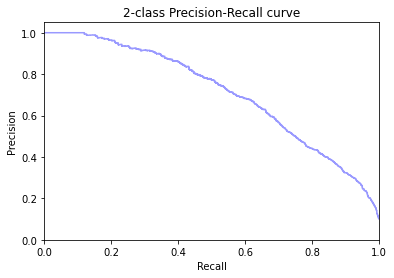

Threshold cutoff:  0.34615535163375827
Max F1-score at cut-off :  0.6459991621281944


<AxesSubplot:xlabel='thresholds'>

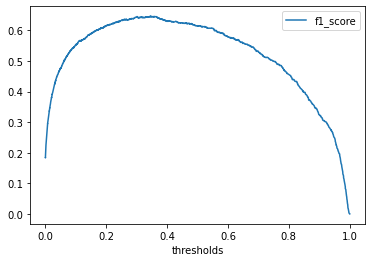

In [70]:
# Initializing the LightGBM model
import lightgbm as lgb
from lightgbm import LGBMClassifier 

#Use the optimal hyperparameters found by Optuna to build a Light GBM classifier.
gbm_model = lgb.LGBMClassifier(objective='binary', learning_rate=0.01, max_depth = 30, num_leaves = 102, feature_fraction=0.88, bagging_fraction=0.99, bagging_freq =7, min_child_samples =15, lambda_l1=1.646, lambda_l2=0.001, num_iterations=7000, boosting_type='dart')

##Change data type of categorical features from object to category
for c in train_X.columns:
    col_type = train_X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        train_X[c] = train_X[c].astype('category')
        
# Splitting the dataset in order to use early stopping round
X_train, X_test, y_train, y_test = train_test_split(train_X, y, test_size=0.10, stratify=y)

# Fitting LightGBM model
gbm_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='f1', early_stopping_rounds=100)
y_pred = gbm_model.predict_proba(X_test)

#Plot precision and recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:,1])

#Plot f1 score for different values of threshold and find the optimal value
thresholds = np.append(thresholds, 1)
f1_scores = 2*(precision*recall)/(precision+recall)
plt.step(recall, precision, color='b', alpha=0.4, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')
plt.show()

scrs = pd.DataFrame({'precision' : precision, 'recall' : recall, 'thresholds' : thresholds, 'f1_score':f1_scores})
print("Threshold cutoff: ",scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0])
print("Max F1-score at cut-off : ",scrs.f1_score.max())
scrs.plot(x='thresholds', y='f1_score')

I used the feature importance plot to check which features had the largest influence.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

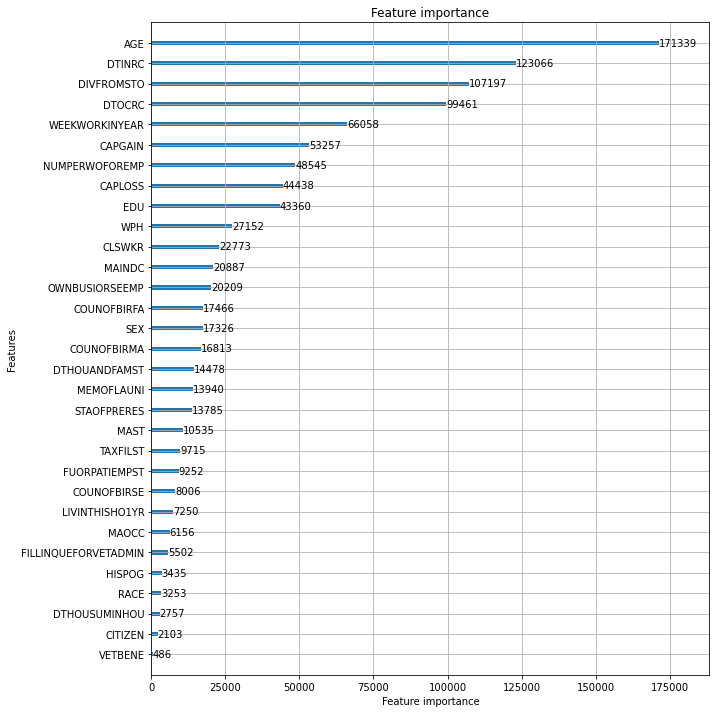

In [71]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(gbm_model, ax=ax)

### 6) Submit

In [154]:
#opt_thr = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]
#train_y_hat = (clf.predict_proba(train_X) >= opt_thr).astype(int)[:,1]
#test_y_hat = (clf.predict_proba(test_X) >= opt_thr).astype(int)[:,1]

Since I used the internal method for dealing with categorical data for Light GBM, I had to specify categorical data as I did for the train set, for the test set as well in order to prevent error.

In [72]:
for c in test_X.columns:
    col_type = test_X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        test_X[c] = test_X[c].astype('category')

/var/folders/pp/g6wfrpm95djb5pnq718w9xyw0000gn/T/ipykernel_29746/3996446048.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[c] = test_X[c].astype('category')


I used the optimal threshold obtained previously to determine the prediction value. For probability below the threshold, the model will predict 0 (income below 50 k) and for above the threshold, the model will predict 1 (income above 50k).

In [73]:
opt_thr = scrs.loc[scrs['f1_score'] == scrs.f1_score.max(),'thresholds'].iloc[0]
train_y_hat = (gbm_model.predict_proba(train_X) >= opt_thr).astype(int)[:,1]
test_y_hat =(gbm_model.predict_proba(test_X) >= opt_thr).astype(int)[:,1]

In [74]:
# Accuracy is not meaningful in the imbalance case
train_acc = accuracy_score(train_y_hat, y)
train_f1 = f1_score(train_y_hat, y)

print(f'Train Accuracy : {train_acc}')
print(f'Train F1 Score : {train_f1}')

Train Accuracy : 0.9827137723470477
Train F1 Score : 0.8593679918450561


In [75]:
# test_y_hat으로 submit
id = np.arange(len(test_data)).reshape(-1,1)
prediction = test_y_hat.reshape(-1,1)

solution = pd.DataFrame(np.hstack((id, prediction)), columns=['Id','Prediction'])
solution

,Id,Prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
99757,99757,1
99758,99758,0
99759,99759,0
99760,99760,0


In [76]:
# submission file 저장
solution.to_csv("sample_submission.csv", header=True, index=False)